## External Python Libraries

In [ ]:
pip install opencv-python tqdm

In [ ]:
!pip install timm pandas scikit-learn pillow tqdm torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 40.9 MB/s eta 0:00:00


## Load the file from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Script de Python para Reescalar Imágenes

In [ ]:
import os
import cv2
from tqdm import tqdm

# ========================================================================
# SECCIÓN 1: CONFIGURACIÓN DE RUTAS Y PARÁMETROS
# ========================================================================

# --- ¡MODIFICAR AQUÍ! ---

# 1. Carpeta con tus imágenes procesadas de 1024x1024
#    (La carpeta de salida de tu script de MATLAB)
input_dir = r'/content/drive/MyDrive/Tesis_Electronica/Enhanced_Batch'

# 2. Carpeta donde se guardarán las nuevas imágenes reescaladas
output_dir = r'/content/drive/MyDrive/Tesis_Electronica/Enhanced_Batch_224'

# 3. Tamaño de salida para el modelo ViT.
#    Nota: El estándar es 224x224. Si realmente necesitas 244x244, cámbialo aquí.
target_size = (224, 224)  # Formato: (ancho, alto)

# --- FIN DE LA CONFIGURACIÓN ---


# ========================================================================
# SECCIÓN 2: LÓGICA DE REESCALADO POR LOTES
# ========================================================================

def rescale_images(source_dir, destination_dir, size):
    """
    Recorre una carpeta, reescala todas las imágenes .png al tamaño deseado
    y las guarda en una nueva carpeta.
    """
    # 1. Crear la carpeta de salida si no existe
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)
        print(f"Carpeta de salida creada en: {destination_dir}")

    # 2. Obtener la lista de imágenes a procesar
    try:
        image_files = [f for f in os.listdir(source_dir) if f.endswith('.png')]
        if not image_files:
            print(f"Advertencia: No se encontraron archivos .png en '{source_dir}'. Verifica la ruta.")
            return
        print(f"Se encontraron {len(image_files)} imágenes para reescalar.")
    except FileNotFoundError:
        print(f"Error: La carpeta de entrada '{source_dir}' no existe. Por favor, verifica la ruta.")
        return

    # 3. Bucle para procesar cada imagen
    for filename in tqdm(image_files, desc="Reescalando imágenes"):
        # Construir las rutas completas de entrada y salida
        input_path = os.path.join(source_dir, filename)
        output_path = os.path.join(destination_dir, filename)

        # Leer la imagen en escala de grises
        image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

        # Verificar si la imagen se cargó correctamente
        if image is None:
            print(f"Advertencia: No se pudo leer el archivo '{filename}'. Se omitirá.")
            continue

        # Reescalar la imagen.
        # cv2.INTER_AREA es el método recomendado para reducir el tamaño de una imagen (decimation),
        # ya que evita artefactos y promedia los píxeles de manera efectiva.
        resized_image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)

        # Guardar la imagen reescalada
        cv2.imwrite(output_path, resized_image)

    print(f"\n¡Proceso completado! {len(image_files)} imágenes han sido reescaladas y guardadas en '{destination_dir}'.")


# --- Ejecutar la función principal ---
if __name__ == "__main__":
    rescale_images(input_dir, output_dir, target_size)

Se encontraron 81 imágenes para reescalar.


Reescalando imágenes: 100%|██████████| 81/81 [01:53<00:00,  1.40s/it]


¡Proceso completado! 81 imágenes han sido reescaladas y guardadas en '/content/drive/MyDrive/Tesis_Electronica/Enhanced_Batch_224'.


## Script de Python: ViT para Regresión de Shielding

In [ ]:
# Se recomienda instalar PyTorch siguiendo las instrucciones de su página oficial
# https://pytorch.org/get-started/locally/
# Ejemplo (puede variar según tu sistema y si tienes GPU):
# pip install torch torchvision torchaudio

!pip install timm pandas scikit-learn pillow tqdm torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 33.7 MB/s eta 0:00:00


El CSV debe tener este formato:

```
filename,shielding_db
0a-1_processed.png,45.8
0a-2_processed.png,51.2
...
```



# Prediccion de Voltajse

## Vit Aumentado

Usando dispositivo: cuda
Detectadas 3 clases: [np.int64(5), np.int64(10), np.int64(15)]
Conteo de muestras por clase:
Voltaje
5     27
10    27
15    27
Name: count, dtype: int64
Nombres para visualización: ['5 V', '10 V', '15 V']

--- Transformaciones de Entrenamiento (vit_tiny_patch16_224) ---
Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.7, 1.0), ratio=(0.9, 1.1), interpolation=bilinear, antialias=True)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=None, hue=None)
    RandomPerspective(p=0.25)
    GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0))
    ToTensor()
    AddGaussianNoise(mean=0.0, std=0.01)
    Normalize(mean=[0.5], std=[0.5])
)
----------------------------------------

Iniciando Cross-Validation de 5 folds...

======= FOLD 1/5 =======
Datos del Fold: 64 para entrenamiento, 17 para validación.
Entrenando Fold 1...


Epoch 10/20 -> Train Loss: 1.3520 | Val Loss: 1.0555
  Metrics -> Acc: 0.4286 | Precision: 0.3651 | Recall: 0.4286 | F1: 0.3333


Epoch 20/20 -> Train Loss: 1.1601 | Val Loss: 1.0716
  Metrics -> Acc: 0.3175 | Precision: 0.2952 | Recall: 0.3175 | F1: 0.2929
Fold finalizado. Mejor Val Loss: 1.0555

Evaluando mejor modelo del Fold 1...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.4286
Precision: 0.3651
Recall:    0.4286
F1 Score:  0.3333

======= FOLD 2/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 2...


Epoch 10/20 -> Train Loss: 1.7873 | Val Loss: 1.3403
  Metrics -> Acc: 0.3333 | Precision: 0.1458 | Recall: 0.3333 | F1: 0.2029


Epoch 20/20 -> Train Loss: 1.2935 | Val Loss: 1.1614
  Metrics -> Acc: 0.3333 | Precision: 0.1042 | Recall: 0.3333 | F1: 0.1587
Fold finalizado. Mejor Val Loss: 1.0907

Evaluando mejor modelo del Fold 2...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.3333
Precision: 0.1458
Recall:    0.3333
F1 Score:  0.2029

======= FOLD 3/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 3...


Epoch 10/20 -> Train Loss: 1.3920 | Val Loss: 1.0706
  Metrics -> Acc: 0.3333 | Precision: 0.1458 | Recall: 0.3333 | F1: 0.2029


Epoch 20/20 -> Train Loss: 1.1907 | Val Loss: 1.0873
  Metrics -> Acc: 0.3405 | Precision: 0.3833 | Recall: 0.3405 | F1: 0.3354
Fold finalizado. Mejor Val Loss: 1.0706

Evaluando mejor modelo del Fold 3...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.3333
Precision: 0.1458
Recall:    0.3333
F1 Score:  0.2029

======= FOLD 4/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 4...


Epoch 10/20 -> Train Loss: 1.6135 | Val Loss: 1.2933
  Metrics -> Acc: 0.3333 | Precision: 0.0952 | Recall: 0.3333 | F1: 0.1481


Epoch 20/20 -> Train Loss: 1.2998 | Val Loss: 1.0767
  Metrics -> Acc: 0.3333 | Precision: 0.1250 | Recall: 0.3333 | F1: 0.1818
Fold finalizado. Mejor Val Loss: 1.0767

Evaluando mejor modelo del Fold 4...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.3333
Precision: 0.1250
Recall:    0.3333
F1 Score:  0.1818

======= FOLD 5/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 5...


Epoch 10/20 -> Train Loss: 1.2971 | Val Loss: 1.1819
  Metrics -> Acc: 0.3333 | Precision: 0.1250 | Recall: 0.3333 | F1: 0.1818


Epoch 20/20 -> Train Loss: 1.4341 | Val Loss: 1.2018
  Metrics -> Acc: 0.3333 | Precision: 0.0833 | Recall: 0.3333 | F1: 0.1333
Fold finalizado. Mejor Val Loss: 1.1330

Evaluando mejor modelo del Fold 5...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.3333
Precision: 0.1250
Recall:    0.3333
F1 Score:  0.1818

CROSS-VALIDATION COMPLETADA

--- Resumen de Métricas (Promedio de 5 Folds) ---
Accuracy:  0.3524 +/- 0.0381
Precision: 0.1813 +/- 0.0923
Recall:    0.3524 +/- 0.0381
F1 Score:  0.2206 +/- 0.0572

--- Matriz de Confusión Agregada (Todos los Folds) ---


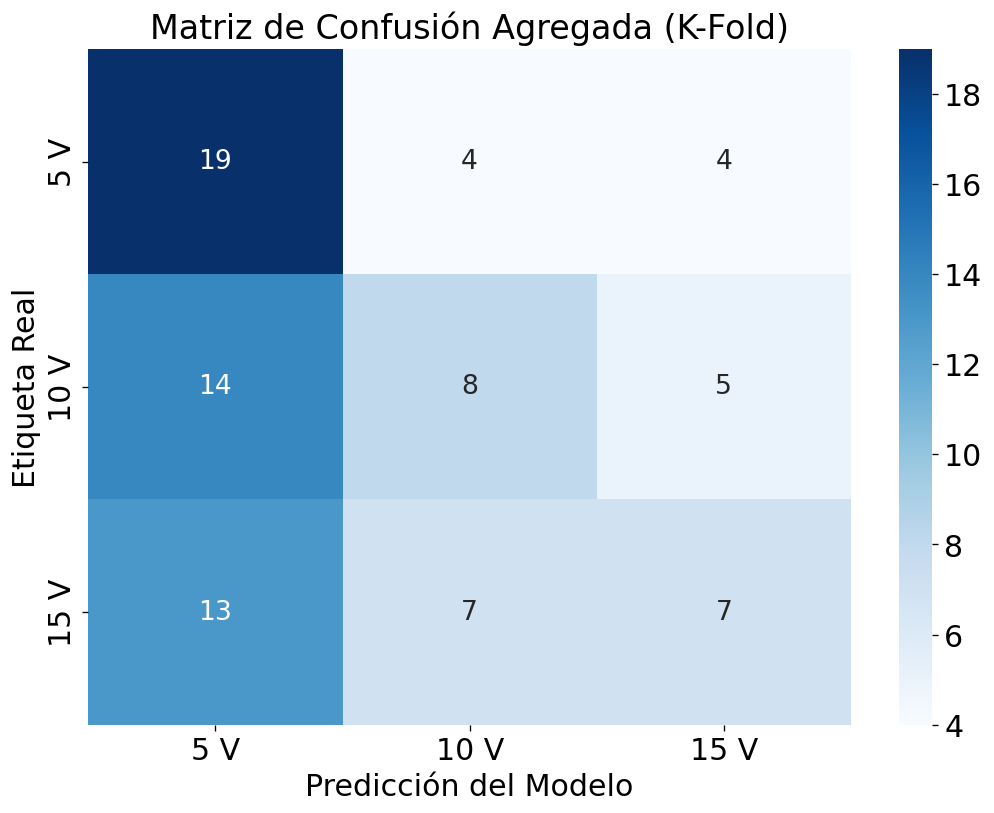


--- Reporte de Clasificación Agregado (Todos los Folds) ---
              precision    recall  f1-score   support

         5 V       0.41      0.70      0.52        27
        10 V       0.42      0.30      0.35        27
        15 V       0.44      0.26      0.33        27

    accuracy                           0.42        81
   macro avg       0.42      0.42      0.40        81
weighted avg       0.42      0.42      0.40        81

Generando Curva ROC Agregada (Todos los Folds)...


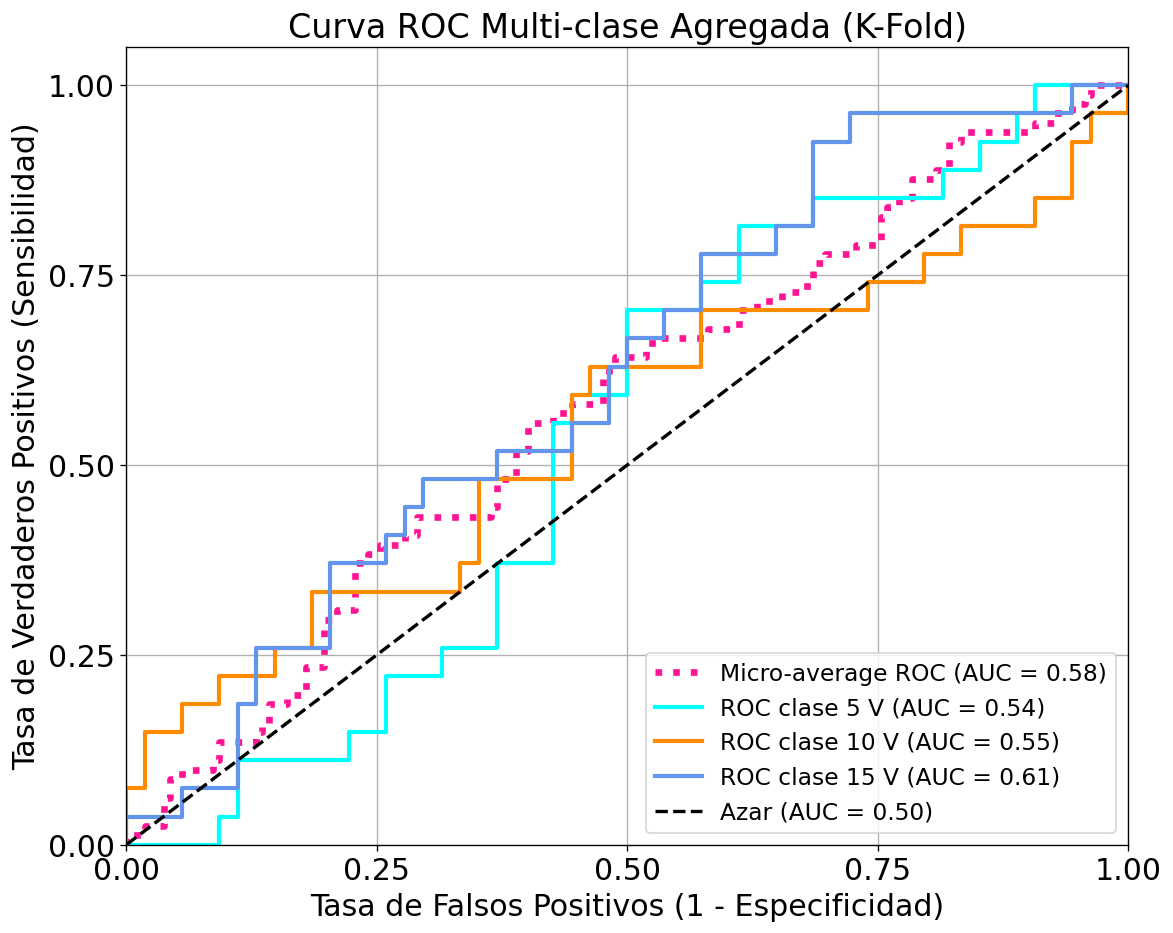

Generando curvas de aprendizaje (Loss / Métricas vs. Épocas)...


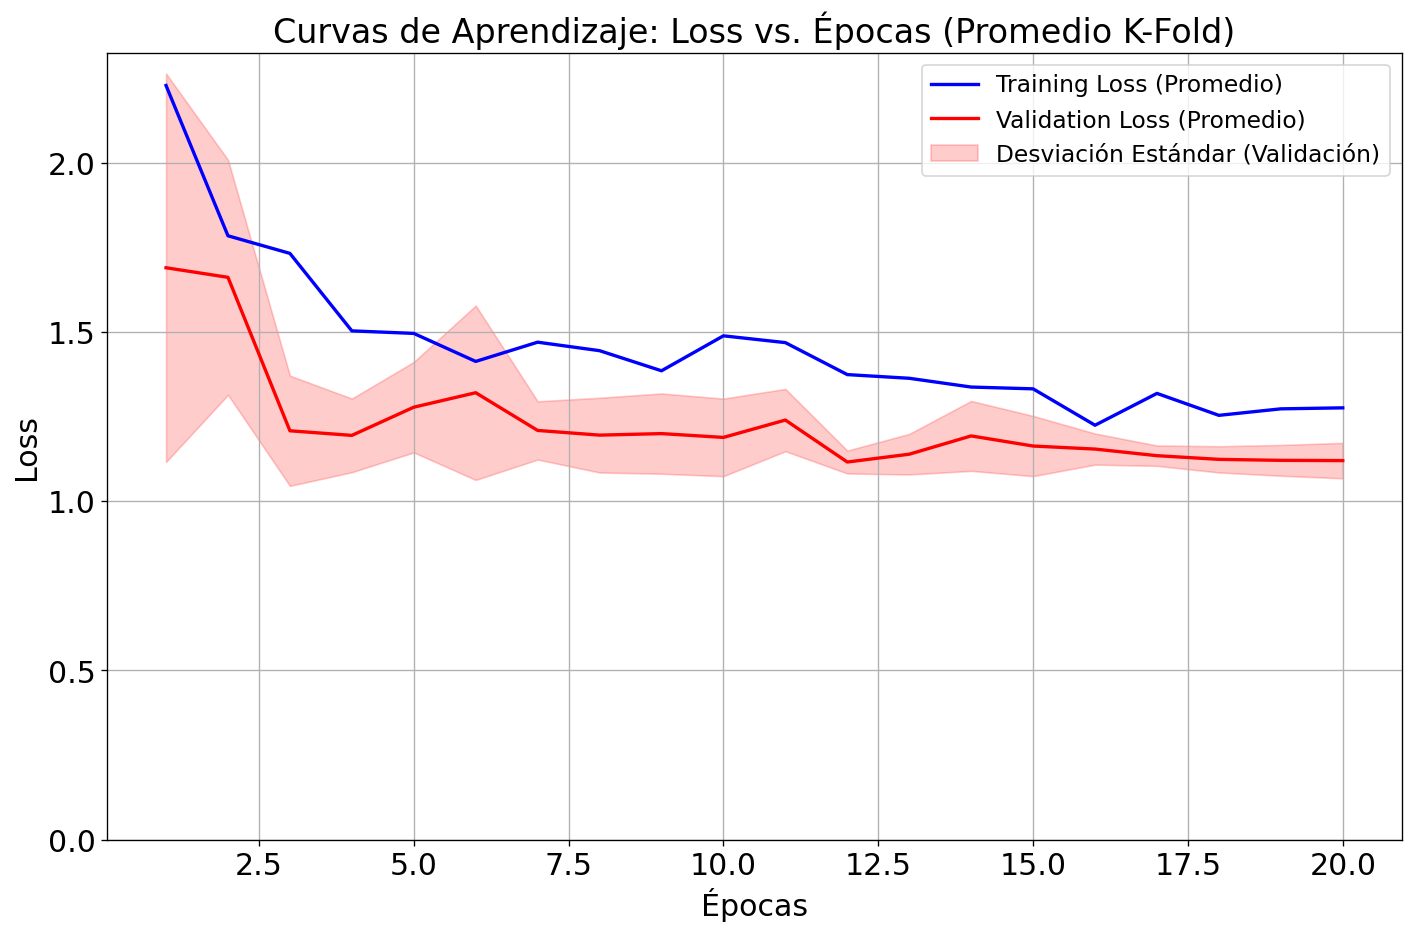

/tmp/ipython-input-3220357945.py:418: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(epochs, mean_val_f1, 'o-', lw=2, label='Validation F1-Score (Promedio)', linestyle='--')


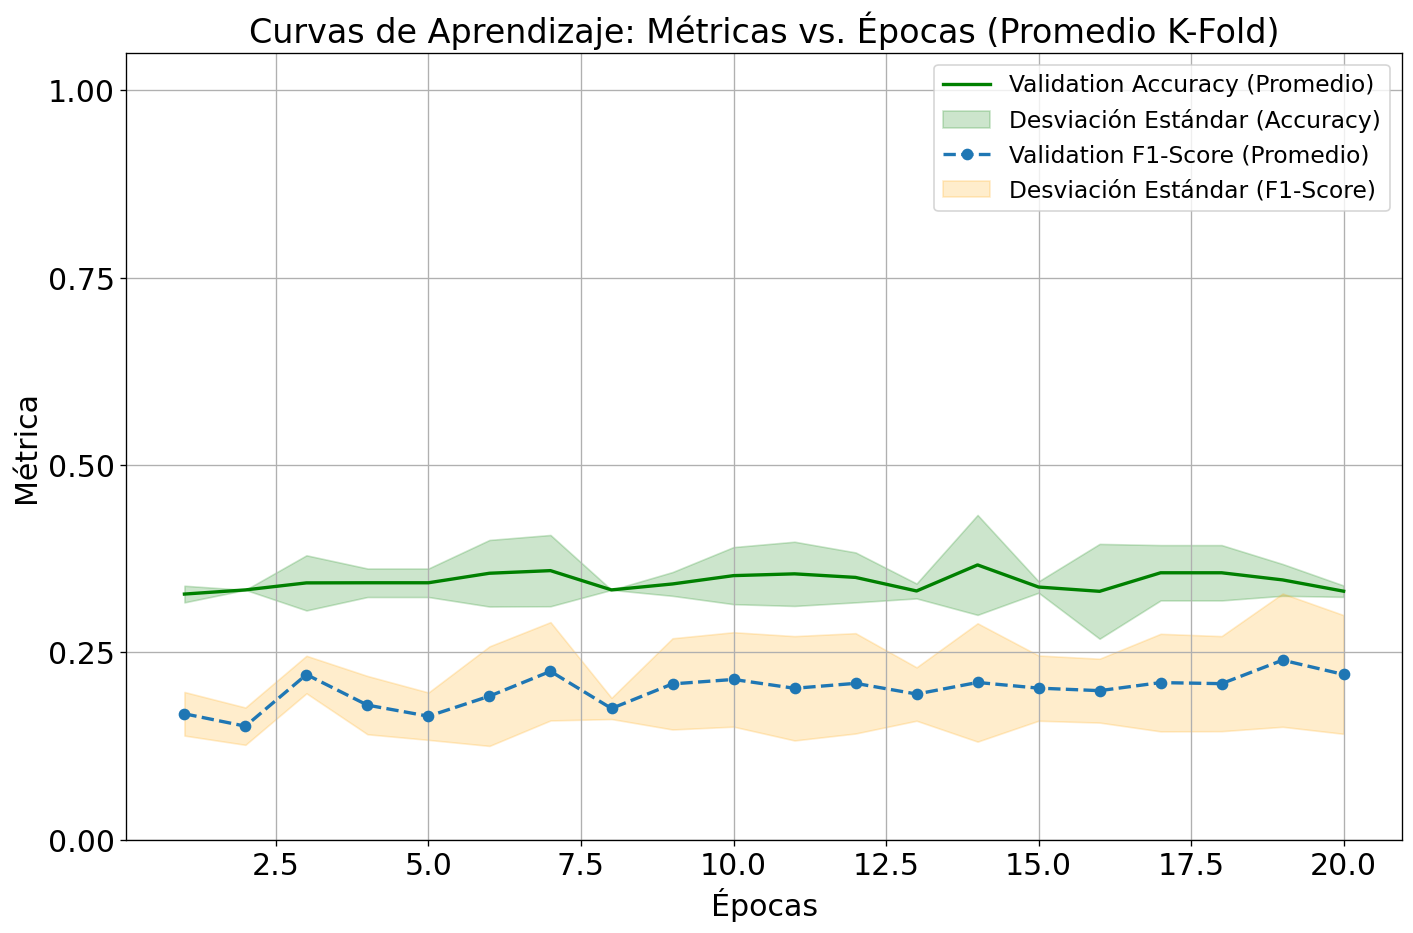


Proceso finalizado.


In [ ]:
# -*- coding: utf-8 -*-
import os
import random
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset

from PIL import Image
from torchvision import transforms
import timm

from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

from torchmetrics.classification import (
    MulticlassAccuracy, MulticlassF1Score,
    MulticlassPrecision, MulticlassRecall
)
from torch.optim.lr_scheduler import ReduceLROnPlateau

# --------------------------------------------------------------------
# CONFIGURACIÓN GLOBAL DE GRÁFICOS (TAMAÑOS GRANDES PARA TESIS / PPT)
# --------------------------------------------------------------------
plt.rcParams.update({
    "figure.dpi": 120,
    "savefig.dpi": 300,
    "axes.titlesize": 22,
    "axes.labelsize": 18,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.fontsize": 18,
    "font.size": 14
})

# ---------------------------------------------------------
# REPRODUCIBILIDAD
# ---------------------------------------------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

# ========================================================================
# SECCIÓN 1: CONFIGURACIÓN
# ========================================================================
IMAGE_DIR = r'/content/drive/MyDrive/ISIS3002_-_Tesis_Electronica/Enhanced_Batch_224'
CSV_PATH = r'/content/drive/MyDrive/ISIS3002_-_Tesis_Electronica/Fase_2_Visual_Transformers/labelsVoltajes.csv'

MODEL_NAME   = 'vit_tiny_patch16_224'
NUM_EPOCHS   = 20
BATCH_SIZE   = 16
LEARNING_RATE= 1e-4
WEIGHT_DECAY = 5e-4
DEVICE       = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo: {DEVICE}")

K_FOLDS      = 5
RANDOM_STATE = 42

# ========================================================================
# SECCIÓN 2: PREPARACIÓN DE DATOS
# ========================================================================
try:
    df_labels = pd.read_csv(CSV_PATH)
    class_names = sorted(df_labels.iloc[:, 1].unique())   # valores crudos: 10, 1000, 100000
    num_classes = len(class_names)
    print(f"Detectadas {num_classes} clases: {class_names}")
    print(f"Conteo de muestras por clase:\n{df_labels.iloc[:, 1].value_counts()}")
    class_to_idx = {c: i for i, c in enumerate(class_names)}
    idx_to_class = {i: c for i, c in enumerate(class_names)}

    # ----- etiquetas amigables para las figuras -----
    pretty_name_map = {
        '5': '5 V',
        '10': '10 V',
        '15': '15 V'
    }
    pretty_class_names = [
        pretty_name_map.get(str(c), str(c)) for c in class_names
    ]
    print(f"Nombres para visualización: {pretty_class_names}")

except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{CSV_PATH}'.")
    raise

class VoltageDataset(Dataset):
    def __init__(self, csv_path, image_dir, class_to_idx, transform=None):
        self.dataframe = pd.read_csv(csv_path)
        self.image_dir = image_dir
        self.transform = transform
        self.class_to_idx = class_to_idx
        self.label_column_name = self.dataframe.columns[1]

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        base_name = self.dataframe.iloc[idx, 0]
        stem      = os.path.splitext(base_name)[0]
        img_name  = os.path.join(self.image_dir, f"{stem}.png")

        try:
            image = Image.open(img_name).convert("L")  # escala de grises
        except FileNotFoundError:
            print(f"Error: No se pudo encontrar la imagen {img_name}")
            return torch.empty(1, 224, 224), torch.tensor(0, dtype=torch.long)

        label_value = self.dataframe.iloc[idx][self.label_column_name]
        label_idx   = self.class_to_idx[label_value]

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label_idx, dtype=torch.long)

class AddGaussianNoise(object):
    def __init__(self, mean=0., std=0.01):
        self.std = std
        self.mean = mean
    def __call__(self, tensor):
        noise = torch.randn(tensor.size()) * self.std + self.mean
        return torch.clamp(tensor + noise, 0., 1.)
    def __repr__(self):
        return self.__class__.__name__ + f'(mean={self.mean}, std={self.std})'

# -----------------------------
# DATA AUGMENTATION
# -----------------------------
data_transform = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224, scale=(0.7, 1.0), ratio=(0.9, 1.1)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.RandomPerspective(distortion_scale=0.2, p=0.25),
        transforms.GaussianBlur(kernel_size=5, sigma=(0.1, 2.0)),
        transforms.ToTensor(),
        AddGaussianNoise(mean=0., std=0.01),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]),
}

# ========================================================================
# SECCIÓN 3: DEFINICIÓN DEL MODELO (ViT)
# ========================================================================
def _vit_in_features(model):
    if hasattr(model, 'head') and isinstance(model.head, nn.Linear):
        return model.head.in_features
    if hasattr(model, 'head') and hasattr(model.head, 'in_features'):
        return model.head.in_features
    if hasattr(model, 'head') and hasattr(model.head, 'fc') and isinstance(model.head.fc, nn.Linear):
        return model.head.fc.in_features
    if hasattr(model, 'num_features'):
        return model.num_features
    raise AttributeError("No se pudieron inferir las in_features del head del ViT.")

def create_vit_classifier(model_name, num_classes, pretrained=True):
    model = timm.create_model(model_name, pretrained=pretrained)

    # Adaptar patch_embed.proj a 1 canal
    if hasattr(model, 'patch_embed') and hasattr(model.patch_embed, 'proj'):
        old = model.patch_embed.proj
        new_conv = nn.Conv2d(
            in_channels=1,
            out_channels=old.out_channels,
            kernel_size=old.kernel_size,
            stride=old.stride,
            padding=old.padding,
            bias=(old.bias is not None)
        )
        with torch.no_grad():
            new_conv.weight[:] = old.weight.mean(dim=1, keepdim=True)
            if old.bias is not None:
                new_conv.bias[:] = old.bias.clone()
        model.patch_embed.proj = new_conv
    else:
        raise AttributeError("El modelo ViT no tiene 'patch_embed.proj' esperado.")

    # Reemplazar clasificador
    num_features = _vit_in_features(model)
    model.head = nn.Sequential(
        nn.Dropout(p=0.5, inplace=True),
        nn.Linear(num_features, num_classes)
    )
    return model

# ========================================================================
# SECCIÓN 4: ENTRENAMIENTO
# ========================================================================
def train_model(model, train_loader, val_loader, criterion, optimizer,
                scheduler, num_epochs, num_classes, model_save_path):
    best_val_loss = float('inf')
    metrics = {
        'acc': MulticlassAccuracy(num_classes=num_classes, average='macro').to(DEVICE),
        'pre': MulticlassPrecision(num_classes=num_classes, average='macro').to(DEVICE),
        'rec': MulticlassRecall(num_classes=num_classes, average='macro').to(DEVICE),
        'f1' : MulticlassF1Score(num_classes=num_classes, average='macro').to(DEVICE)
    }
    history = {'train_loss': [], 'val_loss': [], 'val_acc': [], 'val_f1': []}

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", leave=False):
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        train_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(train_loss)

        model.eval()
        val_loss = 0.0
        for m in metrics.values():
            m.reset()
        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]", leave=False):
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                for m in metrics.values():
                    m.update(outputs, labels)

        val_loss /= len(val_loader.dataset)
        val_acc = metrics['acc'].compute().item()
        val_f1  = metrics['f1'].compute().item()

        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['val_f1'].append(val_f1)

        if (epoch + 1) % 10 == 0 or epoch == num_epochs - 1:
            val_pre = metrics['pre'].compute().item()
            val_rec = metrics['rec'].compute().item()
            print(f"Epoch {epoch+1}/{num_epochs} -> Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
            print(f"  Metrics -> Acc: {val_acc:.4f} | Precision: {val_pre:.4f} | Recall: {val_rec:.4f} | F1: {val_f1:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), model_save_path)

        scheduler.step(val_loss)

    print(f"Fold finalizado. Mejor Val Loss: {best_val_loss:.4f}")
    return history

# ========================================================================
# SECCIÓN 6: EVALUACIÓN
# ========================================================================
def evaluate_fold(model, dataloader, device, class_names):
    model.eval()
    all_preds, all_labels, all_scores = [], [], []
    n_classes = len(class_names)

    acc_metric = MulticlassAccuracy(num_classes=n_classes, average='macro').to(device)
    pre_metric = MulticlassPrecision(num_classes=n_classes, average='macro').to(device)
    rec_metric = MulticlassRecall(num_classes=n_classes, average='macro').to(device)
    f1_metric  = MulticlassF1Score(num_classes=n_classes, average='macro').to(device)

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            scores  = torch.nn.functional.softmax(outputs, dim=1)
            _, preds= torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_scores.extend(scores.cpu().numpy())

            acc_metric.update(outputs, labels)
            pre_metric.update(outputs, labels)
            rec_metric.update(outputs, labels)
            f1_metric.update(outputs, labels)

    print("\n--- Métricas (torchmetrics) del Fold ---")
    print(f"Accuracy:  {acc_metric.compute().item():.4f}")
    print(f"Precision: {pre_metric.compute().item():.4f}")
    print(f"Recall:    {rec_metric.compute().item():.4f}")
    print(f"F1 Score:  {f1_metric.compute().item():.4f}")

    return {
        'acc':  acc_metric.compute().item(),
        'pre':  pre_metric.compute().item(),
        'rec':  rec_metric.compute().item(),
        'f1' :  f1_metric.compute().item(),
        'labels': all_labels, 'preds': all_preds, 'scores': all_scores
    }

# ========================================================================
# SECCIÓN 7: GRÁFICOS
# ========================================================================
def plot_final_confusion_matrix(all_labels, all_preds, display_names):
    """
    display_names: nombres formateados (p.ej. '10 Hz', '1 kHz', '100 kHz').
    """
    print("\n--- Matriz de Confusión Agregada (Todos los Folds) ---")
    cm = confusion_matrix(all_labels, all_preds)
    fig, ax = plt.subplots(figsize=(9, 7))
    sns.heatmap(
        cm, annot=True, fmt='g', cmap='Blues',
        xticklabels=[str(c) for c in display_names],
        yticklabels=[str(c) for c in display_names],
        annot_kws={"size": 16}
    )
    ax.set_xlabel('Predicción del Modelo', fontsize=18)
    ax.set_ylabel('Etiqueta Real', fontsize=18)
    ax.set_title('Matriz de Confusión Agregada (K-Fold)', fontsize=20)
    plt.tight_layout()
    plt.show()

    print("\n--- Reporte de Clasificación Agregado (Todos los Folds) ---")
    print(classification_report(
        all_labels, all_preds,
        target_names=[str(c) for c in display_names],
        zero_division=0
    ))

def plot_final_roc_curves(all_labels, all_scores, display_names):
    """
    display_names: nombres formateados para las clases.
    """
    print("Generando Curva ROC Agregada (Todos los Folds)...")
    n_classes = len(display_names)
    all_labels_bin = label_binarize(all_labels, classes=range(n_classes))
    all_scores = np.array(all_scores)

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], all_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_bin.ravel(), all_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(fpr["micro"], tpr["micro"],
            label=f'Micro-average ROC (AUC = {roc_auc["micro"]:0.2f})',
            color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
    for i, color in zip(range(n_classes), colors):
        ax.plot(fpr[i], tpr[i], color=color, lw=2.5,
                label=f'ROC clase {display_names[i]} (AUC = {roc_auc[i]:0.2f})')

    ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Azar (AUC = 0.50)')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Tasa de Falsos Positivos (1 - Especificidad)', fontsize=18)
    ax.set_ylabel('Tasa de Verdaderos Positivos (Sensibilidad)', fontsize=18)
    ax.set_title('Curva ROC Multi-clase Agregada (K-Fold)', fontsize=20)
    ax.legend(loc="lower right", fontsize=14)
    ax.grid(True)
    ax.set_xticks(np.arange(0.0, 1.01, 0.25))
    ax.set_yticks(np.arange(0.0, 1.01, 0.25))
    plt.tight_layout()
    plt.show()

def plot_learning_curves(all_histories, num_epochs):
    print("Generando curvas de aprendizaje (Loss / Métricas vs. Épocas)...")
    train_loss_matrix = np.array([h['train_loss'] for h in all_histories])
    val_loss_matrix   = np.array([h['val_loss']   for h in all_histories])
    val_acc_matrix    = np.array([h['val_acc']    for h in all_histories])
    val_f1_matrix     = np.array([h['val_f1']     for h in all_histories])

    mean_train_loss = np.mean(train_loss_matrix, axis=0)
    mean_val_loss   = np.mean(val_loss_matrix,   axis=0)
    std_val_loss    = np.std(val_loss_matrix,    axis=0)
    mean_val_acc    = np.mean(val_acc_matrix,    axis=0)
    std_val_acc     = np.std(val_acc_matrix,     axis=0)
    mean_val_f1     = np.mean(val_f1_matrix,     axis=0)
    std_val_f1      = np.std(val_f1_matrix,      axis=0)

    epochs = np.arange(1, num_epochs + 1)

    # --- Loss ---
    fig1, ax1 = plt.subplots(figsize=(12, 8))
    ax1.plot(epochs, mean_train_loss, 'b-', lw=2, label='Training Loss (Promedio)')
    ax1.plot(epochs, mean_val_loss,   'r-', lw=2, label='Validation Loss (Promedio)')
    ax1.fill_between(epochs, mean_val_loss - std_val_loss, mean_val_loss + std_val_loss,
                     color='r', alpha=0.2, label='Desviación Estándar (Validación)')
    ax1.set_title('Curvas de Aprendizaje: Loss vs. Épocas (Promedio K-Fold)', fontsize=20)
    ax1.set_xlabel('Épocas', fontsize=18)
    ax1.set_ylabel('Loss', fontsize=18)
    ax1.legend(fontsize=14)
    ax1.grid(True)
    ax1.set_ylim(bottom=0)
    plt.tight_layout()
    plt.show()

    # --- Accuracy & F1 ---
    fig2, ax2 = plt.subplots(figsize=(12, 8))
    ax2.plot(epochs, mean_val_acc, 'g-', lw=2, label='Validation Accuracy (Promedio)')
    ax2.fill_between(epochs, mean_val_acc - std_val_acc, mean_val_acc + std_val_acc,
                     color='g', alpha=0.2, label='Desviación Estándar (Accuracy)')
    ax2.plot(epochs, mean_val_f1, 'o-', lw=2, label='Validation F1-Score (Promedio)', linestyle='--')
    ax2.fill_between(epochs, mean_val_f1 - std_val_f1, mean_val_f1 + std_val_f1,
                     color='orange', alpha=0.2, label='Desviación Estándar (F1-Score)')
    ax2.set_title('Curvas de Aprendizaje: Métricas vs. Épocas (Promedio K-Fold)', fontsize=20)
    ax2.set_xlabel('Épocas', fontsize=18)
    ax2.set_ylabel('Métrica', fontsize=18)
    ax2.legend(fontsize=14)
    ax2.grid(True)
    ax2.set_ylim(0.0, 1.05)
    ax2.set_yticks(np.arange(0.0, 1.01, 0.25))
    plt.tight_layout()
    plt.show()

# ========================================================================
# SECCIÓN 8: EJECUCIÓN PRINCIPAL (K-FOLD)
# ========================================================================
if __name__ == "__main__":
    dataset_for_train = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['train']
    )
    dataset_for_val = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['val']
    )

    print(f"\n--- Transformaciones de Entrenamiento ({MODEL_NAME}) ---")
    print(dataset_for_train.transform)
    print("----------------------------------------\n")

    kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=RANDOM_STATE)

    fold_metrics = {'acc': [], 'pre': [], 'rec': [], 'f1': []}
    all_folds_labels, all_folds_preds, all_folds_scores = [], [], []
    all_fold_histories = []

    print(f"Iniciando Cross-Validation de {K_FOLDS} folds...")
    print("="*70)

    for fold, (train_ids, val_ids) in enumerate(kfold.split(dataset_for_train)):
        print(f"\n======= FOLD {fold+1}/{K_FOLDS} =======")
        train_sub = Subset(dataset_for_train, train_ids)
        val_sub   = Subset(dataset_for_val,   val_ids)

        train_loader = DataLoader(
            train_sub, batch_size=BATCH_SIZE, shuffle=True,
            num_workers=2, pin_memory=True
        )
        val_loader   = DataLoader(
            val_sub, batch_size=BATCH_SIZE, shuffle=False,
            num_workers=2, pin_memory=True
        )

        print(f"Datos del Fold: {len(train_sub)} para entrenamiento, {len(val_sub)} para validación.")

        model = create_vit_classifier(MODEL_NAME, num_classes=num_classes, pretrained=True).to(DEVICE)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
        scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

        model_save_path = f'best_model_fold_{fold+1}.pth'

        print(f"Entrenando Fold {fold+1}...")
        fold_history = train_model(
            model, train_loader, val_loader,
            criterion, optimizer, scheduler,
            NUM_EPOCHS, num_classes, model_save_path
        )
        all_fold_histories.append(fold_history)

        print(f"\nEvaluando mejor modelo del Fold {fold+1}...")
        best_model = create_vit_classifier(MODEL_NAME, num_classes=num_classes, pretrained=False).to(DEVICE)
        best_model.load_state_dict(torch.load(model_save_path, map_location=DEVICE))

        fold_results = evaluate_fold(best_model, val_loader, DEVICE, class_names)

        fold_metrics['acc'].append(fold_results['acc'])
        fold_metrics['pre'].append(fold_results['pre'])
        fold_metrics['rec'].append(fold_results['rec'])
        fold_metrics['f1'].append(fold_results['f1'])

        all_folds_labels.extend(fold_results['labels'])
        all_folds_preds.extend(fold_results['preds'])
        all_folds_scores.extend(fold_results['scores'])

    print("\n" + "="*70)
    print("CROSS-VALIDATION COMPLETADA")
    print("="*70)

    print(f"\n--- Resumen de Métricas (Promedio de {K_FOLDS} Folds) ---")
    print(f"Accuracy:  {np.mean(fold_metrics['acc']):.4f} +/- {np.std(fold_metrics['acc']):.4f}")
    print(f"Precision: {np.mean(fold_metrics['pre']):.4f} +/- {np.std(fold_metrics['pre']):.4f}")
    print(f"Recall:    {np.mean(fold_metrics['rec']):.4f} +/- {np.std(fold_metrics['rec']):.4f}")
    print(f"F1 Score:  {np.mean(fold_metrics['f1']):.4f} +/- {np.std(fold_metrics['f1']):.4f}")

    # Usamos los nombres bonitos en las figuras
    plot_final_confusion_matrix(all_folds_labels, all_folds_preds, pretty_class_names)
    plot_final_roc_curves(all_folds_labels, all_folds_scores, pretty_class_names)
    plot_learning_curves(all_fold_histories, NUM_EPOCHS)

    print("\nProceso finalizado.")


## SwinTransformer aumentado

In [ ]:
# ========================================================================
# SECCIÓN 0: IMPORTS
# ========================================================================
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset
from PIL import Image
from torchvision import transforms
import timm
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

from torchmetrics.classification import (
    MulticlassAccuracy, MulticlassF1Score, MulticlassPrecision, MulticlassRecall
)
from torch.optim.lr_scheduler import ReduceLROnPlateau

# --------------------------------------------------------------------
# CONFIGURACIÓN GLOBAL DE GRÁFICOS (TAMAÑOS GRANDES PARA TESIS / PPT)
# --------------------------------------------------------------------
plt.rcParams.update({
    "figure.dpi": 120,
    "savefig.dpi": 300,
    "axes.titlesize": 22,
    "axes.labelsize": 18,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.fontsize": 18,
    "font.size": 14
})

# ========================================================================
# SECCIÓN 1: CONFIGURACIÓN
# ========================================================================
IMAGE_DIR = r'/content/drive/MyDrive/ISIS3002_-_Tesis_Electronica/Enhanced_Batch_224'
CSV_PATH  = r'/content/drive/MyDrive/ISIS3002_-_Tesis_Electronica/Fase_2_Visual_Transformers/labelsVoltajes.csv'

MODEL_NAME    = 'swin_tiny_patch4_window7_224'
NUM_EPOCHS    = 40
BATCH_SIZE    = 16
LEARNING_RATE = 1e-4
WEIGHT_DECAY  = 5e-4

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo: {DEVICE}")

K_FOLDS = 5
RANDOM_STATE = 42

# ========================================================================
# SECCIÓN 2: PREPARACIÓN DE DATOS
# ========================================================================
try:
    df_labels = pd.read_csv(CSV_PATH)
    # Se asume: col 0 = nombre base, col 1 = etiqueta (10, 1000, 100000, etc.)
    class_names = sorted(df_labels.iloc[:, 1].unique())
    num_classes = len(class_names)
    print(f"Detectadas {num_classes} clases: {class_names}")
    print(f"Conteo de muestras por clase:\n{df_labels.iloc[:, 1].value_counts()}")

    class_to_idx = {class_name: i for i, class_name in enumerate(class_names)}
    idx_to_class = {i: class_name for i, class_name in enumerate(class_names)}

    # --- Nombres bonitos para las figuras ---
    pretty_name_map = {
        '5': '5 V',
        '10': '10 V',
        '15': '15 V'
    }
    pretty_class_names = [
        pretty_name_map.get(str(c), str(c)) for c in class_names
    ]
    print(f"Nombres para visualización: {pretty_class_names}")

except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{CSV_PATH}'.")
    raise

class VoltageDataset(Dataset):
    def __init__(self, csv_path, image_dir, class_to_idx, transform=None):
        self.dataframe = pd.read_csv(csv_path)
        self.image_dir = image_dir
        self.transform = transform
        self.class_to_idx = class_to_idx
        self.label_column_name = self.dataframe.columns[1]

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        base_name = self.dataframe.iloc[idx, 0]
        base_name_without_ext = os.path.splitext(base_name)[0]
        img_name = os.path.join(self.image_dir, f"{base_name_without_ext}.png")

        try:
            image = Image.open(img_name).convert("L")  # escala de grises
        except FileNotFoundError:
            print(f"Error: No se pudo encontrar la imagen {img_name}")
            return torch.zeros(1, 224, 224, dtype=torch.float32), torch.tensor(0, dtype=torch.long)

        label_value = self.dataframe.iloc[idx][self.label_column_name]
        label_idx = self.class_to_idx[label_value]

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label_idx, dtype=torch.long)

class AddGaussianNoise(object):
    def __init__(self, mean=0., std=0.01):
        self.std = std
        self.mean = mean
    def __call__(self, tensor):
        noise = torch.randn(tensor.size()) * self.std + self.mean
        noisy_tensor = tensor + noise
        noisy_tensor = torch.clamp(noisy_tensor, 0., 1.)
        return noisy_tensor
    def __repr__(self):
        return self.__class__.__name__ + f'(mean={self.mean}, std={self.std})'

# Data Augmentation
data_transform = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.RandomCrop(224, padding=10, padding_mode='reflect'),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.1, contrast=0.1),
        transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
        transforms.ToTensor(),
        AddGaussianNoise(mean=0., std=0.005),
        transforms.Normalize(mean=[0.5], std=[0.5]),
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5]),
    ]),
}

# ========================================================================
# SECCIÓN 3: MODELO (Swin Transformer)
# ========================================================================
def create_swin_classifier(model_name, num_classes, pretrained=True):
    """
    Swin con 1 canal de entrada y head correcto (logits [N, num_classes]).
    """
    model = timm.create_model(
        model_name,
        pretrained=pretrained,
        in_chans=1,             # imágenes en escala de grises
        num_classes=num_classes,
        drop_rate=0.5
    )
    if hasattr(model, "reset_classifier"):
        model.reset_classifier(num_classes=num_classes, global_pool='avg')
    return model

# ========================================================================
# SECCIÓN 4: BUCLE DE ENTRENAMIENTO
# ========================================================================
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler,
                num_epochs, num_classes, model_save_path):
    best_val_loss = float('inf')
    metrics = {
        'acc': MulticlassAccuracy(num_classes=num_classes, average='macro').to(DEVICE),
        'pre': MulticlassPrecision(num_classes=num_classes, average='macro').to(DEVICE),
        'rec': MulticlassRecall(num_classes=num_classes, average='macro').to(DEVICE),
        'f1':  MulticlassF1Score(num_classes=num_classes, average='macro').to(DEVICE),
    }
    history = {'train_loss': [], 'val_loss': [], 'val_acc': [], 'val_f1': []}

    for epoch in range(num_epochs):
        # ------- TRAIN -------
        model.train()
        running_loss = 0.0
        train_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", leave=False)
        for inputs, labels in train_tqdm:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            train_tqdm.set_postfix(loss=loss.item())

        train_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(train_loss)

        # ------- VALIDATION -------
        model.eval()
        val_loss = 0.0
        for metric in metrics.values():
            metric.reset()

        val_tqdm = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]", leave=False)
        with torch.no_grad():
            for inputs, labels in val_tqdm:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                for metric in metrics.values():
                    metric.update(outputs, labels)

        val_loss /= len(val_loader.dataset)
        val_acc = metrics['acc'].compute()
        val_pre = metrics['pre'].compute()
        val_rec = metrics['rec'].compute()
        val_f1  = metrics['f1'].compute()

        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc.item())
        history['val_f1'].append(val_f1.item())

        if (epoch + 1) % 10 == 0 or epoch == num_epochs - 1:
            print(f"Epoch {epoch+1}/{num_epochs} -> Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
            print(f"  Metrics -> Acc: {val_acc:.4f} | Precision: {val_pre:.4f} | Recall: {val_rec:.4f} | F1: {val_f1:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), model_save_path)

        scheduler.step(val_loss)

    print(f"Fold finalizado. Mejor Val Loss: {best_val_loss:.4f}")
    return history

# ========================================================================
# SECCIÓN 5: EVALUACIÓN
# ========================================================================
def evaluate_fold(model, dataloader, device, class_names):
    model.eval()
    all_preds, all_labels, all_scores = [], [], []
    n_classes = len(class_names)

    acc_metric = MulticlassAccuracy(num_classes=n_classes, average='macro').to(device)
    pre_metric = MulticlassPrecision(num_classes=n_classes, average='macro').to(device)
    rec_metric = MulticlassRecall(num_classes=n_classes, average='macro').to(device)
    f1_metric  = MulticlassF1Score(num_classes=n_classes, average='macro').to(device)

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            scores = torch.nn.functional.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_scores.extend(scores.cpu().numpy())

            acc_metric.update(outputs, labels)
            pre_metric.update(outputs, labels)
            rec_metric.update(outputs, labels)
            f1_metric.update(outputs, labels)

    final_acc = acc_metric.compute().item()
    final_pre = pre_metric.compute().item()
    final_rec = rec_metric.compute().item()
    final_f1  = f1_metric.compute().item()

    print("\n--- Métricas (torchmetrics) del Fold ---")
    print(f"Accuracy:  {final_acc:.4f}")
    print(f"Precision: {final_pre:.4f}")
    print(f"Recall:    {final_rec:.4f}")
    print(f"F1 Score:  {final_f1:.4f}")

    return {
        'acc': final_acc, 'pre': final_pre, 'rec': final_rec, 'f1': final_f1,
        'labels': all_labels, 'preds': all_preds, 'scores': all_scores
    }

# ========================================================================
# SECCIÓN 6: GRÁFICOS (usando nombres bonitos)
# ========================================================================
def plot_final_confusion_matrix(all_labels, all_preds, display_names):
    """
    display_names: nombres formateados (p.ej. '10 Hz', '1 kHz', '100 kHz').
    """
    print("\n--- Matriz de Confusión Agregada (Todos los Folds) ---")
    cm = confusion_matrix(all_labels, all_preds)

    fig, ax = plt.subplots(figsize=(9, 7))
    sns.heatmap(
        cm,
        annot=True,
        fmt='g',
        cmap='Blues',
        xticklabels=[str(c) for c in display_names],
        yticklabels=[str(c) for c in display_names],
        annot_kws={"size": 16}
    )
    ax.set_xlabel('Predicción del Modelo')
    ax.set_ylabel('Etiqueta Real')
    ax.set_title('Matriz de Confusión Agregada (K-Fold)')
    plt.tight_layout()
    plt.show()

    print("\n--- Reporte de Clasificación Agregado (Todos los Folds) ---")
    report = classification_report(
        all_labels, all_preds,
        target_names=[str(c) for c in display_names],
        zero_division=0
    )
    print(report)

def plot_final_roc_curves(all_labels, all_scores, display_names):
    """
    display_names: nombres formateados para las clases.
    """
    print("Generando Curva ROC Agregada (Todos los Folds)...")
    n_classes = len(display_names)
    all_labels_bin = label_binarize(all_labels, classes=range(n_classes))
    all_scores = np.array(all_scores)

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], all_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_bin.ravel(), all_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(
        fpr["micro"], tpr["micro"],
        label=f'Micro-average ROC (AUC = {roc_auc["micro"]:0.2f})',
        linestyle=':', linewidth=4
    )

    colors = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
    for i, color in zip(range(n_classes), colors):
        ax.plot(fpr[i], tpr[i], color=color, lw=2,
                label=f'ROC clase {display_names[i]} (AUC = {roc_auc[i]:0.2f})')

    ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Azar (AUC = 0.50)')
    ax.set_xlim([0.0, 1.0]); ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
    ax.set_ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
    ax.set_title('Curva ROC Multi-clase Agregada (K-Fold)')
    ax.legend(loc="lower right"); ax.grid(True)
    plt.tight_layout(); plt.show()

def plot_learning_curves(all_histories, num_epochs):
    print("Generando curvas de aprendizaje (Loss y Métricas vs. Épocas)...")

    train_loss_matrix = np.array([h['train_loss'] for h in all_histories])
    val_loss_matrix   = np.array([h['val_loss']   for h in all_histories])
    val_acc_matrix    = np.array([h['val_acc']    for h in all_histories])
    val_f1_matrix     = np.array([h['val_f1']     for h in all_histories])

    mean_train_loss = np.mean(train_loss_matrix, axis=0)
    mean_val_loss   = np.mean(val_loss_matrix,   axis=0)
    std_val_loss    = np.std(val_loss_matrix,    axis=0)
    mean_val_acc    = np.mean(val_acc_matrix,    axis=0)
    std_val_acc     = np.std(val_acc_matrix,     axis=0)
    mean_val_f1     = np.mean(val_f1_matrix,     axis=0)
    std_val_f1      = np.std(val_f1_matrix,      axis=0)

    epochs = range(1, num_epochs + 1)

    # ---------- Loss ----------
    fig1, ax1 = plt.subplots(figsize=(12, 8))
    ax1.plot(epochs, mean_train_loss, 'b-', lw=2, label='Training Loss (Promedio)')
    ax1.plot(epochs, mean_val_loss,   'r-', lw=2, label='Validation Loss (Promedio)')
    ax1.fill_between(
        epochs,
        mean_val_loss - std_val_loss,
        mean_val_loss + std_val_loss,
        color='r', alpha=0.2,
        label='Desviación Estándar (Validación)'
    )
    ax1.set_title('Curvas de Aprendizaje: Loss vs. Épocas (Promedio K-Fold)')
    ax1.set_xlabel('Épocas'); ax1.set_ylabel('Loss')
    ax1.legend(); ax1.grid(True); ax1.set_ylim(bottom=0)
    plt.tight_layout(); plt.show()

    # ---------- Accuracy & F1 ----------
    fig2, ax2 = plt.subplots(figsize=(12, 8))
    ax2.plot(epochs, mean_val_acc, 'g-', lw=2, label='Validation Accuracy (Promedio)')
    ax2.fill_between(
        epochs,
        mean_val_acc - std_val_acc,
        mean_val_acc + std_val_acc,
        color='g', alpha=0.2,
        label='Desviación Estándar (Accuracy)'
    )
    ax2.plot(epochs, mean_val_f1, 'o-', lw=2, label='Validation F1-Score (Promedio)', linestyle='--')
    ax2.fill_between(
        epochs,
        mean_val_f1 - std_val_f1,
        mean_val_f1 + std_val_f1,
        color='orange', alpha=0.2,
        label='Desviación Estándar (F1-Score)'
    )
    ax2.set_title('Curvas de Aprendizaje: Métricas vs. Épocas (Promedio K-Fold)')
    ax2.set_xlabel('Épocas'); ax2.set_ylabel('Métrica')
    ax2.legend(); ax2.grid(True); ax2.set_ylim(0.0, 1.05)
    ax2.set_yticks(np.arange(0.0, 1.01, 0.25))
    plt.tight_layout(); plt.show()

# ========================================================================
# SECCIÓN 7: EJECUCIÓN PRINCIPAL (K-FOLD)
# ========================================================================
if __name__ == "__main__":

    dataset_for_train = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['train']
    )
    dataset_for_val = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['val']
    )

    print(f"\n--- Transformaciones de Entrenamiento ({MODEL_NAME}) ---")
    print(dataset_for_train.transform)
    print("----------------------------------------\n")

    kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=RANDOM_STATE)

    fold_metrics = {'acc': [], 'pre': [], 'rec': [], 'f1': []}
    all_folds_labels, all_folds_preds, all_folds_scores = [], [], []
    all_fold_histories = []

    print(f"Iniciando Cross-Validation de {K_FOLDS} folds...")
    print("=" * 70)

    for fold, (train_ids, val_ids) in enumerate(kfold.split(dataset_for_train)):
        print(f"\n======= FOLD {fold+1}/{K_FOLDS} =======")
        train_sub = Subset(dataset_for_train, train_ids)
        val_sub   = Subset(dataset_for_val,   val_ids)

        train_loader = DataLoader(train_sub, batch_size=BATCH_SIZE, shuffle=True,
                                  num_workers=2, pin_memory=True)
        val_loader   = DataLoader(val_sub, batch_size=BATCH_SIZE, shuffle=False,
                                  num_workers=2, pin_memory=True)

        print(f"Datos del Fold: {len(train_sub)} para entrenamiento, {len(val_sub)} para validación.")

        model = create_swin_classifier(MODEL_NAME, num_classes=num_classes, pretrained=True).to(DEVICE)

        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
        scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

        model_save_path = f'best_model_fold_{fold+1}.pth'

        print(f"Entrenando Fold {fold+1}...")
        fold_history = train_model(
            model, train_loader, val_loader,
            criterion, optimizer, scheduler,
            NUM_EPOCHS, num_classes, model_save_path
        )
        all_fold_histories.append(fold_history)

        print(f"\nEvaluando mejor modelo del Fold {fold+1}...")
        best_model = create_swin_classifier(MODEL_NAME, num_classes=num_classes, pretrained=False).to(DEVICE)
        best_model.load_state_dict(torch.load(model_save_path, map_location=DEVICE))

        fold_results = evaluate_fold(best_model, val_loader, DEVICE, class_names)

        fold_metrics['acc'].append(fold_results['acc'])
        fold_metrics['pre'].append(fold_results['pre'])
        fold_metrics['rec'].append(fold_results['rec'])
        fold_metrics['f1'].append(fold_results['f1'])

        all_folds_labels.extend(fold_results['labels'])
        all_folds_preds.extend(fold_results['preds'])
        all_folds_scores.extend(fold_results['scores'])

    print("\n" + "=" * 70)
    print("CROSS-VALIDATION COMPLETADA")
    print("=" * 70)

    print(f"\n--- Resumen de Métricas (Promedio de {K_FOLDS} Folds) ---")
    print(f"Accuracy:  {np.mean(fold_metrics['acc']):.4f} +/- {np.std(fold_metrics['acc']):.4f}")
    print(f"Precision: {np.mean(fold_metrics['pre']):.4f} +/- {np.std(fold_metrics['pre']):.4f}")
    print(f"Recall:    {np.mean(fold_metrics['rec']):.4f} +/- {np.std(fold_metrics['rec']):.4f}")
    print(f"F1 Score:  {np.mean(fold_metrics['f1']):.4f} +/- {np.std(fold_metrics['f1']):.4f}")

    # Usamos los nombres bonitos en las figuras
    plot_final_confusion_matrix(all_folds_labels, all_folds_preds, pretty_class_names)
    plot_final_roc_curves(all_folds_labels, all_folds_scores, pretty_class_names)
    plot_learning_curves(all_fold_histories, NUM_EPOCHS)

    print("\nProceso finalizado.")


Usando dispositivo: cuda
Detectadas 3 clases: [np.int64(5), np.int64(10), np.int64(15)]
Conteo de muestras por clase:
Voltaje
5     27
10    27
15    27
Name: count, dtype: int64
Nombres para visualización: ['5 V', '10 V', '15 V']

--- Transformaciones de Entrenamiento (swin_tiny_patch4_window7_224) ---
Compose(
    Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
    RandomCrop(size=(224, 224), padding=10)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    ColorJitter(brightness=(0.9, 1.1), contrast=(0.9, 1.1), saturation=None, hue=None)
    GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 1.0))
    ToTensor()
    AddGaussianNoise(mean=0.0, std=0.005)
    Normalize(mean=[0.5], std=[0.5])
)
----------------------------------------

Iniciando Cross-Validation de 5 folds...

======= FOLD 1/5 =======
Datos del Fold: 64 para entrenamiento, 17 para validación.
Entrenando Fold 1...


Epoch 10/40 -> Train Loss: 1.1017 | Val Loss: 1.1180
  Metrics -> Acc: 0.3333 | Precision: 0.0784 | Recall: 0.3333 | F1: 0.1270


Epoch 20/40 -> Train Loss: 1.0651 | Val Loss: 1.1198
  Metrics -> Acc: 0.2619 | Precision: 0.1852 | Recall: 0.2619 | F1: 0.2051


Epoch 30/40 -> Train Loss: 1.0803 | Val Loss: 1.0027
  Metrics -> Acc: 0.4841 | Precision: 0.7619 | Recall: 0.4841 | F1: 0.3915


Epoch 40/40 -> Train Loss: 1.0942 | Val Loss: 0.9271
  Metrics -> Acc: 0.4841 | Precision: 0.5037 | Recall: 0.4841 | F1: 0.4593
Fold finalizado. Mejor Val Loss: 0.9271

Evaluando mejor modelo del Fold 1...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.4841
Precision: 0.5037
Recall:    0.4841
F1 Score:  0.4593

======= FOLD 2/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 2...


Epoch 10/40 -> Train Loss: 1.1405 | Val Loss: 1.2055
  Metrics -> Acc: 0.3333 | Precision: 0.0833 | Recall: 0.3333 | F1: 0.1333


Epoch 20/40 -> Train Loss: 1.1194 | Val Loss: 1.1817
  Metrics -> Acc: 0.3333 | Precision: 0.0833 | Recall: 0.3333 | F1: 0.1333


Epoch 30/40 -> Train Loss: 1.1283 | Val Loss: 1.1803
  Metrics -> Acc: 0.3333 | Precision: 0.0833 | Recall: 0.3333 | F1: 0.1333


Epoch 40/40 -> Train Loss: 1.1487 | Val Loss: 1.1803
  Metrics -> Acc: 0.3333 | Precision: 0.0833 | Recall: 0.3333 | F1: 0.1333
Fold finalizado. Mejor Val Loss: 1.0689

Evaluando mejor modelo del Fold 2...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.3333
Precision: 0.1458
Recall:    0.3333
F1 Score:  0.2029

======= FOLD 3/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 3...


Epoch 10/40 -> Train Loss: 1.1518 | Val Loss: 1.0928
  Metrics -> Acc: 0.3333 | Precision: 0.1458 | Recall: 0.3333 | F1: 0.2029


Epoch 20/40 -> Train Loss: 1.0920 | Val Loss: 1.1109
  Metrics -> Acc: 0.3333 | Precision: 0.0833 | Recall: 0.3333 | F1: 0.1333


Epoch 30/40 -> Train Loss: 1.1309 | Val Loss: 1.1108
  Metrics -> Acc: 0.3333 | Precision: 0.0833 | Recall: 0.3333 | F1: 0.1333


Epoch 32/40 [Train]:  20%|██        | 1/5 [00:00<00:01,  2.05it/s, loss=1.08]

## MOBILENET

Usando dispositivo: cuda
Detectadas 3 clases: [np.int64(5), np.int64(10), np.int64(15)]
Conteo de muestras por clase:
Voltaje
5     27
10    27
15    27
Name: count, dtype: int64
Nombres para visualización: ['5 V', '10 V', '15 V']

--- Transformaciones de Entrenamiento (MobileNet) ---
Compose(
    Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
    RandomCrop(size=(224, 224), padding=10)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    ColorJitter(brightness=(0.9, 1.1), contrast=(0.9, 1.1), saturation=None, hue=None)
    GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 1.0))
    ToTensor()
    AddGaussianNoise(mean=0.0, std=0.005)
    Normalize(mean=[0.5], std=[0.5])
)
----------------------------------------

Iniciando Cross-Validation de 5 folds...

======= FOLD 1/5 =======
Datos del Fold: 64 para entrenamiento, 17 para validación.
Entrenando Fold 1...


Epoch 10/40 -> Train Loss: 0.8301 | Val Loss: 1.2144
  Metrics -> Acc: 0.4087 | Precision: 0.5556 | Recall: 0.4087 | F1: 0.3519


Epoch 20/40 -> Train Loss: 0.7241 | Val Loss: 1.3205
  Metrics -> Acc: 0.2817 | Precision: 0.2889 | Recall: 0.2817 | F1: 0.2811


Epoch 30/40 -> Train Loss: 0.7609 | Val Loss: 1.3285
  Metrics -> Acc: 0.3294 | Precision: 0.3238 | Recall: 0.3294 | F1: 0.3252


Epoch 40/40 -> Train Loss: 0.6983 | Val Loss: 1.3271
  Metrics -> Acc: 0.3294 | Precision: 0.3238 | Recall: 0.3294 | F1: 0.3252
Fold finalizado. Mejor Val Loss: 1.0985

Evaluando mejor modelo del Fold 1...



--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.3571
Precision: 0.2500
Recall:    0.3571
F1 Score:  0.2889

======= FOLD 2/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 2...


Epoch 10/40 -> Train Loss: 0.9937 | Val Loss: 1.1094
  Metrics -> Acc: 0.3881 | Precision: 0.5741 | Recall: 0.3881 | F1: 0.3861


Epoch 20/40 -> Train Loss: 0.9883 | Val Loss: 1.0927
  Metrics -> Acc: 0.2857 | Precision: 0.1538 | Recall: 0.2857 | F1: 0.2000


Epoch 30/40 -> Train Loss: 0.9264 | Val Loss: 1.0938
  Metrics -> Acc: 0.3214 | Precision: 0.2182 | Recall: 0.3214 | F1: 0.2593


Epoch 40/40 -> Train Loss: 0.8505 | Val Loss: 1.0860
  Metrics -> Acc: 0.4048 | Precision: 0.2778 | Recall: 0.4048 | F1: 0.3294
Fold finalizado. Mejor Val Loss: 1.0775

Evaluando mejor modelo del Fold 2...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.3690
Precision: 0.2500
Recall:    0.3690
F1 Score:  0.2939

======= FOLD 3/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 3...


Epoch 10/40 -> Train Loss: 0.8095 | Val Loss: 1.1726
  Metrics -> Acc: 0.2810 | Precision: 0.3384 | Recall: 0.2810 | F1: 0.2508


Epoch 20/40 -> Train Loss: 0.8305 | Val Loss: 1.1075
  Metrics -> Acc: 0.4310 | Precision: 0.4139 | Recall: 0.4310 | F1: 0.3889


Epoch 30/40 -> Train Loss: 0.7696 | Val Loss: 1.1344
  Metrics -> Acc: 0.4976 | Precision: 0.4583 | Recall: 0.4976 | F1: 0.4495


Epoch 40/40 -> Train Loss: 0.7218 | Val Loss: 1.1373
  Metrics -> Acc: 0.4976 | Precision: 0.5278 | Recall: 0.4976 | F1: 0.4645
Fold finalizado. Mejor Val Loss: 1.0823

Evaluando mejor modelo del Fold 3...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.4310
Precision: 0.4167
Recall:    0.4310
F1 Score:  0.3811

======= FOLD 4/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 4...


Epoch 10/40 -> Train Loss: 0.9545 | Val Loss: 1.0755
  Metrics -> Acc: 0.3889 | Precision: 0.4222 | Recall: 0.3889 | F1: 0.2356


Epoch 20/40 -> Train Loss: 0.7908 | Val Loss: 0.9868
  Metrics -> Acc: 0.5278 | Precision: 0.6263 | Recall: 0.5278 | F1: 0.4972


Epoch 30/40 -> Train Loss: 0.7643 | Val Loss: 0.9820
  Metrics -> Acc: 0.3889 | Precision: 0.3737 | Recall: 0.3889 | F1: 0.3442


Epoch 40/40 -> Train Loss: 0.7265 | Val Loss: 1.0090
  Metrics -> Acc: 0.4167 | Precision: 0.5667 | Recall: 0.4167 | F1: 0.3776
Fold finalizado. Mejor Val Loss: 0.9698

Evaluando mejor modelo del Fold 4...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.5556
Precision: 0.5152
Recall:    0.5556
F1 Score:  0.5020

======= FOLD 5/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 5...


Epoch 10/40 -> Train Loss: 0.9616 | Val Loss: 1.1922
  Metrics -> Acc: 0.1944 | Precision: 0.2333 | Recall: 0.1944 | F1: 0.1944


Epoch 20/40 -> Train Loss: 0.8033 | Val Loss: 1.1681
  Metrics -> Acc: 0.2778 | Precision: 0.2778 | Recall: 0.2778 | F1: 0.2667


Epoch 30/40 -> Train Loss: 0.8053 | Val Loss: 1.1608
  Metrics -> Acc: 0.2778 | Precision: 0.2540 | Recall: 0.2778 | F1: 0.2650


Epoch 40/40 -> Train Loss: 0.7995 | Val Loss: 1.1499
  Metrics -> Acc: 0.1667 | Precision: 0.1429 | Recall: 0.1667 | F1: 0.1538
Fold finalizado. Mejor Val Loss: 1.0934

Evaluando mejor modelo del Fold 5...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.2778
Precision: 0.1282
Recall:    0.2778
F1 Score:  0.1754

CROSS-VALIDATION COMPLETADA

--- Resumen de Métricas (Promedio de 5 Folds) ---
Accuracy:  0.3981 +/- 0.0926
Precision: 0.3120 +/- 0.1369
Recall:    0.3981 +/- 0.0926
F1 Score:  0.3283 +/- 0.1087

--- Matriz de Confusión Agregada (Todos los Folds) ---


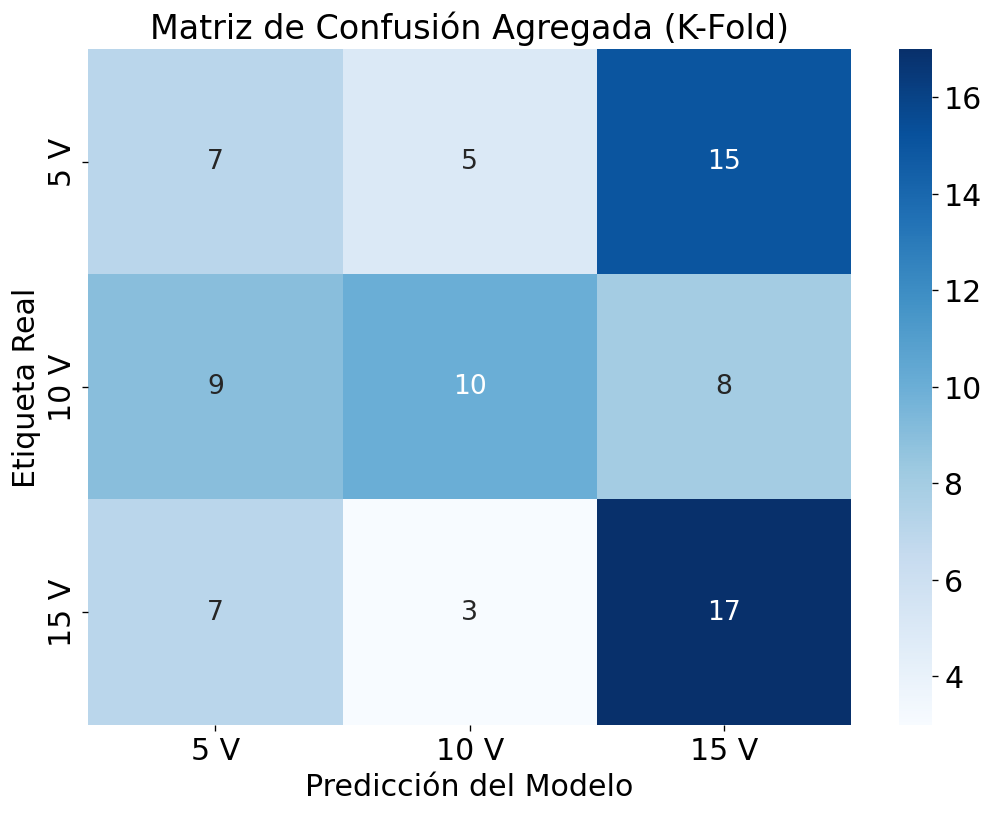


--- Reporte de Clasificación Agregado (Todos los Folds) ---
              precision    recall  f1-score   support

         5 V       0.30      0.26      0.28        27
        10 V       0.56      0.37      0.44        27
        15 V       0.42      0.63      0.51        27

    accuracy                           0.42        81
   macro avg       0.43      0.42      0.41        81
weighted avg       0.43      0.42      0.41        81

Generando Curva ROC Agregada (Todos los Folds)...


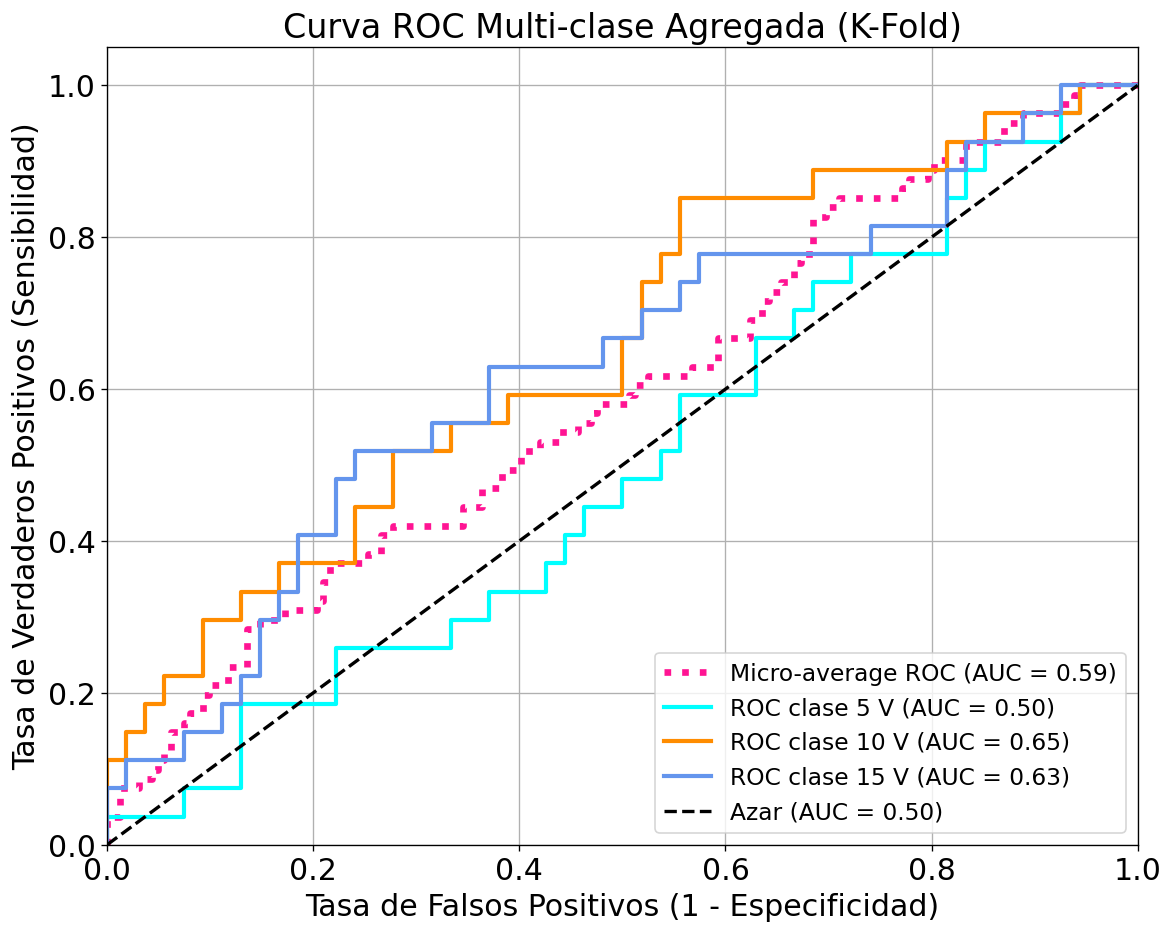

Generando curvas de aprendizaje (Loss vs. Épocas y Acc vs. Épocas)...


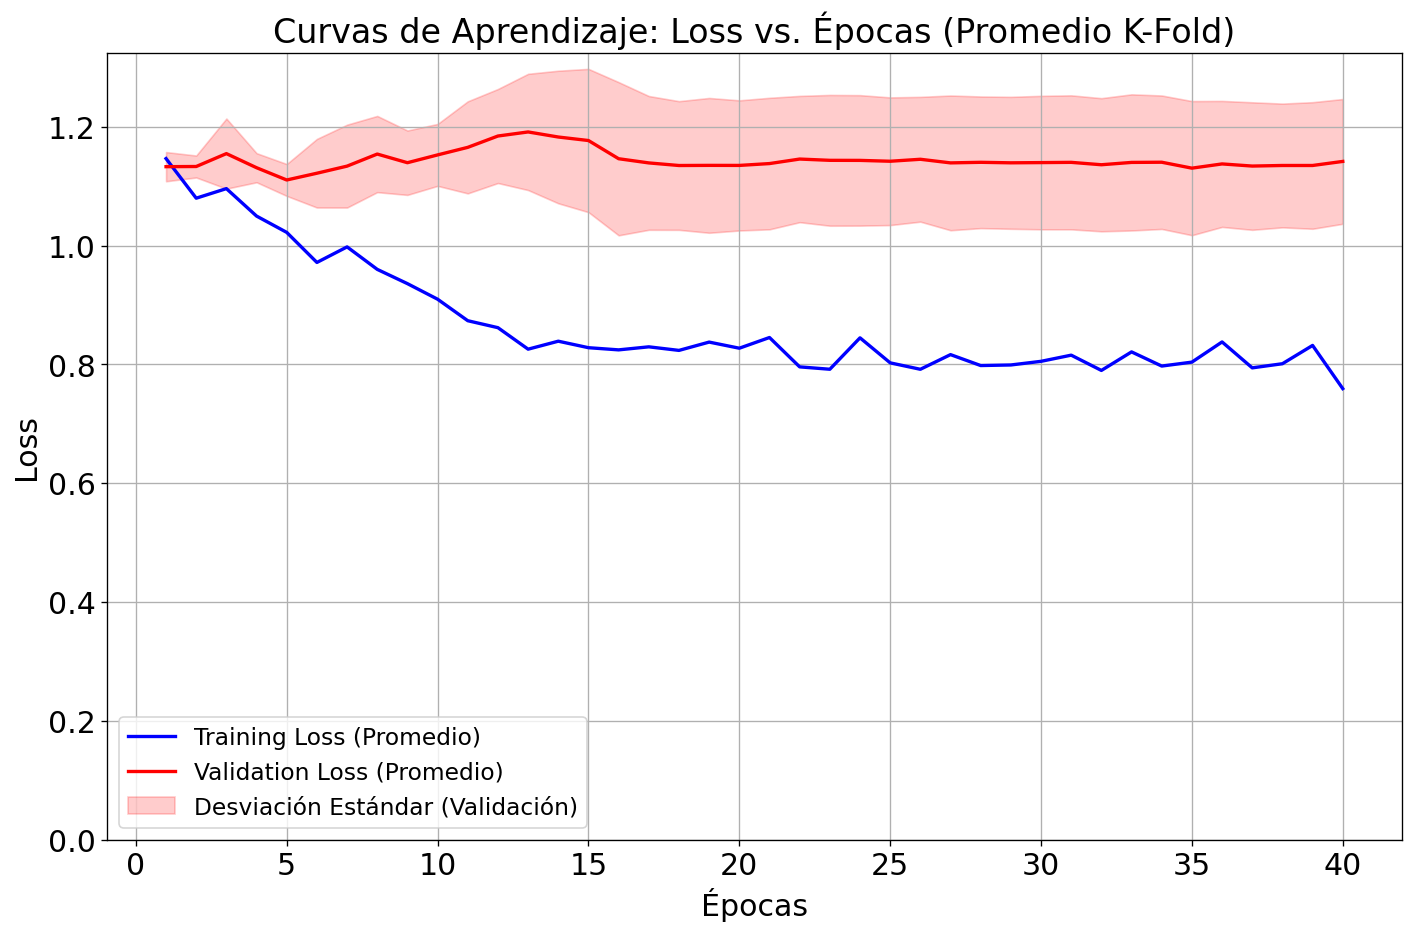

/tmp/ipython-input-634606939.py:424: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(epochs, mean_val_f1, 'o-', lw=2, label='Validation F1-Score (Promedio)', linestyle='--')


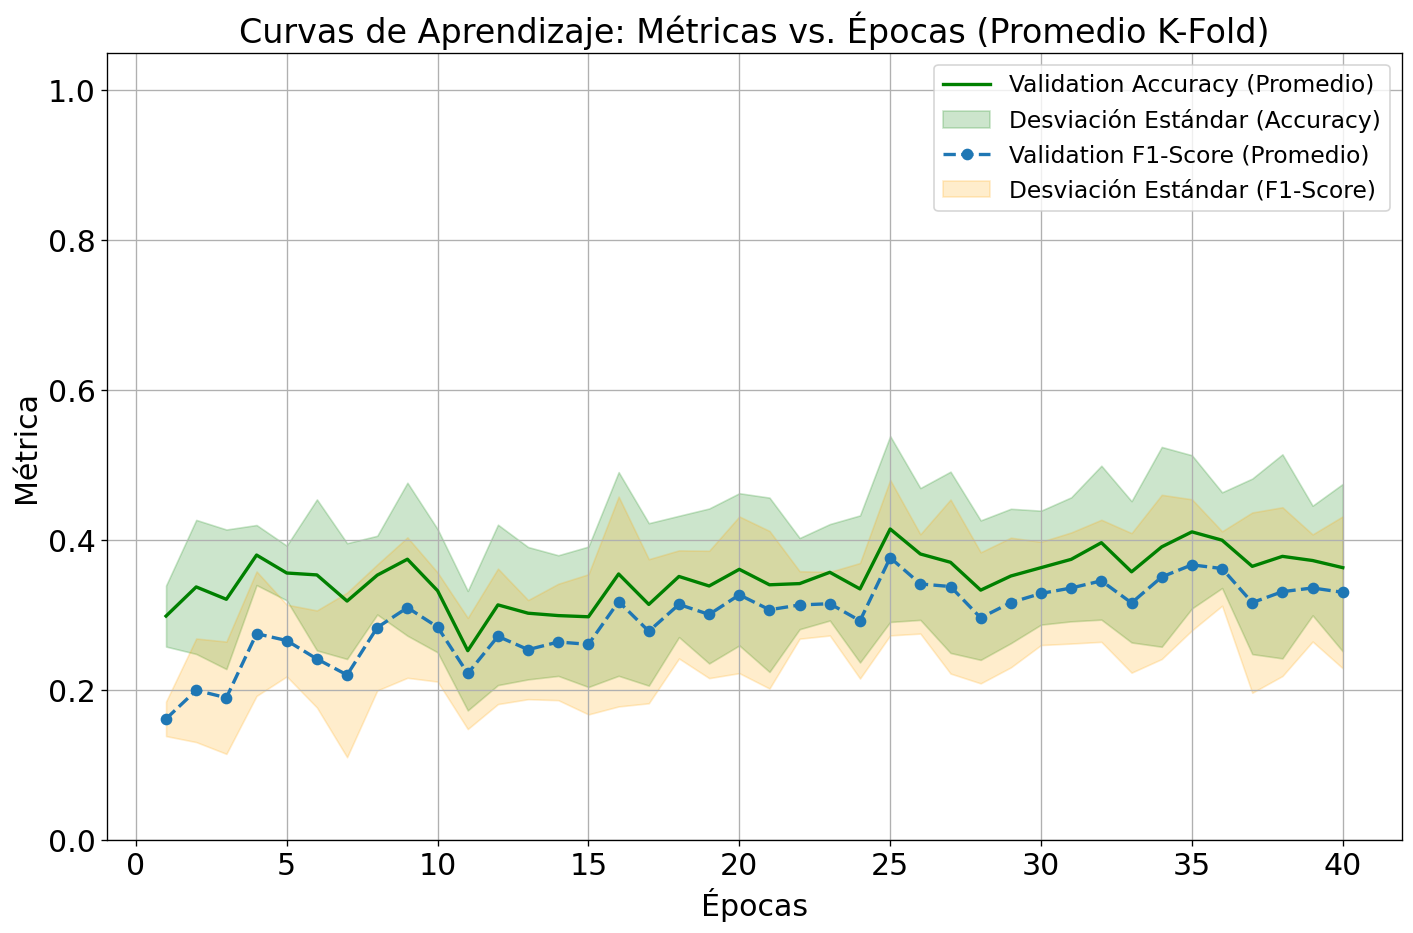


Proceso finalizado.


In [ ]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset
from PIL import Image
from torchvision import transforms
import timm
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from torchmetrics.classification import (
    MulticlassAccuracy, MulticlassF1Score,
    MulticlassPrecision, MulticlassRecall
)
from torch.optim.lr_scheduler import ReduceLROnPlateau

# --------------------------------------------------------------------
# CONFIGURACIÓN GLOBAL DE GRÁFICOS (TAMAÑOS GRANDES PARA TESIS / PPT)
# --------------------------------------------------------------------
plt.rcParams.update({
    "figure.dpi": 120,        # resolución en notebook
    "savefig.dpi": 300,       # resolución al guardar
    "axes.titlesize": 22,     # tamaño títulos de los ejes
    "axes.labelsize": 18,     # etiquetas de los ejes
    "xtick.labelsize": 18,    # números eje X
    "ytick.labelsize": 18,    # números eje Y
    "legend.fontsize": 18,    # leyendas
    "font.size": 14           # tamaño base
})

# ========================================================================
# SECCIÓN 1: CONFIGURACIÓN
# ========================================================================
IMAGE_DIR = r'/content/drive/MyDrive/ISIS3002_-_Tesis_Electronica/Enhanced_Batch_224'
CSV_PATH = r'/content/drive/MyDrive/ISIS3002_-_Tesis_Electronica/Fase_2_Visual_Transformers/labelsVoltajes.csv'

MODEL_NAME = 'mobilenetv3_small_100'
NUM_EPOCHS = 40
BATCH_SIZE = 16
LEARNING_RATE = 1e-4
WEIGHT_DECAY = 5e-4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo: {DEVICE}")

K_FOLDS = 5
RANDOM_STATE = 42

# ========================================================================
# SECCIÓN 2: PREPARACIÓN DE DATOS
# ========================================================================
try:
    df_labels = pd.read_csv(CSV_PATH)
    # nombres "crudos" tal como aparecen en el CSV
    class_names = sorted(df_labels.iloc[:, 1].unique())
    num_classes = len(class_names)
    print(f"Detectadas {num_classes} clases: {class_names}")
    print(f"Conteo de muestras por clase:\n{df_labels.iloc[:, 1].value_counts()}")

    class_to_idx = {class_name: i for i, class_name in enumerate(class_names)}
    idx_to_class = {i: class_name for i, class_name in enumerate(class_names)}

    # ---- Mapeo SOLO PARA VISUALIZACIÓN EN GRÁFICAS ----
    pretty_name_map = {
        '5': '5 V',
        '10': '10 V',
        '15': '15 V'
    }
    # Lista en el mismo orden que class_names, pero con etiquetas "bonitas"
    pretty_class_names = [
        pretty_name_map.get(str(c), str(c)) for c in class_names
    ]
    print(f"Nombres para visualización: {pretty_class_names}")

except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{CSV_PATH}'.")
    raise


class VoltageDataset(Dataset):
    def __init__(self, csv_path, image_dir, class_to_idx, transform=None):
        self.dataframe = pd.read_csv(csv_path)
        self.image_dir = image_dir
        self.transform = transform
        self.class_to_idx = class_to_idx
        self.label_column_name = self.dataframe.columns[1]

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        base_name = self.dataframe.iloc[idx, 0]
        base_name_without_ext = os.path.splitext(base_name)[0]
        img_name = os.path.join(self.image_dir, f"{base_name_without_ext}.png")

        try:
            image = Image.open(img_name).convert("L")  # escala de grises
        except FileNotFoundError:
            print(f"Error: No se pudo encontrar la imagen {img_name}")
            # fallback seguro, pero idealmente revisar rutas si esto aparece
            return torch.empty(1, 224, 224), torch.tensor(0, dtype=torch.long)

        label_value = self.dataframe.iloc[idx][self.label_column_name]
        label_idx = self.class_to_idx[label_value]

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label_idx, dtype=torch.long)


class AddGaussianNoise(object):
    def __init__(self, mean=0., std=0.01):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        noise = torch.randn(tensor.size()) * self.std + self.mean
        noisy_tensor = tensor + noise
        noisy_tensor = torch.clamp(noisy_tensor, 0., 1.)
        return noisy_tensor

    def __repr__(self):
        return self.__class__.__name__ + f'(mean={self.mean}, std={self.std})'


# Data Augmentation (suavizado)
data_transform = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.RandomCrop(224, padding=10, padding_mode='reflect'),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.1, contrast=0.1),
        transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
        transforms.ToTensor(),
        AddGaussianNoise(mean=0., std=0.005),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]),
}

# ========================================================================
# SECCIÓN 3: DEFINICIÓN DEL MODELO (MobileNetV3)
# ========================================================================
def create_mobilenet_classifier(model_name, num_classes, pretrained=True):
    """
    Crea un modelo MobileNetV3 adaptado para 1 canal de entrada y con Dropout.
    """
    model = timm.create_model(model_name, pretrained=pretrained)

    # Adaptar conv_stem (primera capa) para 1 canal (escala de grises)
    conv_stem_weights = model.conv_stem.weight.data
    model.conv_stem.in_channels = 1
    model.conv_stem.weight.data = conv_stem_weights.mean(dim=1, keepdim=True)

    # Adaptar el clasificador final y añadir Dropout
    num_features = model.classifier.in_features
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.5, inplace=True),
        nn.Linear(num_features, num_classes)
    )
    return model

# ========================================================================
# SECCIÓN 4: BUCLE DE ENTRENAMIENTO
# ========================================================================
def train_model(model, train_loader, val_loader, criterion, optimizer,
                scheduler, num_epochs, num_classes, model_save_path):
    best_val_loss = float('inf')
    metrics = {
        'acc': MulticlassAccuracy(num_classes=num_classes, average='macro').to(DEVICE),
        'pre': MulticlassPrecision(num_classes=num_classes, average='macro').to(DEVICE),
        'rec': MulticlassRecall(num_classes=num_classes, average='macro').to(DEVICE),
        'f1': MulticlassF1Score(num_classes=num_classes, average='macro').to(DEVICE)
    }
    history = {'train_loss': [], 'val_loss': [], 'val_acc': [], 'val_f1': []}

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        train_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", leave=False)
        for inputs, labels in train_tqdm:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            train_tqdm.set_postfix(loss=loss.item())

        train_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(train_loss)

        model.eval()
        val_loss = 0.0
        for metric in metrics.values():
            metric.reset()
        val_tqdm = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]", leave=False)
        with torch.no_grad():
            for inputs, labels in val_tqdm:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                for metric in metrics.values():
                    metric.update(outputs, labels)

        val_loss /= len(val_loader.dataset)
        val_acc = metrics['acc'].compute()
        val_pre = metrics['pre'].compute()
        val_rec = metrics['rec'].compute()
        val_f1 = metrics['f1'].compute()

        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc.item())
        history['val_f1'].append(val_f1.item())

        if (epoch + 1) % 10 == 0 or epoch == num_epochs - 1:
            print(f"Epoch {epoch+1}/{num_epochs} -> Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
            print(f"  Metrics -> Acc: {val_acc:.4f} | Precision: {val_pre:.4f} | Recall: {val_rec:.4f} | F1: {val_f1:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), model_save_path)

        scheduler.step(val_loss)

    print(f"Fold finalizado. Mejor Val Loss: {best_val_loss:.4f}")
    return history

# ========================================================================
# SECCIÓN 6: EVALUACIÓN (MODIFICADA PARA K-FOLD)
# ========================================================================
def evaluate_fold(model, dataloader, device, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    all_scores = []
    n_classes = len(class_names)

    acc_metric = MulticlassAccuracy(num_classes=n_classes, average='macro').to(device)
    pre_metric = MulticlassPrecision(num_classes=n_classes, average='macro').to(device)
    rec_metric = MulticlassRecall(num_classes=n_classes, average='macro').to(device)
    f1_metric  = MulticlassF1Score(num_classes=n_classes, average='macro').to(device)

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            scores = torch.nn.functional.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_scores.extend(scores.cpu().numpy())

            acc_metric.update(outputs, labels)
            pre_metric.update(outputs, labels)
            rec_metric.update(outputs, labels)
            f1_metric.update(outputs, labels)

    final_acc = acc_metric.compute().item()
    final_pre = pre_metric.compute().item()
    final_rec = rec_metric.compute().item()
    final_f1  = f1_metric.compute().item()

    print("\n--- Métricas (torchmetrics) del Fold ---")
    print(f"Accuracy:  {final_acc:.4f}")
    print(f"Precision: {final_pre:.4f}")
    print(f"Recall:    {final_rec:.4f}")
    print(f"F1 Score:  {final_f1:.4f}")

    return {
        'acc': final_acc, 'pre': final_pre, 'rec': final_rec, 'f1': final_f1,
        'labels': all_labels, 'preds': all_preds, 'scores': all_scores
    }

# ========================================================================
# SECCIÓN 7: GRÁFICOS (MATRIZ, ROC Y CURVAS DE APRENDIZAJE)
# ========================================================================
def plot_final_confusion_matrix(all_labels, all_preds, display_names):
    """
    display_names: lista de nombres ya formateados (por ejemplo '10 Hz', '1 kHz', '100 kHz')
    """
    print("\n--- Matriz de Confusión Agregada (Todos los Folds) ---")
    cm = confusion_matrix(all_labels, all_preds)

    fig, ax = plt.subplots(figsize=(9, 7))
    sns.heatmap(
        cm,
        annot=True,
        fmt='g',
        cmap='Blues',
        xticklabels=[str(c) for c in display_names],
        yticklabels=[str(c) for c in display_names],
        annot_kws={"size": 16}
    )
    ax.set_xlabel('Predicción del Modelo', fontsize=18)
    ax.set_ylabel('Etiqueta Real', fontsize=18)
    ax.set_title('Matriz de Confusión Agregada (K-Fold)', fontsize=20)
    plt.tight_layout()
    plt.show()

    print("\n--- Reporte de Clasificación Agregado (Todos los Folds) ---")
    report = classification_report(
        all_labels,
        all_preds,
        target_names=[str(c) for c in display_names],
        zero_division=0
    )
    print(report)


def plot_final_roc_curves(all_labels, all_scores, display_names):
    """
    display_names: nombres formateados para las clases.
    """
    print("Generando Curva ROC Agregada (Todos los Folds)...")
    n_classes = len(display_names)
    all_labels_bin = label_binarize(all_labels, classes=range(n_classes))
    all_scores = np.array(all_scores)

    fpr, tpr, roc_auc = {}, {}, {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], all_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_bin.ravel(), all_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fig, ax = plt.subplots(figsize=(10, 8))

    ax.plot(
        fpr["micro"], tpr["micro"],
        label=f'Micro-average ROC (AUC = {roc_auc["micro"]:0.2f})',
        color='deeppink', linestyle=':', linewidth=4
    )

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
    for i, color in zip(range(n_classes), colors):
        ax.plot(
            fpr[i], tpr[i],
            color=color, lw=2.5,
            label=f'ROC clase {display_names[i]} (AUC = {roc_auc[i]:0.2f})'
        )

    ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Azar (AUC = 0.50)')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Tasa de Falsos Positivos (1 - Especificidad)', fontsize=18)
    ax.set_ylabel('Tasa de Verdaderos Positivos (Sensibilidad)', fontsize=18)
    ax.set_title('Curva ROC Multi-clase Agregada (K-Fold)', fontsize=20)
    ax.legend(loc="lower right", fontsize=14)
    ax.grid(True)

    plt.tight_layout()
    plt.show()


def plot_learning_curves(all_histories, num_epochs):
    print("Generando curvas de aprendizaje (Loss vs. Épocas y Acc vs. Épocas)...")

    train_loss_matrix = np.array([h['train_loss'] for h in all_histories])
    val_loss_matrix   = np.array([h['val_loss']   for h in all_histories])
    val_acc_matrix    = np.array([h['val_acc']    for h in all_histories])
    val_f1_matrix     = np.array([h['val_f1']     for h in all_histories])

    mean_train_loss = np.mean(train_loss_matrix, axis=0)
    mean_val_loss   = np.mean(val_loss_matrix,   axis=0)
    std_val_loss    = np.std(val_loss_matrix,    axis=0)
    mean_val_acc    = np.mean(val_acc_matrix,    axis=0)
    std_val_acc     = np.std(val_acc_matrix,     axis=0)
    mean_val_f1     = np.mean(val_f1_matrix,     axis=0)
    std_val_f1      = np.std(val_f1_matrix,      axis=0)

    epochs = range(1, num_epochs + 1)

    # ---------- Loss ----------
    fig1, ax1 = plt.subplots(figsize=(12, 8))
    ax1.plot(epochs, mean_train_loss, 'b-', lw=2, label='Training Loss (Promedio)')
    ax1.plot(epochs, mean_val_loss,   'r-', lw=2, label='Validation Loss (Promedio)')
    ax1.fill_between(
        epochs,
        mean_val_loss - std_val_loss,
        mean_val_loss + std_val_loss,
        color='r', alpha=0.2,
        label='Desviación Estándar (Validación)'
    )

    ax1.set_title('Curvas de Aprendizaje: Loss vs. Épocas (Promedio K-Fold)', fontsize=20)
    ax1.set_xlabel('Épocas', fontsize=18)
    ax1.set_ylabel('Loss', fontsize=18)
    ax1.legend(fontsize=14)
    ax1.grid(True)
    ax1.set_ylim(bottom=0)

    plt.tight_layout()
    plt.show()

    # ---------- Accuracy & F1 ----------
    fig2, ax2 = plt.subplots(figsize=(12, 8))
    ax2.plot(epochs, mean_val_acc, 'g-', lw=2, label='Validation Accuracy (Promedio)')
    ax2.fill_between(
        epochs,
        mean_val_acc - std_val_acc,
        mean_val_acc + std_val_acc,
        color='g', alpha=0.2,
        label='Desviación Estándar (Accuracy)'
    )

    ax2.plot(epochs, mean_val_f1, 'o-', lw=2, label='Validation F1-Score (Promedio)', linestyle='--')
    ax2.fill_between(
        epochs,
        mean_val_f1 - std_val_f1,
        mean_val_f1 + std_val_f1,
        color='orange', alpha=0.2,
        label='Desviación Estándar (F1-Score)'
    )

    ax2.set_title('Curvas de Aprendizaje: Métricas vs. Épocas (Promedio K-Fold)', fontsize=20)
    ax2.set_xlabel('Épocas', fontsize=18)
    ax2.set_ylabel('Métrica', fontsize=18)
    ax2.legend(fontsize=14)
    ax2.grid(True)
    ax2.set_ylim(0.0, 1.05)

    plt.tight_layout()
    plt.show()

# ========================================================================
# SECCIÓN 8: EJECUCIÓN PRINCIPAL (K-FOLD)
# ========================================================================
if __name__ == "__main__":

    dataset_for_train = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['train']
    )
    dataset_for_val = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['val']
    )

    print("\n--- Transformaciones de Entrenamiento (MobileNet) ---")
    print(dataset_for_train.transform)
    print("----------------------------------------\n")

    kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=RANDOM_STATE)

    fold_metrics = {'acc': [], 'pre': [], 'rec': [], 'f1': []}
    all_folds_labels = []
    all_folds_preds = []
    all_folds_scores = []
    all_fold_histories = []

    print(f"Iniciando Cross-Validation de {K_FOLDS} folds...")
    print("=" * 70)

    for fold, (train_ids, val_ids) in enumerate(kfold.split(dataset_for_train)):
        print(f"\n======= FOLD {fold+1}/{K_FOLDS} =======")

        train_sub = Subset(dataset_for_train, train_ids)
        val_sub   = Subset(dataset_for_val,   val_ids)
        train_loader = DataLoader(
            train_sub, batch_size=BATCH_SIZE, shuffle=True,
            num_workers=2, pin_memory=True
        )
        val_loader = DataLoader(
            val_sub, batch_size=BATCH_SIZE, shuffle=False,
            num_workers=2, pin_memory=True
        )

        print(f"Datos del Fold: {len(train_sub)} para entrenamiento, {len(val_sub)} para validación.")

        model = create_mobilenet_classifier(
            MODEL_NAME, num_classes=num_classes, pretrained=True
        ).to(DEVICE)

        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.AdamW(
            model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY
        )
        scheduler = ReduceLROnPlateau(
            optimizer, mode='min', factor=0.1, patience=5
        )

        model_save_path = f'best_model_fold_{fold+1}.pth'

        print(f"Entrenando Fold {fold+1}...")
        fold_history = train_model(
            model, train_loader, val_loader,
            criterion, optimizer, scheduler,
            NUM_EPOCHS, num_classes, model_save_path
        )
        all_fold_histories.append(fold_history)

        print(f"\nEvaluando mejor modelo del Fold {fold+1}...")
        best_model = create_mobilenet_classifier(
            MODEL_NAME, num_classes=num_classes, pretrained=False
        ).to(DEVICE)
        best_model.load_state_dict(torch.load(model_save_path, map_location=DEVICE))

        fold_results = evaluate_fold(best_model, val_loader, DEVICE, class_names)

        fold_metrics['acc'].append(fold_results['acc'])
        fold_metrics['pre'].append(fold_results['pre'])
        fold_metrics['rec'].append(fold_results['rec'])
        fold_metrics['f1'].append(fold_results['f1'])

        all_folds_labels.extend(fold_results['labels'])
        all_folds_preds.extend(fold_results['preds'])
        all_folds_scores.extend(fold_results['scores'])

    print("\n" + "=" * 70)
    print("CROSS-VALIDATION COMPLETADA")
    print("=" * 70)

    print(f"\n--- Resumen de Métricas (Promedio de {K_FOLDS} Folds) ---")
    print(f"Accuracy:  {np.mean(fold_metrics['acc']):.4f} +/- {np.std(fold_metrics['acc']):.4f}")
    print(f"Precision: {np.mean(fold_metrics['pre']):.4f} +/- {np.std(fold_metrics['pre']):.4f}")
    print(f"Recall:    {np.mean(fold_metrics['rec']):.4f} +/- {np.std(fold_metrics['rec']):.4f}")
    print(f"F1 Score:  {np.mean(fold_metrics['f1']):.4f} +/- {np.std(fold_metrics['f1']):.4f}")

    # Aquí usamos los nombres "bonitos" para las figuras
    plot_final_confusion_matrix(all_folds_labels, all_folds_preds, pretty_class_names)
    plot_final_roc_curves(all_folds_labels, all_folds_scores, pretty_class_names)
    plot_learning_curves(all_fold_histories, NUM_EPOCHS)

    print("\nProceso finalizado.")


## ResNet 18 Aumentado

Usando dispositivo: cuda
Detectadas 3 clases: [np.int64(5), np.int64(10), np.int64(15)]
Conteo de muestras por clase:
Voltaje
5     27
10    27
15    27
Name: count, dtype: int64
Nombres para visualización: ['5 V', '10 V', '15 V']

--- Transformaciones de Entrenamiento (resnet18) ---
Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.6, 1.0), ratio=(0.9, 1.1), interpolation=bilinear, antialias=True)
    RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
    RandomAffine(degrees=[0.0, 0.0], translate=(0.1, 0.1), shear=[-5.0, 5.0])
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    ColorJitter(brightness=(0.75, 1.25), contrast=(0.75, 1.25), saturation=None, hue=None)
    RandomPerspective(p=0.3)
    GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0))
    ToTensor()
    AddGaussianNoise(mean=0.0, std=0.01)
    Normalize(mean=[0.5], std=[0.5])
)
----------------------------------------

Iniciando Cross-Validation de 5 folds...

======= FO

Epoch 10/40 -> Train Loss: 1.0832 | Val Loss: 1.1110
  Metrics -> Acc: 0.3333 | Precision: 0.0784 | Recall: 0.3333 | F1: 0.1270


Epoch 20/40 -> Train Loss: 1.1054 | Val Loss: 1.1266
  Metrics -> Acc: 0.3333 | Precision: 0.0784 | Recall: 0.3333 | F1: 0.1270


Epoch 30/40 -> Train Loss: 1.0979 | Val Loss: 1.1208
  Metrics -> Acc: 0.2500 | Precision: 0.0625 | Recall: 0.2500 | F1: 0.1000


Epoch 40/40 -> Train Loss: 1.0912 | Val Loss: 1.1192
  Metrics -> Acc: 0.3333 | Precision: 0.0784 | Recall: 0.3333 | F1: 0.1270
Fold finalizado. Mejor Val Loss: 1.1014

Evaluando mejor modelo del Fold 1...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.3333
Precision: 0.0784
Recall:    0.3333
F1 Score:  0.1270

======= FOLD 2/5 =======
Datos del Fold: 65 train, 16 val.
Entrenando Fold 2...


Epoch 10/40 -> Train Loss: 1.1040 | Val Loss: 1.1184
  Metrics -> Acc: 0.3500 | Precision: 0.1879 | Recall: 0.3500 | F1: 0.2407


Epoch 20/40 -> Train Loss: 1.1127 | Val Loss: 1.1100
  Metrics -> Acc: 0.3500 | Precision: 0.1944 | Recall: 0.3500 | F1: 0.2402


Epoch 30/40 -> Train Loss: 1.0746 | Val Loss: 1.1209
  Metrics -> Acc: 0.3000 | Precision: 0.1693 | Recall: 0.3000 | F1: 0.2165


Epoch 40/40 -> Train Loss: 1.1034 | Val Loss: 1.1158
  Metrics -> Acc: 0.2167 | Precision: 0.1222 | Recall: 0.2167 | F1: 0.1556
Fold finalizado. Mejor Val Loss: 1.0953

Evaluando mejor modelo del Fold 2...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.3500
Precision: 0.1879
Recall:    0.3500
F1 Score:  0.2407

======= FOLD 3/5 =======
Datos del Fold: 65 train, 16 val.
Entrenando Fold 3...


Epoch 10/40 -> Train Loss: 1.0802 | Val Loss: 1.1005
  Metrics -> Acc: 0.3333 | Precision: 0.1042 | Recall: 0.3333 | F1: 0.1587


Epoch 20/40 -> Train Loss: 1.0994 | Val Loss: 1.1246
  Metrics -> Acc: 0.2667 | Precision: 0.0952 | Recall: 0.2667 | F1: 0.1404


Epoch 30/40 -> Train Loss: 1.1278 | Val Loss: 1.1242
  Metrics -> Acc: 0.2667 | Precision: 0.0889 | Recall: 0.2667 | F1: 0.1333


Epoch 40/40 -> Train Loss: 1.0539 | Val Loss: 1.1265
  Metrics -> Acc: 0.2000 | Precision: 0.0909 | Recall: 0.2000 | F1: 0.1250
Fold finalizado. Mejor Val Loss: 1.0951

Evaluando mejor modelo del Fold 3...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.4286
Precision: 0.4524
Recall:    0.4286
F1 Score:  0.3236

======= FOLD 4/5 =======
Datos del Fold: 65 train, 16 val.
Entrenando Fold 4...


Epoch 10/40 -> Train Loss: 1.0887 | Val Loss: 1.1012
  Metrics -> Acc: 0.3333 | Precision: 0.1333 | Recall: 0.3333 | F1: 0.1905


Epoch 20/40 -> Train Loss: 1.0982 | Val Loss: 1.0969
  Metrics -> Acc: 0.2778 | Precision: 0.1282 | Recall: 0.2778 | F1: 0.1754


Epoch 30/40 -> Train Loss: 1.1038 | Val Loss: 1.0931
  Metrics -> Acc: 0.3333 | Precision: 0.2857 | Recall: 0.3333 | F1: 0.2500


Epoch 40/40 -> Train Loss: 1.1156 | Val Loss: 1.0870
  Metrics -> Acc: 0.3333 | Precision: 0.2857 | Recall: 0.3333 | F1: 0.2500
Fold finalizado. Mejor Val Loss: 1.0870

Evaluando mejor modelo del Fold 4...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.3333
Precision: 0.2857
Recall:    0.3333
F1 Score:  0.2500

======= FOLD 5/5 =======
Datos del Fold: 65 train, 16 val.
Entrenando Fold 5...


Epoch 10/40 -> Train Loss: 1.1029 | Val Loss: 1.0791
  Metrics -> Acc: 0.5556 | Precision: 0.5571 | Recall: 0.5556 | F1: 0.5536


Epoch 20/40 -> Train Loss: 1.0910 | Val Loss: 1.1129
  Metrics -> Acc: 0.3056 | Precision: 0.1880 | Recall: 0.3056 | F1: 0.1917


Epoch 30/40 -> Train Loss: 1.0730 | Val Loss: 1.1134
  Metrics -> Acc: 0.3611 | Precision: 0.2242 | Recall: 0.3611 | F1: 0.2545


Epoch 40/40 -> Train Loss: 1.0764 | Val Loss: 1.1209
  Metrics -> Acc: 0.3611 | Precision: 0.2500 | Recall: 0.3611 | F1: 0.2583
Fold finalizado. Mejor Val Loss: 1.0791

Evaluando mejor modelo del Fold 5...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.5556
Precision: 0.5571
Recall:    0.5556
F1 Score:  0.5536

CROSS-VALIDATION COMPLETADA

--- Resumen de Métricas (Promedio de 5 Folds) ---
Accuracy:  0.4002 +/- 0.0853
Precision: 0.3123 +/- 0.1735
Recall:    0.4002 +/- 0.0853
F1 Score:  0.2990 +/- 0.1420

--- Matriz de Confusión Agregada (Todos los Folds) ---


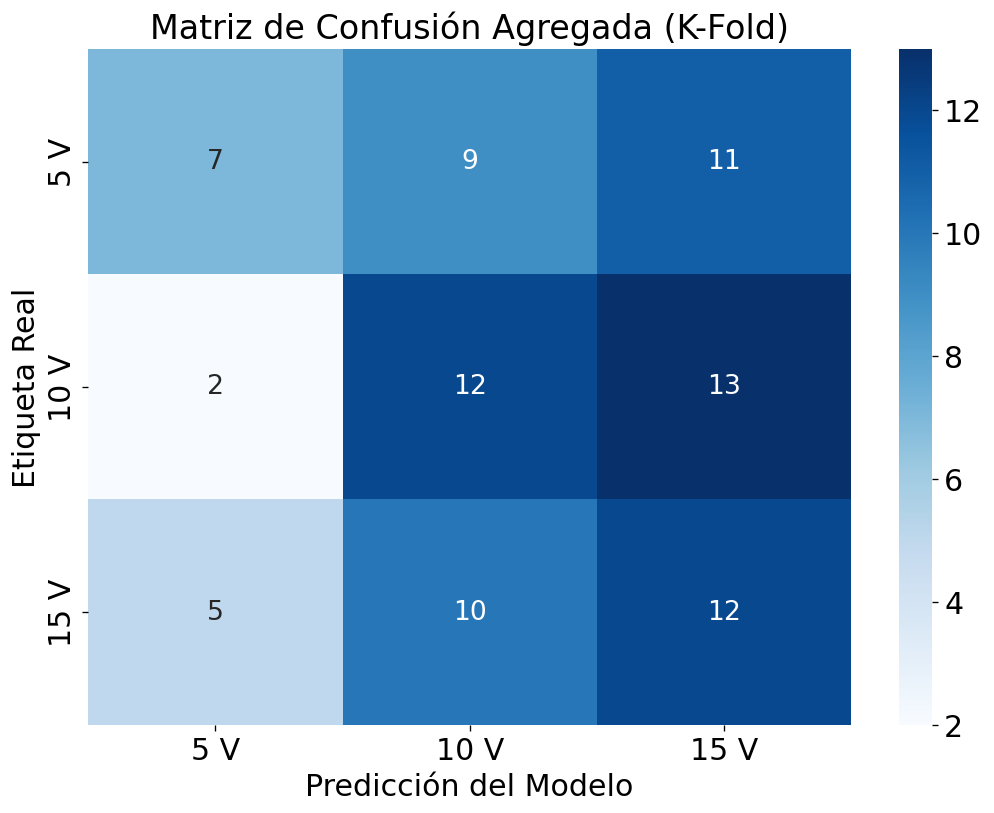


--- Reporte de Clasificación Agregado (Todos los Folds) ---
              precision    recall  f1-score   support

         5 V       0.50      0.26      0.34        27
        10 V       0.39      0.44      0.41        27
        15 V       0.33      0.44      0.38        27

    accuracy                           0.38        81
   macro avg       0.41      0.38      0.38        81
weighted avg       0.41      0.38      0.38        81

Generando Curva ROC Agregada (Todos los Folds)...


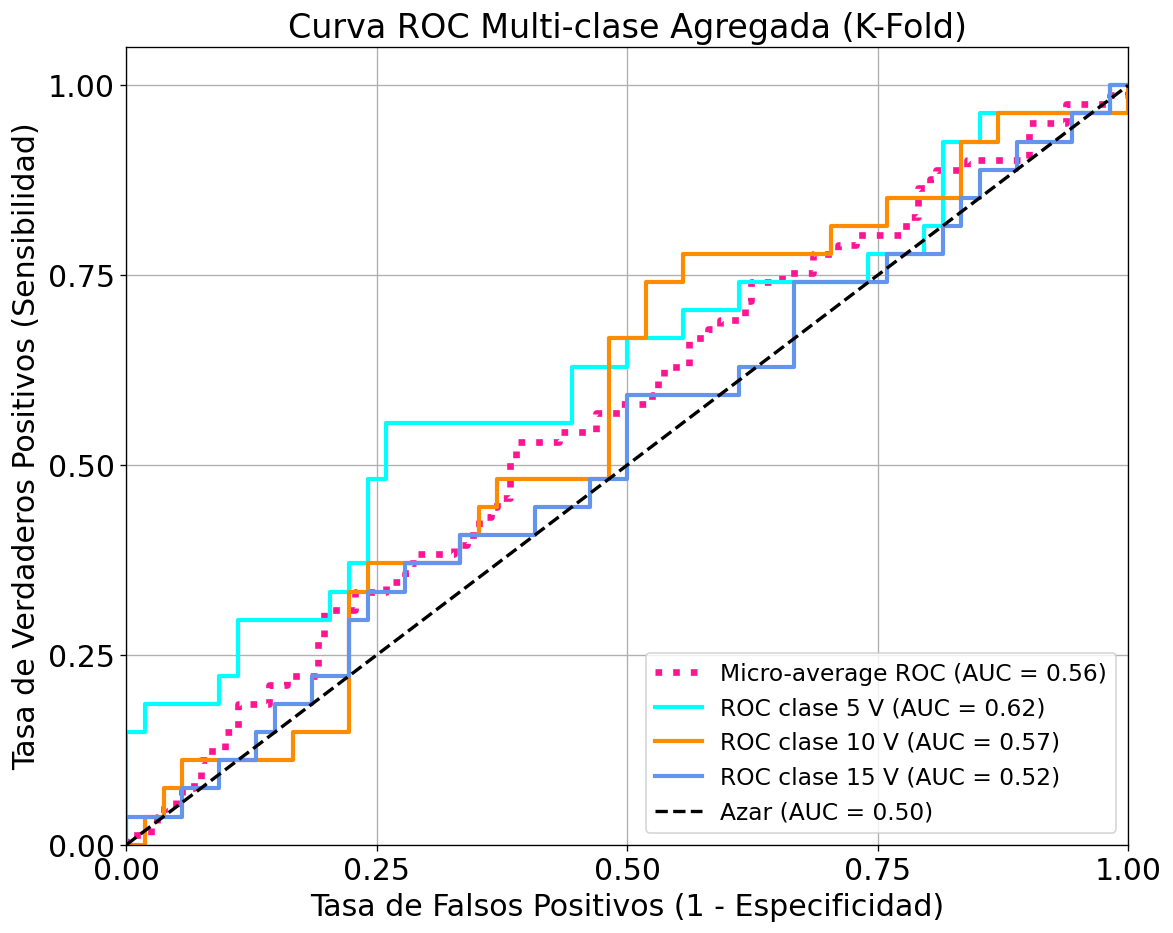

Generando curvas de aprendizaje (Loss / Métricas vs. Épocas)...


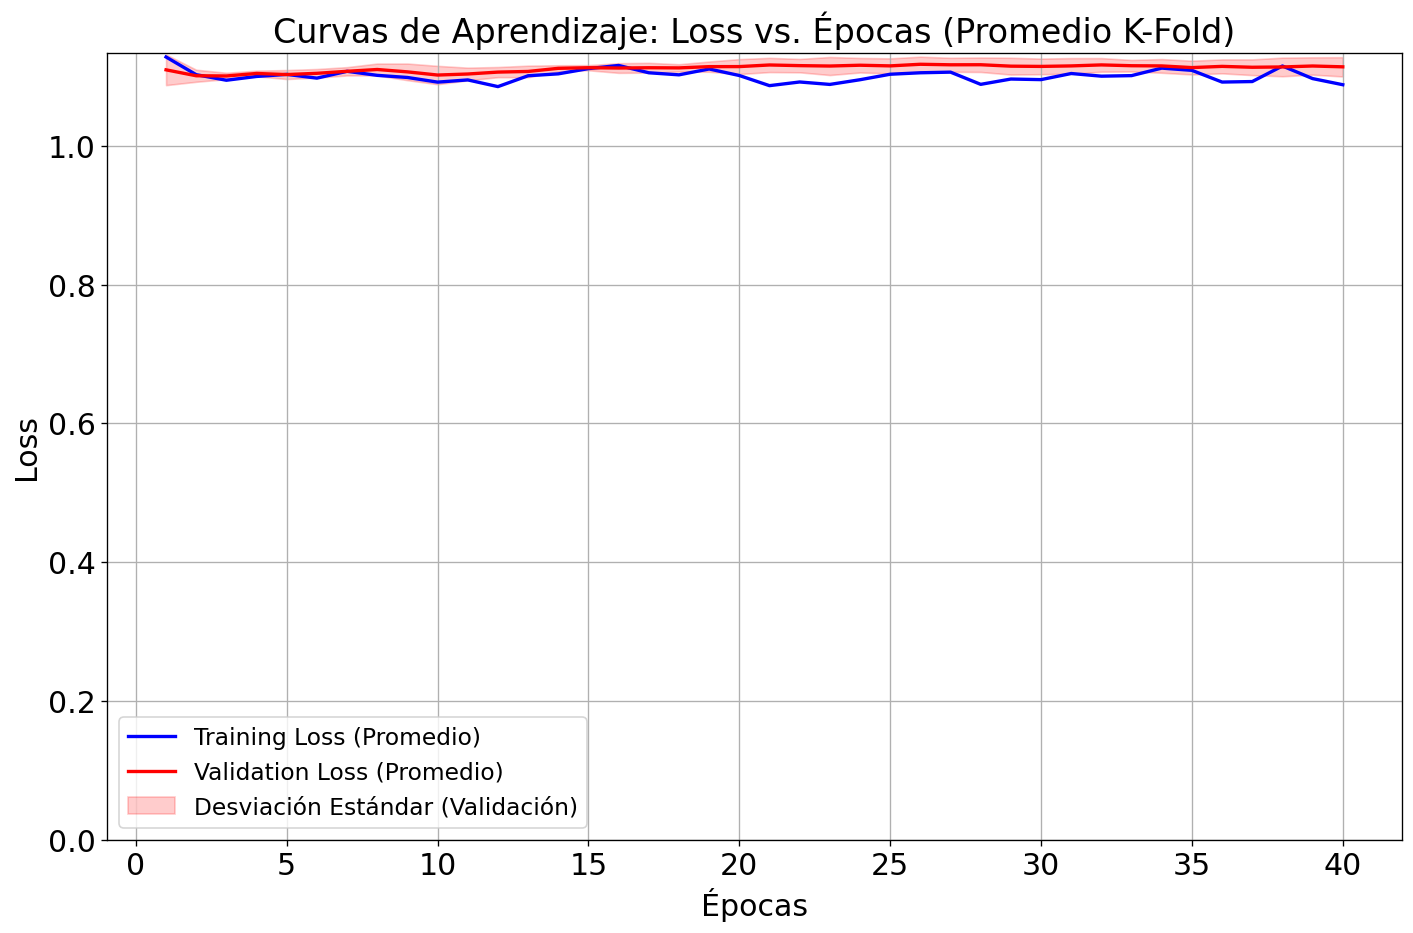

/tmp/ipython-input-2022959093.py:440: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(epochs, mean_val_f1, 'o-', lw=2, label='Validation F1-Score (Promedio)', linestyle='--')


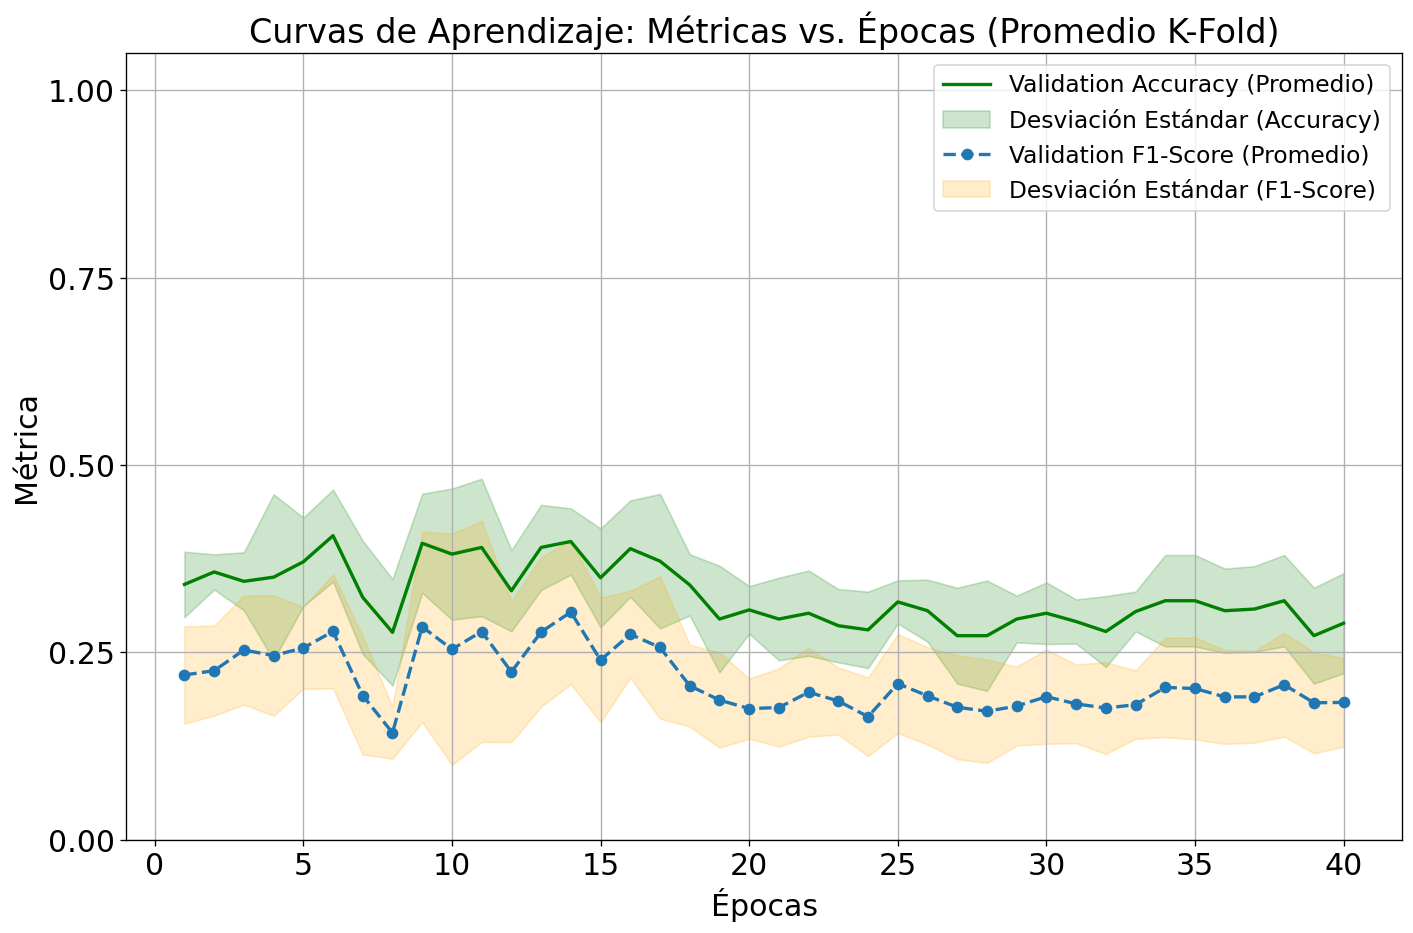


Proceso finalizado.


In [ ]:
# -*- coding: utf-8 -*-
import os
import random
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset

from PIL import Image
from torchvision import transforms
import timm

from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

from torchmetrics.classification import (
    MulticlassAccuracy, MulticlassF1Score,
    MulticlassPrecision, MulticlassRecall
)
from torch.optim.lr_scheduler import ReduceLROnPlateau

# --------------------------------------------------------------------
# CONFIGURACIÓN GLOBAL DE GRÁFICOS (TAMAÑOS GRANDES PARA TESIS / PPT)
# --------------------------------------------------------------------
plt.rcParams.update({
    "figure.dpi": 120,        # resolución en notebook
    "savefig.dpi": 300,       # resolución al guardar
    "axes.titlesize": 22,     # títulos
    "axes.labelsize": 18,     # etiquetas de ejes
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.fontsize": 18,
    "font.size": 14
})

# ---------------------------------------------------------
# REPRODUCIBILIDAD
# ---------------------------------------------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

# ========================================================================
# SECCIÓN 1: CONFIGURACIÓN
# ========================================================================
IMAGE_DIR = r'/content/drive/MyDrive/ISIS3002_-_Tesis_Electronica/Enhanced_Batch_224'
CSV_PATH = r'/content/drive/MyDrive/ISIS3002_-_Tesis_Electronica/Fase_2_Visual_Transformers/labelsVoltajes.csv'

MODEL_NAME   = 'resnet18'    # ResNet-18 (timm)
NUM_EPOCHS   = 40
BATCH_SIZE   = 16
LEARNING_RATE= 3e-4
WEIGHT_DECAY = 5e-4
DEVICE       = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo: {DEVICE}")

K_FOLDS      = 5
RANDOM_STATE = 42

# ========================================================================
# SECCIÓN 2: PREPARACIÓN DE DATOS
# ========================================================================
try:
    df_labels = pd.read_csv(CSV_PATH)
    class_names = sorted(df_labels.iloc[:, 1].unique())   # valores crudos: 10, 1000, 100000
    num_classes = len(class_names)
    print(f"Detectadas {num_classes} clases: {class_names}")
    print(f"Conteo de muestras por clase:\n{df_labels.iloc[:, 1].value_counts()}")
    class_to_idx = {c: i for i, c in enumerate(class_names)}
    idx_to_class = {i: c for i, c in enumerate(class_names)}

    # --------- NOMBRES "BONITOS" PARA VISUALIZACIÓN ---------
    pretty_name_map = {
        '5': '5 V',
        '10': '10 V',
        '15': '15 V'
    }
    pretty_class_names = [
        pretty_name_map.get(str(c), str(c)) for c in class_names
    ]
    print(f"Nombres para visualización: {pretty_class_names}")

except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{CSV_PATH}'.")
    raise

class VoltageDataset(Dataset):
    def __init__(self, csv_path, image_dir, class_to_idx, transform=None):
        self.dataframe = pd.read_csv(csv_path)
        self.image_dir = image_dir
        self.transform = transform
        self.class_to_idx = class_to_idx
        self.label_column_name = self.dataframe.columns[1]

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        base_name = self.dataframe.iloc[idx, 0]
        stem      = os.path.splitext(base_name)[0]
        img_name  = os.path.join(self.image_dir, f"{stem}.png")

        try:
            image = Image.open(img_name).convert("L")  # escala de grises
        except FileNotFoundError:
            print(f"Error: No se pudo encontrar la imagen {img_name}")
            return torch.empty(1, 224, 224), torch.tensor(0, dtype=torch.long)

        label_value = self.dataframe.iloc[idx][self.label_column_name]
        label_idx   = self.class_to_idx[label_value]

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label_idx, dtype=torch.long)

class AddGaussianNoise(object):
    def __init__(self, mean=0., std=0.01):
        self.std = std
        self.mean = mean
    def __call__(self, tensor):
        noise = torch.randn(tensor.size()) * self.std + self.mean
        noisy = torch.clamp(tensor + noise, 0., 1.)
        return noisy
    def __repr__(self):
        return self.__class__.__name__ + f'(mean={self.mean}, std={self.std})'

# -----------------------------
# DATA AUGMENTATION
# -----------------------------
data_transform = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(
            224,
            scale=(0.6, 1.0),
            ratio=(0.9, 1.1)
        ),
        transforms.RandomRotation(15, fill=0),
        transforms.RandomAffine(
            degrees=0, translate=(0.1, 0.1), shear=5, fill=0
        ),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.25, contrast=0.25),
        transforms.RandomPerspective(distortion_scale=0.25, p=0.3),
        transforms.GaussianBlur(kernel_size=5, sigma=(0.1, 2.0)),
        transforms.ToTensor(),
        AddGaussianNoise(mean=0., std=0.01),
        transforms.Normalize(mean=[0.5], std=[0.5]),
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5]),
    ]),
}

# ========================================================================
# SECCIÓN 3: DEFINICIÓN DEL MODELO (ResNet-18)
# ========================================================================
def create_resnet_classifier(model_name, num_classes, pretrained=True):
    """
    Crea un ResNet (timm) para 1 canal (gris) y reemplaza el clasificador por uno con Dropout.
    Soporta variantes con atributo 'fc' o 'classifier'.
    """
    model = timm.create_model(model_name, pretrained=pretrained)

    # --- Adaptar primera conv (conv1) a 1 canal ---
    if hasattr(model, 'conv1'):
        old = model.conv1
        new_conv = nn.Conv2d(
            in_channels=1,
            out_channels=old.out_channels,
            kernel_size=old.kernel_size,
            stride=old.stride,
            padding=old.padding,
            bias=(old.bias is not None)
        )
        with torch.no_grad():
            new_conv.weight[:] = old.weight.mean(dim=1, keepdim=True)
            if old.bias is not None:
                new_conv.bias[:] = old.bias.clone()
        model.conv1 = new_conv
    else:
        raise AttributeError("El modelo no tiene 'conv1'; revisa la variante de ResNet usada.")

    # --- Reemplazar clasificador final por Dropout + Linear ---
    if hasattr(model, 'fc'):  # ResNet clásico
        num_features = model.fc.in_features
        model.fc = nn.Sequential(
            nn.Dropout(p=0.6, inplace=True),
            nn.Linear(num_features, num_classes)
        )
    elif hasattr(model, 'classifier'):  # algunas variantes usan 'classifier'
        last = model.classifier
        if isinstance(last, nn.Linear):
            num_features = last.in_features
        elif isinstance(last, nn.Sequential):
            linears = [m for m in last.modules() if isinstance(m, nn.Linear)]
            if len(linears) == 0:
                raise AttributeError("No se encontró capa Linear en 'classifier'.")
            num_features = list(linears)[-1].in_features
        else:
            raise AttributeError("Tipo de 'classifier' no soportado.")
        model.classifier = nn.Sequential(
            nn.Dropout(p=0.6, inplace=True),
            nn.Linear(num_features, num_classes)
        )
    else:
        raise AttributeError("No se encontró 'fc' ni 'classifier' en el modelo.")

    return model

# ========================================================================
# SECCIÓN 4: ENTRENAMIENTO
# ========================================================================
def train_model(model, train_loader, val_loader, criterion, optimizer,
                scheduler, num_epochs, num_classes, model_save_path):
    best_val_loss = float('inf')
    metrics = {
        'acc': MulticlassAccuracy(num_classes=num_classes, average='macro').to(DEVICE),
        'pre': MulticlassPrecision(num_classes=num_classes, average='macro').to(DEVICE),
        'rec': MulticlassRecall(num_classes=num_classes, average='macro').to(DEVICE),
        'f1' : MulticlassF1Score(num_classes=num_classes, average='macro').to(DEVICE)
    }
    history = {'train_loss': [], 'val_loss': [], 'val_acc': [], 'val_f1': []}

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", leave=False):
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        train_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(train_loss)

        # Validación
        model.eval()
        val_loss = 0.0
        for m in metrics.values():
            m.reset()
        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]", leave=False):
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                for m in metrics.values():
                    m.update(outputs, labels)

        val_loss /= len(val_loader.dataset)
        val_acc = metrics['acc'].compute().item()
        val_f1  = metrics['f1'].compute().item()

        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['val_f1'].append(val_f1)

        if (epoch + 1) % 10 == 0 or epoch == num_epochs - 1:
            val_pre = metrics['pre'].compute().item()
            val_rec = metrics['rec'].compute().item()
            print(f"Epoch {epoch+1}/{num_epochs} -> Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
            print(f"  Metrics -> Acc: {val_acc:.4f} | Precision: {val_pre:.4f} | Recall: {val_rec:.4f} | F1: {val_f1:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), model_save_path)

        scheduler.step(val_loss)

    print(f"Fold finalizado. Mejor Val Loss: {best_val_loss:.4f}")
    return history

# ========================================================================
# SECCIÓN 6: EVALUACIÓN
# ========================================================================
def evaluate_fold(model, dataloader, device, class_names):
    model.eval()
    all_preds, all_labels, all_scores = [], [], []
    n_classes = len(class_names)

    acc_metric = MulticlassAccuracy(num_classes=n_classes, average='macro').to(device)
    pre_metric = MulticlassPrecision(num_classes=n_classes, average='macro').to(device)
    rec_metric = MulticlassRecall(num_classes=n_classes, average='macro').to(device)
    f1_metric  = MulticlassF1Score(num_classes=n_classes, average='macro').to(device)

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            scores  = torch.nn.functional.softmax(outputs, dim=1)
            _, preds= torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_scores.extend(scores.cpu().numpy())

            acc_metric.update(outputs, labels)
            pre_metric.update(outputs, labels)
            rec_metric.update(outputs, labels)
            f1_metric.update(outputs, labels)

    print("\n--- Métricas (torchmetrics) del Fold ---")
    print(f"Accuracy:  {acc_metric.compute().item():.4f}")
    print(f"Precision: {pre_metric.compute().item():.4f}")
    print(f"Recall:    {rec_metric.compute().item():.4f}")
    print(f"F1 Score:  {f1_metric.compute().item():.4f}")

    return {
        'acc':  acc_metric.compute().item(),
        'pre':  pre_metric.compute().item(),
        'rec':  rec_metric.compute().item(),
        'f1' :  f1_metric.compute().item(),
        'labels': all_labels, 'preds': all_preds, 'scores': all_scores
    }

# ========================================================================
# SECCIÓN 7: GRÁFICOS
# ========================================================================
def plot_final_confusion_matrix(all_labels, all_preds, display_names):
    """
    display_names: nombres formateados para mostrar (p.ej. '10 Hz', '1 kHz', '100 kHz').
    """
    print("\n--- Matriz de Confusión Agregada (Todos los Folds) ---")
    cm = confusion_matrix(all_labels, all_preds)
    fig, ax = plt.subplots(figsize=(9, 7))
    sns.heatmap(
        cm, annot=True, fmt='g', cmap='Blues',
        xticklabels=[str(c) for c in display_names],
        yticklabels=[str(c) for c in display_names],
        annot_kws={"size": 16}
    )
    ax.set_xlabel('Predicción del Modelo', fontsize=18)
    ax.set_ylabel('Etiqueta Real', fontsize=18)
    ax.set_title('Matriz de Confusión Agregada (K-Fold)', fontsize=20)
    plt.tight_layout()
    plt.show()

    print("\n--- Reporte de Clasificación Agregado (Todos los Folds) ---")
    print(classification_report(
        all_labels, all_preds,
        target_names=[str(c) for c in display_names],
        zero_division=0
    ))

def plot_final_roc_curves(all_labels, all_scores, display_names):
    """
    display_names: nombres formateados para las clases.
    """
    print("Generando Curva ROC Agregada (Todos los Folds)...")
    n_classes = len(display_names)
    all_labels_bin = label_binarize(all_labels, classes=range(n_classes))
    all_scores = np.array(all_scores)

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], all_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_bin.ravel(), all_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(fpr["micro"], tpr["micro"],
            label=f'Micro-average ROC (AUC = {roc_auc["micro"]:0.2f})',
            color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
    for i, color in zip(range(n_classes), colors):
        ax.plot(fpr[i], tpr[i], color=color, lw=2.5,
                label=f'ROC clase {display_names[i]} (AUC = {roc_auc[i]:0.2f})')

    ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Azar (AUC = 0.50)')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Tasa de Falsos Positivos (1 - Especificidad)', fontsize=18)
    ax.set_ylabel('Tasa de Verdaderos Positivos (Sensibilidad)', fontsize=18)
    ax.set_title('Curva ROC Multi-clase Agregada (K-Fold)', fontsize=20)
    ax.legend(loc="lower right", fontsize=14)
    ax.grid(True)
    ax.set_xticks(np.arange(0.0, 1.01, 0.25))
    ax.set_yticks(np.arange(0.0, 1.01, 0.25))
    plt.tight_layout()
    plt.show()

def plot_learning_curves(all_histories, num_epochs):
    print("Generando curvas de aprendizaje (Loss / Métricas vs. Épocas)...")
    train_loss_matrix = np.array([h['train_loss'] for h in all_histories])
    val_loss_matrix   = np.array([h['val_loss']   for h in all_histories])
    val_acc_matrix    = np.array([h['val_acc']    for h in all_histories])
    val_f1_matrix     = np.array([h['val_f1']     for h in all_histories])

    mean_train_loss = np.mean(train_loss_matrix, axis=0)
    mean_val_loss   = np.mean(val_loss_matrix,   axis=0)
    std_val_loss    = np.std(val_loss_matrix,    axis=0)
    mean_val_acc    = np.mean(val_acc_matrix,    axis=0)
    std_val_acc     = np.std(val_acc_matrix,     axis=0)
    mean_val_f1     = np.mean(val_f1_matrix,     axis=0)
    std_val_f1      = np.std(val_f1_matrix,      axis=0)

    epochs = np.arange(1, num_epochs + 1)

    # --- Loss ---
    fig1, ax1 = plt.subplots(figsize=(12, 8))
    ax1.plot(epochs, mean_train_loss, 'b-', lw=2, label='Training Loss (Promedio)')
    ax1.plot(epochs, mean_val_loss,   'r-', lw=2, label='Validation Loss (Promedio)')
    ax1.fill_between(epochs, mean_val_loss - std_val_loss, mean_val_loss + std_val_loss,
                     color='r', alpha=0.2, label='Desviación Estándar (Validación)')
    ax1.set_title('Curvas de Aprendizaje: Loss vs. Épocas (Promedio K-Fold)', fontsize=20)
    ax1.set_xlabel('Épocas', fontsize=18)
    ax1.set_ylabel('Loss', fontsize=18)
    ax1.legend(fontsize=14)
    ax1.grid(True)
    ax1.set_ylim(bottom=0)
    plt.tight_layout()
    plt.show()

    # --- Accuracy & F1 ---
    fig2, ax2 = plt.subplots(figsize=(12, 8))
    ax2.plot(epochs, mean_val_acc, 'g-', lw=2, label='Validation Accuracy (Promedio)')
    ax2.fill_between(epochs, mean_val_acc - std_val_acc, mean_val_acc + std_val_acc,
                     color='g', alpha=0.2, label='Desviación Estándar (Accuracy)')
    ax2.plot(epochs, mean_val_f1, 'o-', lw=2, label='Validation F1-Score (Promedio)', linestyle='--')
    ax2.fill_between(epochs, mean_val_f1 - std_val_f1, mean_val_f1 + std_val_f1,
                     color='orange', alpha=0.2, label='Desviación Estándar (F1-Score)')
    ax2.set_title('Curvas de Aprendizaje: Métricas vs. Épocas (Promedio K-Fold)', fontsize=20)
    ax2.set_xlabel('Épocas', fontsize=18)
    ax2.set_ylabel('Métrica', fontsize=18)
    ax2.legend(fontsize=14)
    ax2.grid(True)
    ax2.set_ylim(0.0, 1.05)
    ax2.set_yticks(np.arange(0.0, 1.01, 0.25))
    plt.tight_layout()
    plt.show()

# ========================================================================
# SECCIÓN 8: EJECUCIÓN PRINCIPAL (K-FOLD)
# ========================================================================
if __name__ == "__main__":
    dataset_for_train = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['train']
    )
    dataset_for_val = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['val']
    )

    print(f"\n--- Transformaciones de Entrenamiento ({MODEL_NAME}) ---")
    print(dataset_for_train.transform)
    print("----------------------------------------\n")

    kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=RANDOM_STATE)

    fold_metrics = {'acc': [], 'pre': [], 'rec': [], 'f1': []}
    all_folds_labels, all_folds_preds, all_folds_scores = [], [], []
    all_fold_histories = []

    print(f"Iniciando Cross-Validation de {K_FOLDS} folds...")
    print("="*70)

    for fold, (train_ids, val_ids) in enumerate(kfold.split(dataset_for_train)):
        print(f"\n======= FOLD {fold+1}/{K_FOLDS} =======")
        train_sub = Subset(dataset_for_train, train_ids)
        val_sub   = Subset(dataset_for_val,   val_ids)

        train_loader = DataLoader(train_sub, batch_size=BATCH_SIZE, shuffle=True,  num_workers=2, pin_memory=True)
        val_loader   = DataLoader(val_sub,   batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

        print(f"Datos del Fold: {len(train_sub)} train, {len(val_sub)} val.")

        model = create_resnet_classifier(MODEL_NAME, num_classes=num_classes, pretrained=True).to(DEVICE)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
        scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

        model_save_path = f'best_model_fold_{fold+1}.pth'
        print(f"Entrenando Fold {fold+1}...")
        fold_history = train_model(
            model, train_loader, val_loader,
            criterion, optimizer, scheduler,
            NUM_EPOCHS, num_classes, model_save_path
        )
        all_fold_histories.append(fold_history)

        print(f"\nEvaluando mejor modelo del Fold {fold+1}...")
        best_model = create_resnet_classifier(MODEL_NAME, num_classes=num_classes, pretrained=False).to(DEVICE)
        best_model.load_state_dict(torch.load(model_save_path, map_location=DEVICE))

        fold_results = evaluate_fold(best_model, val_loader, DEVICE, class_names)

        fold_metrics['acc'].append(fold_results['acc'])
        fold_metrics['pre'].append(fold_results['pre'])
        fold_metrics['rec'].append(fold_results['rec'])
        fold_metrics['f1'].append(fold_results['f1'])

        all_folds_labels.extend(fold_results['labels'])
        all_folds_preds.extend(fold_results['preds'])
        all_folds_scores.extend(fold_results['scores'])

    print("\n" + "="*70)
    print("CROSS-VALIDATION COMPLETADA")
    print("="*70)

    print(f"\n--- Resumen de Métricas (Promedio de {K_FOLDS} Folds) ---")
    print(f"Accuracy:  {np.mean(fold_metrics['acc']):.4f} +/- {np.std(fold_metrics['acc']):.4f}")
    print(f"Precision: {np.mean(fold_metrics['pre']):.4f} +/- {np.std(fold_metrics['pre']):.4f}")
    print(f"Recall:    {np.mean(fold_metrics['rec']):.4f} +/- {np.std(fold_metrics['rec']):.4f}")
    print(f"F1 Score:  {np.mean(fold_metrics['f1']):.4f} +/- {np.std(fold_metrics['f1']):.4f}")

    # Aquí usamos los nombres bonitos para las figuras
    plot_final_confusion_matrix(all_folds_labels, all_folds_preds, pretty_class_names)
    plot_final_roc_curves(all_folds_labels, all_folds_scores, pretty_class_names)
    plot_learning_curves(all_fold_histories, NUM_EPOCHS)

    print("\nProceso finalizado.")


# Prediccion de Frecuencias

## ViT Transformers

Usando dispositivo: cuda
Detectadas 3 clases: [np.int64(10), np.int64(1000), np.int64(100000)]
Conteo de muestras por clase:
Frecuencia
10        27
1000      27
100000    27
Name: count, dtype: int64

--- Transformaciones de Entrenamiento (vit_tiny_patch16_224) ---
Compose(
    Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
    RandomCrop(size=(224, 224), padding=10)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    ColorJitter(brightness=(0.9, 1.1), contrast=(0.9, 1.1), saturation=None, hue=None)
    GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 1.0))
    ToTensor()
    AddGaussianNoise(mean=0.0, std=0.005)
    Normalize(mean=[0.5], std=[0.5])
)
----------------------------------------

Iniciando Cross-Validation de 5 folds...

======= FOLD 1/5 =======
Datos del Fold: 64 para entrenamiento, 17 para validación.
Entrenando Fold 1...


Epoch 10/20 -> Train Loss: 1.1567 | Val Loss: 0.9880
  Metrics -> Acc: 0.5143 | Precision: 0.6333 | Recall: 0.5143 | F1: 0.4429


Epoch 20/20 -> Train Loss: 1.0329 | Val Loss: 0.9953
  Metrics -> Acc: 0.5143 | Precision: 0.7857 | Recall: 0.5143 | F1: 0.4492
Fold finalizado. Mejor Val Loss: 0.8112

Evaluando mejor modelo del Fold 1...

--- Métricas (torchmetrics) del Fold ---
Accuracy: 0.5714
Precision: 0.6667
Recall: 0.5714
F1 Score: 0.5942

======= FOLD 2/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 2...


Epoch 10/20 -> Train Loss: 1.3447 | Val Loss: 1.1365
  Metrics -> Acc: 0.3333 | Precision: 0.1667 | Recall: 0.3333 | F1: 0.2222


Epoch 20/20 -> Train Loss: 1.0270 | Val Loss: 1.2417
  Metrics -> Acc: 0.3333 | Precision: 0.0417 | Recall: 0.3333 | F1: 0.0741
Fold finalizado. Mejor Val Loss: 0.9505

Evaluando mejor modelo del Fold 2...

--- Métricas (torchmetrics) del Fold ---
Accuracy: 0.3333
Precision: 0.1667
Recall: 0.3333
F1 Score: 0.2222

======= FOLD 3/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 3...


Epoch 10/20 -> Train Loss: 1.3606 | Val Loss: 1.1991
  Metrics -> Acc: 0.3333 | Precision: 0.0625 | Recall: 0.3333 | F1: 0.1053


Epoch 20/20 -> Train Loss: 1.1975 | Val Loss: 1.1382
  Metrics -> Acc: 0.3333 | Precision: 0.0625 | Recall: 0.3333 | F1: 0.1053
Fold finalizado. Mejor Val Loss: 0.9677

Evaluando mejor modelo del Fold 3...

--- Métricas (torchmetrics) del Fold ---
Accuracy: 0.5000
Precision: 0.5128
Recall: 0.5000
F1 Score: 0.4556

======= FOLD 4/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 4...


Epoch 10/20 -> Train Loss: 1.3708 | Val Loss: 1.1169
  Metrics -> Acc: 0.4405 | Precision: 0.3576 | Recall: 0.4405 | F1: 0.3556


Epoch 20/20 -> Train Loss: 1.3407 | Val Loss: 1.1382
  Metrics -> Acc: 0.3810 | Precision: 0.4222 | Recall: 0.3810 | F1: 0.2237
Fold finalizado. Mejor Val Loss: 1.0460

Evaluando mejor modelo del Fold 4...

--- Métricas (torchmetrics) del Fold ---
Accuracy: 0.3690
Precision: 0.3095
Recall: 0.3690
F1 Score: 0.3016

======= FOLD 5/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 5...


Epoch 10/20 -> Train Loss: 1.1420 | Val Loss: 1.0612
  Metrics -> Acc: 0.4286 | Precision: 0.4524 | Recall: 0.4286 | F1: 0.3236


Epoch 20/20 -> Train Loss: 1.2025 | Val Loss: 1.1563
  Metrics -> Acc: 0.3810 | Precision: 0.4222 | Recall: 0.3810 | F1: 0.2237
Fold finalizado. Mejor Val Loss: 1.0305

Evaluando mejor modelo del Fold 5...

--- Métricas (torchmetrics) del Fold ---
Accuracy: 0.3714
Precision: 0.3000
Recall: 0.3714
F1 Score: 0.3294

CROSS-VALIDATION COMPLETADA

--- Resumen de Métricas (Promedio de 5 Folds) ---
Accuracy:  0.4290 +/- 0.0910
Precision: 0.3911 +/- 0.1767
Recall:    0.4290 +/- 0.0910
F1 Score:  0.3806 +/- 0.1305

--- Matriz de Confusión Agregada (Todos los Folds) ---


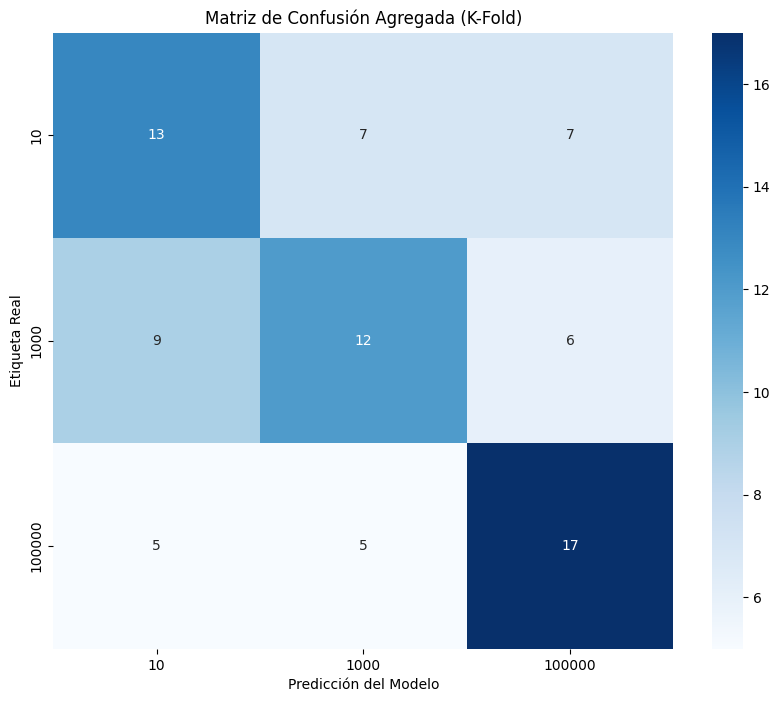


--- Reporte de Clasificación Agregado (Todos los Folds) ---
              precision    recall  f1-score   support

          10       0.48      0.48      0.48        27
        1000       0.50      0.44      0.47        27
      100000       0.57      0.63      0.60        27

    accuracy                           0.52        81
   macro avg       0.52      0.52      0.52        81
weighted avg       0.52      0.52      0.52        81

Generando Curva ROC Agregada (Todos los Folds)...


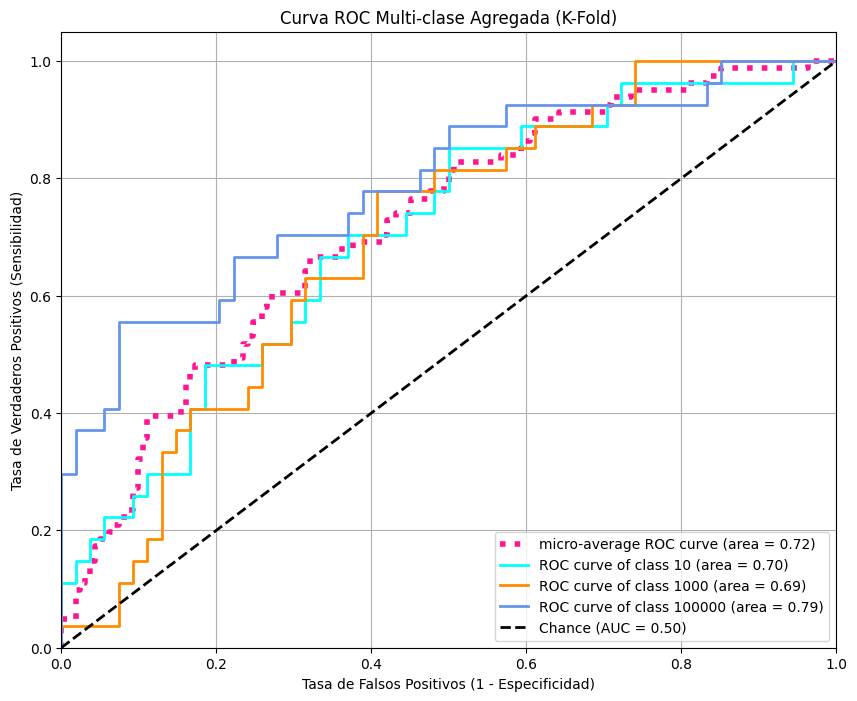

Generando curvas de aprendizaje (Loss vs. Épocas y Acc vs. Épocas)...


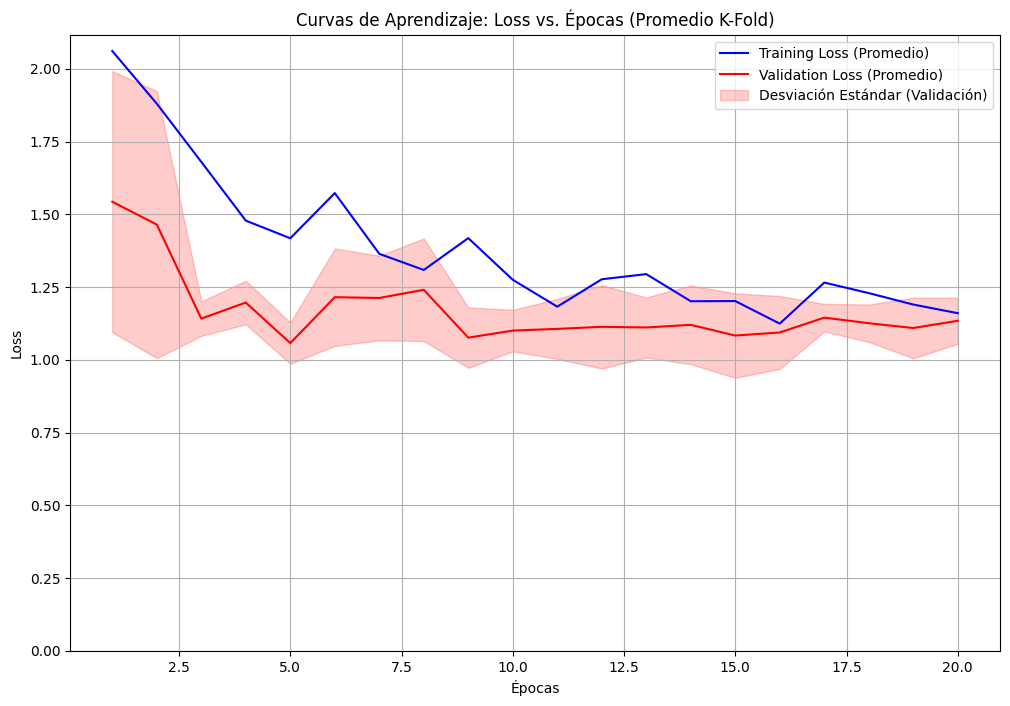

/tmp/ipython-input-2652310262.py:342: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs, mean_val_f1, 'o-', label='Validation F1-Score (Promedio)', linestyle='--')


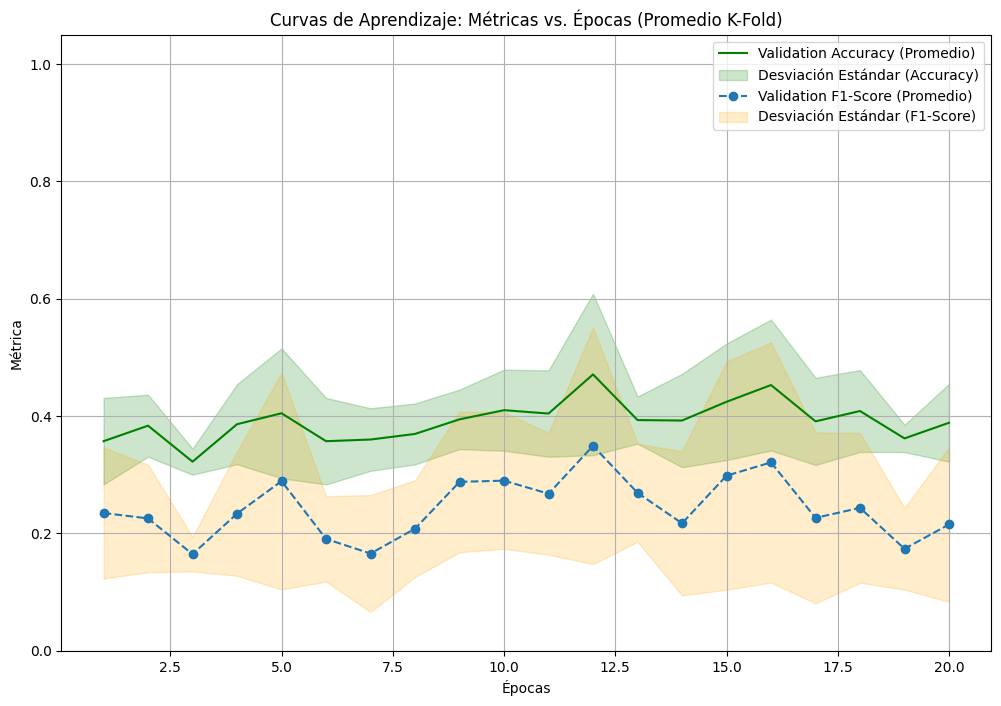


Proceso finalizado.


In [ ]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset
from PIL import Image
from torchvision import transforms
import timm
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from torchmetrics.classification import MulticlassAccuracy, MulticlassF1Score, MulticlassPrecision, MulticlassRecall
from torch.optim.lr_scheduler import ReduceLROnPlateau

# ========================================================================
# SECCIÓN 1: CONFIGURACIÓN
# ========================================================================
IMAGE_DIR = r'/content/drive/MyDrive/Tesis_Electronica/Enhanced_Batch_224'
CSV_PATH = r'/content/drive/MyDrive/Tesis_Electronica/Fase_2_Visual_Transformers/labelsFrecuencias1.csv'
# --- CAMBIO: Usar un Vision Transformer (ViT) ---
MODEL_NAME = 'vit_tiny_patch16_224'
NUM_EPOCHS = 20
BATCH_SIZE = 16
LEARNING_RATE = 1e-4
WEIGHT_DECAY = 5e-4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo: {DEVICE}")

K_FOLDS = 5
RANDOM_STATE = 42

# ========================================================================
# SECCIÓN 2: PREPARACIÓN DE DATOS
# ========================================================================
try:
    df_labels = pd.read_csv(CSV_PATH)
    class_names = sorted(df_labels.iloc[:, 1].unique())
    num_classes = len(class_names)
    print(f"Detectadas {num_classes} clases: {class_names}")
    print(f"Conteo de muestras por clase:\n{df_labels.iloc[:, 1].value_counts()}")
    class_to_idx = {class_name: i for i, class_name in enumerate(class_names)}
    idx_to_class = {i: class_name for i, class_name in enumerate(class_names)}
except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{CSV_PATH}'.")
    raise

class VoltageDataset(Dataset):
    def __init__(self, csv_path, image_dir, class_to_idx, transform=None):
        self.dataframe = pd.read_csv(csv_path)
        self.image_dir = image_dir
        self.transform = transform
        self.class_to_idx = class_to_idx
        self.label_column_name = self.dataframe.columns[1]

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        base_name = self.dataframe.iloc[idx, 0]
        base_name_without_ext = os.path.splitext(base_name)[0]
        img_name = os.path.join(self.image_dir, f"{base_name_without_ext}.png")

        try:
            image = Image.open(img_name).convert("L")
        except FileNotFoundError:
            print(f"Error: No se pudo encontrar la imagen {img_name}")
            return torch.empty(1, 224, 224), torch.tensor(0, dtype=torch.long)

        label_value = self.dataframe.iloc[idx][self.label_column_name]
        label_idx = self.class_to_idx[label_value]

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label_idx, dtype=torch.long)

class AddGaussianNoise(object):
    def __init__(self, mean=0., std=0.01):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        noise = torch.randn(tensor.size()) * self.std + self.mean
        noisy_tensor = tensor + noise
        noisy_tensor = torch.clamp(noisy_tensor, 0., 1.)
        return noisy_tensor

    def __repr__(self):
        return self.__class__.__name__ + f'(mean={self.mean}, std={self.std})'

# Data Augmentation (suavizado)
data_transform = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.RandomCrop(224, padding=10, padding_mode='reflect'),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.1, contrast=0.1),
        transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
        transforms.ToTensor(),
        AddGaussianNoise(mean=0., std=0.005),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]),
}

# ========================================================================
# SECCIÓN 3: DEFINICIÓN DEL MODELO (ViT)
# ========================================================================
def create_vit_classifier(model_name, num_classes, pretrained=True):
    """
    Crea un modelo ViT adaptado para 1 canal de entrada y con Dropout.
    """
    model = timm.create_model(model_name, pretrained=pretrained)

    # Adaptar patch_embed (primera capa) para 1 canal (escala de grises)
    # ViT usa 'patch_embed.proj' en lugar de 'conv1'
    conv_weights = model.patch_embed.proj.weight.data
    model.patch_embed.proj.in_channels = 1
    model.patch_embed.proj.weight.data = conv_weights.mean(dim=1, keepdim=True)

    # Adaptar el clasificador final ('head') y añadir Dropout
    num_features = model.head.in_features
    model.head = nn.Sequential(
        nn.Dropout(p=0.5, inplace=True), # 50% de dropout
        nn.Linear(num_features, num_classes)
    )
    return model

# ========================================================================
# SECCIÓN 4: BUCLE DE ENTRENAMIENTO
# ========================================================================
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs, num_classes, model_save_path):
    best_val_loss = float('inf')
    metrics = {
        'acc': MulticlassAccuracy(num_classes=num_classes, average='macro').to(DEVICE),
        'pre': MulticlassPrecision(num_classes=num_classes, average='macro').to(DEVICE),
        'rec': MulticlassRecall(num_classes=num_classes, average='macro').to(DEVICE),
        'f1': MulticlassF1Score(num_classes=num_classes, average='macro').to(DEVICE)
    }
    history = {'train_loss': [], 'val_loss': [], 'val_acc': [], 'val_f1': []}

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        train_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", leave=False)
        for inputs, labels in train_tqdm:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            train_tqdm.set_postfix(loss=loss.item())

        train_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(train_loss)

        model.eval()
        val_loss = 0.0
        for metric in metrics.values(): metric.reset()
        val_tqdm = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]", leave=False)
        with torch.no_grad():
            for inputs, labels in val_tqdm:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                for metric in metrics.values(): metric.update(outputs, labels)

        val_loss /= len(val_loader.dataset)
        val_acc = metrics['acc'].compute()
        val_pre = metrics['pre'].compute()
        val_rec = metrics['rec'].compute()
        val_f1 = metrics['f1'].compute()

        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc.item())
        history['val_f1'].append(val_f1.item())

        if (epoch + 1) % 10 == 0 or epoch == num_epochs - 1:
            print(f"Epoch {epoch+1}/{num_epochs} -> Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
            print(f"  Metrics -> Acc: {val_acc:.4f} | Precision: {val_pre:.4f} | Recall: {val_rec:.4f} | F1: {val_f1:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), model_save_path)

        scheduler.step(val_loss)

    print(f"Fold finalizado. Mejor Val Loss: {best_val_loss:.4f}")
    return history

# ========================================================================
# SECCIÓN 6: EVALUACIÓN (MODIFICADA PARA K-FOLD)
# ========================================================================
def evaluate_fold(model, dataloader, device, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    all_scores = []
    n_classes = len(class_names)
    acc_metric = MulticlassAccuracy(num_classes=n_classes, average='macro').to(device)
    pre_metric = MulticlassPrecision(num_classes=n_classes, average='macro').to(device)
    rec_metric = MulticlassRecall(num_classes=n_classes, average='macro').to(device)
    f1_metric = MulticlassF1Score(num_classes=n_classes, average='macro').to(device)

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            scores = torch.nn.functional.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_scores.extend(scores.cpu().numpy())

            acc_metric.update(outputs, labels)
            pre_metric.update(outputs, labels)
            rec_metric.update(outputs, labels)
            f1_metric.update(outputs, labels)

    final_acc = acc_metric.compute().item()
    final_pre = pre_metric.compute().item()
    final_rec = rec_metric.compute().item()
    final_f1 = f1_metric.compute().item()

    print("\n--- Métricas (torchmetrics) del Fold ---")
    print(f"Accuracy: {final_acc:.4f}")
    print(f"Precision: {final_pre:.4f}")
    print(f"Recall: {final_rec:.4f}")
    print(f"F1 Score: {final_f1:.4f}")

    return {
        'acc': final_acc, 'pre': final_pre, 'rec': final_rec, 'f1': final_f1,
        'labels': all_labels, 'preds': all_preds, 'scores': all_scores
    }

# ========================================================================
# SECCIÓN 7: GRÁFICOS (MATRIZ, ROC Y CURVAS DE APRENDIZAJE)
# ========================================================================
def plot_final_confusion_matrix(all_labels, all_preds, class_names):
    print("\n--- Matriz de Confusión Agregada (Todos los Folds) ---")
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
                xticklabels=[str(c) for c in class_names], yticklabels=[str(c) for c in class_names])
    plt.xlabel('Predicción del Modelo')
    plt.ylabel('Etiqueta Real')
    plt.title('Matriz de Confusión Agregada (K-Fold)')
    plt.show()

    print("\n--- Reporte de Clasificación Agregado (Todos los Folds) ---")
    report = classification_report(all_labels, all_preds, target_names=[str(c) for c in class_names], zero_division=0)
    print(report)

def plot_final_roc_curves(all_labels, all_scores, class_names):
    print("Generando Curva ROC Agregada (Todos los Folds)...")
    n_classes = len(class_names)
    all_labels_bin = label_binarize(all_labels, classes=range(n_classes))
    all_scores = np.array(all_scores)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], all_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_bin.ravel(), all_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(10, 8))
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})',
             color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (AUC = 0.50)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
    plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
    plt.title('Curva ROC Multi-clase Agregada (K-Fold)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

def plot_learning_curves(all_histories, num_epochs):
    print("Generando curvas de aprendizaje (Loss vs. Épocas y Acc vs. Épocas)...")

    train_loss_matrix = np.array([h['train_loss'] for h in all_histories])
    val_loss_matrix = np.array([h['val_loss'] for h in all_histories])
    val_acc_matrix = np.array([h['val_acc'] for h in all_histories])
    val_f1_matrix = np.array([h['val_f1'] for h in all_histories])

    mean_train_loss = np.mean(train_loss_matrix, axis=0)
    mean_val_loss = np.mean(val_loss_matrix, axis=0)
    std_val_loss = np.std(val_loss_matrix, axis=0)
    mean_val_acc = np.mean(val_acc_matrix, axis=0)
    std_val_acc = np.std(val_acc_matrix, axis=0)
    mean_val_f1 = np.mean(val_f1_matrix, axis=0)
    std_val_f1 = np.std(val_f1_matrix, axis=0)

    epochs = range(1, num_epochs + 1)

    plt.figure(figsize=(12, 8))
    plt.plot(epochs, mean_train_loss, 'b-', label='Training Loss (Promedio)')
    plt.plot(epochs, mean_val_loss, 'r-', label='Validation Loss (Promedio)')
    plt.fill_between(epochs, mean_val_loss - std_val_loss, mean_val_loss + std_val_loss,
                     color='r', alpha=0.2, label='Desviación Estándar (Validación)')

    plt.title('Curvas de Aprendizaje: Loss vs. Épocas (Promedio K-Fold)')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.ylim(bottom=0)
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.plot(epochs, mean_val_acc, 'g-', label='Validation Accuracy (Promedio)')
    plt.fill_between(epochs, mean_val_acc - std_val_acc, mean_val_acc + std_val_acc,
                     color='g', alpha=0.2, label='Desviación Estándar (Accuracy)')
    plt.plot(epochs, mean_val_f1, 'o-', label='Validation F1-Score (Promedio)', linestyle='--')
    plt.fill_between(epochs, mean_val_f1 - std_val_f1, mean_val_f1 + std_val_f1,
                     color='orange', alpha=0.2, label='Desviación Estándar (F1-Score)')

    plt.title('Curvas de Aprendizaje: Métricas vs. Épocas (Promedio K-Fold)')
    plt.xlabel('Épocas')
    plt.ylabel('Métrica')
    plt.legend()
    plt.grid(True)
    plt.ylim(0.0, 1.05)
    plt.show()

# ========================================================================
# SECCIÓN 8: EJECUCIÓN PRINCIPAL (K-FOLD)
# ========================================================================

if __name__ == "__main__":

    dataset_for_train = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['train']
    )
    dataset_for_val = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['val']
    )

    print(f"\n--- Transformaciones de Entrenamiento ({MODEL_NAME}) ---")
    print(dataset_for_train.transform)
    print("----------------------------------------\n")

    kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=RANDOM_STATE)

    fold_metrics = {'acc': [], 'pre': [], 'rec': [], 'f1': []}
    all_folds_labels = []
    all_folds_preds = []
    all_folds_scores = []
    all_fold_histories = []

    print(f"Iniciando Cross-Validation de {K_FOLDS} folds...")
    print("="*70)

    for fold, (train_ids, val_ids) in enumerate(kfold.split(dataset_for_train)):
        print(f"\n======= FOLD {fold+1}/{K_FOLDS} =======")

        train_sub = Subset(dataset_for_train, train_ids)
        val_sub = Subset(dataset_for_val, val_ids)
        train_loader = DataLoader(train_sub, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
        val_loader = DataLoader(val_sub, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

        print(f"Datos del Fold: {len(train_sub)} para entrenamiento, {len(val_sub)} para validación.")

        # --- CAMBIO: Usar create_vit_classifier ---
        model = create_vit_classifier(MODEL_NAME, num_classes=num_classes, pretrained=True).to(DEVICE)

        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
        scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

        model_save_path = f'best_model_fold_{fold+1}.pth'

        print(f"Entrenando Fold {fold+1}...")
        fold_history = train_model(
            model, train_loader, val_loader,
            criterion, optimizer, scheduler,
            NUM_EPOCHS, num_classes, model_save_path
        )
        all_fold_histories.append(fold_history)

        print(f"\nEvaluando mejor modelo del Fold {fold+1}...")
        # --- CAMBIO: Usar create_vit_classifier ---
        best_model = create_vit_classifier(MODEL_NAME, num_classes=num_classes, pretrained=False).to(DEVICE)
        best_model.load_state_dict(torch.load(model_save_path))

        fold_results = evaluate_fold(best_model, val_loader, DEVICE, class_names)

        fold_metrics['acc'].append(fold_results['acc'])
        fold_metrics['pre'].append(fold_results['pre'])
        fold_metrics['rec'].append(fold_results['rec'])
        fold_metrics['f1'].append(fold_results['f1'])

        all_folds_labels.extend(fold_results['labels'])
        all_folds_preds.extend(fold_results['preds'])
        all_folds_scores.extend(fold_results['scores'])

    print("\n" + "="*70)
    print("CROSS-VALIDATION COMPLETADA")
    print("="*70)

    print(f"\n--- Resumen de Métricas (Promedio de {K_FOLDS} Folds) ---")
    print(f"Accuracy:  {np.mean(fold_metrics['acc']):.4f} +/- {np.std(fold_metrics['acc']):.4f}")
    print(f"Precision: {np.mean(fold_metrics['pre']):.4f} +/- {np.std(fold_metrics['pre']):.4f}")
    print(f"Recall:    {np.mean(fold_metrics['rec']):.4f} +/- {np.std(fold_metrics['rec']):.4f}")
    print(f"F1 Score:  {np.mean(fold_metrics['f1']):.4f} +/- {np.std(fold_metrics['f1']):.4f}")

    plot_final_confusion_matrix(all_folds_labels, all_folds_preds, class_names)
    plot_final_roc_curves(all_folds_labels, all_folds_scores, class_names)
    plot_learning_curves(all_fold_histories, NUM_EPOCHS)

    print("\nProceso finalizado.")

## Vit Aumentado

Usando dispositivo: cuda
Detectadas 3 clases: [np.int64(10), np.int64(1000), np.int64(100000)]
Conteo de muestras por clase:
Frecuencia
10        27
1000      27
100000    27
Name: count, dtype: int64
Nombres para visualización: ['10 Hz', '1 kHz', '100 kHz']

--- Transformaciones de Entrenamiento (vit_tiny_patch16_224) ---
Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.7, 1.0), ratio=(0.9, 1.1), interpolation=bilinear, antialias=True)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=None, hue=None)
    RandomPerspective(p=0.25)
    GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0))
    ToTensor()
    AddGaussianNoise(mean=0.0, std=0.01)
    Normalize(mean=[0.5], std=[0.5])
)
----------------------------------------

Iniciando Cross-Validation de 5 folds...

======= FOLD 1/5 =======
Datos del Fold: 64 para entrenamiento, 17 para validación.
Entrenando Fold 1...


Epoch 10/20 -> Train Loss: 1.2067 | Val Loss: 1.0736
  Metrics -> Acc: 0.4667 | Precision: 0.2731 | Recall: 0.4667 | F1: 0.3443


Epoch 20/20 -> Train Loss: 1.2574 | Val Loss: 1.0483
  Metrics -> Acc: 0.5333 | Precision: 0.3782 | Recall: 0.5333 | F1: 0.4074
Fold finalizado. Mejor Val Loss: 0.9494

Evaluando mejor modelo del Fold 1...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.4857
Precision: 0.4038
Recall:    0.4857
F1 Score:  0.4222

======= FOLD 2/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 2...


Epoch 10/20 -> Train Loss: 1.2278 | Val Loss: 1.0972
  Metrics -> Acc: 0.3750 | Precision: 0.2222 | Recall: 0.3750 | F1: 0.2685


Epoch 20/20 -> Train Loss: 1.2241 | Val Loss: 1.1353
  Metrics -> Acc: 0.4167 | Precision: 0.2735 | Recall: 0.4167 | F1: 0.2101
Fold finalizado. Mejor Val Loss: 1.0074

Evaluando mejor modelo del Fold 2...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.3333
Precision: 0.1250
Recall:    0.3333
F1 Score:  0.1818

======= FOLD 3/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 3...


Epoch 10/20 -> Train Loss: 1.4691 | Val Loss: 1.1835
  Metrics -> Acc: 0.3333 | Precision: 0.1250 | Recall: 0.3333 | F1: 0.1818


Epoch 20/20 -> Train Loss: 1.2151 | Val Loss: 1.1333
  Metrics -> Acc: 0.3333 | Precision: 0.1250 | Recall: 0.3333 | F1: 0.1818
Fold finalizado. Mejor Val Loss: 1.0341

Evaluando mejor modelo del Fold 3...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.3333
Precision: 0.1250
Recall:    0.3333
F1 Score:  0.1818

======= FOLD 4/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 4...


Epoch 10/20 -> Train Loss: 1.2543 | Val Loss: 1.2582
  Metrics -> Acc: 0.4286 | Precision: 0.4286 | Recall: 0.4286 | F1: 0.2963


Epoch 20/20 -> Train Loss: 1.1819 | Val Loss: 1.1782
  Metrics -> Acc: 0.4286 | Precision: 0.4286 | Recall: 0.4286 | F1: 0.2963
Fold finalizado. Mejor Val Loss: 1.0854

Evaluando mejor modelo del Fold 4...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.4762
Precision: 0.4359
Recall:    0.4762
F1 Score:  0.3569

======= FOLD 5/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 5...


Epoch 10/20 -> Train Loss: 1.3158 | Val Loss: 1.1485
  Metrics -> Acc: 0.3333 | Precision: 0.1042 | Recall: 0.3333 | F1: 0.1587


Epoch 20/20 -> Train Loss: 1.3911 | Val Loss: 1.1442
  Metrics -> Acc: 0.3333 | Precision: 0.1042 | Recall: 0.3333 | F1: 0.1587
Fold finalizado. Mejor Val Loss: 1.0861

Evaluando mejor modelo del Fold 5...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.3333
Precision: 0.1458
Recall:    0.3333
F1 Score:  0.2029

CROSS-VALIDATION COMPLETADA

--- Resumen de Métricas (Promedio de 5 Folds) ---
Accuracy:  0.3924 +/- 0.0724
Precision: 0.2471 +/- 0.1416
Recall:    0.3924 +/- 0.0724
F1 Score:  0.2691 +/- 0.1008

--- Matriz de Confusión Agregada (Todos los Folds) ---


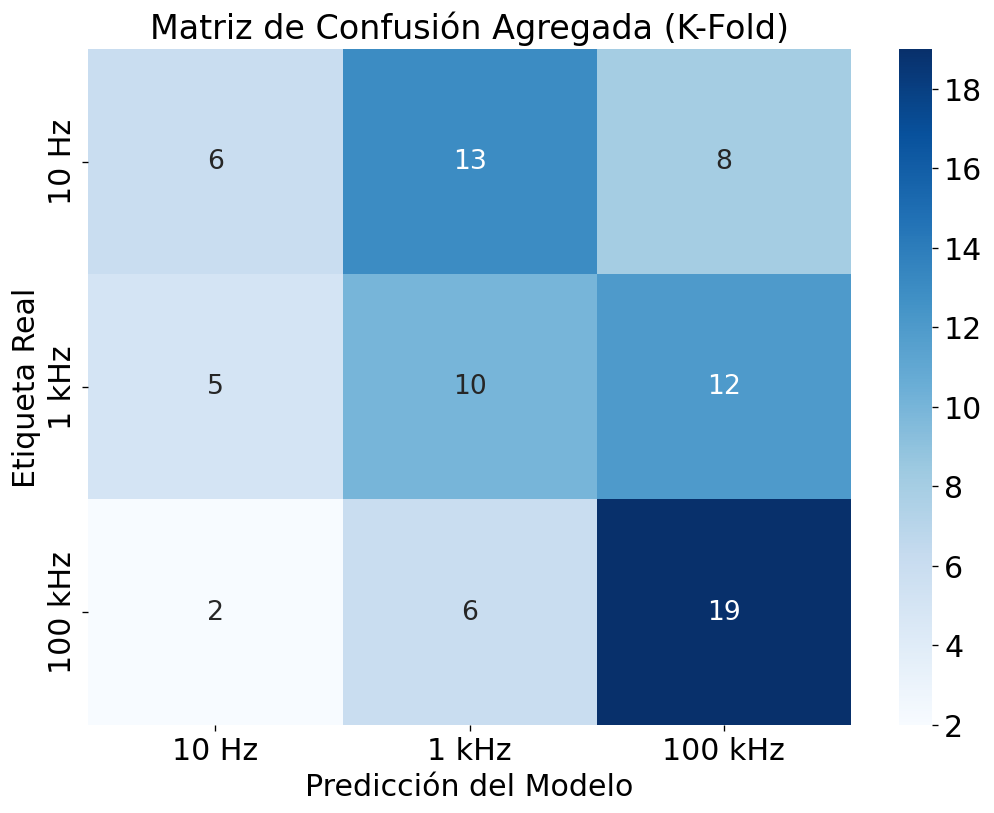


--- Reporte de Clasificación Agregado (Todos los Folds) ---
              precision    recall  f1-score   support

       10 Hz       0.46      0.22      0.30        27
       1 kHz       0.34      0.37      0.36        27
     100 kHz       0.49      0.70      0.58        27

    accuracy                           0.43        81
   macro avg       0.43      0.43      0.41        81
weighted avg       0.43      0.43      0.41        81

Generando Curva ROC Agregada (Todos los Folds)...


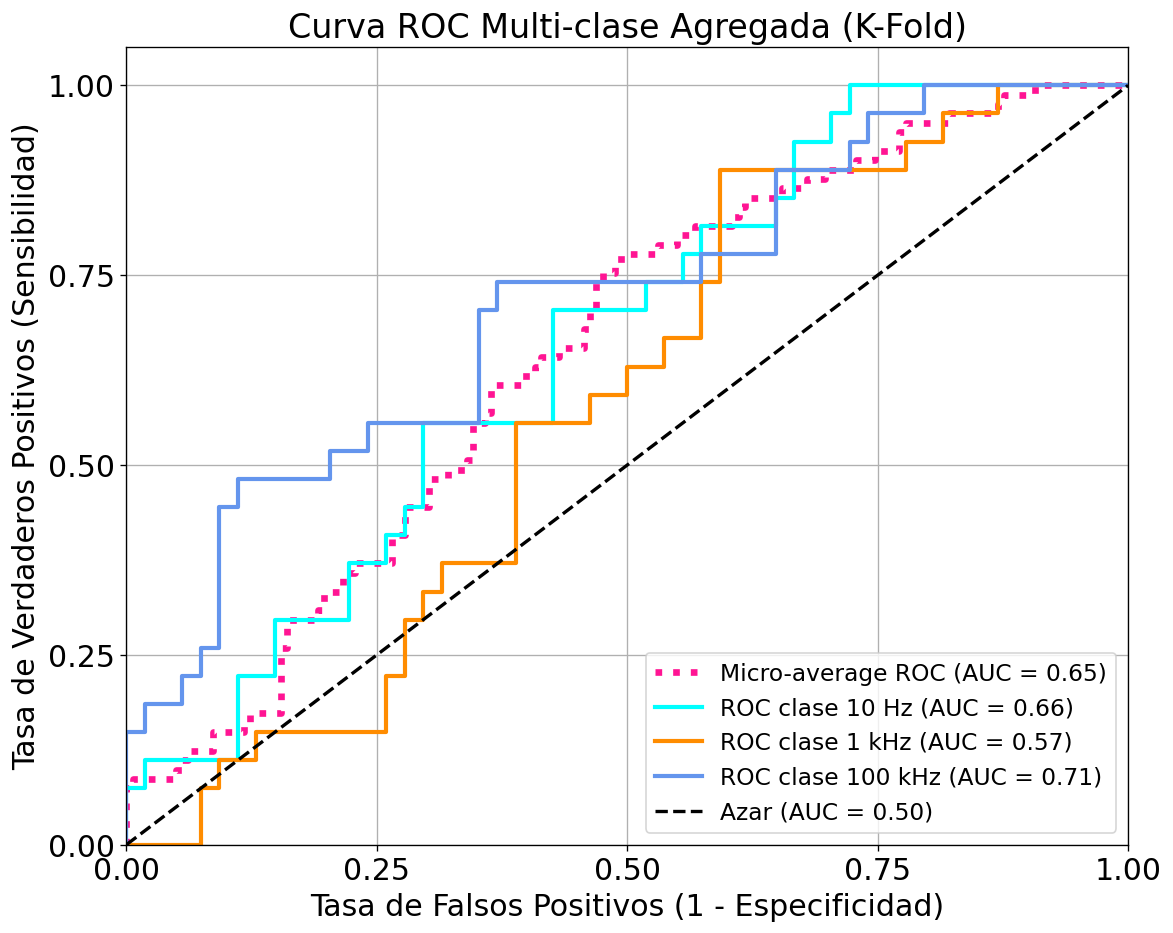

Generando curvas de aprendizaje (Loss / Métricas vs. Épocas)...


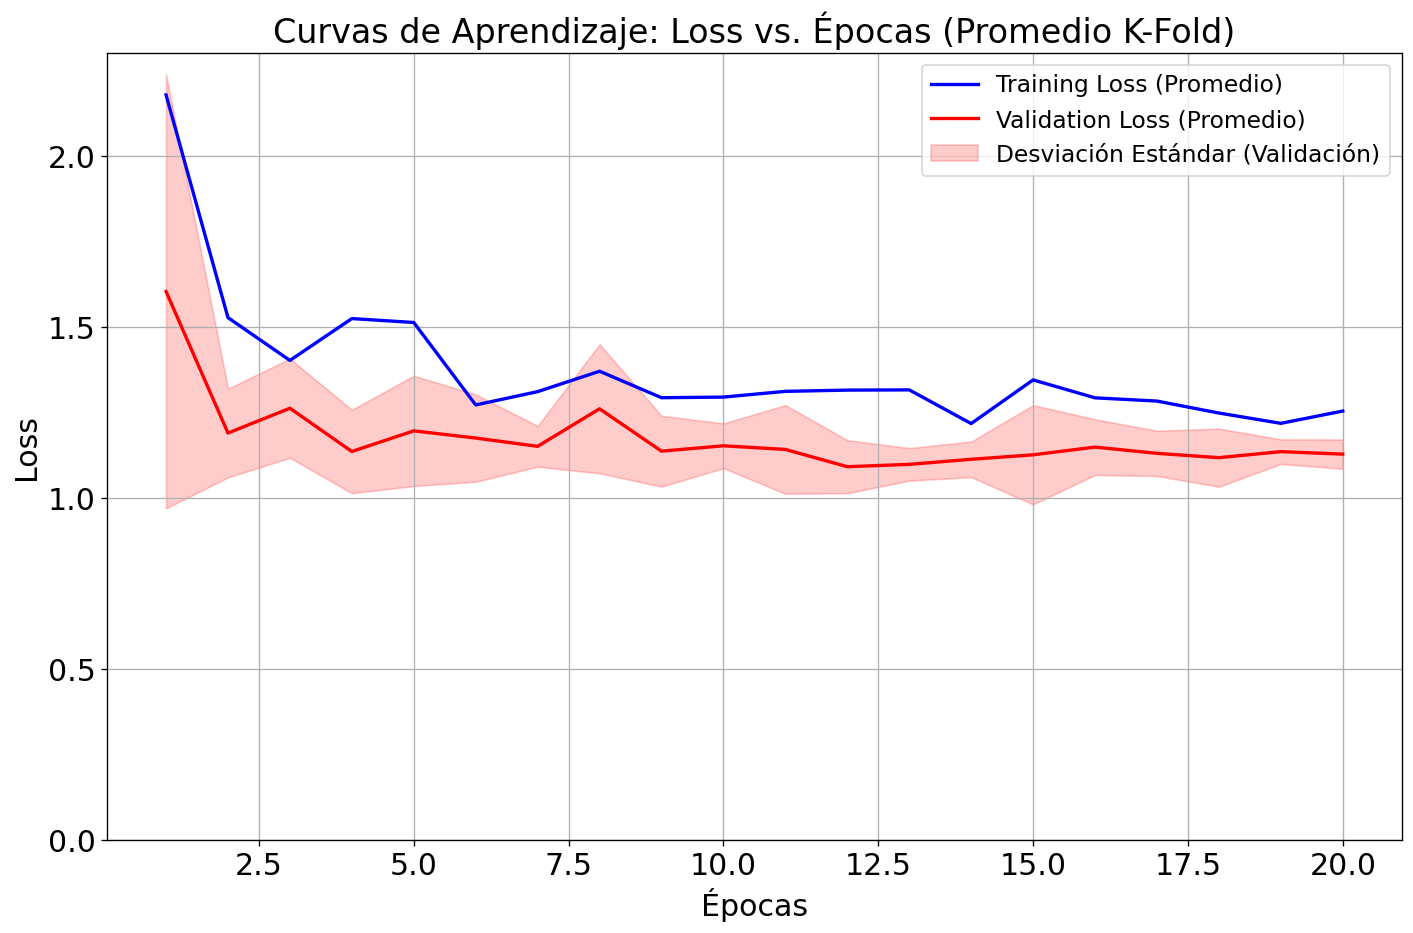

/tmp/ipython-input-682266984.py:418: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(epochs, mean_val_f1, 'o-', lw=2, label='Validation F1-Score (Promedio)', linestyle='--')


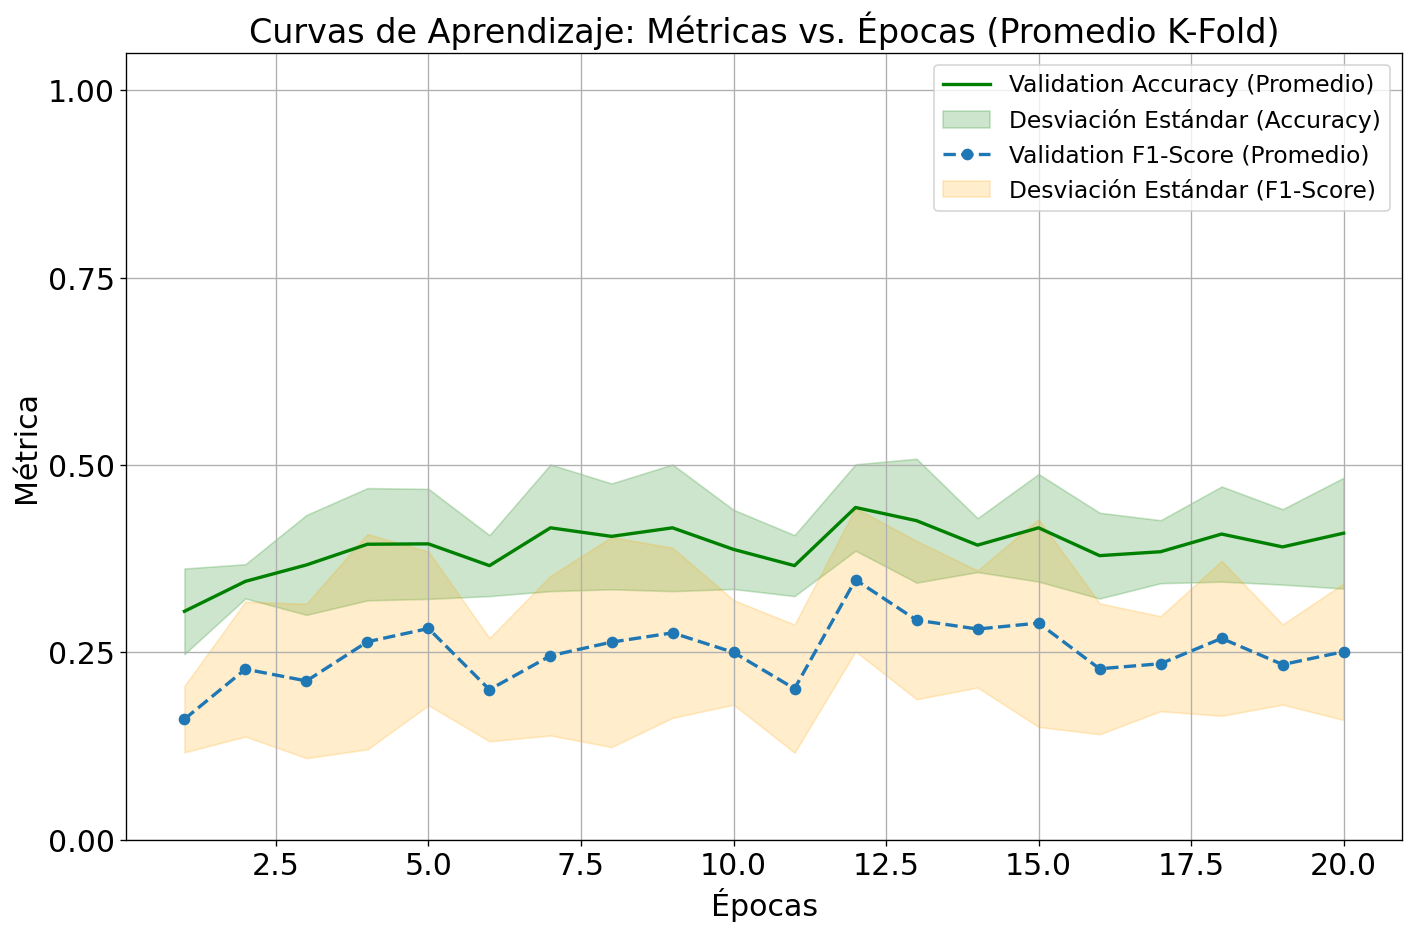


Proceso finalizado.


In [ ]:
# -*- coding: utf-8 -*-
import os
import random
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset

from PIL import Image
from torchvision import transforms
import timm

from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

from torchmetrics.classification import (
    MulticlassAccuracy, MulticlassF1Score,
    MulticlassPrecision, MulticlassRecall
)
from torch.optim.lr_scheduler import ReduceLROnPlateau

# --------------------------------------------------------------------
# CONFIGURACIÓN GLOBAL DE GRÁFICOS (TAMAÑOS GRANDES PARA TESIS / PPT)
# --------------------------------------------------------------------
plt.rcParams.update({
    "figure.dpi": 120,
    "savefig.dpi": 300,
    "axes.titlesize": 22,
    "axes.labelsize": 18,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.fontsize": 18,
    "font.size": 14
})

# ---------------------------------------------------------
# REPRODUCIBILIDAD
# ---------------------------------------------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

# ========================================================================
# SECCIÓN 1: CONFIGURACIÓN
# ========================================================================
IMAGE_DIR = r'/content/drive/MyDrive/ISIS3002_-_Tesis_Electronica/Enhanced_Batch_224'
CSV_PATH = r'/content/drive/MyDrive/ISIS3002_-_Tesis_Electronica/Fase_2_Visual_Transformers/labelsFrecuencias1.csv'

MODEL_NAME   = 'vit_tiny_patch16_224'
NUM_EPOCHS   = 20
BATCH_SIZE   = 16
LEARNING_RATE= 1e-4
WEIGHT_DECAY = 5e-4
DEVICE       = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo: {DEVICE}")

K_FOLDS      = 5
RANDOM_STATE = 42

# ========================================================================
# SECCIÓN 2: PREPARACIÓN DE DATOS
# ========================================================================
try:
    df_labels = pd.read_csv(CSV_PATH)
    class_names = sorted(df_labels.iloc[:, 1].unique())   # valores crudos: 10, 1000, 100000
    num_classes = len(class_names)
    print(f"Detectadas {num_classes} clases: {class_names}")
    print(f"Conteo de muestras por clase:\n{df_labels.iloc[:, 1].value_counts()}")
    class_to_idx = {c: i for i, c in enumerate(class_names)}
    idx_to_class = {i: c for i, c in enumerate(class_names)}

    # ----- etiquetas amigables para las figuras -----
    pretty_name_map = {
        '10': '10 Hz',
        '1000': '1 kHz',
        '100000': '100 kHz'
    }
    pretty_class_names = [
        pretty_name_map.get(str(c), str(c)) for c in class_names
    ]
    print(f"Nombres para visualización: {pretty_class_names}")

except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{CSV_PATH}'.")
    raise

class VoltageDataset(Dataset):
    def __init__(self, csv_path, image_dir, class_to_idx, transform=None):
        self.dataframe = pd.read_csv(csv_path)
        self.image_dir = image_dir
        self.transform = transform
        self.class_to_idx = class_to_idx
        self.label_column_name = self.dataframe.columns[1]

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        base_name = self.dataframe.iloc[idx, 0]
        stem      = os.path.splitext(base_name)[0]
        img_name  = os.path.join(self.image_dir, f"{stem}.png")

        try:
            image = Image.open(img_name).convert("L")  # escala de grises
        except FileNotFoundError:
            print(f"Error: No se pudo encontrar la imagen {img_name}")
            return torch.empty(1, 224, 224), torch.tensor(0, dtype=torch.long)

        label_value = self.dataframe.iloc[idx][self.label_column_name]
        label_idx   = self.class_to_idx[label_value]

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label_idx, dtype=torch.long)

class AddGaussianNoise(object):
    def __init__(self, mean=0., std=0.01):
        self.std = std
        self.mean = mean
    def __call__(self, tensor):
        noise = torch.randn(tensor.size()) * self.std + self.mean
        return torch.clamp(tensor + noise, 0., 1.)
    def __repr__(self):
        return self.__class__.__name__ + f'(mean={self.mean}, std={self.std})'

# -----------------------------
# DATA AUGMENTATION
# -----------------------------
data_transform = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224, scale=(0.7, 1.0), ratio=(0.9, 1.1)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.RandomPerspective(distortion_scale=0.2, p=0.25),
        transforms.GaussianBlur(kernel_size=5, sigma=(0.1, 2.0)),
        transforms.ToTensor(),
        AddGaussianNoise(mean=0., std=0.01),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]),
}

# ========================================================================
# SECCIÓN 3: DEFINICIÓN DEL MODELO (ViT)
# ========================================================================
def _vit_in_features(model):
    if hasattr(model, 'head') and isinstance(model.head, nn.Linear):
        return model.head.in_features
    if hasattr(model, 'head') and hasattr(model.head, 'in_features'):
        return model.head.in_features
    if hasattr(model, 'head') and hasattr(model.head, 'fc') and isinstance(model.head.fc, nn.Linear):
        return model.head.fc.in_features
    if hasattr(model, 'num_features'):
        return model.num_features
    raise AttributeError("No se pudieron inferir las in_features del head del ViT.")

def create_vit_classifier(model_name, num_classes, pretrained=True):
    model = timm.create_model(model_name, pretrained=pretrained)

    # Adaptar patch_embed.proj a 1 canal
    if hasattr(model, 'patch_embed') and hasattr(model.patch_embed, 'proj'):
        old = model.patch_embed.proj
        new_conv = nn.Conv2d(
            in_channels=1,
            out_channels=old.out_channels,
            kernel_size=old.kernel_size,
            stride=old.stride,
            padding=old.padding,
            bias=(old.bias is not None)
        )
        with torch.no_grad():
            new_conv.weight[:] = old.weight.mean(dim=1, keepdim=True)
            if old.bias is not None:
                new_conv.bias[:] = old.bias.clone()
        model.patch_embed.proj = new_conv
    else:
        raise AttributeError("El modelo ViT no tiene 'patch_embed.proj' esperado.")

    # Reemplazar clasificador
    num_features = _vit_in_features(model)
    model.head = nn.Sequential(
        nn.Dropout(p=0.5, inplace=True),
        nn.Linear(num_features, num_classes)
    )
    return model

# ========================================================================
# SECCIÓN 4: ENTRENAMIENTO
# ========================================================================
def train_model(model, train_loader, val_loader, criterion, optimizer,
                scheduler, num_epochs, num_classes, model_save_path):
    best_val_loss = float('inf')
    metrics = {
        'acc': MulticlassAccuracy(num_classes=num_classes, average='macro').to(DEVICE),
        'pre': MulticlassPrecision(num_classes=num_classes, average='macro').to(DEVICE),
        'rec': MulticlassRecall(num_classes=num_classes, average='macro').to(DEVICE),
        'f1' : MulticlassF1Score(num_classes=num_classes, average='macro').to(DEVICE)
    }
    history = {'train_loss': [], 'val_loss': [], 'val_acc': [], 'val_f1': []}

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", leave=False):
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        train_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(train_loss)

        model.eval()
        val_loss = 0.0
        for m in metrics.values():
            m.reset()
        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]", leave=False):
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                for m in metrics.values():
                    m.update(outputs, labels)

        val_loss /= len(val_loader.dataset)
        val_acc = metrics['acc'].compute().item()
        val_f1  = metrics['f1'].compute().item()

        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['val_f1'].append(val_f1)

        if (epoch + 1) % 10 == 0 or epoch == num_epochs - 1:
            val_pre = metrics['pre'].compute().item()
            val_rec = metrics['rec'].compute().item()
            print(f"Epoch {epoch+1}/{num_epochs} -> Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
            print(f"  Metrics -> Acc: {val_acc:.4f} | Precision: {val_pre:.4f} | Recall: {val_rec:.4f} | F1: {val_f1:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), model_save_path)

        scheduler.step(val_loss)

    print(f"Fold finalizado. Mejor Val Loss: {best_val_loss:.4f}")
    return history

# ========================================================================
# SECCIÓN 6: EVALUACIÓN
# ========================================================================
def evaluate_fold(model, dataloader, device, class_names):
    model.eval()
    all_preds, all_labels, all_scores = [], [], []
    n_classes = len(class_names)

    acc_metric = MulticlassAccuracy(num_classes=n_classes, average='macro').to(device)
    pre_metric = MulticlassPrecision(num_classes=n_classes, average='macro').to(device)
    rec_metric = MulticlassRecall(num_classes=n_classes, average='macro').to(device)
    f1_metric  = MulticlassF1Score(num_classes=n_classes, average='macro').to(device)

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            scores  = torch.nn.functional.softmax(outputs, dim=1)
            _, preds= torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_scores.extend(scores.cpu().numpy())

            acc_metric.update(outputs, labels)
            pre_metric.update(outputs, labels)
            rec_metric.update(outputs, labels)
            f1_metric.update(outputs, labels)

    print("\n--- Métricas (torchmetrics) del Fold ---")
    print(f"Accuracy:  {acc_metric.compute().item():.4f}")
    print(f"Precision: {pre_metric.compute().item():.4f}")
    print(f"Recall:    {rec_metric.compute().item():.4f}")
    print(f"F1 Score:  {f1_metric.compute().item():.4f}")

    return {
        'acc':  acc_metric.compute().item(),
        'pre':  pre_metric.compute().item(),
        'rec':  rec_metric.compute().item(),
        'f1' :  f1_metric.compute().item(),
        'labels': all_labels, 'preds': all_preds, 'scores': all_scores
    }

# ========================================================================
# SECCIÓN 7: GRÁFICOS
# ========================================================================
def plot_final_confusion_matrix(all_labels, all_preds, display_names):
    """
    display_names: nombres formateados (p.ej. '10 Hz', '1 kHz', '100 kHz').
    """
    print("\n--- Matriz de Confusión Agregada (Todos los Folds) ---")
    cm = confusion_matrix(all_labels, all_preds)
    fig, ax = plt.subplots(figsize=(9, 7))
    sns.heatmap(
        cm, annot=True, fmt='g', cmap='Blues',
        xticklabels=[str(c) for c in display_names],
        yticklabels=[str(c) for c in display_names],
        annot_kws={"size": 16}
    )
    ax.set_xlabel('Predicción del Modelo', fontsize=18)
    ax.set_ylabel('Etiqueta Real', fontsize=18)
    ax.set_title('Matriz de Confusión Agregada (K-Fold)', fontsize=20)
    plt.tight_layout()
    plt.show()

    print("\n--- Reporte de Clasificación Agregado (Todos los Folds) ---")
    print(classification_report(
        all_labels, all_preds,
        target_names=[str(c) for c in display_names],
        zero_division=0
    ))

def plot_final_roc_curves(all_labels, all_scores, display_names):
    """
    display_names: nombres formateados para las clases.
    """
    print("Generando Curva ROC Agregada (Todos los Folds)...")
    n_classes = len(display_names)
    all_labels_bin = label_binarize(all_labels, classes=range(n_classes))
    all_scores = np.array(all_scores)

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], all_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_bin.ravel(), all_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(fpr["micro"], tpr["micro"],
            label=f'Micro-average ROC (AUC = {roc_auc["micro"]:0.2f})',
            color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
    for i, color in zip(range(n_classes), colors):
        ax.plot(fpr[i], tpr[i], color=color, lw=2.5,
                label=f'ROC clase {display_names[i]} (AUC = {roc_auc[i]:0.2f})')

    ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Azar (AUC = 0.50)')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Tasa de Falsos Positivos (1 - Especificidad)', fontsize=18)
    ax.set_ylabel('Tasa de Verdaderos Positivos (Sensibilidad)', fontsize=18)
    ax.set_title('Curva ROC Multi-clase Agregada (K-Fold)', fontsize=20)
    ax.legend(loc="lower right", fontsize=14)
    ax.grid(True)
    ax.set_xticks(np.arange(0.0, 1.01, 0.25))
    ax.set_yticks(np.arange(0.0, 1.01, 0.25))
    plt.tight_layout()
    plt.show()

def plot_learning_curves(all_histories, num_epochs):
    print("Generando curvas de aprendizaje (Loss / Métricas vs. Épocas)...")
    train_loss_matrix = np.array([h['train_loss'] for h in all_histories])
    val_loss_matrix   = np.array([h['val_loss']   for h in all_histories])
    val_acc_matrix    = np.array([h['val_acc']    for h in all_histories])
    val_f1_matrix     = np.array([h['val_f1']     for h in all_histories])

    mean_train_loss = np.mean(train_loss_matrix, axis=0)
    mean_val_loss   = np.mean(val_loss_matrix,   axis=0)
    std_val_loss    = np.std(val_loss_matrix,    axis=0)
    mean_val_acc    = np.mean(val_acc_matrix,    axis=0)
    std_val_acc     = np.std(val_acc_matrix,     axis=0)
    mean_val_f1     = np.mean(val_f1_matrix,     axis=0)
    std_val_f1      = np.std(val_f1_matrix,      axis=0)

    epochs = np.arange(1, num_epochs + 1)

    # --- Loss ---
    fig1, ax1 = plt.subplots(figsize=(12, 8))
    ax1.plot(epochs, mean_train_loss, 'b-', lw=2, label='Training Loss (Promedio)')
    ax1.plot(epochs, mean_val_loss,   'r-', lw=2, label='Validation Loss (Promedio)')
    ax1.fill_between(epochs, mean_val_loss - std_val_loss, mean_val_loss + std_val_loss,
                     color='r', alpha=0.2, label='Desviación Estándar (Validación)')
    ax1.set_title('Curvas de Aprendizaje: Loss vs. Épocas (Promedio K-Fold)', fontsize=20)
    ax1.set_xlabel('Épocas', fontsize=18)
    ax1.set_ylabel('Loss', fontsize=18)
    ax1.legend(fontsize=14)
    ax1.grid(True)
    ax1.set_ylim(bottom=0)
    plt.tight_layout()
    plt.show()

    # --- Accuracy & F1 ---
    fig2, ax2 = plt.subplots(figsize=(12, 8))
    ax2.plot(epochs, mean_val_acc, 'g-', lw=2, label='Validation Accuracy (Promedio)')
    ax2.fill_between(epochs, mean_val_acc - std_val_acc, mean_val_acc + std_val_acc,
                     color='g', alpha=0.2, label='Desviación Estándar (Accuracy)')
    ax2.plot(epochs, mean_val_f1, 'o-', lw=2, label='Validation F1-Score (Promedio)', linestyle='--')
    ax2.fill_between(epochs, mean_val_f1 - std_val_f1, mean_val_f1 + std_val_f1,
                     color='orange', alpha=0.2, label='Desviación Estándar (F1-Score)')
    ax2.set_title('Curvas de Aprendizaje: Métricas vs. Épocas (Promedio K-Fold)', fontsize=20)
    ax2.set_xlabel('Épocas', fontsize=18)
    ax2.set_ylabel('Métrica', fontsize=18)
    ax2.legend(fontsize=14)
    ax2.grid(True)
    ax2.set_ylim(0.0, 1.05)
    ax2.set_yticks(np.arange(0.0, 1.01, 0.25))
    plt.tight_layout()
    plt.show()

# ========================================================================
# SECCIÓN 8: EJECUCIÓN PRINCIPAL (K-FOLD)
# ========================================================================
if __name__ == "__main__":
    dataset_for_train = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['train']
    )
    dataset_for_val = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['val']
    )

    print(f"\n--- Transformaciones de Entrenamiento ({MODEL_NAME}) ---")
    print(dataset_for_train.transform)
    print("----------------------------------------\n")

    kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=RANDOM_STATE)

    fold_metrics = {'acc': [], 'pre': [], 'rec': [], 'f1': []}
    all_folds_labels, all_folds_preds, all_folds_scores = [], [], []
    all_fold_histories = []

    print(f"Iniciando Cross-Validation de {K_FOLDS} folds...")
    print("="*70)

    for fold, (train_ids, val_ids) in enumerate(kfold.split(dataset_for_train)):
        print(f"\n======= FOLD {fold+1}/{K_FOLDS} =======")
        train_sub = Subset(dataset_for_train, train_ids)
        val_sub   = Subset(dataset_for_val,   val_ids)

        train_loader = DataLoader(
            train_sub, batch_size=BATCH_SIZE, shuffle=True,
            num_workers=2, pin_memory=True
        )
        val_loader   = DataLoader(
            val_sub, batch_size=BATCH_SIZE, shuffle=False,
            num_workers=2, pin_memory=True
        )

        print(f"Datos del Fold: {len(train_sub)} para entrenamiento, {len(val_sub)} para validación.")

        model = create_vit_classifier(MODEL_NAME, num_classes=num_classes, pretrained=True).to(DEVICE)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
        scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

        model_save_path = f'best_model_fold_{fold+1}.pth'

        print(f"Entrenando Fold {fold+1}...")
        fold_history = train_model(
            model, train_loader, val_loader,
            criterion, optimizer, scheduler,
            NUM_EPOCHS, num_classes, model_save_path
        )
        all_fold_histories.append(fold_history)

        print(f"\nEvaluando mejor modelo del Fold {fold+1}...")
        best_model = create_vit_classifier(MODEL_NAME, num_classes=num_classes, pretrained=False).to(DEVICE)
        best_model.load_state_dict(torch.load(model_save_path, map_location=DEVICE))

        fold_results = evaluate_fold(best_model, val_loader, DEVICE, class_names)

        fold_metrics['acc'].append(fold_results['acc'])
        fold_metrics['pre'].append(fold_results['pre'])
        fold_metrics['rec'].append(fold_results['rec'])
        fold_metrics['f1'].append(fold_results['f1'])

        all_folds_labels.extend(fold_results['labels'])
        all_folds_preds.extend(fold_results['preds'])
        all_folds_scores.extend(fold_results['scores'])

    print("\n" + "="*70)
    print("CROSS-VALIDATION COMPLETADA")
    print("="*70)

    print(f"\n--- Resumen de Métricas (Promedio de {K_FOLDS} Folds) ---")
    print(f"Accuracy:  {np.mean(fold_metrics['acc']):.4f} +/- {np.std(fold_metrics['acc']):.4f}")
    print(f"Precision: {np.mean(fold_metrics['pre']):.4f} +/- {np.std(fold_metrics['pre']):.4f}")
    print(f"Recall:    {np.mean(fold_metrics['rec']):.4f} +/- {np.std(fold_metrics['rec']):.4f}")
    print(f"F1 Score:  {np.mean(fold_metrics['f1']):.4f} +/- {np.std(fold_metrics['f1']):.4f}")

    # Usamos los nombres bonitos en las figuras
    plot_final_confusion_matrix(all_folds_labels, all_folds_preds, pretty_class_names)
    plot_final_roc_curves(all_folds_labels, all_folds_scores, pretty_class_names)
    plot_learning_curves(all_fold_histories, NUM_EPOCHS)

    print("\nProceso finalizado.")


## Swin Transformers

Usando dispositivo: cuda
Detectadas 3 clases: [np.int64(10), np.int64(1000), np.int64(100000)]
Conteo de muestras por clase:
Frecuencia
10        27
1000      27
100000    27
Name: count, dtype: int64

--- Transformaciones de Entrenamiento (swin_tiny_patch4_window7_224) ---
Compose(
    Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
    RandomCrop(size=(224, 224), padding=10)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    ColorJitter(brightness=(0.9, 1.1), contrast=(0.9, 1.1), saturation=None, hue=None)
    GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 1.0))
    ToTensor()
    AddGaussianNoise(mean=0.0, std=0.005)
    Normalize(mean=[0.5], std=[0.5])
)
----------------------------------------

Iniciando Cross-Validation de 5 folds...

======= FOLD 1/5 =======
Datos del Fold: 64 para entrenamiento, 17 para validación.
Entrenando Fold 1...


Epoch 10/40 -> Train Loss: 1.0439 | Val Loss: 0.9241
  Metrics -> Acc: 0.5333 | Precision: 0.3389 | Recall: 0.5333 | F1: 0.3961


Epoch 20/40 -> Train Loss: 0.9875 | Val Loss: 0.8838
  Metrics -> Acc: 0.5143 | Precision: 0.6545 | Recall: 0.5143 | F1: 0.4500


Epoch 30/40 -> Train Loss: 0.8379 | Val Loss: 0.9501
  Metrics -> Acc: 0.5143 | Precision: 0.6545 | Recall: 0.5143 | F1: 0.4500


Epoch 40/40 -> Train Loss: 0.8387 | Val Loss: 0.9608
  Metrics -> Acc: 0.5143 | Precision: 0.6545 | Recall: 0.5143 | F1: 0.4500
Fold finalizado. Mejor Val Loss: 0.8451

Evaluando mejor modelo del Fold 1...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.4952
Precision: 0.5139
Recall:    0.4952
F1 Score:  0.4690

======= FOLD 2/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 2...


Epoch 10/40 -> Train Loss: 1.0915 | Val Loss: 1.3150
  Metrics -> Acc: 0.3333 | Precision: 0.0417 | Recall: 0.3333 | F1: 0.0741


Epoch 20/40 -> Train Loss: 1.0640 | Val Loss: 1.1930
  Metrics -> Acc: 0.3333 | Precision: 0.0417 | Recall: 0.3333 | F1: 0.0741


Epoch 30/40 -> Train Loss: 1.0897 | Val Loss: 1.1932
  Metrics -> Acc: 0.3333 | Precision: 0.0417 | Recall: 0.3333 | F1: 0.0741


Epoch 40/40 -> Train Loss: 1.0447 | Val Loss: 1.1931
  Metrics -> Acc: 0.3333 | Precision: 0.0417 | Recall: 0.3333 | F1: 0.0741
Fold finalizado. Mejor Val Loss: 1.0131

Evaluando mejor modelo del Fold 2...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.3333
Precision: 0.1667
Recall:    0.3333
F1 Score:  0.2222

======= FOLD 3/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 3...


Epoch 10/40 -> Train Loss: 1.0839 | Val Loss: 1.1537
  Metrics -> Acc: 0.3333 | Precision: 0.0625 | Recall: 0.3333 | F1: 0.1053


Epoch 20/40 -> Train Loss: 1.0471 | Val Loss: 1.0729
  Metrics -> Acc: 0.3651 | Precision: 0.3056 | Recall: 0.3651 | F1: 0.2707


Epoch 30/40 -> Train Loss: 1.0878 | Val Loss: 1.0726
  Metrics -> Acc: 0.3651 | Precision: 0.3056 | Recall: 0.3651 | F1: 0.2707


Epoch 40/40 -> Train Loss: 1.0564 | Val Loss: 1.0726
  Metrics -> Acc: 0.3651 | Precision: 0.3056 | Recall: 0.3651 | F1: 0.2707
Fold finalizado. Mejor Val Loss: 0.9522

Evaluando mejor modelo del Fold 3...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.4762
Precision: 0.6429
Recall:    0.4762
F1 Score:  0.5000

======= FOLD 4/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 4...


Epoch 10/40 -> Train Loss: 1.1316 | Val Loss: 1.1514
  Metrics -> Acc: 0.3333 | Precision: 0.1042 | Recall: 0.3333 | F1: 0.1587


Epoch 20/40 -> Train Loss: 1.1184 | Val Loss: 1.1144
  Metrics -> Acc: 0.3333 | Precision: 0.1042 | Recall: 0.3333 | F1: 0.1587


Epoch 30/40 -> Train Loss: 1.0760 | Val Loss: 1.1143
  Metrics -> Acc: 0.3333 | Precision: 0.1042 | Recall: 0.3333 | F1: 0.1587


Epoch 40/40 -> Train Loss: 1.0872 | Val Loss: 1.1143
  Metrics -> Acc: 0.3333 | Precision: 0.1042 | Recall: 0.3333 | F1: 0.1587
Fold finalizado. Mejor Val Loss: 1.0474

Evaluando mejor modelo del Fold 4...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.3690
Precision: 0.3095
Recall:    0.3690
F1 Score:  0.3016

======= FOLD 5/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 5...


Epoch 10/40 -> Train Loss: 1.1361 | Val Loss: 1.1021
  Metrics -> Acc: 0.4286 | Precision: 0.4286 | Recall: 0.4286 | F1: 0.2963


Epoch 20/40 -> Train Loss: 1.1134 | Val Loss: 1.1008
  Metrics -> Acc: 0.3810 | Precision: 0.4222 | Recall: 0.3810 | F1: 0.2237


Epoch 30/40 -> Train Loss: 1.0754 | Val Loss: 1.0994
  Metrics -> Acc: 0.3810 | Precision: 0.4222 | Recall: 0.3810 | F1: 0.2237


Epoch 40/40 -> Train Loss: 1.1210 | Val Loss: 1.0994
  Metrics -> Acc: 0.3810 | Precision: 0.4222 | Recall: 0.3810 | F1: 0.2237
Fold finalizado. Mejor Val Loss: 1.0684

Evaluando mejor modelo del Fold 5...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.3333
Precision: 0.1458
Recall:    0.3333
F1 Score:  0.2029

CROSS-VALIDATION COMPLETADA

--- Resumen de Métricas (Promedio de 5 Folds) ---
Accuracy:  0.4014 +/- 0.0703
Precision: 0.3558 +/- 0.1946
Recall:    0.4014 +/- 0.0703
F1 Score:  0.3391 +/- 0.1236

--- Matriz de Confusión Agregada (Todos los Folds) ---


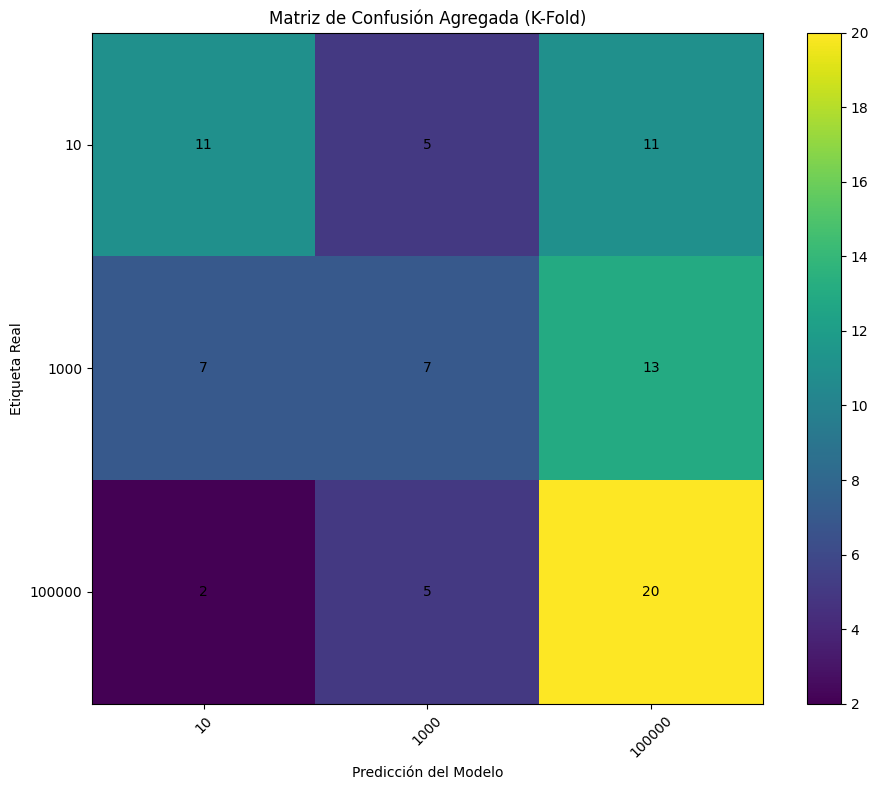


--- Reporte de Clasificación Agregado (Todos los Folds) ---
              precision    recall  f1-score   support

          10       0.55      0.41      0.47        27
        1000       0.41      0.26      0.32        27
      100000       0.45      0.74      0.56        27

    accuracy                           0.47        81
   macro avg       0.47      0.47      0.45        81
weighted avg       0.47      0.47      0.45        81

Generando Curva ROC Agregada (Todos los Folds)...


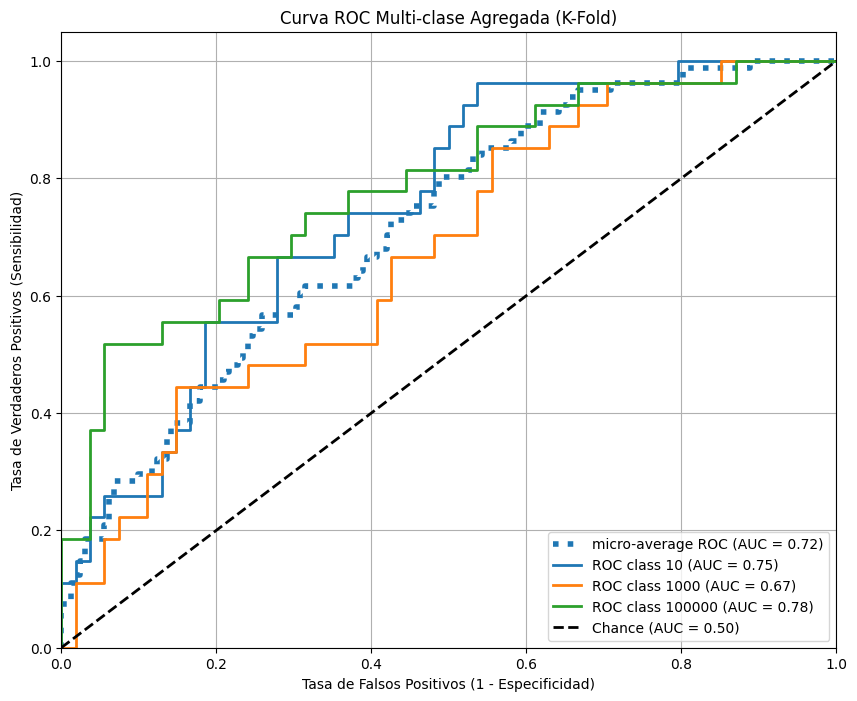

Generando curvas de aprendizaje (Loss y Métricas vs. Épocas)...


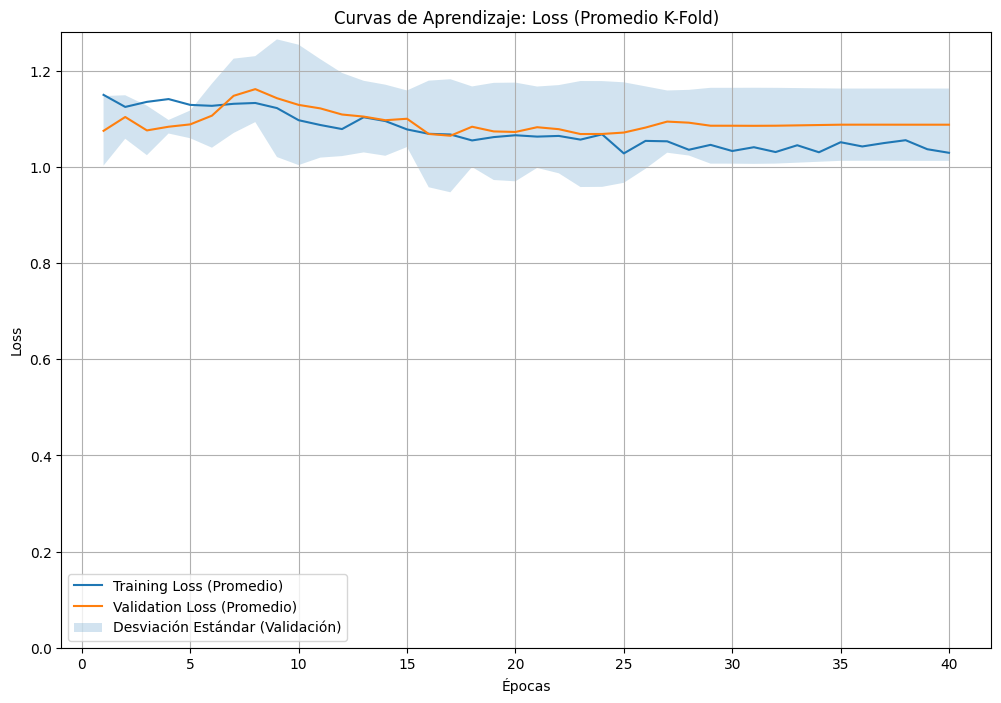

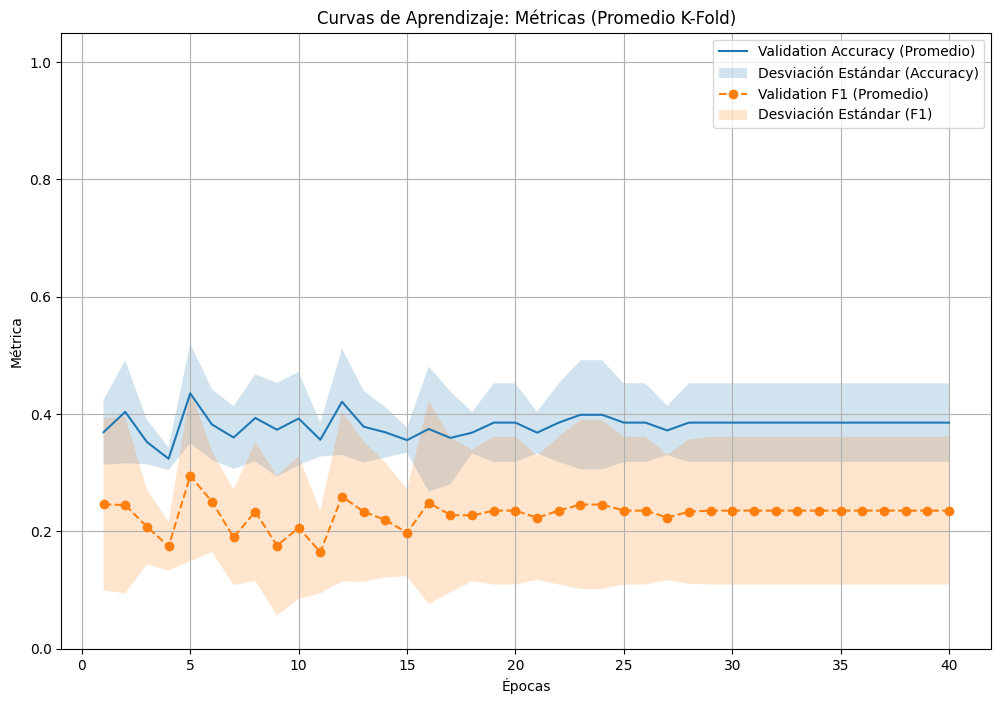


Proceso finalizado.


In [ ]:
# ========================================================================
# SECCIÓN 0: IMPORTS
# ========================================================================
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset
from PIL import Image
from torchvision import transforms
import timm
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

from torchmetrics.classification import (
    MulticlassAccuracy, MulticlassF1Score, MulticlassPrecision, MulticlassRecall
)
from torch.optim.lr_scheduler import ReduceLROnPlateau

# ========================================================================
# SECCIÓN 1: CONFIGURACIÓN
# ========================================================================
IMAGE_DIR = r'/content/drive/MyDrive/ISIS3002_-_Tesis_Electronica/Enhanced_Batch_224'
CSV_PATH = r'/content/drive/MyDrive/ISIS3002_-_Tesis_Electronica/Fase_2_Visual_Transformers/labelsFrecuencias1.csv'

MODEL_NAME   = 'swin_tiny_patch4_window7_224'
NUM_EPOCHS   = 40
BATCH_SIZE   = 16
LEARNING_RATE = 1e-4
WEIGHT_DECAY  = 5e-4

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo: {DEVICE}")

K_FOLDS = 5
RANDOM_STATE = 42

# ========================================================================
# SECCIÓN 2: PREPARACIÓN DE DATOS
# ========================================================================
try:
    df_labels = pd.read_csv(CSV_PATH)
    # Se asume: col 0 = nombre base, col 1 = etiqueta
    class_names = sorted(df_labels.iloc[:, 1].unique())
    num_classes = len(class_names)
    print(f"Detectadas {num_classes} clases: {class_names}")
    print(f"Conteo de muestras por clase:\n{df_labels.iloc[:, 1].value_counts()}")

    class_to_idx = {class_name: i for i, class_name in enumerate(class_names)}
    idx_to_class = {i: class_name for i, class_name in enumerate(class_names)}
except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{CSV_PATH}'.")
    raise

class VoltageDataset(Dataset):
    def __init__(self, csv_path, image_dir, class_to_idx, transform=None):
        self.dataframe = pd.read_csv(csv_path)
        self.image_dir = image_dir
        self.transform = transform
        self.class_to_idx = class_to_idx
        self.label_column_name = self.dataframe.columns[1]

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        base_name = self.dataframe.iloc[idx, 0]
        base_name_without_ext = os.path.splitext(base_name)[0]
        img_name = os.path.join(self.image_dir, f"{base_name_without_ext}.png")

        try:
            image = Image.open(img_name).convert("L")  # escala de grises
        except FileNotFoundError:
            print(f"Error: No se pudo encontrar la imagen {img_name}")
            # Devolver un tensor dummy para no romper el DataLoader
            return torch.zeros(1, 224, 224, dtype=torch.float32), torch.tensor(0, dtype=torch.long)

        label_value = self.dataframe.iloc[idx][self.label_column_name]
        label_idx = self.class_to_idx[label_value]

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label_idx, dtype=torch.long)

class AddGaussianNoise(object):
    def __init__(self, mean=0., std=0.01):
        self.std = std
        self.mean = mean
    def __call__(self, tensor):
        noise = torch.randn(tensor.size()) * self.std + self.mean
        noisy_tensor = tensor + noise
        noisy_tensor = torch.clamp(noisy_tensor, 0., 1.)
        return noisy_tensor
    def __repr__(self):
        return self.__class__.__name__ + f'(mean={self.mean}, std={self.std})'

# Data Augmentation (ajustado: val con tamaño fijo 224x224)
data_transform = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.RandomCrop(224, padding=10, padding_mode='reflect'),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.1, contrast=0.1),
        transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
        transforms.ToTensor(),
        AddGaussianNoise(mean=0., std=0.005),
        transforms.Normalize(mean=[0.5], std=[0.5]),
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),  # tamaño EXACTO
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5]),
    ]),
}

# ========================================================================
# SECCIÓN 3: MODELO (Swin Transformer) — versión correcta
# ========================================================================
def create_swin_classifier(model_name, num_classes, pretrained=True):
    """
    Crea un Swin con 1 canal de entrada y head correcto (logits [N, num_classes]).
    Sin cirugías manuales al patch_embed ni al head.
    """
    model = timm.create_model(
        model_name,
        pretrained=pretrained,
        in_chans=1,             # imágenes en escala de grises
        num_classes=num_classes,
        drop_rate=0.5,          # dropout del clasificador
        # drop_path_rate=0.1,   # opcional
    )
    # Asegurar pooling global y head lineal final correcto
    if hasattr(model, "reset_classifier"):
        model.reset_classifier(num_classes=num_classes, global_pool='avg')
    return model

# ========================================================================
# SECCIÓN 4: BUCLE DE ENTRENAMIENTO
# ========================================================================
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler,
                num_epochs, num_classes, model_save_path):
    best_val_loss = float('inf')
    metrics = {
        'acc': MulticlassAccuracy(num_classes=num_classes, average='macro').to(DEVICE),
        'pre': MulticlassPrecision(num_classes=num_classes, average='macro').to(DEVICE),
        'rec': MulticlassRecall(num_classes=num_classes, average='macro').to(DEVICE),
        'f1':  MulticlassF1Score(num_classes=num_classes, average='macro').to(DEVICE),
    }
    history = {'train_loss': [], 'val_loss': [], 'val_acc': [], 'val_f1': []}

    for epoch in range(num_epochs):
        # ------- TRAIN -------
        model.train()
        running_loss = 0.0
        train_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", leave=False)
        for inputs, labels in train_tqdm:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)

            # Verificar logits [N, num_classes]
            assert outputs.dim() == 2 and outputs.size(1) == num_classes, \
                f"Se esperaban logits [N,{num_classes}] y llegó {tuple(outputs.shape)}"

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            train_tqdm.set_postfix(loss=loss.item())

        train_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(train_loss)

        # ------- VALIDATION -------
        model.eval()
        val_loss = 0.0
        for metric in metrics.values():
            metric.reset()

        val_tqdm = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]", leave=False)
        with torch.no_grad():
            for inputs, labels in val_tqdm:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)

                # Verificar logits [N, num_classes]
                assert outputs.dim() == 2 and outputs.size(1) == num_classes, \
                    f"Se esperaban logits [N,{num_classes}] y llegó {tuple(outputs.shape)}"

                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                for metric in metrics.values():
                    metric.update(outputs, labels)

        val_loss /= len(val_loader.dataset)
        val_acc = metrics['acc'].compute()
        val_pre = metrics['pre'].compute()
        val_rec = metrics['rec'].compute()
        val_f1  = metrics['f1'].compute()

        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc.item())
        history['val_f1'].append(val_f1.item())

        if (epoch + 1) % 10 == 0 or epoch == num_epochs - 1:
            print(f"Epoch {epoch+1}/{num_epochs} -> Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
            print(f"  Metrics -> Acc: {val_acc:.4f} | Precision: {val_pre:.4f} | Recall: {val_rec:.4f} | F1: {val_f1:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), model_save_path)

        scheduler.step(val_loss)

    print(f"Fold finalizado. Mejor Val Loss: {best_val_loss:.4f}")
    return history

# ========================================================================
# SECCIÓN 5: EVALUACIÓN
# ========================================================================
def evaluate_fold(model, dataloader, device, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    all_scores = []
    n_classes = len(class_names)

    acc_metric = MulticlassAccuracy(num_classes=n_classes, average='macro').to(device)
    pre_metric = MulticlassPrecision(num_classes=n_classes, average='macro').to(device)
    rec_metric = MulticlassRecall(num_classes=n_classes, average='macro').to(device)
    f1_metric  = MulticlassF1Score(num_classes=n_classes, average='macro').to(device)

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)

            # seguridad extra
            assert outputs.dim() == 2 and outputs.size(1) == n_classes, \
                f"Logits con forma inesperada: {tuple(outputs.shape)}"

            scores = torch.nn.functional.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_scores.extend(scores.cpu().numpy())

            acc_metric.update(outputs, labels)
            pre_metric.update(outputs, labels)
            rec_metric.update(outputs, labels)
            f1_metric.update(outputs, labels)

    final_acc = acc_metric.compute().item()
    final_pre = pre_metric.compute().item()
    final_rec = rec_metric.compute().item()
    final_f1  = f1_metric.compute().item()

    print("\n--- Métricas (torchmetrics) del Fold ---")
    print(f"Accuracy:  {final_acc:.4f}")
    print(f"Precision: {final_pre:.4f}")
    print(f"Recall:    {final_rec:.4f}")
    print(f"F1 Score:  {final_f1:.4f}")

    return {
        'acc': final_acc, 'pre': final_pre, 'rec': final_rec, 'f1': final_f1,
        'labels': all_labels, 'preds': all_preds, 'scores': all_scores
    }

# ========================================================================
# SECCIÓN 6: GRÁFICOS
# ========================================================================
def plot_final_confusion_matrix(all_labels, all_preds, class_names):
    print("\n--- Matriz de Confusión Agregada (Todos los Folds) ---")
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    # Simple heatmap sin seaborn para evitar dependencias extra
    im = plt.imshow(cm, interpolation='nearest')
    plt.colorbar(im)
    plt.xticks(ticks=range(len(class_names)), labels=[str(c) for c in class_names], rotation=45)
    plt.yticks(ticks=range(len(class_names)), labels=[str(c) for c in class_names])
    plt.xlabel('Predicción del Modelo')
    plt.ylabel('Etiqueta Real')
    plt.title('Matriz de Confusión Agregada (K-Fold)')

    # anotar valores
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center')
    plt.tight_layout()
    plt.show()

    print("\n--- Reporte de Clasificación Agregado (Todos los Folds) ---")
    report = classification_report(all_labels, all_preds,
                                   target_names=[str(c) for c in class_names],
                                   zero_division=0)
    print(report)

def plot_final_roc_curves(all_labels, all_scores, class_names):
    print("Generando Curva ROC Agregada (Todos los Folds)...")
    n_classes = len(class_names)
    all_labels_bin = label_binarize(all_labels, classes=range(n_classes))
    all_scores = np.array(all_scores)

    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], all_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_bin.ravel(), all_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(10, 8))
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'micro-average ROC (AUC = {roc_auc["micro"]:0.2f})',
             linestyle=':', linewidth=4)

    # Colores cíclicos por si hay más clases
    colors = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC class {class_names[i]} (AUC = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (AUC = 0.50)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
    plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
    plt.title('Curva ROC Multi-clase Agregada (K-Fold)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

def plot_learning_curves(all_histories, num_epochs):
    print("Generando curvas de aprendizaje (Loss y Métricas vs. Épocas)...")

    train_loss_matrix = np.array([h['train_loss'] for h in all_histories])
    val_loss_matrix   = np.array([h['val_loss']   for h in all_histories])
    val_acc_matrix    = np.array([h['val_acc']    for h in all_histories])
    val_f1_matrix     = np.array([h['val_f1']     for h in all_histories])

    mean_train_loss = np.mean(train_loss_matrix, axis=0)
    mean_val_loss   = np.mean(val_loss_matrix, axis=0)
    std_val_loss    = np.std(val_loss_matrix, axis=0)
    mean_val_acc    = np.mean(val_acc_matrix, axis=0)
    std_val_acc     = np.std(val_acc_matrix, axis=0)
    mean_val_f1     = np.mean(val_f1_matrix, axis=0)
    std_val_f1      = np.std(val_f1_matrix, axis=0)

    epochs = range(1, num_epochs + 1)

    plt.figure(figsize=(12, 8))
    plt.plot(epochs, mean_train_loss, label='Training Loss (Promedio)')
    plt.plot(epochs, mean_val_loss,   label='Validation Loss (Promedio)')
    plt.fill_between(epochs, mean_val_loss - std_val_loss, mean_val_loss + std_val_loss,
                     alpha=0.2, label='Desviación Estándar (Validación)')
    plt.title('Curvas de Aprendizaje: Loss (Promedio K-Fold)')
    plt.xlabel('Épocas'); plt.ylabel('Loss'); plt.legend(); plt.grid(True); plt.ylim(bottom=0)
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.plot(epochs, mean_val_acc, label='Validation Accuracy (Promedio)')
    plt.fill_between(epochs, mean_val_acc - std_val_acc, mean_val_acc + std_val_acc,
                     alpha=0.2, label='Desviación Estándar (Accuracy)')
    plt.plot(epochs, mean_val_f1, linestyle='--', marker='o', label='Validation F1 (Promedio)')
    plt.fill_between(epochs, mean_val_f1 - std_val_f1, mean_val_f1 + std_val_f1,
                     alpha=0.2, label='Desviación Estándar (F1)')
    plt.title('Curvas de Aprendizaje: Métricas (Promedio K-Fold)')
    plt.xlabel('Épocas'); plt.ylabel('Métrica'); plt.legend(); plt.grid(True); plt.ylim(0.0, 1.05)
    plt.show()

# ========================================================================
# SECCIÓN 7: EJECUCIÓN PRINCIPAL (K-FOLD)
# ========================================================================
if __name__ == "__main__":

    dataset_for_train = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['train']
    )
    dataset_for_val = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['val']
    )

    print(f"\n--- Transformaciones de Entrenamiento ({MODEL_NAME}) ---")
    print(dataset_for_train.transform)
    print("----------------------------------------\n")

    kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=RANDOM_STATE)

    fold_metrics = {'acc': [], 'pre': [], 'rec': [], 'f1': []}
    all_folds_labels = []
    all_folds_preds  = []
    all_folds_scores = []
    all_fold_histories = []

    print(f"Iniciando Cross-Validation de {K_FOLDS} folds...")
    print("=" * 70)

    for fold, (train_ids, val_ids) in enumerate(kfold.split(dataset_for_train)):
        print(f"\n======= FOLD {fold+1}/{K_FOLDS} =======")
        train_sub = Subset(dataset_for_train, train_ids)
        val_sub   = Subset(dataset_for_val,   val_ids)

        train_loader = DataLoader(train_sub, batch_size=BATCH_SIZE, shuffle=True,
                                  num_workers=2, pin_memory=True)
        val_loader   = DataLoader(val_sub, batch_size=BATCH_SIZE, shuffle=False,
                                  num_workers=2, pin_memory=True)

        print(f"Datos del Fold: {len(train_sub)} para entrenamiento, {len(val_sub)} para validación.")

        # Modelo
        model = create_swin_classifier(MODEL_NAME, num_classes=num_classes, pretrained=True).to(DEVICE)

        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
        scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

        model_save_path = f'best_model_fold_{fold+1}.pth'

        print(f"Entrenando Fold {fold+1}...")
        fold_history = train_model(
            model, train_loader, val_loader,
            criterion, optimizer, scheduler,
            NUM_EPOCHS, num_classes, model_save_path
        )
        all_fold_histories.append(fold_history)

        print(f"\nEvaluando mejor modelo del Fold {fold+1}...")
        best_model = create_swin_classifier(MODEL_NAME, num_classes=num_classes, pretrained=False).to(DEVICE)
        best_model.load_state_dict(torch.load(model_save_path, map_location=DEVICE))

        fold_results = evaluate_fold(best_model, val_loader, DEVICE, class_names)

        fold_metrics['acc'].append(fold_results['acc'])
        fold_metrics['pre'].append(fold_results['pre'])
        fold_metrics['rec'].append(fold_results['rec'])
        fold_metrics['f1'].append(fold_results['f1'])

        all_folds_labels.extend(fold_results['labels'])
        all_folds_preds.extend(fold_results['preds'])
        all_folds_scores.extend(fold_results['scores'])

    print("\n" + "=" * 70)
    print("CROSS-VALIDATION COMPLETADA")
    print("=" * 70)

    print(f"\n--- Resumen de Métricas (Promedio de {K_FOLDS} Folds) ---")
    print(f"Accuracy:  {np.mean(fold_metrics['acc']):.4f} +/- {np.std(fold_metrics['acc']):.4f}")
    print(f"Precision: {np.mean(fold_metrics['pre']):.4f} +/- {np.std(fold_metrics['pre']):.4f}")
    print(f"Recall:    {np.mean(fold_metrics['rec']):.4f} +/- {np.std(fold_metrics['rec']):.4f}")
    print(f"F1 Score:  {np.mean(fold_metrics['f1']):.4f} +/- {np.std(fold_metrics['f1']):.4f}")

    plot_final_confusion_matrix(all_folds_labels, all_folds_preds, class_names)
    plot_final_roc_curves(all_folds_labels, all_folds_scores, class_names)
    plot_learning_curves(all_fold_histories, NUM_EPOCHS)

    print("\nProceso finalizado.")


## SwinTransformer aumentado

Usando dispositivo: cuda
Detectadas 3 clases: [np.int64(10), np.int64(1000), np.int64(100000)]
Conteo de muestras por clase:
Frecuencia
10        27
1000      27
100000    27
Name: count, dtype: int64
Nombres para visualización: ['10 Hz', '1 kHz', '100 kHz']

--- Transformaciones de Entrenamiento (swin_tiny_patch4_window7_224) ---
Compose(
    Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
    RandomCrop(size=(224, 224), padding=10)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    ColorJitter(brightness=(0.9, 1.1), contrast=(0.9, 1.1), saturation=None, hue=None)
    GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 1.0))
    ToTensor()
    AddGaussianNoise(mean=0.0, std=0.005)
    Normalize(mean=[0.5], std=[0.5])
)
----------------------------------------

Iniciando Cross-Validation de 5 folds...

======= FOLD 1/5 =======
Datos del Fold: 64 para entrenamiento, 17 para validación.
Entrenando Fold 1...


Epoch 10/40 -> Train Loss: 1.0544 | Val Loss: 1.0428
  Metrics -> Acc: 0.3333 | Precision: 0.0980 | Recall: 0.3333 | F1: 0.1515


Epoch 20/40 -> Train Loss: 1.0597 | Val Loss: 1.0001
  Metrics -> Acc: 0.4476 | Precision: 0.6190 | Recall: 0.4476 | F1: 0.3540


Epoch 30/40 -> Train Loss: 0.9668 | Val Loss: 0.8978
  Metrics -> Acc: 0.6286 | Precision: 0.6905 | Recall: 0.6286 | F1: 0.5755


Epoch 40/40 -> Train Loss: 0.9449 | Val Loss: 0.8948
  Metrics -> Acc: 0.5619 | Precision: 0.6429 | Recall: 0.5619 | F1: 0.5199
Fold finalizado. Mejor Val Loss: 0.8649

Evaluando mejor modelo del Fold 1...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.5905
Precision: 0.6071
Recall:    0.5905
F1 Score:  0.5945

======= FOLD 2/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 2...


Epoch 10/40 -> Train Loss: 1.1051 | Val Loss: 1.2438
  Metrics -> Acc: 0.3333 | Precision: 0.0417 | Recall: 0.3333 | F1: 0.0741


Epoch 20/40 -> Train Loss: 1.1136 | Val Loss: 1.1788
  Metrics -> Acc: 0.3333 | Precision: 0.0417 | Recall: 0.3333 | F1: 0.0741


Epoch 30/40 -> Train Loss: 1.0595 | Val Loss: 1.1787
  Metrics -> Acc: 0.3333 | Precision: 0.0417 | Recall: 0.3333 | F1: 0.0741


Epoch 40/40 -> Train Loss: 1.0897 | Val Loss: 1.1787
  Metrics -> Acc: 0.3333 | Precision: 0.0417 | Recall: 0.3333 | F1: 0.0741
Fold finalizado. Mejor Val Loss: 1.0992

Evaluando mejor modelo del Fold 2...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.5833
Precision: 0.5389
Recall:    0.5833
F1 Score:  0.5022

======= FOLD 3/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 3...


Epoch 10/40 -> Train Loss: 1.0434 | Val Loss: 1.2345
  Metrics -> Acc: 0.3889 | Precision: 0.4000 | Recall: 0.3889 | F1: 0.2063


Epoch 20/40 -> Train Loss: 1.1208 | Val Loss: 1.0977
  Metrics -> Acc: 0.3333 | Precision: 0.1250 | Recall: 0.3333 | F1: 0.1818


Epoch 30/40 -> Train Loss: 1.1108 | Val Loss: 1.0954
  Metrics -> Acc: 0.4444 | Precision: 0.4667 | Recall: 0.4444 | F1: 0.3571


Epoch 40/40 -> Train Loss: 1.0997 | Val Loss: 1.0954
  Metrics -> Acc: 0.4444 | Precision: 0.4667 | Recall: 0.4444 | F1: 0.3571
Fold finalizado. Mejor Val Loss: 1.0161

Evaluando mejor modelo del Fold 3...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.2540
Precision: 0.4222
Recall:    0.2540
F1 Score:  0.3148

======= FOLD 4/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 4...


Epoch 10/40 -> Train Loss: 1.0315 | Val Loss: 1.0237
  Metrics -> Acc: 0.5429 | Precision: 0.7778 | Recall: 0.5429 | F1: 0.4778


Epoch 20/40 -> Train Loss: 0.9708 | Val Loss: 1.0567
  Metrics -> Acc: 0.4286 | Precision: 0.4286 | Recall: 0.4286 | F1: 0.2963


Epoch 30/40 -> Train Loss: 1.0016 | Val Loss: 1.0565
  Metrics -> Acc: 0.4286 | Precision: 0.4286 | Recall: 0.4286 | F1: 0.2963


Epoch 40/40 -> Train Loss: 1.0078 | Val Loss: 1.0561
  Metrics -> Acc: 0.4286 | Precision: 0.4286 | Recall: 0.4286 | F1: 0.2963
Fold finalizado. Mejor Val Loss: 0.9594

Evaluando mejor modelo del Fold 4...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.3929
Precision: 0.2540
Recall:    0.3929
F1 Score:  0.2967

======= FOLD 5/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 5...


Epoch 10/40 -> Train Loss: 1.0997 | Val Loss: 1.1426
  Metrics -> Acc: 0.3333 | Precision: 0.0833 | Recall: 0.3333 | F1: 0.1333


Epoch 20/40 -> Train Loss: 1.0660 | Val Loss: 1.0386
  Metrics -> Acc: 0.4571 | Precision: 0.3879 | Recall: 0.4571 | F1: 0.3889


Epoch 30/40 -> Train Loss: 1.0507 | Val Loss: 1.0024
  Metrics -> Acc: 0.4571 | Precision: 0.3879 | Recall: 0.4571 | F1: 0.3889


Epoch 40/40 -> Train Loss: 1.0643 | Val Loss: 1.0566
  Metrics -> Acc: 0.4286 | Precision: 0.4524 | Recall: 0.4286 | F1: 0.3236
Fold finalizado. Mejor Val Loss: 0.9910

Evaluando mejor modelo del Fold 5...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.4571
Precision: 0.3879
Recall:    0.4571
F1 Score:  0.3889

CROSS-VALIDATION COMPLETADA

--- Resumen de Métricas (Promedio de 5 Folds) ---
Accuracy:  0.4556 +/- 0.1258
Precision: 0.4420 +/- 0.1227
Recall:    0.4556 +/- 0.1258
F1 Score:  0.4194 +/- 0.1135

--- Matriz de Confusión Agregada (Todos los Folds) ---


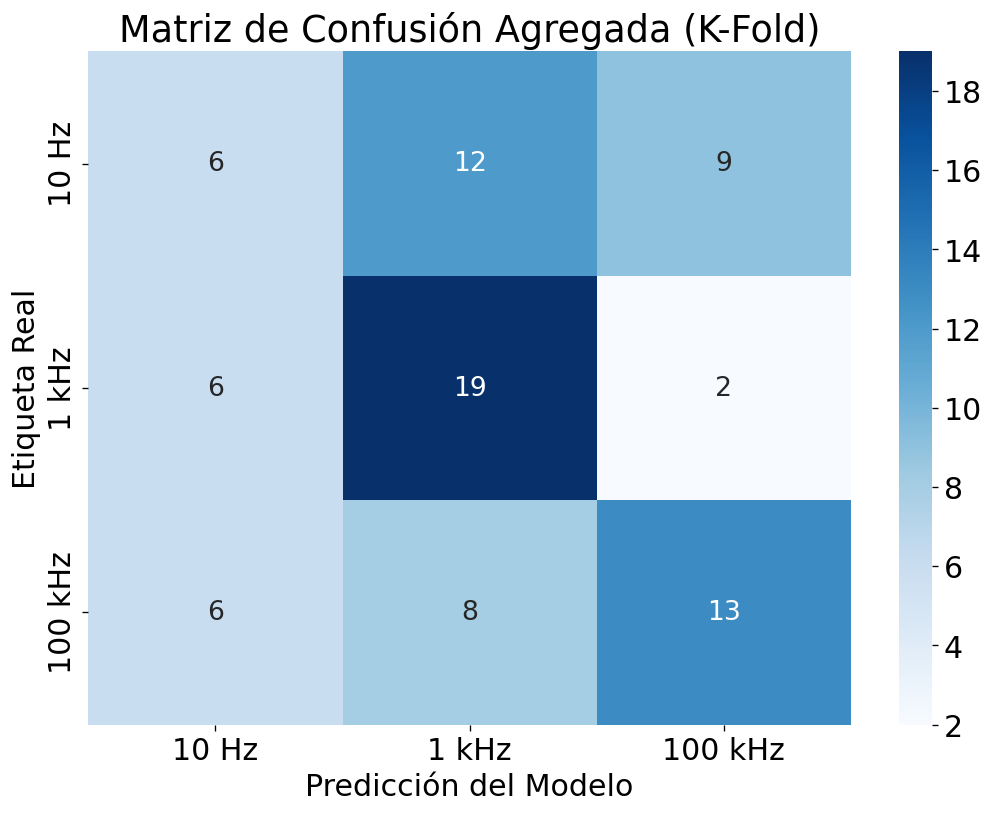


--- Reporte de Clasificación Agregado (Todos los Folds) ---
              precision    recall  f1-score   support

       10 Hz       0.33      0.22      0.27        27
       1 kHz       0.49      0.70      0.58        27
     100 kHz       0.54      0.48      0.51        27

    accuracy                           0.47        81
   macro avg       0.45      0.47      0.45        81
weighted avg       0.45      0.47      0.45        81

Generando Curva ROC Agregada (Todos los Folds)...


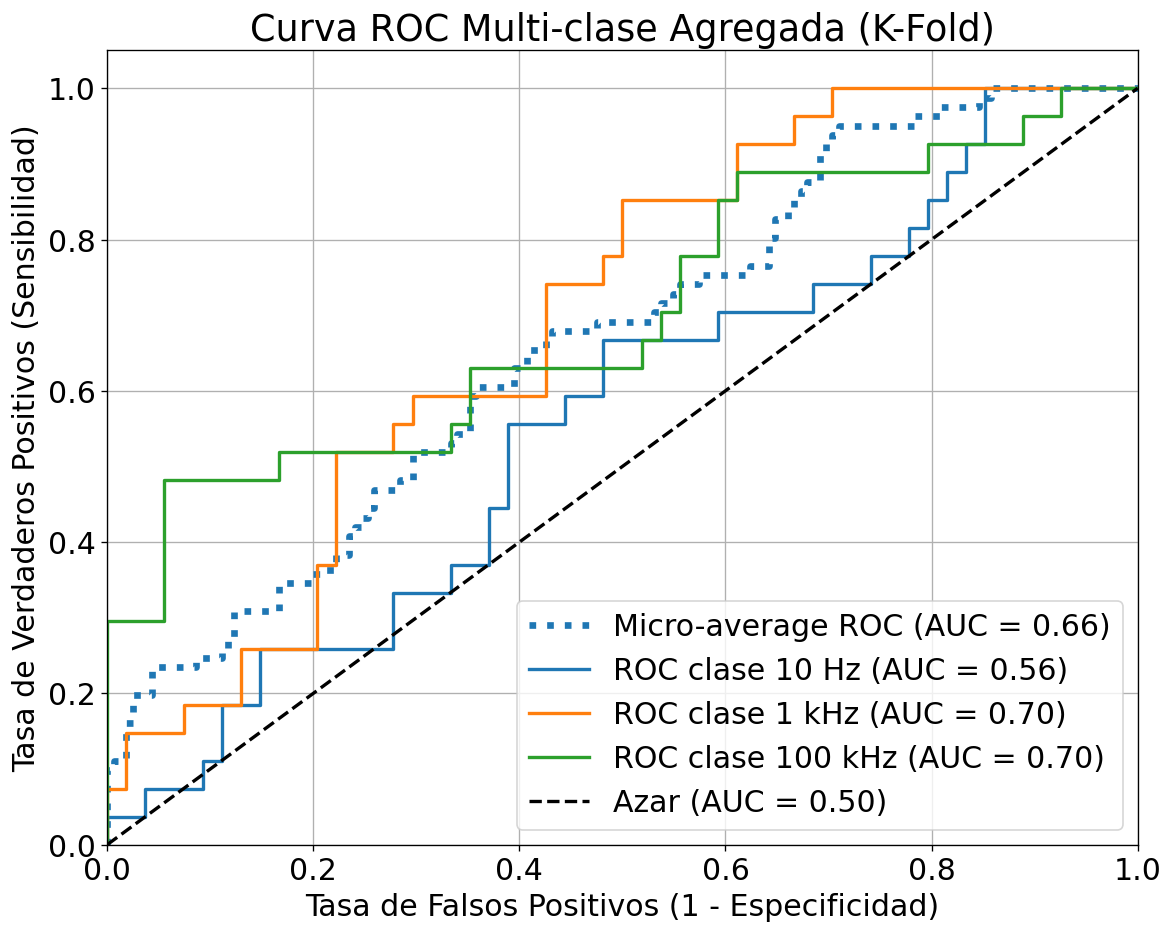

Generando curvas de aprendizaje (Loss y Métricas vs. Épocas)...


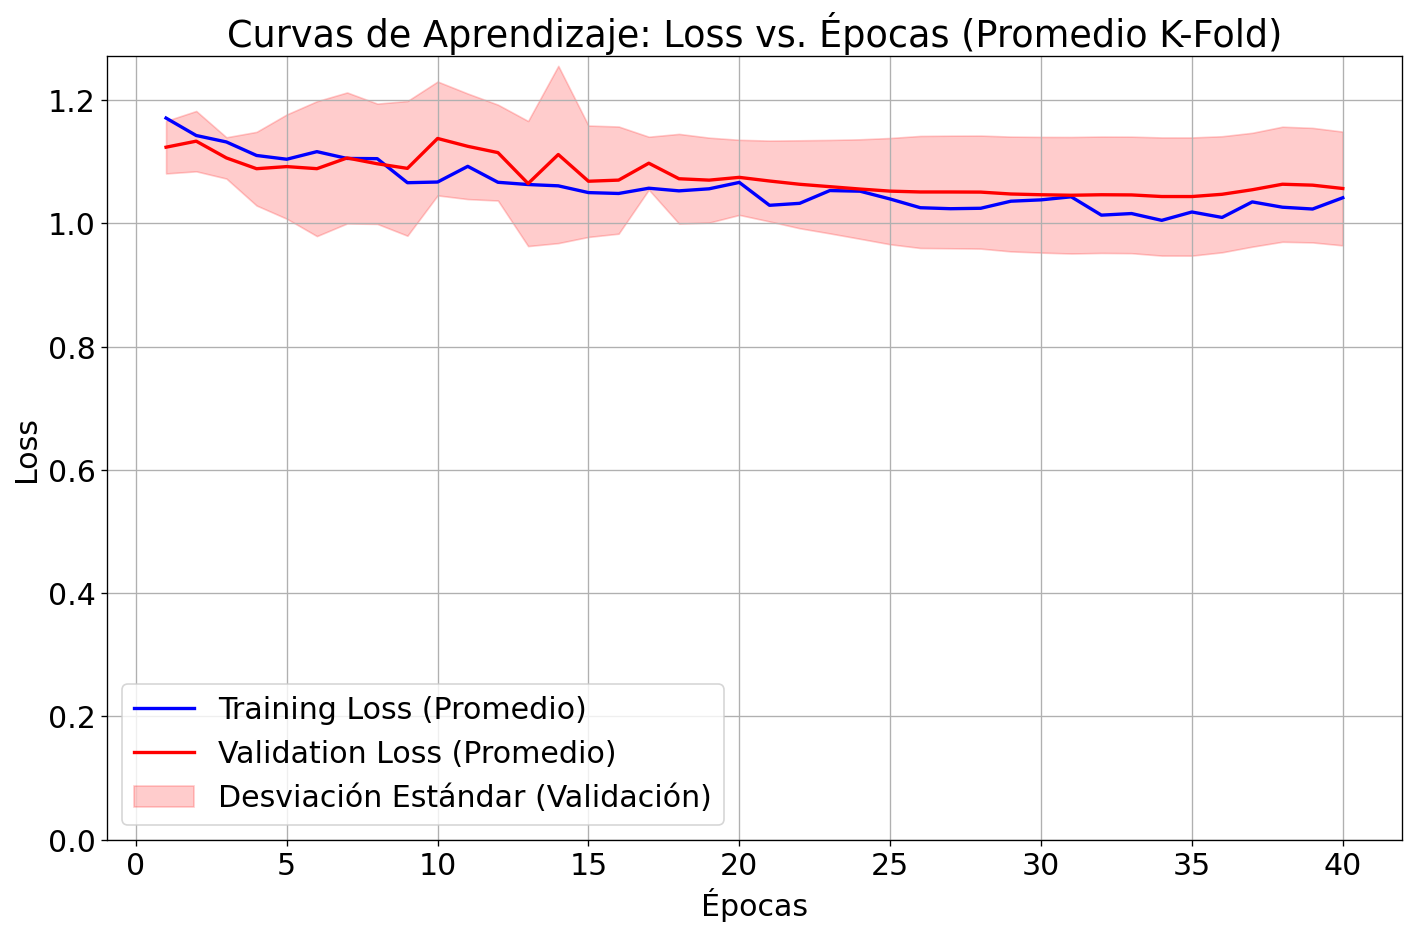

/tmp/ipython-input-18273100.py:399: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(epochs, mean_val_f1, 'o-', lw=2, label='Validation F1-Score (Promedio)', linestyle='--')


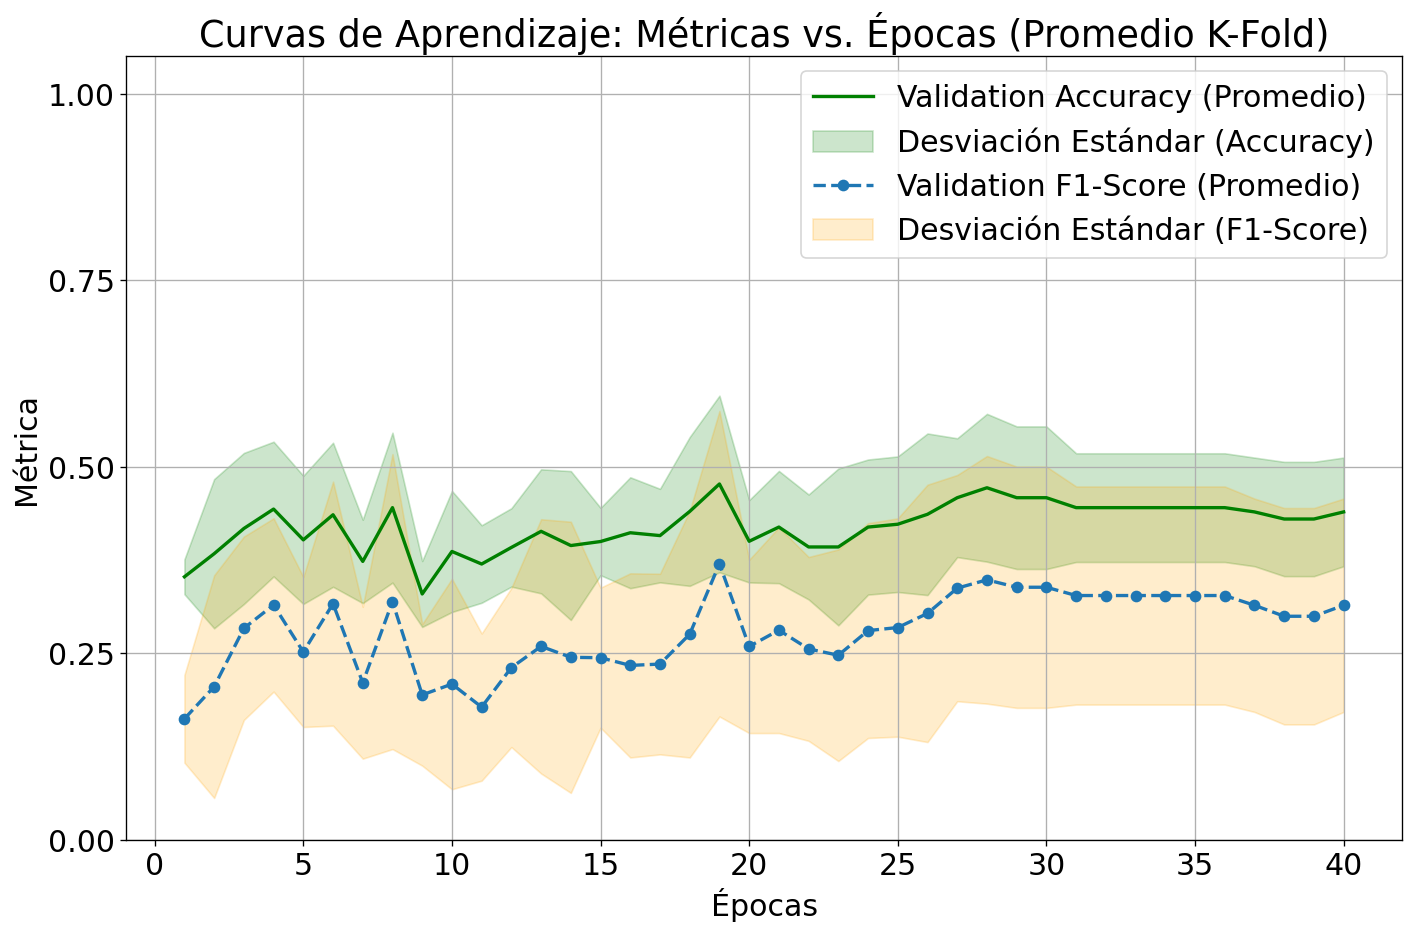


Proceso finalizado.


In [ ]:
# ========================================================================
# SECCIÓN 0: IMPORTS
# ========================================================================
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset
from PIL import Image
from torchvision import transforms
import timm
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

from torchmetrics.classification import (
    MulticlassAccuracy, MulticlassF1Score, MulticlassPrecision, MulticlassRecall
)
from torch.optim.lr_scheduler import ReduceLROnPlateau

# --------------------------------------------------------------------
# CONFIGURACIÓN GLOBAL DE GRÁFICOS (TAMAÑOS GRANDES PARA TESIS / PPT)
# --------------------------------------------------------------------
plt.rcParams.update({
    "figure.dpi": 120,
    "savefig.dpi": 300,
    "axes.titlesize": 22,
    "axes.labelsize": 18,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.fontsize": 18,
    "font.size": 14
})

# ========================================================================
# SECCIÓN 1: CONFIGURACIÓN
# ========================================================================
IMAGE_DIR = r'/content/drive/MyDrive/ISIS3002_-_Tesis_Electronica/Enhanced_Batch_224'
CSV_PATH  = r'/content/drive/MyDrive/ISIS3002_-_Tesis_Electronica/Fase_2_Visual_Transformers/labelsFrecuencias1.csv'

MODEL_NAME    = 'swin_tiny_patch4_window7_224'
NUM_EPOCHS    = 40
BATCH_SIZE    = 16
LEARNING_RATE = 1e-4
WEIGHT_DECAY  = 5e-4

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo: {DEVICE}")

K_FOLDS = 5
RANDOM_STATE = 42

# ========================================================================
# SECCIÓN 2: PREPARACIÓN DE DATOS
# ========================================================================
try:
    df_labels = pd.read_csv(CSV_PATH)
    # Se asume: col 0 = nombre base, col 1 = etiqueta (10, 1000, 100000, etc.)
    class_names = sorted(df_labels.iloc[:, 1].unique())
    num_classes = len(class_names)
    print(f"Detectadas {num_classes} clases: {class_names}")
    print(f"Conteo de muestras por clase:\n{df_labels.iloc[:, 1].value_counts()}")

    class_to_idx = {class_name: i for i, class_name in enumerate(class_names)}
    idx_to_class = {i: class_name for i, class_name in enumerate(class_names)}

    # --- Nombres bonitos para las figuras ---
    pretty_name_map = {
        '10': '10 Hz',
        '1000': '1 kHz',
        '100000': '100 kHz'
    }
    pretty_class_names = [
        pretty_name_map.get(str(c), str(c)) for c in class_names
    ]
    print(f"Nombres para visualización: {pretty_class_names}")

except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{CSV_PATH}'.")
    raise

class VoltageDataset(Dataset):
    def __init__(self, csv_path, image_dir, class_to_idx, transform=None):
        self.dataframe = pd.read_csv(csv_path)
        self.image_dir = image_dir
        self.transform = transform
        self.class_to_idx = class_to_idx
        self.label_column_name = self.dataframe.columns[1]

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        base_name = self.dataframe.iloc[idx, 0]
        base_name_without_ext = os.path.splitext(base_name)[0]
        img_name = os.path.join(self.image_dir, f"{base_name_without_ext}.png")

        try:
            image = Image.open(img_name).convert("L")  # escala de grises
        except FileNotFoundError:
            print(f"Error: No se pudo encontrar la imagen {img_name}")
            return torch.zeros(1, 224, 224, dtype=torch.float32), torch.tensor(0, dtype=torch.long)

        label_value = self.dataframe.iloc[idx][self.label_column_name]
        label_idx = self.class_to_idx[label_value]

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label_idx, dtype=torch.long)

class AddGaussianNoise(object):
    def __init__(self, mean=0., std=0.01):
        self.std = std
        self.mean = mean
    def __call__(self, tensor):
        noise = torch.randn(tensor.size()) * self.std + self.mean
        noisy_tensor = tensor + noise
        noisy_tensor = torch.clamp(noisy_tensor, 0., 1.)
        return noisy_tensor
    def __repr__(self):
        return self.__class__.__name__ + f'(mean={self.mean}, std={self.std})'

# Data Augmentation
data_transform = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.RandomCrop(224, padding=10, padding_mode='reflect'),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.1, contrast=0.1),
        transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
        transforms.ToTensor(),
        AddGaussianNoise(mean=0., std=0.005),
        transforms.Normalize(mean=[0.5], std=[0.5]),
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5]),
    ]),
}

# ========================================================================
# SECCIÓN 3: MODELO (Swin Transformer)
# ========================================================================
def create_swin_classifier(model_name, num_classes, pretrained=True):
    """
    Swin con 1 canal de entrada y head correcto (logits [N, num_classes]).
    """
    model = timm.create_model(
        model_name,
        pretrained=pretrained,
        in_chans=1,             # imágenes en escala de grises
        num_classes=num_classes,
        drop_rate=0.5
    )
    if hasattr(model, "reset_classifier"):
        model.reset_classifier(num_classes=num_classes, global_pool='avg')
    return model

# ========================================================================
# SECCIÓN 4: BUCLE DE ENTRENAMIENTO
# ========================================================================
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler,
                num_epochs, num_classes, model_save_path):
    best_val_loss = float('inf')
    metrics = {
        'acc': MulticlassAccuracy(num_classes=num_classes, average='macro').to(DEVICE),
        'pre': MulticlassPrecision(num_classes=num_classes, average='macro').to(DEVICE),
        'rec': MulticlassRecall(num_classes=num_classes, average='macro').to(DEVICE),
        'f1':  MulticlassF1Score(num_classes=num_classes, average='macro').to(DEVICE),
    }
    history = {'train_loss': [], 'val_loss': [], 'val_acc': [], 'val_f1': []}

    for epoch in range(num_epochs):
        # ------- TRAIN -------
        model.train()
        running_loss = 0.0
        train_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", leave=False)
        for inputs, labels in train_tqdm:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            train_tqdm.set_postfix(loss=loss.item())

        train_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(train_loss)

        # ------- VALIDATION -------
        model.eval()
        val_loss = 0.0
        for metric in metrics.values():
            metric.reset()

        val_tqdm = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]", leave=False)
        with torch.no_grad():
            for inputs, labels in val_tqdm:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                for metric in metrics.values():
                    metric.update(outputs, labels)

        val_loss /= len(val_loader.dataset)
        val_acc = metrics['acc'].compute()
        val_pre = metrics['pre'].compute()
        val_rec = metrics['rec'].compute()
        val_f1  = metrics['f1'].compute()

        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc.item())
        history['val_f1'].append(val_f1.item())

        if (epoch + 1) % 10 == 0 or epoch == num_epochs - 1:
            print(f"Epoch {epoch+1}/{num_epochs} -> Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
            print(f"  Metrics -> Acc: {val_acc:.4f} | Precision: {val_pre:.4f} | Recall: {val_rec:.4f} | F1: {val_f1:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), model_save_path)

        scheduler.step(val_loss)

    print(f"Fold finalizado. Mejor Val Loss: {best_val_loss:.4f}")
    return history

# ========================================================================
# SECCIÓN 5: EVALUACIÓN
# ========================================================================
def evaluate_fold(model, dataloader, device, class_names):
    model.eval()
    all_preds, all_labels, all_scores = [], [], []
    n_classes = len(class_names)

    acc_metric = MulticlassAccuracy(num_classes=n_classes, average='macro').to(device)
    pre_metric = MulticlassPrecision(num_classes=n_classes, average='macro').to(device)
    rec_metric = MulticlassRecall(num_classes=n_classes, average='macro').to(device)
    f1_metric  = MulticlassF1Score(num_classes=n_classes, average='macro').to(device)

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            scores = torch.nn.functional.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_scores.extend(scores.cpu().numpy())

            acc_metric.update(outputs, labels)
            pre_metric.update(outputs, labels)
            rec_metric.update(outputs, labels)
            f1_metric.update(outputs, labels)

    final_acc = acc_metric.compute().item()
    final_pre = pre_metric.compute().item()
    final_rec = rec_metric.compute().item()
    final_f1  = f1_metric.compute().item()

    print("\n--- Métricas (torchmetrics) del Fold ---")
    print(f"Accuracy:  {final_acc:.4f}")
    print(f"Precision: {final_pre:.4f}")
    print(f"Recall:    {final_rec:.4f}")
    print(f"F1 Score:  {final_f1:.4f}")

    return {
        'acc': final_acc, 'pre': final_pre, 'rec': final_rec, 'f1': final_f1,
        'labels': all_labels, 'preds': all_preds, 'scores': all_scores
    }

# ========================================================================
# SECCIÓN 6: GRÁFICOS (usando nombres bonitos)
# ========================================================================
def plot_final_confusion_matrix(all_labels, all_preds, display_names):
    """
    display_names: nombres formateados (p.ej. '10 Hz', '1 kHz', '100 kHz').
    """
    print("\n--- Matriz de Confusión Agregada (Todos los Folds) ---")
    cm = confusion_matrix(all_labels, all_preds)

    fig, ax = plt.subplots(figsize=(9, 7))
    sns.heatmap(
        cm,
        annot=True,
        fmt='g',
        cmap='Blues',
        xticklabels=[str(c) for c in display_names],
        yticklabels=[str(c) for c in display_names],
        annot_kws={"size": 16}
    )
    ax.set_xlabel('Predicción del Modelo')
    ax.set_ylabel('Etiqueta Real')
    ax.set_title('Matriz de Confusión Agregada (K-Fold)')
    plt.tight_layout()
    plt.show()

    print("\n--- Reporte de Clasificación Agregado (Todos los Folds) ---")
    report = classification_report(
        all_labels, all_preds,
        target_names=[str(c) for c in display_names],
        zero_division=0
    )
    print(report)

def plot_final_roc_curves(all_labels, all_scores, display_names):
    """
    display_names: nombres formateados para las clases.
    """
    print("Generando Curva ROC Agregada (Todos los Folds)...")
    n_classes = len(display_names)
    all_labels_bin = label_binarize(all_labels, classes=range(n_classes))
    all_scores = np.array(all_scores)

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], all_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_bin.ravel(), all_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(
        fpr["micro"], tpr["micro"],
        label=f'Micro-average ROC (AUC = {roc_auc["micro"]:0.2f})',
        linestyle=':', linewidth=4
    )

    colors = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
    for i, color in zip(range(n_classes), colors):
        ax.plot(fpr[i], tpr[i], color=color, lw=2,
                label=f'ROC clase {display_names[i]} (AUC = {roc_auc[i]:0.2f})')

    ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Azar (AUC = 0.50)')
    ax.set_xlim([0.0, 1.0]); ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
    ax.set_ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
    ax.set_title('Curva ROC Multi-clase Agregada (K-Fold)')
    ax.legend(loc="lower right"); ax.grid(True)
    plt.tight_layout(); plt.show()

def plot_learning_curves(all_histories, num_epochs):
    print("Generando curvas de aprendizaje (Loss y Métricas vs. Épocas)...")

    train_loss_matrix = np.array([h['train_loss'] for h in all_histories])
    val_loss_matrix   = np.array([h['val_loss']   for h in all_histories])
    val_acc_matrix    = np.array([h['val_acc']    for h in all_histories])
    val_f1_matrix     = np.array([h['val_f1']     for h in all_histories])

    mean_train_loss = np.mean(train_loss_matrix, axis=0)
    mean_val_loss   = np.mean(val_loss_matrix,   axis=0)
    std_val_loss    = np.std(val_loss_matrix,    axis=0)
    mean_val_acc    = np.mean(val_acc_matrix,    axis=0)
    std_val_acc     = np.std(val_acc_matrix,     axis=0)
    mean_val_f1     = np.mean(val_f1_matrix,     axis=0)
    std_val_f1      = np.std(val_f1_matrix,      axis=0)

    epochs = range(1, num_epochs + 1)

    # ---------- Loss ----------
    fig1, ax1 = plt.subplots(figsize=(12, 8))
    ax1.plot(epochs, mean_train_loss, 'b-', lw=2, label='Training Loss (Promedio)')
    ax1.plot(epochs, mean_val_loss,   'r-', lw=2, label='Validation Loss (Promedio)')
    ax1.fill_between(
        epochs,
        mean_val_loss - std_val_loss,
        mean_val_loss + std_val_loss,
        color='r', alpha=0.2,
        label='Desviación Estándar (Validación)'
    )
    ax1.set_title('Curvas de Aprendizaje: Loss vs. Épocas (Promedio K-Fold)')
    ax1.set_xlabel('Épocas'); ax1.set_ylabel('Loss')
    ax1.legend(); ax1.grid(True); ax1.set_ylim(bottom=0)
    plt.tight_layout(); plt.show()

    # ---------- Accuracy & F1 ----------
    fig2, ax2 = plt.subplots(figsize=(12, 8))
    ax2.plot(epochs, mean_val_acc, 'g-', lw=2, label='Validation Accuracy (Promedio)')
    ax2.fill_between(
        epochs,
        mean_val_acc - std_val_acc,
        mean_val_acc + std_val_acc,
        color='g', alpha=0.2,
        label='Desviación Estándar (Accuracy)'
    )
    ax2.plot(epochs, mean_val_f1, 'o-', lw=2, label='Validation F1-Score (Promedio)', linestyle='--')
    ax2.fill_between(
        epochs,
        mean_val_f1 - std_val_f1,
        mean_val_f1 + std_val_f1,
        color='orange', alpha=0.2,
        label='Desviación Estándar (F1-Score)'
    )
    ax2.set_title('Curvas de Aprendizaje: Métricas vs. Épocas (Promedio K-Fold)')
    ax2.set_xlabel('Épocas'); ax2.set_ylabel('Métrica')
    ax2.legend(); ax2.grid(True); ax2.set_ylim(0.0, 1.05)
    ax2.set_yticks(np.arange(0.0, 1.01, 0.25))
    plt.tight_layout(); plt.show()

# ========================================================================
# SECCIÓN 7: EJECUCIÓN PRINCIPAL (K-FOLD)
# ========================================================================
if __name__ == "__main__":

    dataset_for_train = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['train']
    )
    dataset_for_val = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['val']
    )

    print(f"\n--- Transformaciones de Entrenamiento ({MODEL_NAME}) ---")
    print(dataset_for_train.transform)
    print("----------------------------------------\n")

    kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=RANDOM_STATE)

    fold_metrics = {'acc': [], 'pre': [], 'rec': [], 'f1': []}
    all_folds_labels, all_folds_preds, all_folds_scores = [], [], []
    all_fold_histories = []

    print(f"Iniciando Cross-Validation de {K_FOLDS} folds...")
    print("=" * 70)

    for fold, (train_ids, val_ids) in enumerate(kfold.split(dataset_for_train)):
        print(f"\n======= FOLD {fold+1}/{K_FOLDS} =======")
        train_sub = Subset(dataset_for_train, train_ids)
        val_sub   = Subset(dataset_for_val,   val_ids)

        train_loader = DataLoader(train_sub, batch_size=BATCH_SIZE, shuffle=True,
                                  num_workers=2, pin_memory=True)
        val_loader   = DataLoader(val_sub, batch_size=BATCH_SIZE, shuffle=False,
                                  num_workers=2, pin_memory=True)

        print(f"Datos del Fold: {len(train_sub)} para entrenamiento, {len(val_sub)} para validación.")

        model = create_swin_classifier(MODEL_NAME, num_classes=num_classes, pretrained=True).to(DEVICE)

        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
        scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

        model_save_path = f'best_model_fold_{fold+1}.pth'

        print(f"Entrenando Fold {fold+1}...")
        fold_history = train_model(
            model, train_loader, val_loader,
            criterion, optimizer, scheduler,
            NUM_EPOCHS, num_classes, model_save_path
        )
        all_fold_histories.append(fold_history)

        print(f"\nEvaluando mejor modelo del Fold {fold+1}...")
        best_model = create_swin_classifier(MODEL_NAME, num_classes=num_classes, pretrained=False).to(DEVICE)
        best_model.load_state_dict(torch.load(model_save_path, map_location=DEVICE))

        fold_results = evaluate_fold(best_model, val_loader, DEVICE, class_names)

        fold_metrics['acc'].append(fold_results['acc'])
        fold_metrics['pre'].append(fold_results['pre'])
        fold_metrics['rec'].append(fold_results['rec'])
        fold_metrics['f1'].append(fold_results['f1'])

        all_folds_labels.extend(fold_results['labels'])
        all_folds_preds.extend(fold_results['preds'])
        all_folds_scores.extend(fold_results['scores'])

    print("\n" + "=" * 70)
    print("CROSS-VALIDATION COMPLETADA")
    print("=" * 70)

    print(f"\n--- Resumen de Métricas (Promedio de {K_FOLDS} Folds) ---")
    print(f"Accuracy:  {np.mean(fold_metrics['acc']):.4f} +/- {np.std(fold_metrics['acc']):.4f}")
    print(f"Precision: {np.mean(fold_metrics['pre']):.4f} +/- {np.std(fold_metrics['pre']):.4f}")
    print(f"Recall:    {np.mean(fold_metrics['rec']):.4f} +/- {np.std(fold_metrics['rec']):.4f}")
    print(f"F1 Score:  {np.mean(fold_metrics['f1']):.4f} +/- {np.std(fold_metrics['f1']):.4f}")

    # Usamos los nombres bonitos en las figuras
    plot_final_confusion_matrix(all_folds_labels, all_folds_preds, pretty_class_names)
    plot_final_roc_curves(all_folds_labels, all_folds_scores, pretty_class_names)
    plot_learning_curves(all_fold_histories, NUM_EPOCHS)

    print("\nProceso finalizado.")


## mobilenetv3_small_100

Usando dispositivo: cuda
Detectadas 3 clases: [np.int64(10), np.int64(1000), np.int64(100000)]
Conteo de muestras por clase:
Frecuencia
10        27
1000      27
100000    27
Name: count, dtype: int64

--- Transformaciones de Entrenamiento (MobileNet) ---
Compose(
    Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
    RandomCrop(size=(224, 224), padding=10)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    ColorJitter(brightness=(0.9, 1.1), contrast=(0.9, 1.1), saturation=None, hue=None)
    GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 1.0))
    ToTensor()
    AddGaussianNoise(mean=0.0, std=0.005)
    Normalize(mean=[0.5], std=[0.5])
)
----------------------------------------

Iniciando Cross-Validation de 5 folds...

======= FOLD 1/5 =======
Datos del Fold: 64 para entrenamiento, 17 para validación.


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/10.2M [00:00<?, ?B/s]

Entrenando Fold 1...


Epoch 10/40 -> Train Loss: 0.8412 | Val Loss: 0.9925
  Metrics -> Acc: 0.4857 | Precision: 0.3667 | Recall: 0.4857 | F1: 0.4105


Epoch 20/40 -> Train Loss: 0.4028 | Val Loss: 1.2043
  Metrics -> Acc: 0.5143 | Precision: 0.5278 | Recall: 0.5143 | F1: 0.4368


Epoch 30/40 -> Train Loss: 0.2399 | Val Loss: 1.0032
  Metrics -> Acc: 0.5429 | Precision: 0.5333 | Recall: 0.5429 | F1: 0.5357


Epoch 40/40 -> Train Loss: 0.3513 | Val Loss: 0.9858
  Metrics -> Acc: 0.5429 | Precision: 0.5595 | Recall: 0.5429 | F1: 0.5427
Fold finalizado. Mejor Val Loss: 0.8870

Evaluando mejor modelo del Fold 1...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.6095
Precision: 0.6667
Recall:    0.6095
F1 Score:  0.5869

======= FOLD 2/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 2...


Epoch 10/40 -> Train Loss: 0.8457 | Val Loss: 1.4110
  Metrics -> Acc: 0.3333 | Precision: 0.1889 | Recall: 0.3333 | F1: 0.2315


Epoch 20/40 -> Train Loss: 0.8358 | Val Loss: 1.2872
  Metrics -> Acc: 0.3472 | Precision: 0.3472 | Recall: 0.3472 | F1: 0.2917


Epoch 30/40 -> Train Loss: 0.8502 | Val Loss: 1.2896
  Metrics -> Acc: 0.3889 | Precision: 0.5370 | Recall: 0.3889 | F1: 0.3354


Epoch 40/40 -> Train Loss: 0.8158 | Val Loss: 1.2598
  Metrics -> Acc: 0.3472 | Precision: 0.3472 | Recall: 0.3472 | F1: 0.2917
Fold finalizado. Mejor Val Loss: 1.1005

Evaluando mejor modelo del Fold 2...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.3194
Precision: 0.3667
Recall:    0.3194
F1 Score:  0.2556

======= FOLD 3/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 3...


Epoch 10/40 -> Train Loss: 0.8930 | Val Loss: 1.0625
  Metrics -> Acc: 0.3810 | Precision: 0.3095 | Recall: 0.3810 | F1: 0.2741


Epoch 20/40 -> Train Loss: 0.8379 | Val Loss: 0.9876
  Metrics -> Acc: 0.4603 | Precision: 0.5000 | Recall: 0.4603 | F1: 0.4638


Epoch 30/40 -> Train Loss: 0.8329 | Val Loss: 0.9985
  Metrics -> Acc: 0.5714 | Precision: 0.6944 | Recall: 0.5714 | F1: 0.5443


Epoch 40/40 -> Train Loss: 0.8707 | Val Loss: 1.0072
  Metrics -> Acc: 0.5714 | Precision: 0.6944 | Recall: 0.5714 | F1: 0.5443
Fold finalizado. Mejor Val Loss: 0.9612

Evaluando mejor modelo del Fold 3...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.4603
Precision: 0.3988
Recall:    0.4603
F1 Score:  0.4274

======= FOLD 4/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 4...


Epoch 10/40 -> Train Loss: 0.8543 | Val Loss: 1.1664
  Metrics -> Acc: 0.3333 | Precision: 0.1026 | Recall: 0.3333 | F1: 0.1569


Epoch 20/40 -> Train Loss: 0.6493 | Val Loss: 1.0091
  Metrics -> Acc: 0.5286 | Precision: 0.6768 | Recall: 0.5286 | F1: 0.5053


Epoch 30/40 -> Train Loss: 0.7140 | Val Loss: 1.0454
  Metrics -> Acc: 0.7429 | Precision: 0.7667 | Recall: 0.7429 | F1: 0.7014


Epoch 40/40 -> Train Loss: 0.6550 | Val Loss: 1.0349
  Metrics -> Acc: 0.7262 | Precision: 0.8333 | Recall: 0.7262 | F1: 0.7079
Fold finalizado. Mejor Val Loss: 1.0000

Evaluando mejor modelo del Fold 4...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.6762
Precision: 0.6595
Recall:    0.6762
F1 Score:  0.6448

======= FOLD 5/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 5...


Epoch 10/40 -> Train Loss: 0.7535 | Val Loss: 1.1271
  Metrics -> Acc: 0.4286 | Precision: 0.4444 | Recall: 0.4286 | F1: 0.3148


Epoch 20/40 -> Train Loss: 0.7289 | Val Loss: 1.2954
  Metrics -> Acc: 0.4976 | Precision: 0.6012 | Recall: 0.4976 | F1: 0.4190


Epoch 30/40 -> Train Loss: 0.7539 | Val Loss: 1.3183
  Metrics -> Acc: 0.4976 | Precision: 0.6012 | Recall: 0.4976 | F1: 0.4190


Epoch 40/40 -> Train Loss: 0.7080 | Val Loss: 1.3068
  Metrics -> Acc: 0.4976 | Precision: 0.6012 | Recall: 0.4976 | F1: 0.4190
Fold finalizado. Mejor Val Loss: 1.0514

Evaluando mejor modelo del Fold 5...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.4524
Precision: 0.3333
Recall:    0.4524
F1 Score:  0.3834

CROSS-VALIDATION COMPLETADA

--- Resumen de Métricas (Promedio de 5 Folds) ---
Accuracy:  0.5036 +/- 0.1260
Precision: 0.4850 +/- 0.1469
Recall:    0.5036 +/- 0.1260
F1 Score:  0.4596 +/- 0.1407

--- Matriz de Confusión Agregada (Todos los Folds) ---


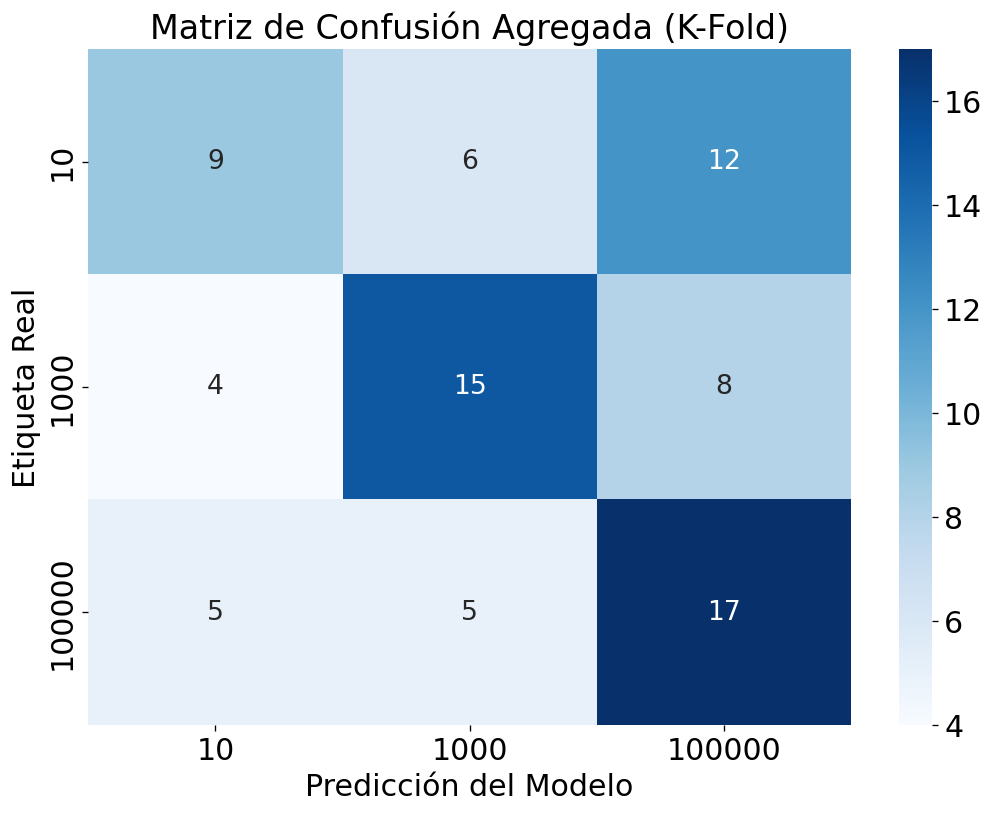


--- Reporte de Clasificación Agregado (Todos los Folds) ---
              precision    recall  f1-score   support

          10       0.50      0.33      0.40        27
        1000       0.58      0.56      0.57        27
      100000       0.46      0.63      0.53        27

    accuracy                           0.51        81
   macro avg       0.51      0.51      0.50        81
weighted avg       0.51      0.51      0.50        81

Generando Curva ROC Agregada (Todos los Folds)...


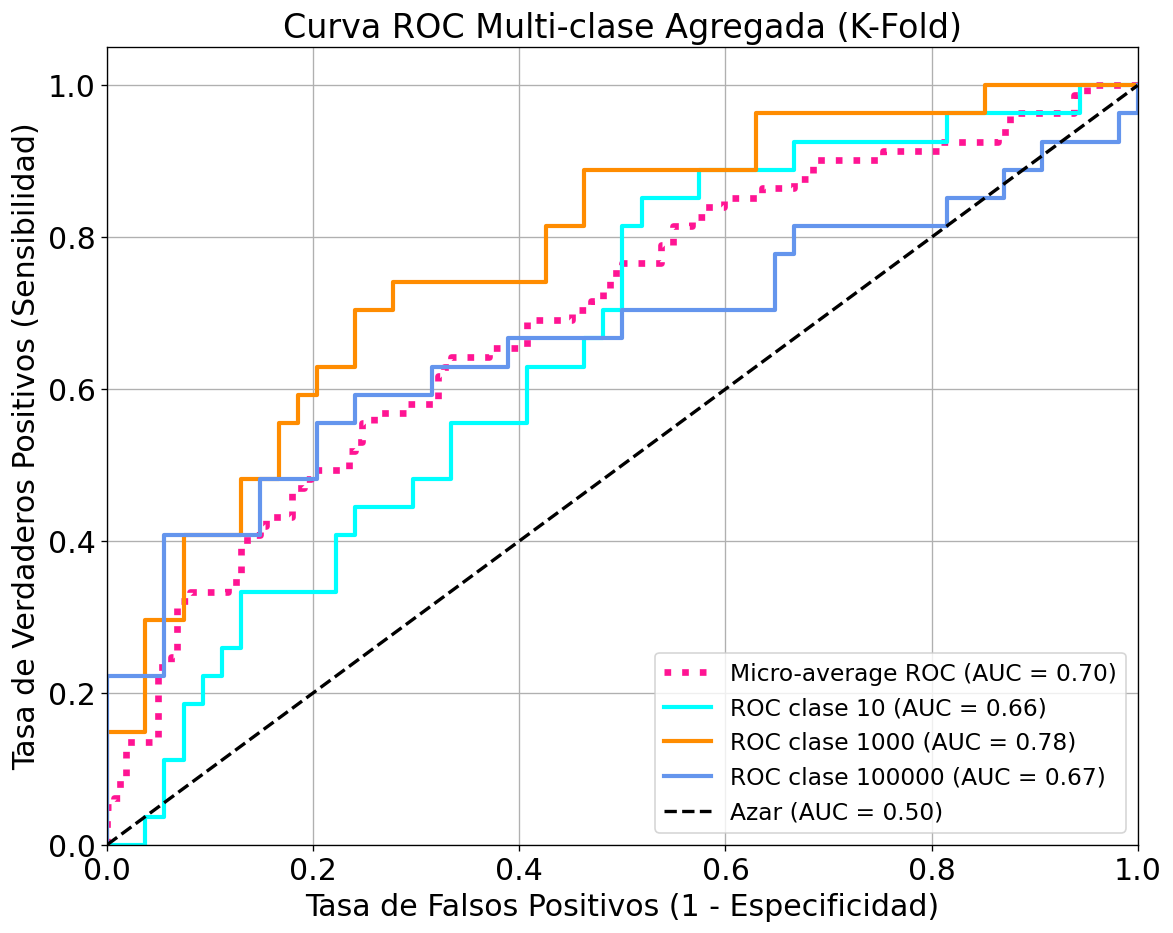

Generando curvas de aprendizaje (Loss vs. Épocas y Acc vs. Épocas)...


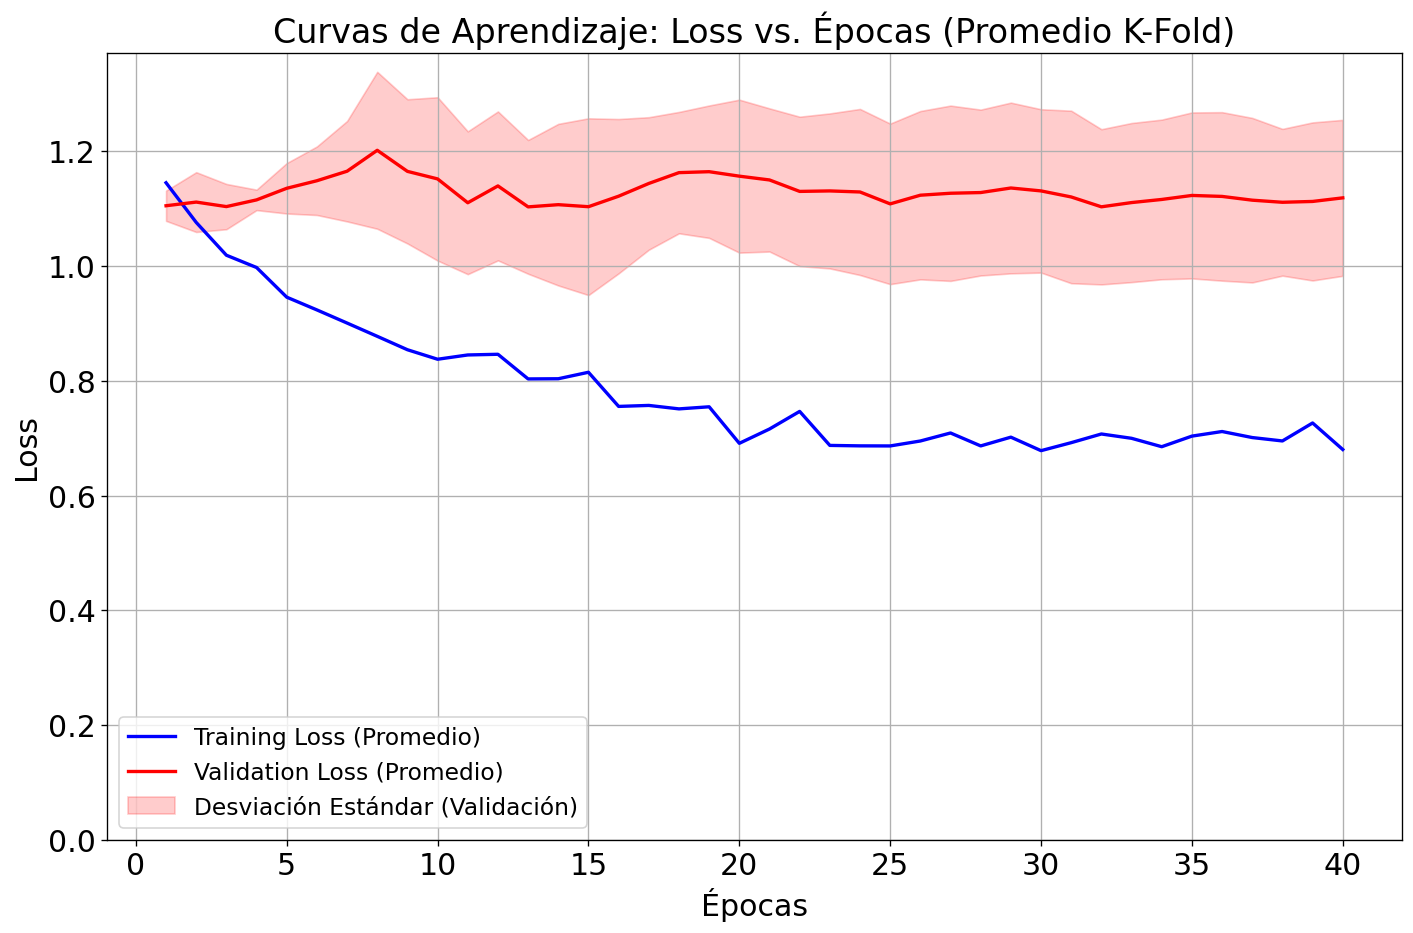

/tmp/ipython-input-89470602.py:415: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(epochs, mean_val_f1, 'o-', lw=2, label='Validation F1-Score (Promedio)', linestyle='--')


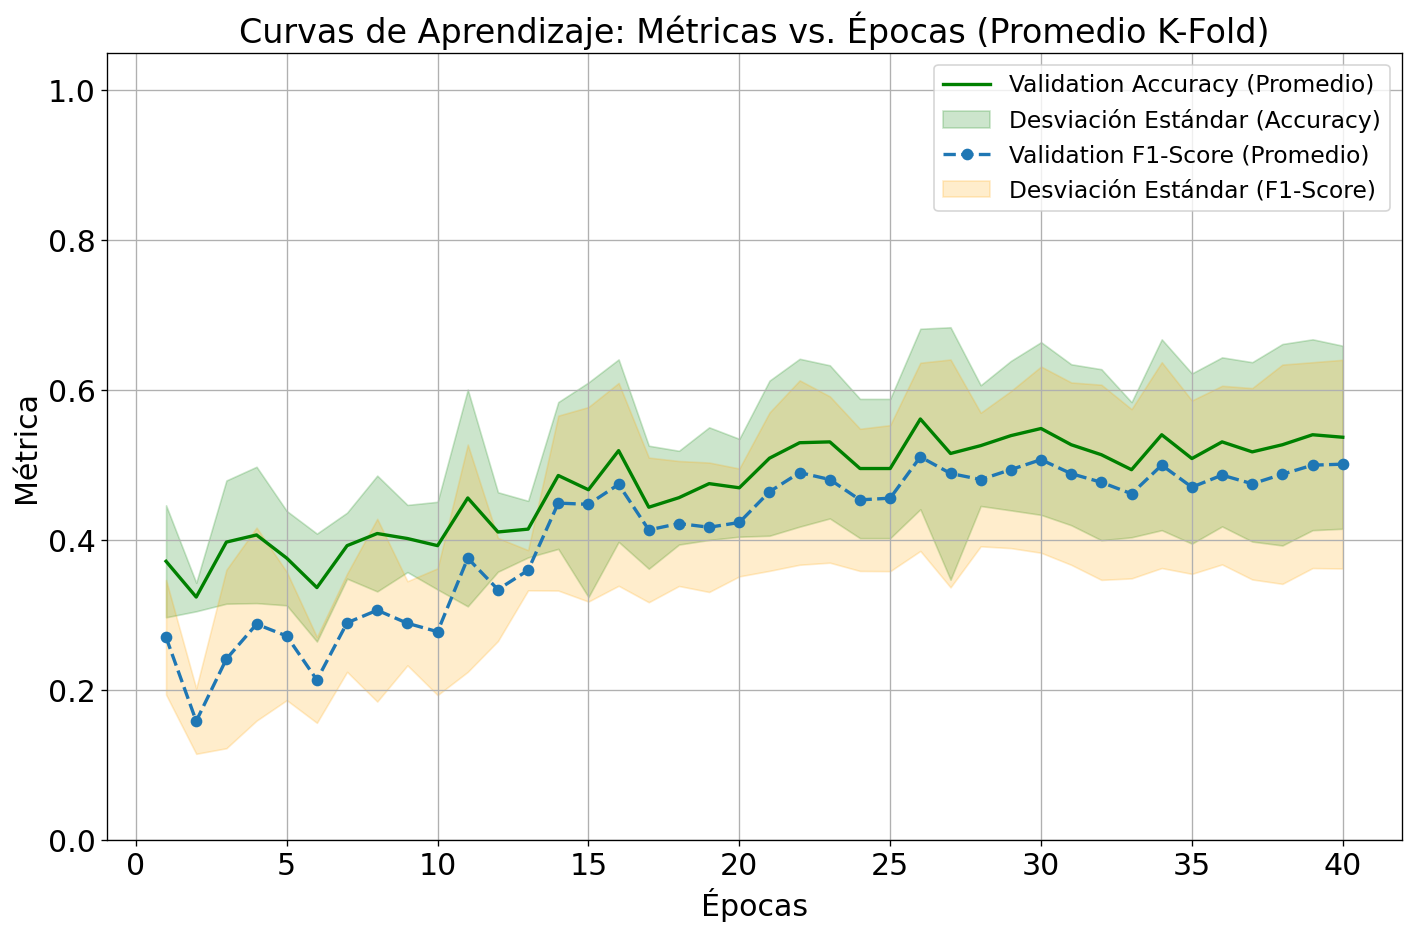


Proceso finalizado.
Usando dispositivo: cuda
Error: No se encontró el archivo '/content/drive/MyDrive/Tesis_Electronica/Fase_2_Visual_Transformers/labelsFrecuencias1.csv'.


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Tesis_Electronica/Fase_2_Visual_Transformers/labelsFrecuencias1.csv'

In [ ]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset
from PIL import Image
from torchvision import transforms
import timm
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset
from PIL import Image
from torchvision import transforms
import timm
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from torchmetrics.classification import (
    MulticlassAccuracy, MulticlassF1Score,
    MulticlassPrecision, MulticlassRecall
)
from torch.optim.lr_scheduler import ReduceLROnPlateau

# --------------------------------------------------------------------
# CONFIGURACIÓN GLOBAL DE GRÁFICOS (TAMAÑOS GRANDES PARA TESIS / PPT)
# --------------------------------------------------------------------
plt.rcParams.update({
    "figure.dpi": 120,        # resolución en notebook
    "savefig.dpi": 300,       # resolución al guardar
    "axes.titlesize": 22,     # tamaño títulos de los ejes
    "axes.labelsize": 18,     # etiquetas de los ejes
    "xtick.labelsize": 18,    # números eje X
    "ytick.labelsize": 18,    # números eje Y
    "legend.fontsize": 18,    # leyendas
    "font.size": 14           # tamaño base
})

# ========================================================================
# SECCIÓN 1: CONFIGURACIÓN
# ========================================================================
IMAGE_DIR = r'/content/drive/MyDrive/ISIS3002_-_Tesis_Electronica/Enhanced_Batch_224'
CSV_PATH = r'/content/drive/MyDrive/ISIS3002_-_Tesis_Electronica/Fase_2_Visual_Transformers/labelsFrecuencias1.csv'

MODEL_NAME = 'mobilenetv3_small_100'
NUM_EPOCHS = 40
BATCH_SIZE = 16
LEARNING_RATE = 1e-4
WEIGHT_DECAY = 5e-4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo: {DEVICE}")

K_FOLDS = 5
RANDOM_STATE = 42

# ========================================================================
# SECCIÓN 2: PREPARACIÓN DE DATOS
# ========================================================================
try:
    df_labels = pd.read_csv(CSV_PATH)
    class_names = sorted(df_labels.iloc[:, 1].unique())
    num_classes = len(class_names)
    print(f"Detectadas {num_classes} clases: {class_names}")
    print(f"Conteo de muestras por clase:\n{df_labels.iloc[:, 1].value_counts()}")
    class_to_idx = {class_name: i for i, class_name in enumerate(class_names)}
    idx_to_class = {i: class_name for i, class_name in enumerate(class_names)}
except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{CSV_PATH}'.")
    raise


class VoltageDataset(Dataset):
    def __init__(self, csv_path, image_dir, class_to_idx, transform=None):
        self.dataframe = pd.read_csv(csv_path)
        self.image_dir = image_dir
        self.transform = transform
        self.class_to_idx = class_to_idx
        self.label_column_name = self.dataframe.columns[1]

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        base_name = self.dataframe.iloc[idx, 0]
        base_name_without_ext = os.path.splitext(base_name)[0]
        img_name = os.path.join(self.image_dir, f"{base_name_without_ext}.png")

        try:
            image = Image.open(img_name).convert("L")  # escala de grises
        except FileNotFoundError:
            print(f"Error: No se pudo encontrar la imagen {img_name}")
            # fallback seguro, pero idealmente revisar rutas si esto aparece
            return torch.empty(1, 224, 224), torch.tensor(0, dtype=torch.long)

        label_value = self.dataframe.iloc[idx][self.label_column_name]
        label_idx = self.class_to_idx[label_value]

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label_idx, dtype=torch.long)


class AddGaussianNoise(object):
    def __init__(self, mean=0., std=0.01):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        noise = torch.randn(tensor.size()) * self.std + self.mean
        noisy_tensor = tensor + noise
        noisy_tensor = torch.clamp(noisy_tensor, 0., 1.)
        return noisy_tensor

    def __repr__(self):
        return self.__class__.__name__ + f'(mean={self.mean}, std={self.std})'


# Data Augmentation (suavizado)
data_transform = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.RandomCrop(224, padding=10, padding_mode='reflect'),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.1, contrast=0.1),
        transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
        transforms.ToTensor(),
        AddGaussianNoise(mean=0., std=0.005),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]),
}

# ========================================================================
# SECCIÓN 3: DEFINICIÓN DEL MODELO (MobileNetV3)
# ========================================================================
def create_mobilenet_classifier(model_name, num_classes, pretrained=True):
    """
    Crea un modelo MobileNetV3 adaptado para 1 canal de entrada y con Dropout.
    """
    model = timm.create_model(model_name, pretrained=pretrained)

    # Adaptar conv_stem (primera capa) para 1 canal (escala de grises)
    conv_stem_weights = model.conv_stem.weight.data
    model.conv_stem.in_channels = 1
    model.conv_stem.weight.data = conv_stem_weights.mean(dim=1, keepdim=True)

    # Adaptar el clasificador final y añadir Dropout
    num_features = model.classifier.in_features
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.5, inplace=True),
        nn.Linear(num_features, num_classes)
    )
    return model

# ========================================================================
# SECCIÓN 4: BUCLE DE ENTRENAMIENTO
# ========================================================================
def train_model(model, train_loader, val_loader, criterion, optimizer,
                scheduler, num_epochs, num_classes, model_save_path):
    best_val_loss = float('inf')
    metrics = {
        'acc': MulticlassAccuracy(num_classes=num_classes, average='macro').to(DEVICE),
        'pre': MulticlassPrecision(num_classes=num_classes, average='macro').to(DEVICE),
        'rec': MulticlassRecall(num_classes=num_classes, average='macro').to(DEVICE),
        'f1': MulticlassF1Score(num_classes=num_classes, average='macro').to(DEVICE)
    }
    history = {'train_loss': [], 'val_loss': [], 'val_acc': [], 'val_f1': []}

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        train_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", leave=False)
        for inputs, labels in train_tqdm:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            train_tqdm.set_postfix(loss=loss.item())

        train_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(train_loss)

        model.eval()
        val_loss = 0.0
        for metric in metrics.values():
            metric.reset()
        val_tqdm = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]", leave=False)
        with torch.no_grad():
            for inputs, labels in val_tqdm:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                for metric in metrics.values():
                    metric.update(outputs, labels)

        val_loss /= len(val_loader.dataset)
        val_acc = metrics['acc'].compute()
        val_pre = metrics['pre'].compute()
        val_rec = metrics['rec'].compute()
        val_f1 = metrics['f1'].compute()

        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc.item())
        history['val_f1'].append(val_f1.item())

        if (epoch + 1) % 10 == 0 or epoch == num_epochs - 1:
            print(f"Epoch {epoch+1}/{num_epochs} -> Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
            print(f"  Metrics -> Acc: {val_acc:.4f} | Precision: {val_pre:.4f} | Recall: {val_rec:.4f} | F1: {val_f1:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), model_save_path)

        scheduler.step(val_loss)

    print(f"Fold finalizado. Mejor Val Loss: {best_val_loss:.4f}")
    return history

# ========================================================================
# SECCIÓN 6: EVALUACIÓN (MODIFICADA PARA K-FOLD)
# ========================================================================
def evaluate_fold(model, dataloader, device, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    all_scores = []
    n_classes = len(class_names)

    acc_metric = MulticlassAccuracy(num_classes=n_classes, average='macro').to(device)
    pre_metric = MulticlassPrecision(num_classes=n_classes, average='macro').to(device)
    rec_metric = MulticlassRecall(num_classes=n_classes, average='macro').to(device)
    f1_metric  = MulticlassF1Score(num_classes=n_classes, average='macro').to(device)

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            scores = torch.nn.functional.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_scores.extend(scores.cpu().numpy())

            acc_metric.update(outputs, labels)
            pre_metric.update(outputs, labels)
            rec_metric.update(outputs, labels)
            f1_metric.update(outputs, labels)

    final_acc = acc_metric.compute().item()
    final_pre = pre_metric.compute().item()
    final_rec = rec_metric.compute().item()
    final_f1  = f1_metric.compute().item()

    print("\n--- Métricas (torchmetrics) del Fold ---")
    print(f"Accuracy:  {final_acc:.4f}")
    print(f"Precision: {final_pre:.4f}")
    print(f"Recall:    {final_rec:.4f}")
    print(f"F1 Score:  {final_f1:.4f}")

    return {
        'acc': final_acc, 'pre': final_pre, 'rec': final_rec, 'f1': final_f1,
        'labels': all_labels, 'preds': all_preds, 'scores': all_scores
    }

# ========================================================================
# SECCIÓN 7: GRÁFICOS (MATRIZ, ROC Y CURVAS DE APRENDIZAJE) - VERSION GRANDE
# ========================================================================
def plot_final_confusion_matrix(all_labels, all_preds, class_names):
    print("\n--- Matriz de Confusión Agregada (Todos los Folds) ---")
    cm = confusion_matrix(all_labels, all_preds)

    fig, ax = plt.subplots(figsize=(9, 7))
    sns.heatmap(
        cm,
        annot=True,
        fmt='g',
        cmap='Blues',
        xticklabels=[str(c) for c in class_names],
        yticklabels=[str(c) for c in class_names],
        annot_kws={"size": 16}  # tamaño de los números
    )
    ax.set_xlabel('Predicción del Modelo', fontsize=18)
    ax.set_ylabel('Etiqueta Real', fontsize=18)
    ax.set_title('Matriz de Confusión Agregada (K-Fold)', fontsize=20)
    plt.tight_layout()
    plt.show()

    print("\n--- Reporte de Clasificación Agregado (Todos los Folds) ---")
    report = classification_report(
        all_labels,
        all_preds,
        target_names=[str(c) for c in class_names],
        zero_division=0
    )
    print(report)


def plot_final_roc_curves(all_labels, all_scores, class_names):
    print("Generando Curva ROC Agregada (Todos los Folds)...")
    n_classes = len(class_names)
    all_labels_bin = label_binarize(all_labels, classes=range(n_classes))
    all_scores = np.array(all_scores)

    fpr, tpr, roc_auc = {}, {}, {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], all_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_bin.ravel(), all_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fig, ax = plt.subplots(figsize=(10, 8))

    ax.plot(
        fpr["micro"], tpr["micro"],
        label=f'Micro-average ROC (AUC = {roc_auc["micro"]:0.2f})',
        color='deeppink', linestyle=':', linewidth=4
    )

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
    for i, color in zip(range(n_classes), colors):
        ax.plot(
            fpr[i], tpr[i],
            color=color, lw=2.5,
            label=f'ROC clase {class_names[i]} (AUC = {roc_auc[i]:0.2f})'
        )

    ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Azar (AUC = 0.50)')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Tasa de Falsos Positivos (1 - Especificidad)', fontsize=18)
    ax.set_ylabel('Tasa de Verdaderos Positivos (Sensibilidad)', fontsize=18)
    ax.set_title('Curva ROC Multi-clase Agregada (K-Fold)', fontsize=20)
    ax.legend(loc="lower right", fontsize=14)
    ax.grid(True)

    plt.tight_layout()
    plt.show()


def plot_learning_curves(all_histories, num_epochs):
    print("Generando curvas de aprendizaje (Loss vs. Épocas y Acc vs. Épocas)...")

    train_loss_matrix = np.array([h['train_loss'] for h in all_histories])
    val_loss_matrix   = np.array([h['val_loss']   for h in all_histories])
    val_acc_matrix    = np.array([h['val_acc']    for h in all_histories])
    val_f1_matrix     = np.array([h['val_f1']     for h in all_histories])

    mean_train_loss = np.mean(train_loss_matrix, axis=0)
    mean_val_loss   = np.mean(val_loss_matrix,   axis=0)
    std_val_loss    = np.std(val_loss_matrix,    axis=0)
    mean_val_acc    = np.mean(val_acc_matrix,    axis=0)
    std_val_acc     = np.std(val_acc_matrix,     axis=0)
    mean_val_f1     = np.mean(val_f1_matrix,     axis=0)
    std_val_f1      = np.std(val_f1_matrix,      axis=0)

    epochs = range(1, num_epochs + 1)

    # ---------- Loss ----------
    fig1, ax1 = plt.subplots(figsize=(12, 8))
    ax1.plot(epochs, mean_train_loss, 'b-', lw=2, label='Training Loss (Promedio)')
    ax1.plot(epochs, mean_val_loss,   'r-', lw=2, label='Validation Loss (Promedio)')
    ax1.fill_between(
        epochs,
        mean_val_loss - std_val_loss,
        mean_val_loss + std_val_loss,
        color='r', alpha=0.2,
        label='Desviación Estándar (Validación)'
    )

    ax1.set_title('Curvas de Aprendizaje: Loss vs. Épocas (Promedio K-Fold)', fontsize=20)
    ax1.set_xlabel('Épocas', fontsize=18)
    ax1.set_ylabel('Loss', fontsize=18)
    ax1.legend(fontsize=14)
    ax1.grid(True)
    ax1.set_ylim(bottom=0)

    plt.tight_layout()
    plt.show()

    # ---------- Accuracy & F1 ----------
    fig2, ax2 = plt.subplots(figsize=(12, 8))
    ax2.plot(epochs, mean_val_acc, 'g-', lw=2, label='Validation Accuracy (Promedio)')
    ax2.fill_between(
        epochs,
        mean_val_acc - std_val_acc,
        mean_val_acc + std_val_acc,
        color='g', alpha=0.2,
        label='Desviación Estándar (Accuracy)'
    )

    ax2.plot(epochs, mean_val_f1, 'o-', lw=2, label='Validation F1-Score (Promedio)', linestyle='--')
    ax2.fill_between(
        epochs,
        mean_val_f1 - std_val_f1,
        mean_val_f1 + std_val_f1,
        color='orange', alpha=0.2,
        label='Desviación Estándar (F1-Score)'
    )

    ax2.set_title('Curvas de Aprendizaje: Métricas vs. Épocas (Promedio K-Fold)', fontsize=20)
    ax2.set_xlabel('Épocas', fontsize=18)
    ax2.set_ylabel('Métrica', fontsize=18)
    ax2.legend(fontsize=14)
    ax2.grid(True)
    ax2.set_ylim(0.0, 1.05)

    plt.tight_layout()
    plt.show()

# ========================================================================
# SECCIÓN 8: EJECUCIÓN PRINCIPAL (K-FOLD)
# ========================================================================
if __name__ == "__main__":

    dataset_for_train = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['train']
    )
    dataset_for_val = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['val']
    )

    print("\n--- Transformaciones de Entrenamiento (MobileNet) ---")
    print(dataset_for_train.transform)
    print("----------------------------------------\n")

    kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=RANDOM_STATE)

    fold_metrics = {'acc': [], 'pre': [], 'rec': [], 'f1': []}
    all_folds_labels = []
    all_folds_preds = []
    all_folds_scores = []
    all_fold_histories = []

    print(f"Iniciando Cross-Validation de {K_FOLDS} folds...")
    print("=" * 70)

    for fold, (train_ids, val_ids) in enumerate(kfold.split(dataset_for_train)):
        print(f"\n======= FOLD {fold+1}/{K_FOLDS} =======")

        train_sub = Subset(dataset_for_train, train_ids)
        val_sub   = Subset(dataset_for_val,   val_ids)
        train_loader = DataLoader(
            train_sub, batch_size=BATCH_SIZE, shuffle=True,
            num_workers=2, pin_memory=True
        )
        val_loader = DataLoader(
            val_sub, batch_size=BATCH_SIZE, shuffle=False,
            num_workers=2, pin_memory=True
        )

        print(f"Datos del Fold: {len(train_sub)} para entrenamiento, {len(val_sub)} para validación.")

        model = create_mobilenet_classifier(
            MODEL_NAME, num_classes=num_classes, pretrained=True
        ).to(DEVICE)

        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.AdamW(
            model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY
        )
        scheduler = ReduceLROnPlateau(
            optimizer, mode='min', factor=0.1, patience=5
        )

        model_save_path = f'best_model_fold_{fold+1}.pth'

        print(f"Entrenando Fold {fold+1}...")
        fold_history = train_model(
            model, train_loader, val_loader,
            criterion, optimizer, scheduler,
            NUM_EPOCHS, num_classes, model_save_path
        )
        all_fold_histories.append(fold_history)

        print(f"\nEvaluando mejor modelo del Fold {fold+1}...")
        best_model = create_mobilenet_classifier(
            MODEL_NAME, num_classes=num_classes, pretrained=False
        ).to(DEVICE)
        best_model.load_state_dict(torch.load(model_save_path, map_location=DEVICE))

        fold_results = evaluate_fold(best_model, val_loader, DEVICE, class_names)

        fold_metrics['acc'].append(fold_results['acc'])
        fold_metrics['pre'].append(fold_results['pre'])
        fold_metrics['rec'].append(fold_results['rec'])
        fold_metrics['f1'].append(fold_results['f1'])

        all_folds_labels.extend(fold_results['labels'])
        all_folds_preds.extend(fold_results['preds'])
        all_folds_scores.extend(fold_results['scores'])

    print("\n" + "=" * 70)
    print("CROSS-VALIDATION COMPLETADA")
    print("=" * 70)

    print(f"\n--- Resumen de Métricas (Promedio de {K_FOLDS} Folds) ---")
    print(f"Accuracy:  {np.mean(fold_metrics['acc']):.4f} +/- {np.std(fold_metrics['acc']):.4f}")
    print(f"Precision: {np.mean(fold_metrics['pre']):.4f} +/- {np.std(fold_metrics['pre']):.4f}")
    print(f"Recall:    {np.mean(fold_metrics['rec']):.4f} +/- {np.std(fold_metrics['rec']):.4f}")
    print(f"F1 Score:  {np.mean(fold_metrics['f1']):.4f} +/- {np.std(fold_metrics['f1']):.4f}")

    plot_final_confusion_matrix(all_folds_labels, all_folds_preds, class_names)
    plot_final_roc_curves(all_folds_labels, all_folds_scores, class_names)
    plot_learning_curves(all_fold_histories, NUM_EPOCHS)

    print("\nProceso finalizado.")

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from torchmetrics.classification import MulticlassAccuracy, MulticlassF1Score, MulticlassPrecision, MulticlassRecall
from torch.optim.lr_scheduler import ReduceLROnPlateau

# ========================================================================
# SECCIÓN 1: CONFIGURACIÓN
# ========================================================================
IMAGE_DIR = r'/content/drive/MyDrive/Tesis_Electronica/Enhanced_Batch_224'
CSV_PATH = r'/content/drive/MyDrive/Tesis_Electronica/Fase_2_Visual_Transformers/labelsFrecuencias1.csv'
# --- CAMBIO: Usar un modelo más ligero ---
MODEL_NAME = 'mobilenetv3_small_100' # Estaba en 'resnet18'
NUM_EPOCHS = 40
BATCH_SIZE = 16
LEARNING_RATE = 1e-4
WEIGHT_DECAY = 5e-4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo: {DEVICE}")

K_FOLDS = 5
RANDOM_STATE = 42

# ========================================================================
# SECCIÓN 2: PREPARACIÓN DE DATOS
# ========================================================================
try:
    df_labels = pd.read_csv(CSV_PATH)
    class_names = sorted(df_labels.iloc[:, 1].unique())
    num_classes = len(class_names)
    print(f"Detectadas {num_classes} clases: {class_names}")
    print(f"Conteo de muestras por clase:\n{df_labels.iloc[:, 1].value_counts()}")
    class_to_idx = {class_name: i for i, class_name in enumerate(class_names)}
    idx_to_class = {i: class_name for i, class_name in enumerate(class_names)}
except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{CSV_PATH}'.")
    raise

class VoltageDataset(Dataset):
    def __init__(self, csv_path, image_dir, class_to_idx, transform=None):
        self.dataframe = pd.read_csv(csv_path)
        self.image_dir = image_dir
        self.transform = transform
        self.class_to_idx = class_to_idx
        self.label_column_name = self.dataframe.columns[1]

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        base_name = self.dataframe.iloc[idx, 0]
        base_name_without_ext = os.path.splitext(base_name)[0]
        img_name = os.path.join(self.image_dir, f"{base_name_without_ext}.png")

        try:
            image = Image.open(img_name).convert("L")
        except FileNotFoundError:
            print(f"Error: No se pudo encontrar la imagen {img_name}")
            return torch.empty(1, 224, 224), torch.tensor(0, dtype=torch.long)

        label_value = self.dataframe.iloc[idx][self.label_column_name]
        label_idx = self.class_to_idx[label_value]

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label_idx, dtype=torch.long)

class AddGaussianNoise(object):
    def __init__(self, mean=0., std=0.01):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        noise = torch.randn(tensor.size()) * self.std + self.mean
        noisy_tensor = tensor + noise
        noisy_tensor = torch.clamp(noisy_tensor, 0., 1.)
        return noisy_tensor

    def __repr__(self):
        return self.__class__.__name__ + f'(mean={self.mean}, std={self.std})'

# Data Augmentation (suavizado)
data_transform = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.RandomCrop(224, padding=10, padding_mode='reflect'),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.1, contrast=0.1),
        transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
        transforms.ToTensor(),
        AddGaussianNoise(mean=0., std=0.005),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]),
}

# ========================================================================
# SECCIÓN 3: DEFINICIÓN DEL MODELO (MobileNetV3)
# ========================================================================
def create_mobilenet_classifier(model_name, num_classes, pretrained=True):
    """
    Crea un modelo MobileNetV3 adaptado para 1 canal de entrada y con Dropout.
    """
    model = timm.create_model(model_name, pretrained=pretrained)

    # Adaptar conv_stem (primera capa) para 1 canal (escala de grises)
    # MobileNet usa 'conv_stem' en lugar de 'conv1'
    conv_stem_weights = model.conv_stem.weight.data
    model.conv_stem.in_channels = 1
    model.conv_stem.weight.data = conv_stem_weights.mean(dim=1, keepdim=True)

    # Adaptar el clasificador final y añadir Dropout
    # MobileNet usa 'classifier' en lugar de 'fc'
    num_features = model.classifier.in_features
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.5, inplace=True), # 50% de dropout
        nn.Linear(num_features, num_classes)
    )
    return model

# ========================================================================
# SECCIÓN 4: BUCLE DE ENTRENAMIENTO
# ========================================================================
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs, num_classes, model_save_path):
    best_val_loss = float('inf')
    metrics = {
        'acc': MulticlassAccuracy(num_classes=num_classes, average='macro').to(DEVICE),
        'pre': MulticlassPrecision(num_classes=num_classes, average='macro').to(DEVICE),
        'rec': MulticlassRecall(num_classes=num_classes, average='macro').to(DEVICE),
        'f1': MulticlassF1Score(num_classes=num_classes, average='macro').to(DEVICE)
    }
    history = {'train_loss': [], 'val_loss': [], 'val_acc': [], 'val_f1': []}

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        train_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", leave=False)
        for inputs, labels in train_tqdm:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            train_tqdm.set_postfix(loss=loss.item())

        train_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(train_loss)

        model.eval()
        val_loss = 0.0
        for metric in metrics.values(): metric.reset()
        val_tqdm = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]", leave=False)
        with torch.no_grad():
            for inputs, labels in val_tqdm:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                for metric in metrics.values(): metric.update(outputs, labels)

        val_loss /= len(val_loader.dataset)
        val_acc = metrics['acc'].compute()
        val_pre = metrics['pre'].compute()
        val_rec = metrics['rec'].compute()
        val_f1 = metrics['f1'].compute()

        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc.item())
        history['val_f1'].append(val_f1.item())

        if (epoch + 1) % 10 == 0 or epoch == num_epochs - 1:
            print(f"Epoch {epoch+1}/{num_epochs} -> Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
            print(f"  Metrics -> Acc: {val_acc:.4f} | Precision: {val_pre:.4f} | Recall: {val_rec:.4f} | F1: {val_f1:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), model_save_path)

        scheduler.step(val_loss)

    print(f"Fold finalizado. Mejor Val Loss: {best_val_loss:.4f}")
    return history

# ========================================================================
# SECCIÓN 6: EVALUACIÓN (MODIFICADA PARA K-FOLD)
# ========================================================================
def evaluate_fold(model, dataloader, device, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    all_scores = []
    n_classes = len(class_names)
    acc_metric = MulticlassAccuracy(num_classes=n_classes, average='macro').to(device)
    pre_metric = MulticlassPrecision(num_classes=n_classes, average='macro').to(device)
    rec_metric = MulticlassRecall(num_classes=n_classes, average='macro').to(device)
    f1_metric = MulticlassF1Score(num_classes=n_classes, average='macro').to(device)

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            scores = torch.nn.functional.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_scores.extend(scores.cpu().numpy())

            acc_metric.update(outputs, labels)
            pre_metric.update(outputs, labels)
            rec_metric.update(outputs, labels)
            f1_metric.update(outputs, labels)

    final_acc = acc_metric.compute().item()
    final_pre = pre_metric.compute().item()
    final_rec = rec_metric.compute().item()
    final_f1 = f1_metric.compute().item()

    print("\n--- Métricas (torchmetrics) del Fold ---")
    print(f"Accuracy: {final_acc:.4f}")
    print(f"Precision: {final_pre:.4f}")
    print(f"Recall: {final_rec:.4f}")
    print(f"F1 Score: {final_f1:.4f}")

    return {
        'acc': final_acc, 'pre': final_pre, 'rec': final_rec, 'f1': final_f1,
        'labels': all_labels, 'preds': all_preds, 'scores': all_scores
    }

# ========================================================================
# SECCIÓN 7: GRÁFICOS (MATRIZ, ROC Y CURVAS DE APRENDIZAJE)
# ========================================================================
def plot_final_confusion_matrix(all_labels, all_preds, class_names):
    print("\n--- Matriz de Confusión Agregada (Todos los Folds) ---")
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
                xticklabels=[str(c) for c in class_names], yticklabels=[str(c) for c in class_names])
    plt.xlabel('Predicción del Modelo')
    plt.ylabel('Etiqueta Real')
    plt.title('Matriz de Confusión Agregada (K-Fold)')
    plt.show()

    print("\n--- Reporte de Clasificación Agregado (Todos los Folds) ---")
    report = classification_report(all_labels, all_preds, target_names=[str(c) for c in class_names], zero_division=0)
    print(report)

def plot_final_roc_curves(all_labels, all_scores, class_names):
    print("Generando Curva ROC Agregada (Todos los Folds)...")
    n_classes = len(class_names)
    all_labels_bin = label_binarize(all_labels, classes=range(n_classes))
    all_scores = np.array(all_scores)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], all_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_bin.ravel(), all_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(10, 8))
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})',
             color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (AUC = 0.50)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
    plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
    plt.title('Curva ROC Multi-clase Agregada (K-Fold)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

def plot_learning_curves(all_histories, num_epochs):
    print("Generando curvas de aprendizaje (Loss vs. Épocas y Acc vs. Épocas)...")

    train_loss_matrix = np.array([h['train_loss'] for h in all_histories])
    val_loss_matrix = np.array([h['val_loss'] for h in all_histories])
    val_acc_matrix = np.array([h['val_acc'] for h in all_histories])
    val_f1_matrix = np.array([h['val_f1'] for h in all_histories])

    mean_train_loss = np.mean(train_loss_matrix, axis=0)
    mean_val_loss = np.mean(val_loss_matrix, axis=0)
    std_val_loss = np.std(val_loss_matrix, axis=0)
    mean_val_acc = np.mean(val_acc_matrix, axis=0)
    std_val_acc = np.std(val_acc_matrix, axis=0)
    mean_val_f1 = np.mean(val_f1_matrix, axis=0)
    std_val_f1 = np.std(val_f1_matrix, axis=0)

    epochs = range(1, num_epochs + 1)

    plt.figure(figsize=(12, 8))
    plt.plot(epochs, mean_train_loss, 'b-', label='Training Loss (Promedio)')
    plt.plot(epochs, mean_val_loss, 'r-', label='Validation Loss (Promedio)')
    plt.fill_between(epochs, mean_val_loss - std_val_loss, mean_val_loss + std_val_loss,
                     color='r', alpha=0.2, label='Desviación Estándar (Validación)')

    plt.title('Curvas de Aprendizaje: Loss vs. Épocas (Promedio K-Fold)')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.ylim(bottom=0)
    plt.show()

    # ---------- Accuracy & F1 ----------
    # plt.figure(figsize=(12, 8))
    # plt.plot(epochs, mean_val_acc, 'g-', label='Validation Accuracy (Promedio)')
    # plt.fill_between(epochs, mean_val_acc - std_val_acc, mean_val_acc + std_val_acc,
    #                  color='g', alpha=0.2, label='Desviación Estándar (Accuracy)')
    # plt.plot(epochs, mean_val_f1, 'o-', label='Validation F1-Score (Promedio)', linestyle='--')
    # plt.fill_between(epochs, mean_val_f1 - std_val_f1, mean_val_f1 + std_val_f1,
    #                  color='orange', alpha=0.2, label='Desviación Estándar (F1-Score)')

    # plt.title('Curvas de Aprendizaje: Métricas vs. Épocas (Promedio K-Fold)')
    # plt.xlabel('Épocas')
    # plt.ylabel('Métrica')
    # plt.legend()
    # plt.grid(True)
    # plt.ylim(0.0, 1.05)
    # plt.show()
    # ---------- Accuracy & F1 ----------
    fig2, ax2 = plt.subplots(figsize=(12, 8))
    ax2.plot(epochs, mean_val_acc, 'g-', lw=2, label='Validation Accuracy (Promedio)')
    ax2.fill_between(
        epochs,
        mean_val_acc - std_val_acc,
        mean_val_acc + std_val_acc,
        color='g', alpha=0.2,
        label='Desviación Estándar (Accuracy)'
    )

    ax2.plot(epochs, mean_val_f1, 'o-', lw=2, label='Validation F1-Score (Promedio)', linestyle='--')
    ax2.fill_between(
        epochs,
        mean_val_f1 - std_val_f1,
        mean_val_f1 + std_val_f1,
        color='orange', alpha=0.2,
        label='Desviación Estándar (F1-Score)'
    )

    ax2.set_title('Curvas de Aprendizaje: Métricas vs. Épocas (Promedio K-Fold)', fontsize=20)
    ax2.set_xlabel('Épocas', fontsize=18)
    ax2.set_ylabel('Métrica', fontsize=18)
    ax2.legend(fontsize=14)
    ax2.grid(True)
    ax2.set_ylim(0.0, 1.05)

    # <<< NUEVO: ticks cada 0.25 en Y >>>
    ax2.set_yticks(np.arange(0.0, 1.01, 0.25))

    plt.tight_layout()
    plt.show()

# ========================================================================
# SECCIÓN 8: EJECUCIÓN PRINCIPAL (K-FOLD)
# ========================================================================

if __name__ == "__main__":

    dataset_for_train = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['train']
    )
    dataset_for_val = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['val']
    )

    print("\n--- Transformaciones de Entrenamiento (MobileNet) ---")
    print(dataset_for_train.transform)
    print("----------------------------------------\n")

    kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=RANDOM_STATE)

    fold_metrics = {'acc': [], 'pre': [], 'rec': [], 'f1': []}
    all_folds_labels = []
    all_folds_preds = []
    all_folds_scores = []
    all_fold_histories = []

    print(f"Iniciando Cross-Validation de {K_FOLDS} folds...")
    print("="*70)

    for fold, (train_ids, val_ids) in enumerate(kfold.split(dataset_for_train)):
        print(f"\n======= FOLD {fold+1}/{K_FOLDS} =======")

        train_sub = Subset(dataset_for_train, train_ids)
        val_sub = Subset(dataset_for_val, val_ids)
        train_loader = DataLoader(train_sub, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
        val_loader = DataLoader(val_sub, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

        print(f"Datos del Fold: {len(train_sub)} para entrenamiento, {len(val_sub)} para validación.")

        # --- CAMBIO: Usar create_mobilenet_classifier ---
        model = create_mobilenet_classifier(MODEL_NAME, num_classes=num_classes, pretrained=True).to(DEVICE)

        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
        scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

        model_save_path = f'best_model_fold_{fold+1}.pth'

        print(f"Entrenando Fold {fold+1}...")
        fold_history = train_model(
            model, train_loader, val_loader,
            criterion, optimizer, scheduler,
            NUM_EPOCHS, num_classes, model_save_path
        )
        all_fold_histories.append(fold_history)

        print(f"\nEvaluando mejor modelo del Fold {fold+1}...")
        # --- CAMBIO: Usar create_mobilenet_classifier ---
        best_model = create_mobilenet_classifier(MODEL_NAME, num_classes=num_classes, pretrained=False).to(DEVICE)
        best_model.load_state_dict(torch.load(model_save_path))

        fold_results = evaluate_fold(best_model, val_loader, DEVICE, class_names)

        fold_metrics['acc'].append(fold_results['acc'])
        fold_metrics['pre'].append(fold_results['pre'])
        fold_metrics['rec'].append(fold_results['rec'])
        fold_metrics['f1'].append(fold_results['f1'])

        all_folds_labels.extend(fold_results['labels'])
        all_folds_preds.extend(fold_results['preds'])
        all_folds_scores.extend(fold_results['scores'])

    print("\n" + "="*70)
    print("CROSS-VALIDATION COMPLETADA")
    print("="*70)

    print(f"\n--- Resumen de Métricas (Promedio de {K_FOLDS} Folds) ---")
    print(f"Accuracy:  {np.mean(fold_metrics['acc']):.4f} +/- {np.std(fold_metrics['acc']):.4f}")
    print(f"Precision: {np.mean(fold_metrics['pre']):.4f} +/- {np.std(fold_metrics['pre']):.4f}")
    print(f"Recall:    {np.mean(fold_metrics['rec']):.4f} +/- {np.std(fold_metrics['rec']):.4f}")
    print(f"F1 Score:  {np.mean(fold_metrics['f1']):.4f} +/- {np.std(fold_metrics['f1']):.4f}")

    plot_final_confusion_matrix(all_folds_labels, all_folds_preds, class_names)
    plot_final_roc_curves(all_folds_labels, all_folds_scores, class_names)
    plot_learning_curves(all_fold_histories, NUM_EPOCHS)

    print("\nProceso finalizado.")

## MOBILENET

Usando dispositivo: cuda
Detectadas 3 clases: [np.int64(10), np.int64(1000), np.int64(100000)]
Conteo de muestras por clase:
Frecuencia
10        27
1000      27
100000    27
Name: count, dtype: int64
Nombres para visualización: ['10 Hz', '1 kHz', '100 kHz']

--- Transformaciones de Entrenamiento (MobileNet) ---
Compose(
    Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
    RandomCrop(size=(224, 224), padding=10)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    ColorJitter(brightness=(0.9, 1.1), contrast=(0.9, 1.1), saturation=None, hue=None)
    GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 1.0))
    ToTensor()
    AddGaussianNoise(mean=0.0, std=0.005)
    Normalize(mean=[0.5], std=[0.5])
)
----------------------------------------

Iniciando Cross-Validation de 5 folds...

======= FOLD 1/5 =======
Datos del Fold: 64 para entrenamiento, 17 para validación.
Entrenando Fold 1...


Epoch 10/40 -> Train Loss: 0.7209 | Val Loss: 1.0610
  Metrics -> Acc: 0.4381 | Precision: 0.3389 | Recall: 0.4381 | F1: 0.3754


Epoch 20/40 -> Train Loss: 0.5948 | Val Loss: 1.0133
  Metrics -> Acc: 0.6095 | Precision: 0.5714 | Recall: 0.6095 | F1: 0.5778


Epoch 30/40 -> Train Loss: 0.6359 | Val Loss: 1.0780
  Metrics -> Acc: 0.6095 | Precision: 0.5714 | Recall: 0.6095 | F1: 0.5778


Epoch 40/40 -> Train Loss: 0.6110 | Val Loss: 1.0740
  Metrics -> Acc: 0.6095 | Precision: 0.5714 | Recall: 0.6095 | F1: 0.5778
Fold finalizado. Mejor Val Loss: 0.9757

Evaluando mejor modelo del Fold 1...



--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.3429
Precision: 0.3889
Recall:    0.3429
F1 Score:  0.3415

======= FOLD 2/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 2...


Epoch 10/40 -> Train Loss: 0.8566 | Val Loss: 1.1255
  Metrics -> Acc: 0.3889 | Precision: 0.5333 | Recall: 0.3889 | F1: 0.3386


Epoch 20/40 -> Train Loss: 0.7728 | Val Loss: 1.0080
  Metrics -> Acc: 0.5000 | Precision: 0.5794 | Recall: 0.5000 | F1: 0.4833


Epoch 30/40 -> Train Loss: 0.8008 | Val Loss: 0.9982
  Metrics -> Acc: 0.5556 | Precision: 0.6111 | Recall: 0.5556 | F1: 0.5405


Epoch 40/40 -> Train Loss: 0.7955 | Val Loss: 1.0444
  Metrics -> Acc: 0.5000 | Precision: 0.5794 | Recall: 0.5000 | F1: 0.4833
Fold finalizado. Mejor Val Loss: 0.9512

Evaluando mejor modelo del Fold 2...



--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.4444
Precision: 0.5481
Recall:    0.4444
F1 Score:  0.4188

======= FOLD 3/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 3...


Epoch 10/40 -> Train Loss: 0.8742 | Val Loss: 1.1984
  Metrics -> Acc: 0.3889 | Precision: 0.2222 | Recall: 0.3889 | F1: 0.2824


Epoch 20/40 -> Train Loss: 0.6194 | Val Loss: 1.4540
  Metrics -> Acc: 0.4444 | Precision: 0.3273 | Recall: 0.4444 | F1: 0.3377


Epoch 30/40 -> Train Loss: 0.5656 | Val Loss: 0.7878
  Metrics -> Acc: 0.6825 | Precision: 0.8667 | Recall: 0.6825 | F1: 0.6944


Epoch 40/40 -> Train Loss: 0.5668 | Val Loss: 0.7512
  Metrics -> Acc: 0.6825 | Precision: 0.7222 | Recall: 0.6825 | F1: 0.6778
Fold finalizado. Mejor Val Loss: 0.7305

Evaluando mejor modelo del Fold 3...



--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.6270
Precision: 0.6852
Recall:    0.6270
F1 Score:  0.6333

======= FOLD 4/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 4...


Epoch 10/40 -> Train Loss: 0.8569 | Val Loss: 1.0238
  Metrics -> Acc: 0.3429 | Precision: 0.2667 | Recall: 0.3429 | F1: 0.2872


Epoch 20/40 -> Train Loss: 0.6510 | Val Loss: 0.9914
  Metrics -> Acc: 0.6952 | Precision: 0.7481 | Recall: 0.6952 | F1: 0.6349


Epoch 30/40 -> Train Loss: 0.3549 | Val Loss: 1.3602
  Metrics -> Acc: 0.4286 | Precision: 0.4545 | Recall: 0.4286 | F1: 0.3259


Epoch 40/40 -> Train Loss: 0.3325 | Val Loss: 1.2573
  Metrics -> Acc: 0.3452 | Precision: 0.3333 | Recall: 0.3452 | F1: 0.2872
Fold finalizado. Mejor Val Loss: 0.8635

Evaluando mejor modelo del Fold 4...



--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.5952
Precision: 0.8056
Recall:    0.5952
F1 Score:  0.5664

======= FOLD 5/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 5...


Epoch 10/40 -> Train Loss: 0.8088 | Val Loss: 1.1625
  Metrics -> Acc: 0.4476 | Precision: 0.5556 | Recall: 0.4476 | F1: 0.3333


Epoch 20/40 -> Train Loss: 0.8026 | Val Loss: 1.1795
  Metrics -> Acc: 0.4310 | Precision: 0.5556 | Recall: 0.4310 | F1: 0.3584


Epoch 30/40 -> Train Loss: 0.7904 | Val Loss: 1.1916
  Metrics -> Acc: 0.4310 | Precision: 0.5556 | Recall: 0.4310 | F1: 0.3584


Epoch 40/40 -> Train Loss: 0.7833 | Val Loss: 1.1342
  Metrics -> Acc: 0.4310 | Precision: 0.5667 | Recall: 0.4310 | F1: 0.3595
Fold finalizado. Mejor Val Loss: 1.0637

Evaluando mejor modelo del Fold 5...



--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.3333
Precision: 0.1458
Recall:    0.3333
F1 Score:  0.2029

CROSS-VALIDATION COMPLETADA

--- Resumen de Métricas (Promedio de 5 Folds) ---
Accuracy:  0.4686 +/- 0.1231
Precision: 0.5147 +/- 0.2309
Recall:    0.4686 +/- 0.1231
F1 Score:  0.4326 +/- 0.1546

--- Matriz de Confusión Agregada (Todos los Folds) ---


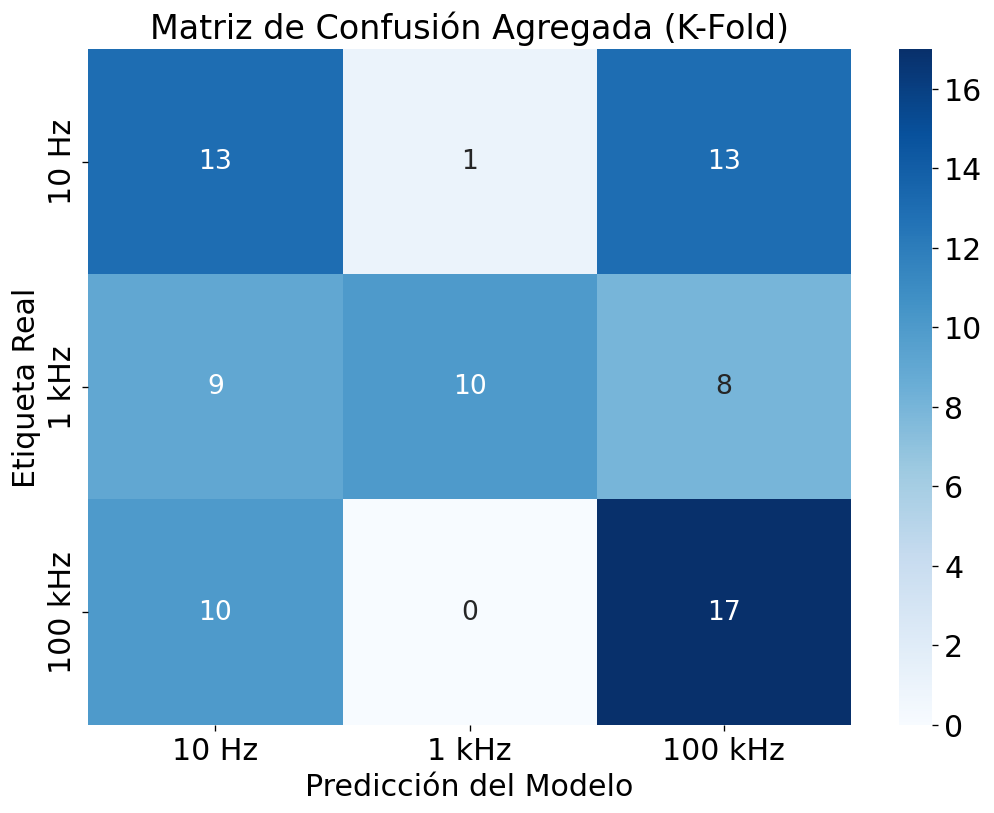


--- Reporte de Clasificación Agregado (Todos los Folds) ---
              precision    recall  f1-score   support

       10 Hz       0.41      0.48      0.44        27
       1 kHz       0.91      0.37      0.53        27
     100 kHz       0.45      0.63      0.52        27

    accuracy                           0.49        81
   macro avg       0.59      0.49      0.50        81
weighted avg       0.59      0.49      0.50        81

Generando Curva ROC Agregada (Todos los Folds)...


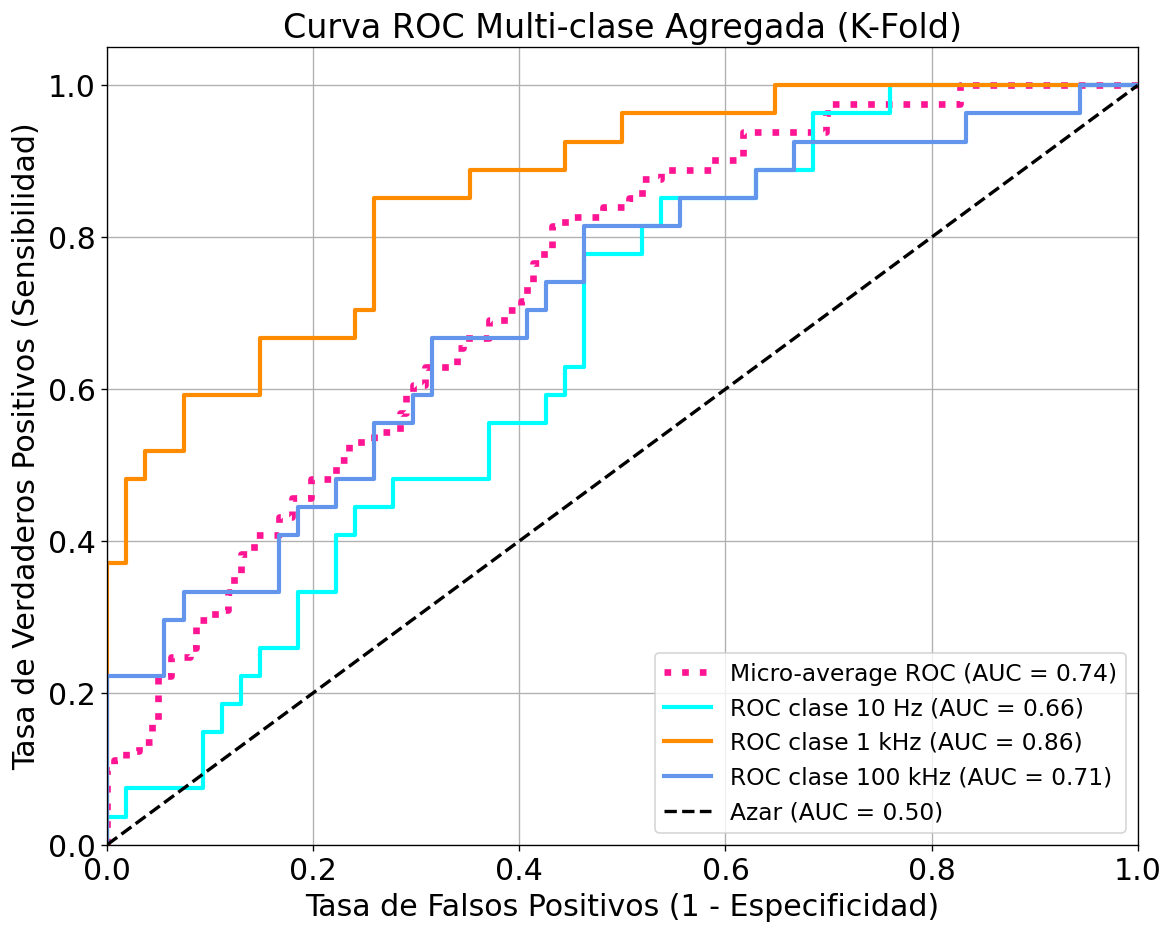

Generando curvas de aprendizaje (Loss vs. Épocas y Acc vs. Épocas)...


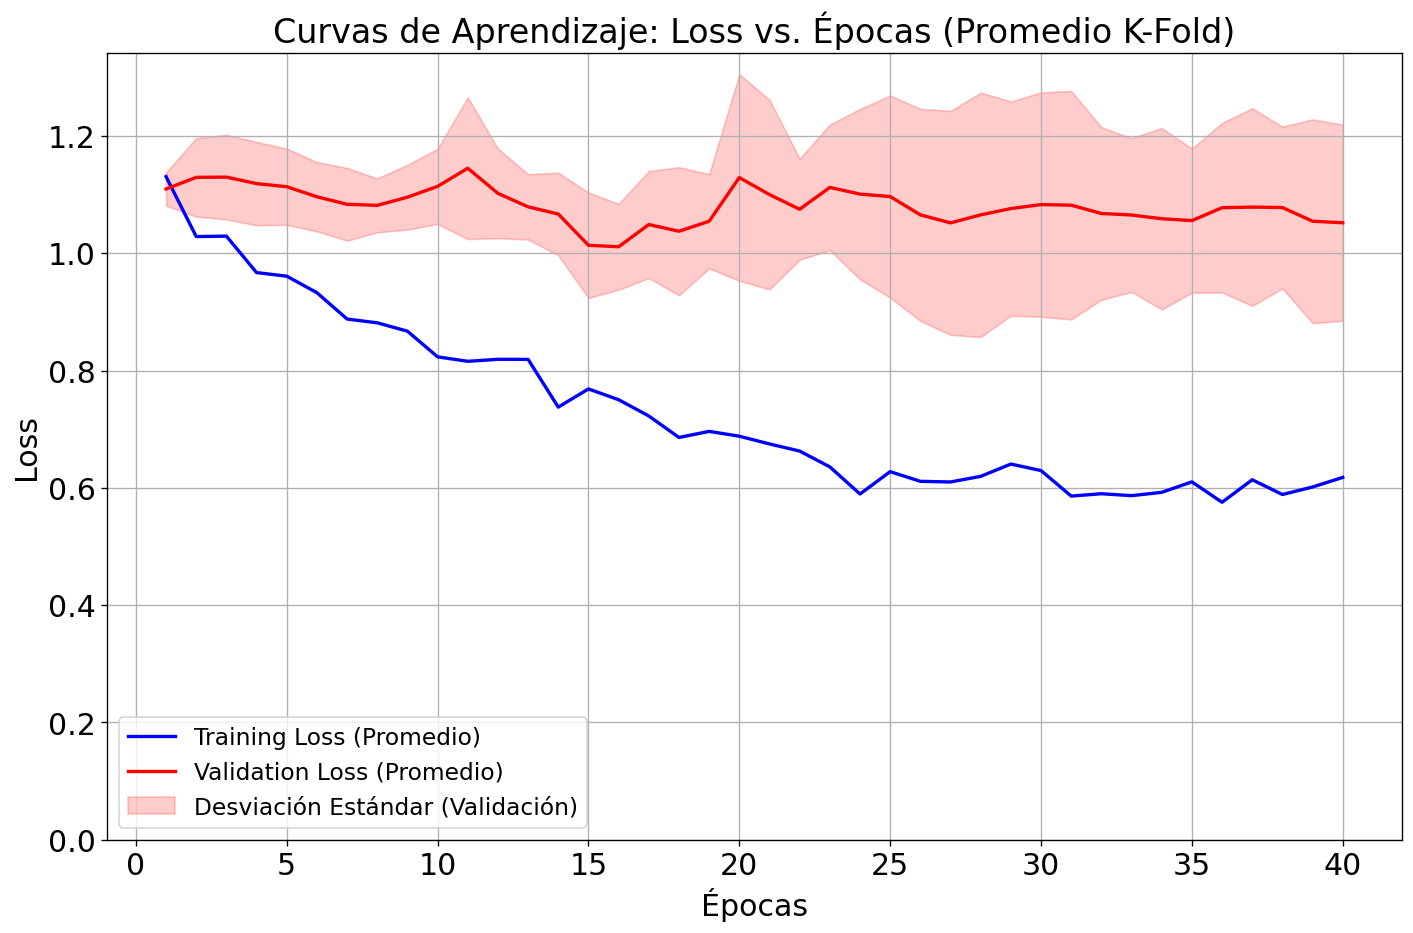

/tmp/ipython-input-3928954378.py:424: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(epochs, mean_val_f1, 'o-', lw=2, label='Validation F1-Score (Promedio)', linestyle='--')


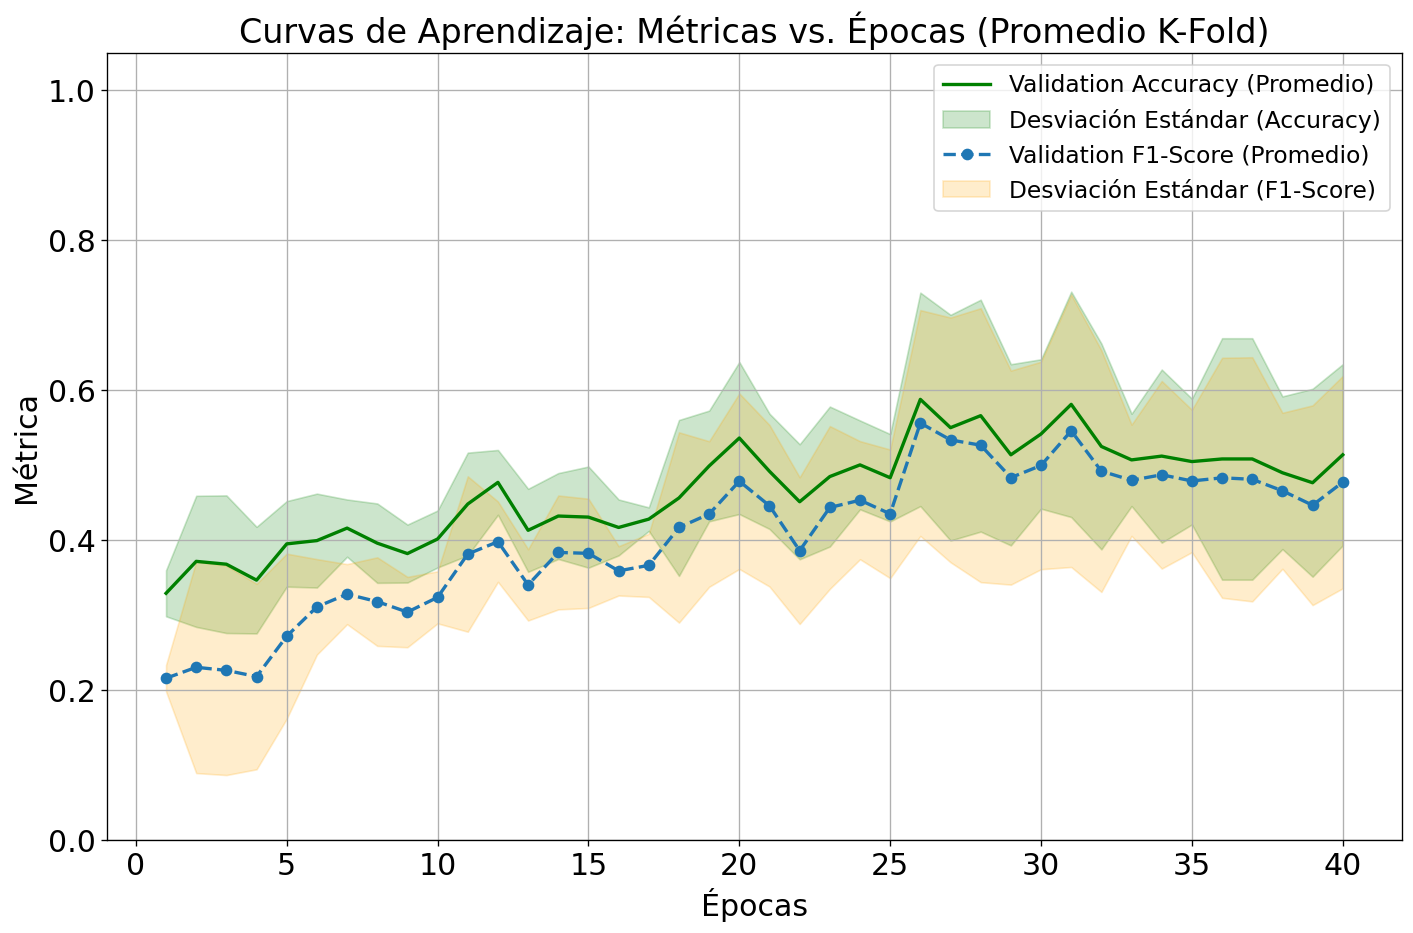


Proceso finalizado.


In [ ]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset
from PIL import Image
from torchvision import transforms
import timm
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from torchmetrics.classification import (
    MulticlassAccuracy, MulticlassF1Score,
    MulticlassPrecision, MulticlassRecall
)
from torch.optim.lr_scheduler import ReduceLROnPlateau

# --------------------------------------------------------------------
# CONFIGURACIÓN GLOBAL DE GRÁFICOS (TAMAÑOS GRANDES PARA TESIS / PPT)
# --------------------------------------------------------------------
plt.rcParams.update({
    "figure.dpi": 120,        # resolución en notebook
    "savefig.dpi": 300,       # resolución al guardar
    "axes.titlesize": 22,     # tamaño títulos de los ejes
    "axes.labelsize": 18,     # etiquetas de los ejes
    "xtick.labelsize": 18,    # números eje X
    "ytick.labelsize": 18,    # números eje Y
    "legend.fontsize": 18,    # leyendas
    "font.size": 14           # tamaño base
})

# ========================================================================
# SECCIÓN 1: CONFIGURACIÓN
# ========================================================================
IMAGE_DIR = r'/content/drive/MyDrive/ISIS3002_-_Tesis_Electronica/Enhanced_Batch_224'
CSV_PATH = r'/content/drive/MyDrive/ISIS3002_-_Tesis_Electronica/Fase_2_Visual_Transformers/labelsFrecuencias1.csv'

MODEL_NAME = 'mobilenetv3_small_100'
NUM_EPOCHS = 40
BATCH_SIZE = 16
LEARNING_RATE = 1e-4
WEIGHT_DECAY = 5e-4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo: {DEVICE}")

K_FOLDS = 5
RANDOM_STATE = 42

# ========================================================================
# SECCIÓN 2: PREPARACIÓN DE DATOS
# ========================================================================
try:
    df_labels = pd.read_csv(CSV_PATH)
    # nombres "crudos" tal como aparecen en el CSV
    class_names = sorted(df_labels.iloc[:, 1].unique())
    num_classes = len(class_names)
    print(f"Detectadas {num_classes} clases: {class_names}")
    print(f"Conteo de muestras por clase:\n{df_labels.iloc[:, 1].value_counts()}")

    class_to_idx = {class_name: i for i, class_name in enumerate(class_names)}
    idx_to_class = {i: class_name for i, class_name in enumerate(class_names)}

    # ---- Mapeo SOLO PARA VISUALIZACIÓN EN GRÁFICAS ----
    pretty_name_map = {
        '10': '10 Hz',
        '1000': '1 kHz',
        '100000': '100 kHz'
    }
    # Lista en el mismo orden que class_names, pero con etiquetas "bonitas"
    pretty_class_names = [
        pretty_name_map.get(str(c), str(c)) for c in class_names
    ]
    print(f"Nombres para visualización: {pretty_class_names}")

except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{CSV_PATH}'.")
    raise


class VoltageDataset(Dataset):
    def __init__(self, csv_path, image_dir, class_to_idx, transform=None):
        self.dataframe = pd.read_csv(csv_path)
        self.image_dir = image_dir
        self.transform = transform
        self.class_to_idx = class_to_idx
        self.label_column_name = self.dataframe.columns[1]

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        base_name = self.dataframe.iloc[idx, 0]
        base_name_without_ext = os.path.splitext(base_name)[0]
        img_name = os.path.join(self.image_dir, f"{base_name_without_ext}.png")

        try:
            image = Image.open(img_name).convert("L")  # escala de grises
        except FileNotFoundError:
            print(f"Error: No se pudo encontrar la imagen {img_name}")
            # fallback seguro, pero idealmente revisar rutas si esto aparece
            return torch.empty(1, 224, 224), torch.tensor(0, dtype=torch.long)

        label_value = self.dataframe.iloc[idx][self.label_column_name]
        label_idx = self.class_to_idx[label_value]

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label_idx, dtype=torch.long)


class AddGaussianNoise(object):
    def __init__(self, mean=0., std=0.01):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        noise = torch.randn(tensor.size()) * self.std + self.mean
        noisy_tensor = tensor + noise
        noisy_tensor = torch.clamp(noisy_tensor, 0., 1.)
        return noisy_tensor

    def __repr__(self):
        return self.__class__.__name__ + f'(mean={self.mean}, std={self.std})'


# Data Augmentation (suavizado)
data_transform = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.RandomCrop(224, padding=10, padding_mode='reflect'),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.1, contrast=0.1),
        transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
        transforms.ToTensor(),
        AddGaussianNoise(mean=0., std=0.005),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]),
}

# ========================================================================
# SECCIÓN 3: DEFINICIÓN DEL MODELO (MobileNetV3)
# ========================================================================
def create_mobilenet_classifier(model_name, num_classes, pretrained=True):
    """
    Crea un modelo MobileNetV3 adaptado para 1 canal de entrada y con Dropout.
    """
    model = timm.create_model(model_name, pretrained=pretrained)

    # Adaptar conv_stem (primera capa) para 1 canal (escala de grises)
    conv_stem_weights = model.conv_stem.weight.data
    model.conv_stem.in_channels = 1
    model.conv_stem.weight.data = conv_stem_weights.mean(dim=1, keepdim=True)

    # Adaptar el clasificador final y añadir Dropout
    num_features = model.classifier.in_features
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.5, inplace=True),
        nn.Linear(num_features, num_classes)
    )
    return model

# ========================================================================
# SECCIÓN 4: BUCLE DE ENTRENAMIENTO
# ========================================================================
def train_model(model, train_loader, val_loader, criterion, optimizer,
                scheduler, num_epochs, num_classes, model_save_path):
    best_val_loss = float('inf')
    metrics = {
        'acc': MulticlassAccuracy(num_classes=num_classes, average='macro').to(DEVICE),
        'pre': MulticlassPrecision(num_classes=num_classes, average='macro').to(DEVICE),
        'rec': MulticlassRecall(num_classes=num_classes, average='macro').to(DEVICE),
        'f1': MulticlassF1Score(num_classes=num_classes, average='macro').to(DEVICE)
    }
    history = {'train_loss': [], 'val_loss': [], 'val_acc': [], 'val_f1': []}

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        train_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", leave=False)
        for inputs, labels in train_tqdm:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            train_tqdm.set_postfix(loss=loss.item())

        train_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(train_loss)

        model.eval()
        val_loss = 0.0
        for metric in metrics.values():
            metric.reset()
        val_tqdm = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]", leave=False)
        with torch.no_grad():
            for inputs, labels in val_tqdm:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                for metric in metrics.values():
                    metric.update(outputs, labels)

        val_loss /= len(val_loader.dataset)
        val_acc = metrics['acc'].compute()
        val_pre = metrics['pre'].compute()
        val_rec = metrics['rec'].compute()
        val_f1 = metrics['f1'].compute()

        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc.item())
        history['val_f1'].append(val_f1.item())

        if (epoch + 1) % 10 == 0 or epoch == num_epochs - 1:
            print(f"Epoch {epoch+1}/{num_epochs} -> Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
            print(f"  Metrics -> Acc: {val_acc:.4f} | Precision: {val_pre:.4f} | Recall: {val_rec:.4f} | F1: {val_f1:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), model_save_path)

        scheduler.step(val_loss)

    print(f"Fold finalizado. Mejor Val Loss: {best_val_loss:.4f}")
    return history

# ========================================================================
# SECCIÓN 6: EVALUACIÓN (MODIFICADA PARA K-FOLD)
# ========================================================================
def evaluate_fold(model, dataloader, device, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    all_scores = []
    n_classes = len(class_names)

    acc_metric = MulticlassAccuracy(num_classes=n_classes, average='macro').to(device)
    pre_metric = MulticlassPrecision(num_classes=n_classes, average='macro').to(device)
    rec_metric = MulticlassRecall(num_classes=n_classes, average='macro').to(device)
    f1_metric  = MulticlassF1Score(num_classes=n_classes, average='macro').to(device)

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            scores = torch.nn.functional.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_scores.extend(scores.cpu().numpy())

            acc_metric.update(outputs, labels)
            pre_metric.update(outputs, labels)
            rec_metric.update(outputs, labels)
            f1_metric.update(outputs, labels)

    final_acc = acc_metric.compute().item()
    final_pre = pre_metric.compute().item()
    final_rec = rec_metric.compute().item()
    final_f1  = f1_metric.compute().item()

    print("\n--- Métricas (torchmetrics) del Fold ---")
    print(f"Accuracy:  {final_acc:.4f}")
    print(f"Precision: {final_pre:.4f}")
    print(f"Recall:    {final_rec:.4f}")
    print(f"F1 Score:  {final_f1:.4f}")

    return {
        'acc': final_acc, 'pre': final_pre, 'rec': final_rec, 'f1': final_f1,
        'labels': all_labels, 'preds': all_preds, 'scores': all_scores
    }

# ========================================================================
# SECCIÓN 7: GRÁFICOS (MATRIZ, ROC Y CURVAS DE APRENDIZAJE)
# ========================================================================
def plot_final_confusion_matrix(all_labels, all_preds, display_names):
    """
    display_names: lista de nombres ya formateados (por ejemplo '10 Hz', '1 kHz', '100 kHz')
    """
    print("\n--- Matriz de Confusión Agregada (Todos los Folds) ---")
    cm = confusion_matrix(all_labels, all_preds)

    fig, ax = plt.subplots(figsize=(9, 7))
    sns.heatmap(
        cm,
        annot=True,
        fmt='g',
        cmap='Blues',
        xticklabels=[str(c) for c in display_names],
        yticklabels=[str(c) for c in display_names],
        annot_kws={"size": 16}
    )
    ax.set_xlabel('Predicción del Modelo', fontsize=18)
    ax.set_ylabel('Etiqueta Real', fontsize=18)
    ax.set_title('Matriz de Confusión Agregada (K-Fold)', fontsize=20)
    plt.tight_layout()
    plt.show()

    print("\n--- Reporte de Clasificación Agregado (Todos los Folds) ---")
    report = classification_report(
        all_labels,
        all_preds,
        target_names=[str(c) for c in display_names],
        zero_division=0
    )
    print(report)


def plot_final_roc_curves(all_labels, all_scores, display_names):
    """
    display_names: nombres formateados para las clases.
    """
    print("Generando Curva ROC Agregada (Todos los Folds)...")
    n_classes = len(display_names)
    all_labels_bin = label_binarize(all_labels, classes=range(n_classes))
    all_scores = np.array(all_scores)

    fpr, tpr, roc_auc = {}, {}, {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], all_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_bin.ravel(), all_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fig, ax = plt.subplots(figsize=(10, 8))

    ax.plot(
        fpr["micro"], tpr["micro"],
        label=f'Micro-average ROC (AUC = {roc_auc["micro"]:0.2f})',
        color='deeppink', linestyle=':', linewidth=4
    )

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
    for i, color in zip(range(n_classes), colors):
        ax.plot(
            fpr[i], tpr[i],
            color=color, lw=2.5,
            label=f'ROC clase {display_names[i]} (AUC = {roc_auc[i]:0.2f})'
        )

    ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Azar (AUC = 0.50)')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Tasa de Falsos Positivos (1 - Especificidad)', fontsize=18)
    ax.set_ylabel('Tasa de Verdaderos Positivos (Sensibilidad)', fontsize=18)
    ax.set_title('Curva ROC Multi-clase Agregada (K-Fold)', fontsize=20)
    ax.legend(loc="lower right", fontsize=14)
    ax.grid(True)

    plt.tight_layout()
    plt.show()


def plot_learning_curves(all_histories, num_epochs):
    print("Generando curvas de aprendizaje (Loss vs. Épocas y Acc vs. Épocas)...")

    train_loss_matrix = np.array([h['train_loss'] for h in all_histories])
    val_loss_matrix   = np.array([h['val_loss']   for h in all_histories])
    val_acc_matrix    = np.array([h['val_acc']    for h in all_histories])
    val_f1_matrix     = np.array([h['val_f1']     for h in all_histories])

    mean_train_loss = np.mean(train_loss_matrix, axis=0)
    mean_val_loss   = np.mean(val_loss_matrix,   axis=0)
    std_val_loss    = np.std(val_loss_matrix,    axis=0)
    mean_val_acc    = np.mean(val_acc_matrix,    axis=0)
    std_val_acc     = np.std(val_acc_matrix,     axis=0)
    mean_val_f1     = np.mean(val_f1_matrix,     axis=0)
    std_val_f1      = np.std(val_f1_matrix,      axis=0)

    epochs = range(1, num_epochs + 1)

    # ---------- Loss ----------
    fig1, ax1 = plt.subplots(figsize=(12, 8))
    ax1.plot(epochs, mean_train_loss, 'b-', lw=2, label='Training Loss (Promedio)')
    ax1.plot(epochs, mean_val_loss,   'r-', lw=2, label='Validation Loss (Promedio)')
    ax1.fill_between(
        epochs,
        mean_val_loss - std_val_loss,
        mean_val_loss + std_val_loss,
        color='r', alpha=0.2,
        label='Desviación Estándar (Validación)'
    )

    ax1.set_title('Curvas de Aprendizaje: Loss vs. Épocas (Promedio K-Fold)', fontsize=20)
    ax1.set_xlabel('Épocas', fontsize=18)
    ax1.set_ylabel('Loss', fontsize=18)
    ax1.legend(fontsize=14)
    ax1.grid(True)
    ax1.set_ylim(bottom=0)

    plt.tight_layout()
    plt.show()

    # ---------- Accuracy & F1 ----------
    fig2, ax2 = plt.subplots(figsize=(12, 8))
    ax2.plot(epochs, mean_val_acc, 'g-', lw=2, label='Validation Accuracy (Promedio)')
    ax2.fill_between(
        epochs,
        mean_val_acc - std_val_acc,
        mean_val_acc + std_val_acc,
        color='g', alpha=0.2,
        label='Desviación Estándar (Accuracy)'
    )

    ax2.plot(epochs, mean_val_f1, 'o-', lw=2, label='Validation F1-Score (Promedio)', linestyle='--')
    ax2.fill_between(
        epochs,
        mean_val_f1 - std_val_f1,
        mean_val_f1 + std_val_f1,
        color='orange', alpha=0.2,
        label='Desviación Estándar (F1-Score)'
    )

    ax2.set_title('Curvas de Aprendizaje: Métricas vs. Épocas (Promedio K-Fold)', fontsize=20)
    ax2.set_xlabel('Épocas', fontsize=18)
    ax2.set_ylabel('Métrica', fontsize=18)
    ax2.legend(fontsize=14)
    ax2.grid(True)
    ax2.set_ylim(0.0, 1.05)

    plt.tight_layout()
    plt.show()

# ========================================================================
# SECCIÓN 8: EJECUCIÓN PRINCIPAL (K-FOLD)
# ========================================================================
if __name__ == "__main__":

    dataset_for_train = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['train']
    )
    dataset_for_val = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['val']
    )

    print("\n--- Transformaciones de Entrenamiento (MobileNet) ---")
    print(dataset_for_train.transform)
    print("----------------------------------------\n")

    kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=RANDOM_STATE)

    fold_metrics = {'acc': [], 'pre': [], 'rec': [], 'f1': []}
    all_folds_labels = []
    all_folds_preds = []
    all_folds_scores = []
    all_fold_histories = []

    print(f"Iniciando Cross-Validation de {K_FOLDS} folds...")
    print("=" * 70)

    for fold, (train_ids, val_ids) in enumerate(kfold.split(dataset_for_train)):
        print(f"\n======= FOLD {fold+1}/{K_FOLDS} =======")

        train_sub = Subset(dataset_for_train, train_ids)
        val_sub   = Subset(dataset_for_val,   val_ids)
        train_loader = DataLoader(
            train_sub, batch_size=BATCH_SIZE, shuffle=True,
            num_workers=2, pin_memory=True
        )
        val_loader = DataLoader(
            val_sub, batch_size=BATCH_SIZE, shuffle=False,
            num_workers=2, pin_memory=True
        )

        print(f"Datos del Fold: {len(train_sub)} para entrenamiento, {len(val_sub)} para validación.")

        model = create_mobilenet_classifier(
            MODEL_NAME, num_classes=num_classes, pretrained=True
        ).to(DEVICE)

        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.AdamW(
            model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY
        )
        scheduler = ReduceLROnPlateau(
            optimizer, mode='min', factor=0.1, patience=5
        )

        model_save_path = f'best_model_fold_{fold+1}.pth'

        print(f"Entrenando Fold {fold+1}...")
        fold_history = train_model(
            model, train_loader, val_loader,
            criterion, optimizer, scheduler,
            NUM_EPOCHS, num_classes, model_save_path
        )
        all_fold_histories.append(fold_history)

        print(f"\nEvaluando mejor modelo del Fold {fold+1}...")
        best_model = create_mobilenet_classifier(
            MODEL_NAME, num_classes=num_classes, pretrained=False
        ).to(DEVICE)
        best_model.load_state_dict(torch.load(model_save_path, map_location=DEVICE))

        fold_results = evaluate_fold(best_model, val_loader, DEVICE, class_names)

        fold_metrics['acc'].append(fold_results['acc'])
        fold_metrics['pre'].append(fold_results['pre'])
        fold_metrics['rec'].append(fold_results['rec'])
        fold_metrics['f1'].append(fold_results['f1'])

        all_folds_labels.extend(fold_results['labels'])
        all_folds_preds.extend(fold_results['preds'])
        all_folds_scores.extend(fold_results['scores'])

    print("\n" + "=" * 70)
    print("CROSS-VALIDATION COMPLETADA")
    print("=" * 70)

    print(f"\n--- Resumen de Métricas (Promedio de {K_FOLDS} Folds) ---")
    print(f"Accuracy:  {np.mean(fold_metrics['acc']):.4f} +/- {np.std(fold_metrics['acc']):.4f}")
    print(f"Precision: {np.mean(fold_metrics['pre']):.4f} +/- {np.std(fold_metrics['pre']):.4f}")
    print(f"Recall:    {np.mean(fold_metrics['rec']):.4f} +/- {np.std(fold_metrics['rec']):.4f}")
    print(f"F1 Score:  {np.mean(fold_metrics['f1']):.4f} +/- {np.std(fold_metrics['f1']):.4f}")

    # Aquí usamos los nombres "bonitos" para las figuras
    plot_final_confusion_matrix(all_folds_labels, all_folds_preds, pretty_class_names)
    plot_final_roc_curves(all_folds_labels, all_folds_scores, pretty_class_names)
    plot_learning_curves(all_fold_histories, NUM_EPOCHS)

    print("\nProceso finalizado.")


## ResNet18

Usando dispositivo: cuda
Detectadas 3 clases: [np.int64(10), np.int64(1000), np.int64(100000)]
Conteo de muestras por clase:
Frecuencia
10        27
1000      27
100000    27
Name: count, dtype: int64

--- Transformaciones de Entrenamiento (resnet18) ---
Compose(
    Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
    RandomCrop(size=(224, 224), padding=10)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    ColorJitter(brightness=(0.9, 1.1), contrast=(0.9, 1.1), saturation=None, hue=None)
    GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 1.0))
    ToTensor()
    AddGaussianNoise(mean=0.0, std=0.005)
    Normalize(mean=[0.5], std=[0.5])
)
----------------------------------------

Iniciando Cross-Validation de 5 folds...

======= FOLD 1/5 =======
Datos del Fold: 64 para entrenamiento, 17 para validación.
Entrenando Fold 1...


Epoch 10/40 -> Train Loss: 1.0166 | Val Loss: 1.0820
  Metrics -> Acc: 0.5238 | Precision: 0.3519 | Recall: 0.5238 | F1: 0.4159


Epoch 20/40 -> Train Loss: 0.9925 | Val Loss: 1.0157
  Metrics -> Acc: 0.5048 | Precision: 0.3519 | Recall: 0.5048 | F1: 0.4135


Epoch 30/40 -> Train Loss: 0.8670 | Val Loss: 1.0034
  Metrics -> Acc: 0.5238 | Precision: 0.6111 | Recall: 0.5238 | F1: 0.5490


Epoch 40/40 -> Train Loss: 0.8064 | Val Loss: 1.0027
  Metrics -> Acc: 0.5143 | Precision: 0.4821 | Recall: 0.5143 | F1: 0.4501
Fold finalizado. Mejor Val Loss: 0.9871

Evaluando mejor modelo del Fold 1...

--- Métricas (torchmetrics) del Fold ---
Accuracy: 0.5429
Precision: 0.6111
Recall: 0.5429
F1 Score: 0.5469

======= FOLD 2/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 2...


Epoch 10/40 -> Train Loss: 1.0485 | Val Loss: 1.0797
  Metrics -> Acc: 0.6250 | Precision: 0.7652 | Recall: 0.6250 | F1: 0.6242


Epoch 20/40 -> Train Loss: 1.0299 | Val Loss: 1.2085
  Metrics -> Acc: 0.4306 | Precision: 0.5655 | Recall: 0.4306 | F1: 0.3459


Epoch 30/40 -> Train Loss: 0.9854 | Val Loss: 1.1630
  Metrics -> Acc: 0.5278 | Precision: 0.5972 | Recall: 0.5278 | F1: 0.4548


Epoch 40/40 -> Train Loss: 0.9827 | Val Loss: 1.1695
  Metrics -> Acc: 0.4861 | Precision: 0.5741 | Recall: 0.4861 | F1: 0.3796
Fold finalizado. Mejor Val Loss: 1.0620

Evaluando mejor modelo del Fold 2...

--- Métricas (torchmetrics) del Fold ---
Accuracy: 0.5556
Precision: 0.6476
Recall: 0.5556
F1 Score: 0.5459

======= FOLD 3/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 3...


Epoch 10/40 -> Train Loss: 1.0423 | Val Loss: 1.0729
  Metrics -> Acc: 0.3333 | Precision: 0.1250 | Recall: 0.3333 | F1: 0.1818


Epoch 20/40 -> Train Loss: 0.9994 | Val Loss: 1.0804
  Metrics -> Acc: 0.3889 | Precision: 0.4000 | Recall: 0.3889 | F1: 0.2063


Epoch 30/40 -> Train Loss: 1.0121 | Val Loss: 1.0871
  Metrics -> Acc: 0.3889 | Precision: 0.4000 | Recall: 0.3889 | F1: 0.2063


Epoch 40/40 -> Train Loss: 1.0125 | Val Loss: 1.0758
  Metrics -> Acc: 0.2222 | Precision: 0.3611 | Recall: 0.2222 | F1: 0.2111
Fold finalizado. Mejor Val Loss: 1.0642

Evaluando mejor modelo del Fold 3...

--- Métricas (torchmetrics) del Fold ---
Accuracy: 0.3810
Precision: 0.4762
Recall: 0.3810
F1 Score: 0.2833

======= FOLD 4/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 4...


Epoch 10/40 -> Train Loss: 1.0192 | Val Loss: 1.0988
  Metrics -> Acc: 0.3452 | Precision: 0.2500 | Recall: 0.3452 | F1: 0.2462


Epoch 20/40 -> Train Loss: 1.0469 | Val Loss: 1.0882
  Metrics -> Acc: 0.4119 | Precision: 0.5167 | Recall: 0.4119 | F1: 0.3651


Epoch 30/40 -> Train Loss: 0.9981 | Val Loss: 1.0807
  Metrics -> Acc: 0.3452 | Precision: 0.4167 | Recall: 0.3452 | F1: 0.2731


Epoch 40/40 -> Train Loss: 1.0770 | Val Loss: 1.0868
  Metrics -> Acc: 0.3952 | Precision: 0.5278 | Recall: 0.3952 | F1: 0.3805
Fold finalizado. Mejor Val Loss: 1.0711

Evaluando mejor modelo del Fold 4...

--- Métricas (torchmetrics) del Fold ---
Accuracy: 0.3810
Precision: 0.4615
Recall: 0.3810
F1 Score: 0.2685

======= FOLD 5/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 5...


Epoch 10/40 -> Train Loss: 1.0834 | Val Loss: 1.1213
  Metrics -> Acc: 0.3333 | Precision: 0.0833 | Recall: 0.3333 | F1: 0.1333


Epoch 20/40 -> Train Loss: 1.0584 | Val Loss: 1.1268
  Metrics -> Acc: 0.1143 | Precision: 0.3810 | Recall: 0.1143 | F1: 0.1389


Epoch 30/40 -> Train Loss: 1.0725 | Val Loss: 1.1321
  Metrics -> Acc: 0.1810 | Precision: 0.4286 | Recall: 0.1810 | F1: 0.1944


Epoch 40/40 -> Train Loss: 1.0232 | Val Loss: 1.1270
  Metrics -> Acc: 0.1810 | Precision: 0.4167 | Recall: 0.1810 | F1: 0.1859
Fold finalizado. Mejor Val Loss: 1.1114

Evaluando mejor modelo del Fold 5...

--- Métricas (torchmetrics) del Fold ---
Accuracy: 0.3333
Precision: 0.1042
Recall: 0.3333
F1 Score: 0.1587

CROSS-VALIDATION COMPLETADA

--- Resumen de Métricas (Promedio de 5 Folds) ---
Accuracy:  0.4387 +/- 0.0920
Precision: 0.4601 +/- 0.1923
Recall:    0.4387 +/- 0.0920
F1 Score:  0.3607 +/- 0.1576

--- Matriz de Confusión Agregada (Todos los Folds) ---


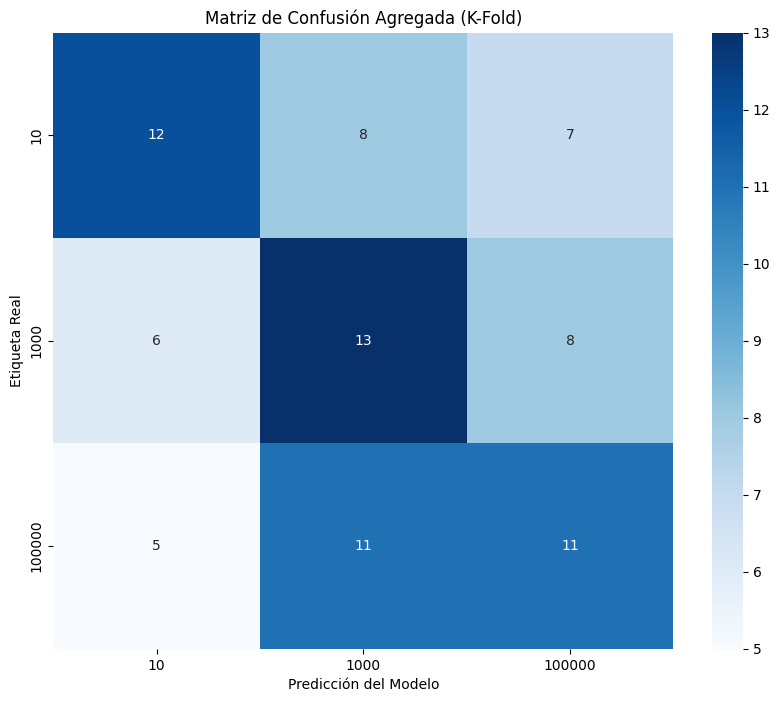


--- Reporte de Clasificación Agregado (Todos los Folds) ---
              precision    recall  f1-score   support

          10       0.52      0.44      0.48        27
        1000       0.41      0.48      0.44        27
      100000       0.42      0.41      0.42        27

    accuracy                           0.44        81
   macro avg       0.45      0.44      0.45        81
weighted avg       0.45      0.44      0.45        81

Generando Curva ROC Agregada (Todos los Folds)...


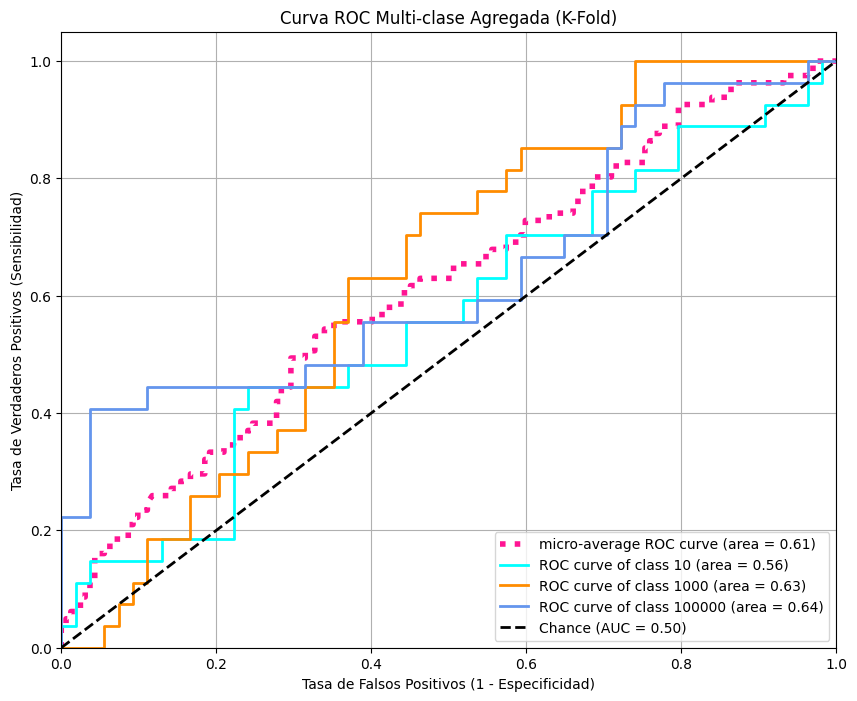

Generando curvas de aprendizaje (Loss vs. Épocas y Acc vs. Épocas)...


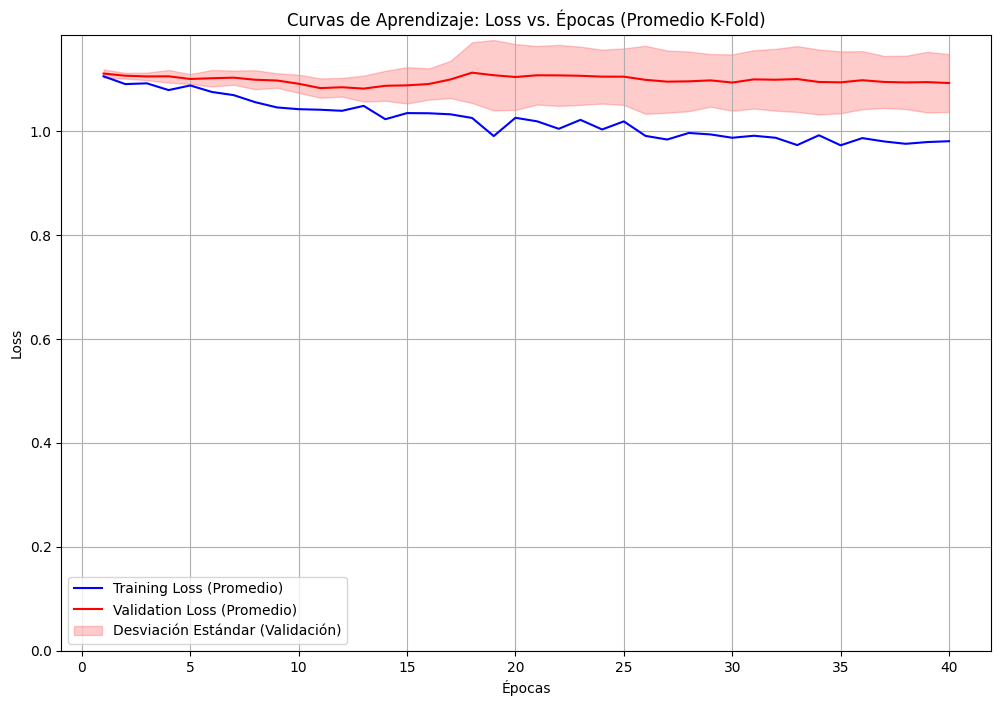

/tmp/ipython-input-2239729271.py:339: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs, mean_val_f1, 'o-', label='Validation F1-Score (Promedio)', linestyle='--')


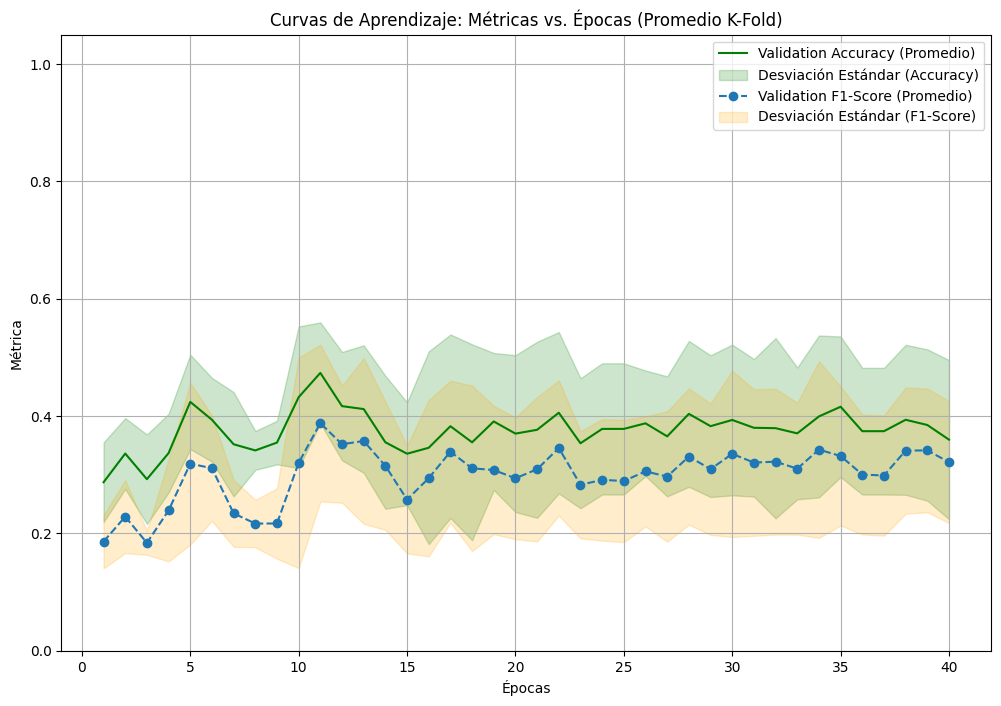


Proceso finalizado.


In [ ]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset
from PIL import Image
from torchvision import transforms
import timm
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from torchmetrics.classification import MulticlassAccuracy, MulticlassF1Score, MulticlassPrecision, MulticlassRecall
from torch.optim.lr_scheduler import ReduceLROnPlateau

# ========================================================================
# SECCIÓN 1: CONFIGURACIÓN
# ========================================================================
IMAGE_DIR = r'/content/drive/MyDrive/Tesis_Electronica/Enhanced_Batch_224'
# --- ¡CAMBIO IMPORTANTE! ---
# Apuntando al dataset de Frecuencias, que dio mejores resultados.
CSV_PATH = r'/content/drive/MyDrive/Tesis_Electronica/Fase_2_Visual_Transformers/labelsFrecuencias1.csv'
MODEL_NAME = 'resnet18'
NUM_EPOCHS = 40 # Mantenemos 40 épocas para controlar el overfitting
BATCH_SIZE = 16
LEARNING_RATE = 3e-4
WEIGHT_DECAY = 5e-4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo: {DEVICE}")

K_FOLDS = 5
RANDOM_STATE = 42

# ========================================================================
# SECCIÓN 2: PREPARACIÓN DE DATOS
# ========================================================================
try:
    df_labels = pd.read_csv(CSV_PATH)
    class_names = sorted(df_labels.iloc[:, 1].unique())
    num_classes = len(class_names)
    print(f"Detectadas {num_classes} clases: {class_names}")
    print(f"Conteo de muestras por clase:\n{df_labels.iloc[:, 1].value_counts()}")
    class_to_idx = {class_name: i for i, class_name in enumerate(class_names)}
    idx_to_class = {i: class_name for i, class_name in enumerate(class_names)}
except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{CSV_PATH}'.")
    raise

class VoltageDataset(Dataset):
    def __init__(self, csv_path, image_dir, class_to_idx, transform=None):
        self.dataframe = pd.read_csv(csv_path)
        self.image_dir = image_dir
        self.transform = transform
        self.class_to_idx = class_to_idx
        self.label_column_name = self.dataframe.columns[1]

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        base_name = self.dataframe.iloc[idx, 0]
        base_name_without_ext = os.path.splitext(base_name)[0]
        img_name = os.path.join(self.image_dir, f"{base_name_without_ext}.png")

        try:
            image = Image.open(img_name).convert("L")
        except FileNotFoundError:
            print(f"Error: No se pudo encontrar la imagen {img_name}")
            return torch.empty(1, 224, 224), torch.tensor(0, dtype=torch.long)

        label_value = self.dataframe.iloc[idx][self.label_column_name]
        label_idx = self.class_to_idx[label_value]

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label_idx, dtype=torch.long)

class AddGaussianNoise(object):
    def __init__(self, mean=0., std=0.01):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        noise = torch.randn(tensor.size()) * self.std + self.mean
        noisy_tensor = tensor + noise
        noisy_tensor = torch.clamp(noisy_tensor, 0., 1.)
        return noisy_tensor

    def __repr__(self):
        return self.__class__.__name__ + f'(mean={self.mean}, std={self.std})'

# Data Augmentation (suavizado)
data_transform = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.RandomCrop(224, padding=10, padding_mode='reflect'),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.1, contrast=0.1),
        transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
        transforms.ToTensor(),
        AddGaussianNoise(mean=0., std=0.005),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]),
}

# ========================================================================
# SECCIÓN 3: DEFINICIÓN DEL MODELO
# ========================================================================
def create_resnet_classifier(model_name, num_classes, pretrained=True):
    model = timm.create_model(model_name, pretrained=pretrained)

    # Adaptar para 1 canal (escala de grises)
    conv1_weights = model.conv1.weight.data
    model.conv1.in_channels = 1
    model.conv1.weight.data = conv1_weights.mean(dim=1, keepdim=True)

    # Añadir Dropout en el clasificador
    num_features = model.fc.in_features
    model.fc = nn.Sequential(
        nn.Dropout(p=0.6, inplace=True), # 50% de dropout
        nn.Linear(num_features, num_classes)
    )
    return model

# ========================================================================
# SECCIÓN 4: BUCLE DE ENTRENAMIENTO
# ========================================================================
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs, num_classes, model_save_path):
    best_val_loss = float('inf')
    metrics = {
        'acc': MulticlassAccuracy(num_classes=num_classes, average='macro').to(DEVICE),
        'pre': MulticlassPrecision(num_classes=num_classes, average='macro').to(DEVICE),
        'rec': MulticlassRecall(num_classes=num_classes, average='macro').to(DEVICE),
        'f1': MulticlassF1Score(num_classes=num_classes, average='macro').to(DEVICE)
    }
    history = {'train_loss': [], 'val_loss': [], 'val_acc': [], 'val_f1': []}

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        train_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", leave=False)
        for inputs, labels in train_tqdm:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            train_tqdm.set_postfix(loss=loss.item())

        train_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(train_loss)

        model.eval()
        val_loss = 0.0
        for metric in metrics.values(): metric.reset()
        val_tqdm = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]", leave=False)
        with torch.no_grad():
            for inputs, labels in val_tqdm:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                for metric in metrics.values(): metric.update(outputs, labels)

        val_loss /= len(val_loader.dataset)
        val_acc = metrics['acc'].compute()
        val_pre = metrics['pre'].compute()
        val_rec = metrics['rec'].compute()
        val_f1 = metrics['f1'].compute()

        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc.item())
        history['val_f1'].append(val_f1.item())

        if (epoch + 1) % 10 == 0 or epoch == num_epochs - 1:
            print(f"Epoch {epoch+1}/{num_epochs} -> Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
            print(f"  Metrics -> Acc: {val_acc:.4f} | Precision: {val_pre:.4f} | Recall: {val_rec:.4f} | F1: {val_f1:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), model_save_path)

        scheduler.step(val_loss)

    print(f"Fold finalizado. Mejor Val Loss: {best_val_loss:.4f}")
    return history

# ========================================================================
# SECCIÓN 6: EVALUACIÓN (MODIFICADA PARA K-FOLD)
# ========================================================================
def evaluate_fold(model, dataloader, device, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    all_scores = []
    n_classes = len(class_names)
    acc_metric = MulticlassAccuracy(num_classes=n_classes, average='macro').to(device)
    pre_metric = MulticlassPrecision(num_classes=n_classes, average='macro').to(device)
    rec_metric = MulticlassRecall(num_classes=n_classes, average='macro').to(device)
    f1_metric = MulticlassF1Score(num_classes=n_classes, average='macro').to(device)

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            scores = torch.nn.functional.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_scores.extend(scores.cpu().numpy())

            acc_metric.update(outputs, labels)
            pre_metric.update(outputs, labels)
            rec_metric.update(outputs, labels)
            f1_metric.update(outputs, labels)

    final_acc = acc_metric.compute().item()
    final_pre = pre_metric.compute().item()
    final_rec = rec_metric.compute().item()
    final_f1 = f1_metric.compute().item()

    print("\n--- Métricas (torchmetrics) del Fold ---")
    print(f"Accuracy: {final_acc:.4f}")
    print(f"Precision: {final_pre:.4f}")
    print(f"Recall: {final_rec:.4f}")
    print(f"F1 Score: {final_f1:.4f}")

    return {
        'acc': final_acc, 'pre': final_pre, 'rec': final_rec, 'f1': final_f1,
        'labels': all_labels, 'preds': all_preds, 'scores': all_scores
    }

# ========================================================================
# SECCIÓN 7: GRÁFICOS (MATRIZ, ROC Y CURVAS DE APRENDIZAJE)
# ========================================================================
def plot_final_confusion_matrix(all_labels, all_preds, class_names):
    print("\n--- Matriz de Confusión Agregada (Todos los Folds) ---")
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
                xticklabels=[str(c) for c in class_names], yticklabels=[str(c) for c in class_names])
    plt.xlabel('Predicción del Modelo')
    plt.ylabel('Etiqueta Real')
    plt.title('Matriz de Confusión Agregada (K-Fold)')
    plt.show()

    print("\n--- Reporte de Clasificación Agregado (Todos los Folds) ---")
    report = classification_report(all_labels, all_preds, target_names=[str(c) for c in class_names], zero_division=0)
    print(report)

def plot_final_roc_curves(all_labels, all_scores, class_names):
    print("Generando Curva ROC Agregada (Todos los Folds)...")
    n_classes = len(class_names)
    all_labels_bin = label_binarize(all_labels, classes=range(n_classes))
    all_scores = np.array(all_scores)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], all_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_bin.ravel(), all_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(10, 8))
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})',
             color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (AUC = 0.50)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
    plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
    plt.title('Curva ROC Multi-clase Agregada (K-Fold)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

def plot_learning_curves(all_histories, num_epochs):
    print("Generando curvas de aprendizaje (Loss vs. Épocas y Acc vs. Épocas)...")

    train_loss_matrix = np.array([h['train_loss'] for h in all_histories])
    val_loss_matrix = np.array([h['val_loss'] for h in all_histories])
    val_acc_matrix = np.array([h['val_acc'] for h in all_histories])
    val_f1_matrix = np.array([h['val_f1'] for h in all_histories])

    mean_train_loss = np.mean(train_loss_matrix, axis=0)
    mean_val_loss = np.mean(val_loss_matrix, axis=0)
    std_val_loss = np.std(val_loss_matrix, axis=0)
    mean_val_acc = np.mean(val_acc_matrix, axis=0)
    std_val_acc = np.std(val_acc_matrix, axis=0)
    mean_val_f1 = np.mean(val_f1_matrix, axis=0)
    std_val_f1 = np.std(val_f1_matrix, axis=0)

    epochs = range(1, num_epochs + 1)

    plt.figure(figsize=(12, 8))
    plt.plot(epochs, mean_train_loss, 'b-', label='Training Loss (Promedio)')
    plt.plot(epochs, mean_val_loss, 'r-', label='Validation Loss (Promedio)')
    plt.fill_between(epochs, mean_val_loss - std_val_loss, mean_val_loss + std_val_loss,
                     color='r', alpha=0.2, label='Desviación Estándar (Validación)')

    plt.title('Curvas de Aprendizaje: Loss vs. Épocas (Promedio K-Fold)')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.ylim(bottom=0)
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.plot(epochs, mean_val_acc, 'g-', label='Validation Accuracy (Promedio)')
    plt.fill_between(epochs, mean_val_acc - std_val_acc, mean_val_acc + std_val_acc,
                     color='g', alpha=0.2, label='Desviación Estándar (Accuracy)')
    plt.plot(epochs, mean_val_f1, 'o-', label='Validation F1-Score (Promedio)', linestyle='--')
    plt.fill_between(epochs, mean_val_f1 - std_val_f1, mean_val_f1 + std_val_f1,
                     color='orange', alpha=0.2, label='Desviación Estándar (F1-Score)')

    plt.title('Curvas de Aprendizaje: Métricas vs. Épocas (Promedio K-Fold)')
    plt.xlabel('Épocas')
    plt.ylabel('Métrica')
    plt.legend()
    plt.grid(True)
    plt.ylim(0.0, 1.05)
    plt.show()

# ========================================================================
# SECCIÓN 8: EJECUCIÓN PRINCIPAL (K-FOLD)
# ========================================================================

if __name__ == "__main__":

    dataset_for_train = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['train']
    )
    dataset_for_val = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['val']
    )

    print(f"\n--- Transformaciones de Entrenamiento ({MODEL_NAME}) ---")
    print(dataset_for_train.transform)
    print("----------------------------------------\n")

    kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=RANDOM_STATE)

    fold_metrics = {'acc': [], 'pre': [], 'rec': [], 'f1': []}
    all_folds_labels = []
    all_folds_preds = []
    all_folds_scores = []
    all_fold_histories = []

    print(f"Iniciando Cross-Validation de {K_FOLDS} folds...")
    print("="*70)

    for fold, (train_ids, val_ids) in enumerate(kfold.split(dataset_for_train)):
        print(f"\n======= FOLD {fold+1}/{K_FOLDS} =======")

        train_sub = Subset(dataset_for_train, train_ids)
        val_sub = Subset(dataset_for_val, val_ids)
        train_loader = DataLoader(train_sub, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
        val_loader = DataLoader(val_sub, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

        print(f"Datos del Fold: {len(train_sub)} para entrenamiento, {len(val_sub)} para validación.")

        # Re-crear modelo con Dropout
        model = create_resnet_classifier(MODEL_NAME, num_classes=num_classes, pretrained=True).to(DEVICE)

        criterion = nn.CrossEntropyLoss() # Usamos la loss normal, dataset está balanceado
        optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
        scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

        model_save_path = f'best_model_fold_{fold+1}.pth'

        print(f"Entrenando Fold {fold+1}...")
        fold_history = train_model(
            model, train_loader, val_loader,
            criterion, optimizer, scheduler,
            NUM_EPOCHS, num_classes, model_save_path
        )
        all_fold_histories.append(fold_history)

        print(f"\nEvaluando mejor modelo del Fold {fold+1}...")
        best_model = create_resnet_classifier(MODEL_NAME, num_classes=num_classes, pretrained=False).to(DEVICE)
        best_model.load_state_dict(torch.load(model_save_path))

        fold_results = evaluate_fold(best_model, val_loader, DEVICE, class_names)

        fold_metrics['acc'].append(fold_results['acc'])
        fold_metrics['pre'].append(fold_results['pre'])
        fold_metrics['rec'].append(fold_results['rec'])
        fold_metrics['f1'].append(fold_results['f1'])

        all_folds_labels.extend(fold_results['labels'])
        all_folds_preds.extend(fold_results['preds'])
        all_folds_scores.extend(fold_results['scores'])



    print("\n" + "="*70)
    print("CROSS-VALIDATION COMPLETADA")
    print("="*70)

    print(f"\n--- Resumen de Métricas (Promedio de {K_FOLDS} Folds) ---")
    print(f"Accuracy:  {np.mean(fold_metrics['acc']):.4f} +/- {np.std(fold_metrics['acc']):.4f}")
    print(f"Precision: {np.mean(fold_metrics['pre']):.4f} +/- {np.std(fold_metrics['pre']):.4f}")
    print(f"Recall:    {np.mean(fold_metrics['rec']):.4f} +/- {np.std(fold_metrics['rec']):.4f}")
    print(f"F1 Score:  {np.mean(fold_metrics['f1']):.4f} +/- {np.std(fold_metrics['f1']):.4f}")

    plot_final_confusion_matrix(all_folds_labels, all_folds_preds, class_names)
    plot_final_roc_curves(all_folds_labels, all_folds_scores, class_names)
    plot_learning_curves(all_fold_histories, NUM_EPOCHS)

    print("\nProceso finalizado.")

Usando dispositivo: cuda
Detectadas 3 clases: [np.int64(10), np.int64(1000), np.int64(100000)]
Conteo de muestras por clase:
Frecuencia
10        27
1000      27
100000    27
Name: count, dtype: int64

--- Transformaciones de Entrenamiento (MobileNet) ---
Compose(
    Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
    RandomCrop(size=(224, 224), padding=10)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    ColorJitter(brightness=(0.9, 1.1), contrast=(0.9, 1.1), saturation=None, hue=None)
    GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 1.0))
    ToTensor()
    AddGaussianNoise(mean=0.0, std=0.005)
    Normalize(mean=[0.5], std=[0.5])
)
----------------------------------------

Iniciando Cross-Validation de 5 folds...

======= FOLD 1/5 =======
Datos del Fold: 64 para entrenamiento, 17 para validación.
Entrenando Fold 1...


Epoch 10/40 -> Train Loss: 0.7674 | Val Loss: 0.9426
  Metrics -> Acc: 0.5333 | Precision: 0.5000 | Recall: 0.5333 | F1: 0.4722


Epoch 20/40 -> Train Loss: 0.4259 | Val Loss: 1.0873
  Metrics -> Acc: 0.5429 | Precision: 0.5556 | Recall: 0.5429 | F1: 0.5256


Epoch 30/40 -> Train Loss: 0.4206 | Val Loss: 1.1077
  Metrics -> Acc: 0.4952 | Precision: 0.4571 | Recall: 0.4952 | F1: 0.4667


Epoch 40/40 -> Train Loss: 0.4595 | Val Loss: 1.0960
  Metrics -> Acc: 0.4286 | Precision: 0.4111 | Recall: 0.4286 | F1: 0.4177
Fold finalizado. Mejor Val Loss: 0.8557

Evaluando mejor modelo del Fold 1...



--- Métricas (torchmetrics) del Fold ---
Accuracy: 0.6857
Precision: 0.7556
Recall: 0.6857
F1 Score: 0.7000

======= FOLD 2/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 2...


Epoch 10/40 -> Train Loss: 0.8833 | Val Loss: 1.3732
  Metrics -> Acc: 0.3333 | Precision: 0.1889 | Recall: 0.3333 | F1: 0.2315


Epoch 20/40 -> Train Loss: 0.7993 | Val Loss: 1.1900
  Metrics -> Acc: 0.3889 | Precision: 0.5370 | Recall: 0.3889 | F1: 0.3354


Epoch 30/40 -> Train Loss: 0.8191 | Val Loss: 1.2074
  Metrics -> Acc: 0.4444 | Precision: 0.5556 | Recall: 0.4444 | F1: 0.4167


Epoch 40/40 -> Train Loss: 0.8532 | Val Loss: 1.1665
  Metrics -> Acc: 0.3889 | Precision: 0.5370 | Recall: 0.3889 | F1: 0.3354
Fold finalizado. Mejor Val Loss: 1.0939

Evaluando mejor modelo del Fold 2...



--- Métricas (torchmetrics) del Fold ---
Accuracy: 0.3333
Precision: 0.1667
Recall: 0.3333
F1 Score: 0.2222

======= FOLD 3/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 3...


Epoch 10/40 -> Train Loss: 0.8888 | Val Loss: 1.0244
  Metrics -> Acc: 0.3810 | Precision: 0.5379 | Recall: 0.3810 | F1: 0.3354


Epoch 20/40 -> Train Loss: 0.8904 | Val Loss: 0.9090
  Metrics -> Acc: 0.7460 | Precision: 0.7429 | Recall: 0.7460 | F1: 0.6848


Epoch 30/40 -> Train Loss: 0.8717 | Val Loss: 0.9239
  Metrics -> Acc: 0.6349 | Precision: 0.6667 | Recall: 0.6349 | F1: 0.5572


Epoch 40/40 -> Train Loss: 0.8989 | Val Loss: 0.9621
  Metrics -> Acc: 0.7460 | Precision: 0.7429 | Recall: 0.7460 | F1: 0.6848
Fold finalizado. Mejor Val Loss: 0.8558

Evaluando mejor modelo del Fold 3...



--- Métricas (torchmetrics) del Fold ---
Accuracy: 0.6190
Precision: 0.7778
Recall: 0.6190
F1 Score: 0.6389

======= FOLD 4/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 4...


Epoch 10/40 -> Train Loss: 0.8445 | Val Loss: 0.9836
  Metrics -> Acc: 0.4095 | Precision: 0.3611 | Recall: 0.4095 | F1: 0.3387


Epoch 20/40 -> Train Loss: 0.7564 | Val Loss: 0.9528
  Metrics -> Acc: 0.5262 | Precision: 0.5111 | Recall: 0.5262 | F1: 0.5101


Epoch 30/40 -> Train Loss: 0.7002 | Val Loss: 0.9657
  Metrics -> Acc: 0.6095 | Precision: 0.5833 | Recall: 0.6095 | F1: 0.5697


Epoch 40/40 -> Train Loss: 0.7194 | Val Loss: 0.9626
  Metrics -> Acc: 0.6095 | Precision: 0.5833 | Recall: 0.6095 | F1: 0.5697
Fold finalizado. Mejor Val Loss: 0.9126

Evaluando mejor modelo del Fold 4...



--- Métricas (torchmetrics) del Fold ---
Accuracy: 0.5571
Precision: 0.5873
Recall: 0.5571
F1 Score: 0.5623

======= FOLD 5/5 =======
Datos del Fold: 65 para entrenamiento, 16 para validación.
Entrenando Fold 5...


Epoch 10/40 -> Train Loss: 0.7736 | Val Loss: 1.1952
  Metrics -> Acc: 0.4286 | Precision: 0.4286 | Recall: 0.4286 | F1: 0.2963


Epoch 20/40 -> Train Loss: 0.7685 | Val Loss: 1.1993
  Metrics -> Acc: 0.4476 | Precision: 0.5333 | Recall: 0.4476 | F1: 0.3405


Epoch 30/40 -> Train Loss: 0.6929 | Val Loss: 1.2685
  Metrics -> Acc: 0.2810 | Precision: 0.4643 | Recall: 0.2810 | F1: 0.2500


Epoch 40/40 -> Train Loss: 0.7618 | Val Loss: 1.2164
  Metrics -> Acc: 0.3286 | Precision: 0.3810 | Recall: 0.3286 | F1: 0.3222
Fold finalizado. Mejor Val Loss: 1.1135

Evaluando mejor modelo del Fold 5...

--- Métricas (torchmetrics) del Fold ---
Accuracy: 0.2976
Precision: 0.4167
Recall: 0.2976
F1 Score: 0.2083

CROSS-VALIDATION COMPLETADA

--- Resumen de Métricas (Promedio de 5 Folds) ---
Accuracy:  0.4986 +/- 0.1553
Precision: 0.5408 +/- 0.2280
Recall:    0.4986 +/- 0.1553
F1 Score:  0.4663 +/- 0.2096

--- Matriz de Confusión Agregada (Todos los Folds) ---


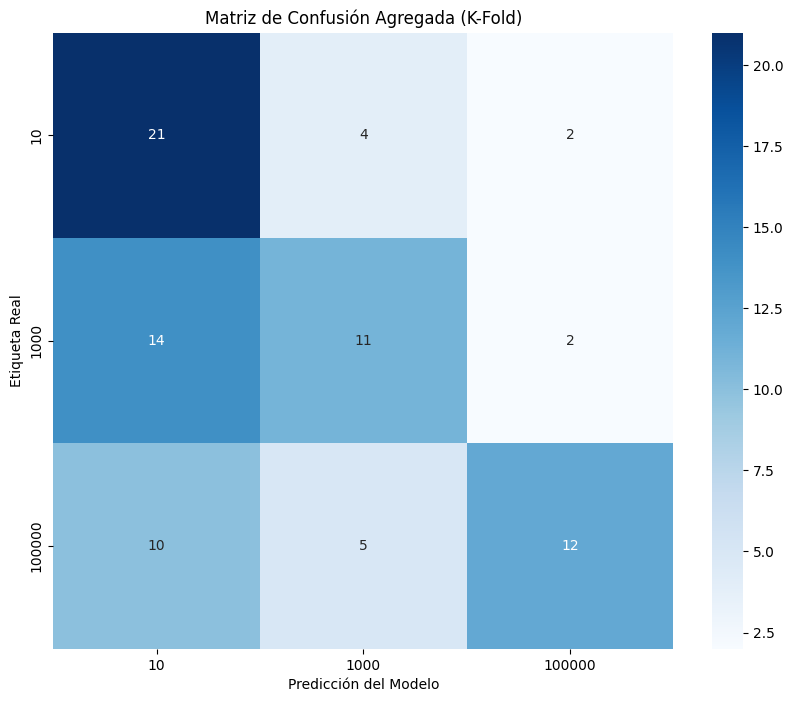


--- Reporte de Clasificación Agregado (Todos los Folds) ---
              precision    recall  f1-score   support

          10       0.47      0.78      0.58        27
        1000       0.55      0.41      0.47        27
      100000       0.75      0.44      0.56        27

    accuracy                           0.54        81
   macro avg       0.59      0.54      0.54        81
weighted avg       0.59      0.54      0.54        81

Generando Curva ROC Agregada (Todos los Folds)...


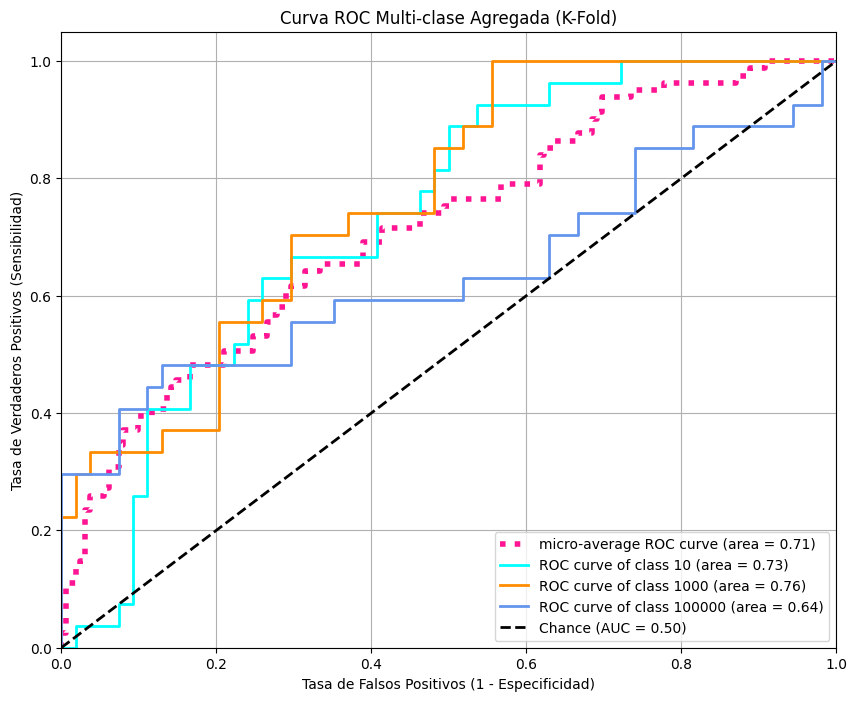

Generando curvas de aprendizaje (Loss vs. Épocas y Acc vs. Épocas)...


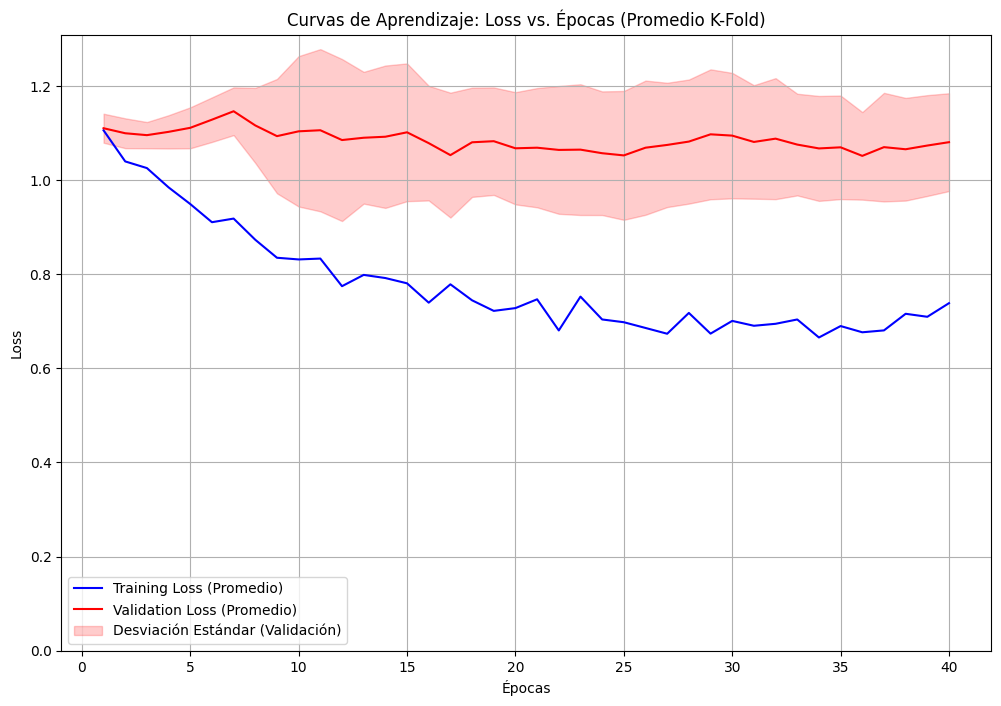

/tmp/ipython-input-2537496141.py:343: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs, mean_val_f1, 'o-', label='Validation F1-Score (Promedio)', linestyle='--')


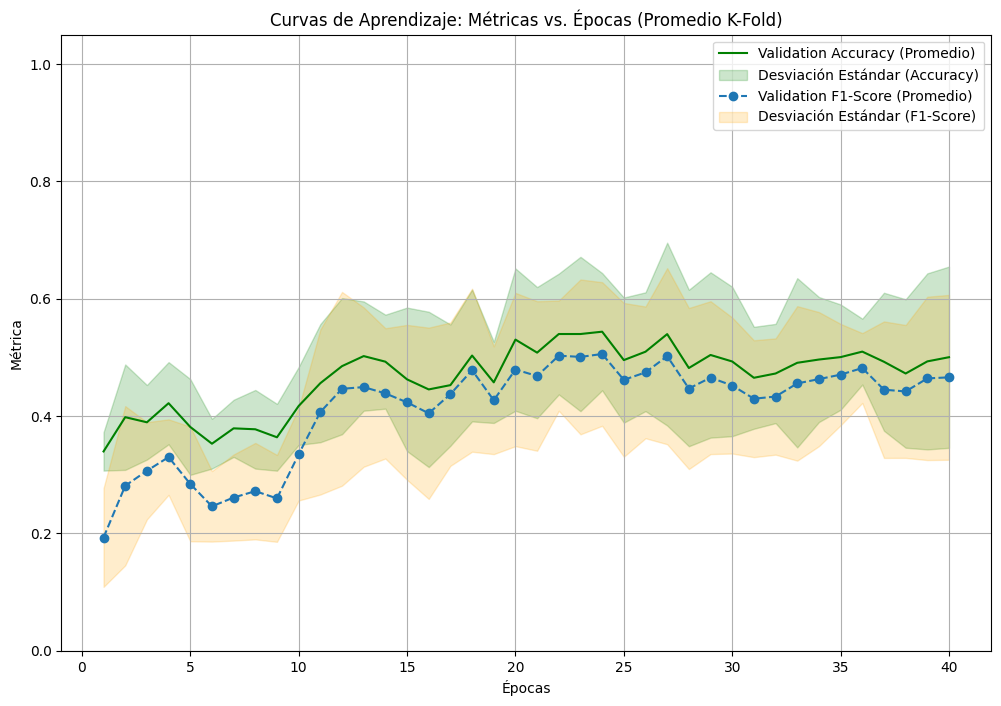


Proceso finalizado.


In [ ]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset
from PIL import Image
from torchvision import transforms
import timm
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from torchmetrics.classification import MulticlassAccuracy, MulticlassF1Score, MulticlassPrecision, MulticlassRecall
from torch.optim.lr_scheduler import ReduceLROnPlateau

# ========================================================================
# SECCIÓN 1: CONFIGURACIÓN
# ========================================================================
IMAGE_DIR = r'/content/drive/MyDrive/Tesis_Electronica/Enhanced_Batch_224'
CSV_PATH = r'/content/drive/MyDrive/Tesis_Electronica/Fase_2_Visual_Transformers/labelsFrecuencias1.csv'
# --- CAMBIO: Usar un modelo más ligero ---
MODEL_NAME = 'mobilenetv3_small_100' # Estaba en 'resnet18'
NUM_EPOCHS = 40
BATCH_SIZE = 16
LEARNING_RATE = 1e-4
WEIGHT_DECAY = 5e-4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo: {DEVICE}")

K_FOLDS = 5
RANDOM_STATE = 42

# ========================================================================
# SECCIÓN 2: PREPARACIÓN DE DATOS
# ========================================================================
try:
    df_labels = pd.read_csv(CSV_PATH)
    class_names = sorted(df_labels.iloc[:, 1].unique())
    num_classes = len(class_names)
    print(f"Detectadas {num_classes} clases: {class_names}")
    print(f"Conteo de muestras por clase:\n{df_labels.iloc[:, 1].value_counts()}")
    class_to_idx = {class_name: i for i, class_name in enumerate(class_names)}
    idx_to_class = {i: class_name for i, class_name in enumerate(class_names)}
except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{CSV_PATH}'.")
    raise

class VoltageDataset(Dataset):
    def __init__(self, csv_path, image_dir, class_to_idx, transform=None):
        self.dataframe = pd.read_csv(csv_path)
        self.image_dir = image_dir
        self.transform = transform
        self.class_to_idx = class_to_idx
        self.label_column_name = self.dataframe.columns[1]

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        base_name = self.dataframe.iloc[idx, 0]
        base_name_without_ext = os.path.splitext(base_name)[0]
        img_name = os.path.join(self.image_dir, f"{base_name_without_ext}.png")

        try:
            image = Image.open(img_name).convert("L")
        except FileNotFoundError:
            print(f"Error: No se pudo encontrar la imagen {img_name}")
            return torch.empty(1, 224, 224), torch.tensor(0, dtype=torch.long)

        label_value = self.dataframe.iloc[idx][self.label_column_name]
        label_idx = self.class_to_idx[label_value]

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label_idx, dtype=torch.long)

class AddGaussianNoise(object):
    def __init__(self, mean=0., std=0.01):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        noise = torch.randn(tensor.size()) * self.std + self.mean
        noisy_tensor = tensor + noise
        noisy_tensor = torch.clamp(noisy_tensor, 0., 1.)
        return noisy_tensor

    def __repr__(self):
        return self.__class__.__name__ + f'(mean={self.mean}, std={self.std})'

# Data Augmentation (suavizado)
data_transform = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.RandomCrop(224, padding=10, padding_mode='reflect'),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.1, contrast=0.1),
        transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
        transforms.ToTensor(),
        AddGaussianNoise(mean=0., std=0.005),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ]),
}

# ========================================================================
# SECCIÓN 3: DEFINICIÓN DEL MODELO (MobileNetV3)
# ========================================================================
def create_mobilenet_classifier(model_name, num_classes, pretrained=True):
    """
    Crea un modelo MobileNetV3 adaptado para 1 canal de entrada y con Dropout.
    """
    model = timm.create_model(model_name, pretrained=pretrained)

    # Adaptar conv_stem (primera capa) para 1 canal (escala de grises)
    # MobileNet usa 'conv_stem' en lugar de 'conv1'
    conv_stem_weights = model.conv_stem.weight.data
    model.conv_stem.in_channels = 1
    model.conv_stem.weight.data = conv_stem_weights.mean(dim=1, keepdim=True)

    # Adaptar el clasificador final y añadir Dropout
    # MobileNet usa 'classifier' en lugar de 'fc'
    num_features = model.classifier.in_features
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.5, inplace=True), # 50% de dropout
        nn.Linear(num_features, num_classes)
    )
    return model

# ========================================================================
# SECCIÓN 4: BUCLE DE ENTRENAMIENTO
# ========================================================================
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs, num_classes, model_save_path):
    best_val_loss = float('inf')
    metrics = {
        'acc': MulticlassAccuracy(num_classes=num_classes, average='macro').to(DEVICE),
        'pre': MulticlassPrecision(num_classes=num_classes, average='macro').to(DEVICE),
        'rec': MulticlassRecall(num_classes=num_classes, average='macro').to(DEVICE),
        'f1': MulticlassF1Score(num_classes=num_classes, average='macro').to(DEVICE)
    }
    history = {'train_loss': [], 'val_loss': [], 'val_acc': [], 'val_f1': []}

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        train_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", leave=False)
        for inputs, labels in train_tqdm:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            train_tqdm.set_postfix(loss=loss.item())

        train_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(train_loss)

        model.eval()
        val_loss = 0.0
        for metric in metrics.values(): metric.reset()
        val_tqdm = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]", leave=False)
        with torch.no_grad():
            for inputs, labels in val_tqdm:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                for metric in metrics.values(): metric.update(outputs, labels)

        val_loss /= len(val_loader.dataset)
        val_acc = metrics['acc'].compute()
        val_pre = metrics['pre'].compute()
        val_rec = metrics['rec'].compute()
        val_f1 = metrics['f1'].compute()

        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc.item())
        history['val_f1'].append(val_f1.item())

        if (epoch + 1) % 10 == 0 or epoch == num_epochs - 1:
            print(f"Epoch {epoch+1}/{num_epochs} -> Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
            print(f"  Metrics -> Acc: {val_acc:.4f} | Precision: {val_pre:.4f} | Recall: {val_rec:.4f} | F1: {val_f1:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), model_save_path)

        scheduler.step(val_loss)

    print(f"Fold finalizado. Mejor Val Loss: {best_val_loss:.4f}")
    return history

# ========================================================================
# SECCIÓN 6: EVALUACIÓN (MODIFICADA PARA K-FOLD)
# ========================================================================
def evaluate_fold(model, dataloader, device, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    all_scores = []
    n_classes = len(class_names)
    acc_metric = MulticlassAccuracy(num_classes=n_classes, average='macro').to(device)
    pre_metric = MulticlassPrecision(num_classes=n_classes, average='macro').to(device)
    rec_metric = MulticlassRecall(num_classes=n_classes, average='macro').to(device)
    f1_metric = MulticlassF1Score(num_classes=n_classes, average='macro').to(device)

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            scores = torch.nn.functional.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_scores.extend(scores.cpu().numpy())

            acc_metric.update(outputs, labels)
            pre_metric.update(outputs, labels)
            rec_metric.update(outputs, labels)
            f1_metric.update(outputs, labels)

    final_acc = acc_metric.compute().item()
    final_pre = pre_metric.compute().item()
    final_rec = rec_metric.compute().item()
    final_f1 = f1_metric.compute().item()

    print("\n--- Métricas (torchmetrics) del Fold ---")
    print(f"Accuracy: {final_acc:.4f}")
    print(f"Precision: {final_pre:.4f}")
    print(f"Recall: {final_rec:.4f}")
    print(f"F1 Score: {final_f1:.4f}")

    return {
        'acc': final_acc, 'pre': final_pre, 'rec': final_rec, 'f1': final_f1,
        'labels': all_labels, 'preds': all_preds, 'scores': all_scores
    }

# ========================================================================
# SECCIÓN 7: GRÁFICOS (MATRIZ, ROC Y CURVAS DE APRENDIZAJE)
# ========================================================================
def plot_final_confusion_matrix(all_labels, all_preds, class_names):
    print("\n--- Matriz de Confusión Agregada (Todos los Folds) ---")
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
                xticklabels=[str(c) for c in class_names], yticklabels=[str(c) for c in class_names])
    plt.xlabel('Predicción del Modelo')
    plt.ylabel('Etiqueta Real')
    plt.title('Matriz de Confusión Agregada (K-Fold)')
    plt.show()

    print("\n--- Reporte de Clasificación Agregado (Todos los Folds) ---")
    report = classification_report(all_labels, all_preds, target_names=[str(c) for c in class_names], zero_division=0)
    print(report)

def plot_final_roc_curves(all_labels, all_scores, class_names):
    print("Generando Curva ROC Agregada (Todos los Folds)...")
    n_classes = len(class_names)
    all_labels_bin = label_binarize(all_labels, classes=range(n_classes))
    all_scores = np.array(all_scores)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], all_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_bin.ravel(), all_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(10, 8))
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})',
             color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (AUC = 0.50)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
    plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
    plt.title('Curva ROC Multi-clase Agregada (K-Fold)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

def plot_learning_curves(all_histories, num_epochs):
    print("Generando curvas de aprendizaje (Loss vs. Épocas y Acc vs. Épocas)...")

    train_loss_matrix = np.array([h['train_loss'] for h in all_histories])
    val_loss_matrix = np.array([h['val_loss'] for h in all_histories])
    val_acc_matrix = np.array([h['val_acc'] for h in all_histories])
    val_f1_matrix = np.array([h['val_f1'] for h in all_histories])

    mean_train_loss = np.mean(train_loss_matrix, axis=0)
    mean_val_loss = np.mean(val_loss_matrix, axis=0)
    std_val_loss = np.std(val_loss_matrix, axis=0)
    mean_val_acc = np.mean(val_acc_matrix, axis=0)
    std_val_acc = np.std(val_acc_matrix, axis=0)
    mean_val_f1 = np.mean(val_f1_matrix, axis=0)
    std_val_f1 = np.std(val_f1_matrix, axis=0)

    epochs = range(1, num_epochs + 1)

    plt.figure(figsize=(12, 8))
    plt.plot(epochs, mean_train_loss, 'b-', label='Training Loss (Promedio)')
    plt.plot(epochs, mean_val_loss, 'r-', label='Validation Loss (Promedio)')
    plt.fill_between(epochs, mean_val_loss - std_val_loss, mean_val_loss + std_val_loss,
                     color='r', alpha=0.2, label='Desviación Estándar (Validación)')

    plt.title('Curvas de Aprendizaje: Loss vs. Épocas (Promedio K-Fold)')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.ylim(bottom=0)
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.plot(epochs, mean_val_acc, 'g-', label='Validation Accuracy (Promedio)')
    plt.fill_between(epochs, mean_val_acc - std_val_acc, mean_val_acc + std_val_acc,
                     color='g', alpha=0.2, label='Desviación Estándar (Accuracy)')
    plt.plot(epochs, mean_val_f1, 'o-', label='Validation F1-Score (Promedio)', linestyle='--')
    plt.fill_between(epochs, mean_val_f1 - std_val_f1, mean_val_f1 + std_val_f1,
                     color='orange', alpha=0.2, label='Desviación Estándar (F1-Score)')

    plt.title('Curvas de Aprendizaje: Métricas vs. Épocas (Promedio K-Fold)')
    plt.xlabel('Épocas')
    plt.ylabel('Métrica')
    plt.legend()
    plt.grid(True)
    plt.ylim(0.0, 1.05)
    plt.show()

# ========================================================================
# SECCIÓN 8: EJECUCIÓN PRINCIPAL (K-FOLD)
# ========================================================================

if __name__ == "__main__":

    dataset_for_train = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['train']
    )
    dataset_for_val = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['val']
    )

    print("\n--- Transformaciones de Entrenamiento (MobileNet) ---")
    print(dataset_for_train.transform)
    print("----------------------------------------\n")

    kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=RANDOM_STATE)

    fold_metrics = {'acc': [], 'pre': [], 'rec': [], 'f1': []}
    all_folds_labels = []
    all_folds_preds = []
    all_folds_scores = []
    all_fold_histories = []

    print(f"Iniciando Cross-Validation de {K_FOLDS} folds...")
    print("="*70)

    for fold, (train_ids, val_ids) in enumerate(kfold.split(dataset_for_train)):
        print(f"\n======= FOLD {fold+1}/{K_FOLDS} =======")

        train_sub = Subset(dataset_for_train, train_ids)
        val_sub = Subset(dataset_for_val, val_ids)
        train_loader = DataLoader(train_sub, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
        val_loader = DataLoader(val_sub, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

        print(f"Datos del Fold: {len(train_sub)} para entrenamiento, {len(val_sub)} para validación.")

        # --- CAMBIO: Usar create_mobilenet_classifier ---
        model = create_mobilenet_classifier(MODEL_NAME, num_classes=num_classes, pretrained=True).to(DEVICE)

        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
        scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

        model_save_path = f'best_model_fold_{fold+1}.pth'

        print(f"Entrenando Fold {fold+1}...")
        fold_history = train_model(
            model, train_loader, val_loader,
            criterion, optimizer, scheduler,
            NUM_EPOCHS, num_classes, model_save_path
        )
        all_fold_histories.append(fold_history)

        print(f"\nEvaluando mejor modelo del Fold {fold+1}...")
        # --- CAMBIO: Usar create_mobilenet_classifier ---
        best_model = create_mobilenet_classifier(MODEL_NAME, num_classes=num_classes, pretrained=False).to(DEVICE)
        best_model.load_state_dict(torch.load(model_save_path))

        fold_results = evaluate_fold(best_model, val_loader, DEVICE, class_names)

        fold_metrics['acc'].append(fold_results['acc'])
        fold_metrics['pre'].append(fold_results['pre'])
        fold_metrics['rec'].append(fold_results['rec'])
        fold_metrics['f1'].append(fold_results['f1'])

        all_folds_labels.extend(fold_results['labels'])
        all_folds_preds.extend(fold_results['preds'])
        all_folds_scores.extend(fold_results['scores'])

    print("\n" + "="*70)
    print("CROSS-VALIDATION COMPLETADA")
    print("="*70)

    print(f"\n--- Resumen de Métricas (Promedio de {K_FOLDS} Folds) ---")
    print(f"Accuracy:  {np.mean(fold_metrics['acc']):.4f} +/- {np.std(fold_metrics['acc']):.4f}")
    print(f"Precision: {np.mean(fold_metrics['pre']):.4f} +/- {np.std(fold_metrics['pre']):.4f}")
    print(f"Recall:    {np.mean(fold_metrics['rec']):.4f} +/- {np.std(fold_metrics['rec']):.4f}")
    print(f"F1 Score:  {np.mean(fold_metrics['f1']):.4f} +/- {np.std(fold_metrics['f1']):.4f}")

    plot_final_confusion_matrix(all_folds_labels, all_folds_preds, class_names)
    plot_final_roc_curves(all_folds_labels, all_folds_scores, class_names)
    plot_learning_curves(all_fold_histories, NUM_EPOCHS)

    print("\nProceso finalizado.")

## ResNet18 Aumentado

Usando dispositivo: cuda
Detectadas 3 clases: [np.int64(10), np.int64(1000), np.int64(100000)]
Conteo de muestras por clase:
Frecuencia
10        27
1000      27
100000    27
Name: count, dtype: int64
Nombres para visualización: ['10 Hz', '1 kHz', '100 kHz']

--- Transformaciones de Entrenamiento (resnet18) ---
Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.6, 1.0), ratio=(0.9, 1.1), interpolation=bilinear, antialias=True)
    RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
    RandomAffine(degrees=[0.0, 0.0], translate=(0.1, 0.1), shear=[-5.0, 5.0])
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    ColorJitter(brightness=(0.75, 1.25), contrast=(0.75, 1.25), saturation=None, hue=None)
    RandomPerspective(p=0.3)
    GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0))
    ToTensor()
    AddGaussianNoise(mean=0.0, std=0.01)
    Normalize(mean=[0.5], std=[0.5])
)
----------------------------------------

Iniciando Cross-Validati

Epoch 10/40 -> Train Loss: 1.0868 | Val Loss: 1.1178
  Metrics -> Acc: 0.4000 | Precision: 0.2778 | Recall: 0.4000 | F1: 0.3050


Epoch 20/40 -> Train Loss: 1.0634 | Val Loss: 1.0465
  Metrics -> Acc: 0.4762 | Precision: 0.4778 | Recall: 0.4762 | F1: 0.4751


Epoch 30/40 -> Train Loss: 1.0094 | Val Loss: 1.0625
  Metrics -> Acc: 0.4667 | Precision: 0.2778 | Recall: 0.4667 | F1: 0.3480


Epoch 40/40 -> Train Loss: 1.0160 | Val Loss: 0.9813
  Metrics -> Acc: 0.6095 | Precision: 0.6151 | Recall: 0.6095 | F1: 0.5909
Fold finalizado. Mejor Val Loss: 0.9778

Evaluando mejor modelo del Fold 1...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.5619
Precision: 0.5333
Recall:    0.5619
F1 Score:  0.5263

======= FOLD 2/5 =======
Datos del Fold: 65 train, 16 val.
Entrenando Fold 2...


Epoch 10/40 -> Train Loss: 1.0318 | Val Loss: 1.1442
  Metrics -> Acc: 0.2917 | Precision: 0.2778 | Recall: 0.2917 | F1: 0.2143


Epoch 20/40 -> Train Loss: 1.0467 | Val Loss: 1.1817
  Metrics -> Acc: 0.3333 | Precision: 0.0417 | Recall: 0.3333 | F1: 0.0741


Epoch 30/40 -> Train Loss: 1.0586 | Val Loss: 1.1804
  Metrics -> Acc: 0.3333 | Precision: 0.0417 | Recall: 0.3333 | F1: 0.0741


Epoch 40/40 -> Train Loss: 1.1009 | Val Loss: 1.1878
  Metrics -> Acc: 0.3333 | Precision: 0.0417 | Recall: 0.3333 | F1: 0.0741
Fold finalizado. Mejor Val Loss: 1.0821

Evaluando mejor modelo del Fold 2...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.3333
Precision: 0.2000
Recall:    0.3333
F1 Score:  0.2434

======= FOLD 3/5 =======
Datos del Fold: 65 train, 16 val.
Entrenando Fold 3...


Epoch 10/40 -> Train Loss: 1.1055 | Val Loss: 1.1211
  Metrics -> Acc: 0.3810 | Precision: 0.2436 | Recall: 0.3810 | F1: 0.1991


Epoch 20/40 -> Train Loss: 1.0856 | Val Loss: 1.1187
  Metrics -> Acc: 0.3651 | Precision: 0.2262 | Recall: 0.3651 | F1: 0.2641


Epoch 30/40 -> Train Loss: 1.0870 | Val Loss: 1.1082
  Metrics -> Acc: 0.4127 | Precision: 0.2738 | Recall: 0.4127 | F1: 0.3117


Epoch 40/40 -> Train Loss: 1.1100 | Val Loss: 1.1074
  Metrics -> Acc: 0.4603 | Precision: 0.3036 | Recall: 0.4603 | F1: 0.3556
Fold finalizado. Mejor Val Loss: 1.0800

Evaluando mejor modelo del Fold 3...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.2540
Precision: 0.2063
Recall:    0.2540
F1 Score:  0.2276

======= FOLD 4/5 =======
Datos del Fold: 65 train, 16 val.
Entrenando Fold 4...


Epoch 10/40 -> Train Loss: 1.0940 | Val Loss: 1.0884
  Metrics -> Acc: 0.4571 | Precision: 0.4667 | Recall: 0.4571 | F1: 0.4202


Epoch 20/40 -> Train Loss: 1.0588 | Val Loss: 1.0965
  Metrics -> Acc: 0.2381 | Precision: 0.1389 | Recall: 0.2381 | F1: 0.1754


Epoch 30/40 -> Train Loss: 1.0370 | Val Loss: 1.0927
  Metrics -> Acc: 0.1905 | Precision: 0.1481 | Recall: 0.1905 | F1: 0.1667


Epoch 40/40 -> Train Loss: 1.0694 | Val Loss: 1.1020
  Metrics -> Acc: 0.2095 | Precision: 0.1917 | Recall: 0.2095 | F1: 0.2000
Fold finalizado. Mejor Val Loss: 1.0817

Evaluando mejor modelo del Fold 4...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.3595
Precision: 0.4028
Recall:    0.3595
F1 Score:  0.3657

======= FOLD 5/5 =======
Datos del Fold: 65 train, 16 val.
Entrenando Fold 5...


Epoch 10/40 -> Train Loss: 1.1463 | Val Loss: 1.1031
  Metrics -> Acc: 0.3643 | Precision: 0.5769 | Recall: 0.3643 | F1: 0.3028


Epoch 20/40 -> Train Loss: 1.0905 | Val Loss: 1.1068
  Metrics -> Acc: 0.2976 | Precision: 0.1667 | Recall: 0.2976 | F1: 0.1856


Epoch 30/40 -> Train Loss: 1.0600 | Val Loss: 1.0947
  Metrics -> Acc: 0.1786 | Precision: 0.1528 | Recall: 0.1786 | F1: 0.1581


Epoch 40/40 -> Train Loss: 1.0721 | Val Loss: 1.1030
  Metrics -> Acc: 0.3643 | Precision: 0.3056 | Recall: 0.3643 | F1: 0.2978
Fold finalizado. Mejor Val Loss: 1.0864

Evaluando mejor modelo del Fold 5...

--- Métricas (torchmetrics) del Fold ---
Accuracy:  0.4833
Precision: 0.8333
Recall:    0.4833
F1 Score:  0.4667

CROSS-VALIDATION COMPLETADA

--- Resumen de Métricas (Promedio de 5 Folds) ---
Accuracy:  0.3984 +/- 0.1100
Precision: 0.4352 +/- 0.2353
Recall:    0.3984 +/- 0.1100
F1 Score:  0.3659 +/- 0.1184

--- Matriz de Confusión Agregada (Todos los Folds) ---


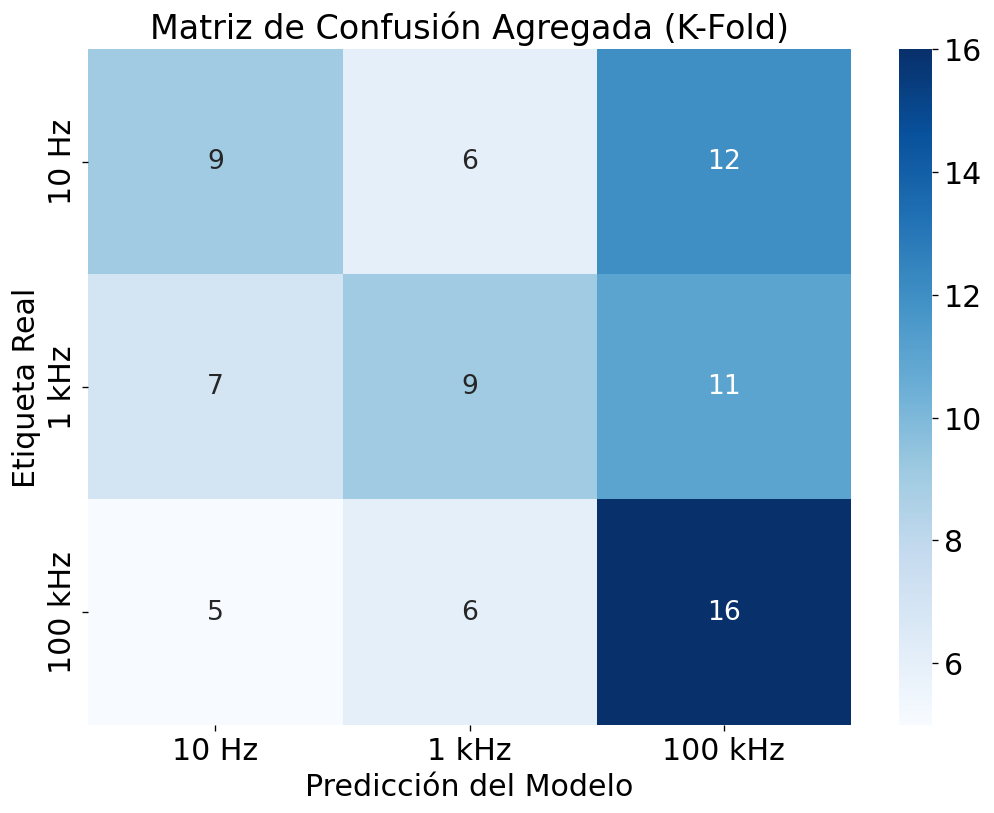


--- Reporte de Clasificación Agregado (Todos los Folds) ---
              precision    recall  f1-score   support

       10 Hz       0.43      0.33      0.38        27
       1 kHz       0.43      0.33      0.38        27
     100 kHz       0.41      0.59      0.48        27

    accuracy                           0.42        81
   macro avg       0.42      0.42      0.41        81
weighted avg       0.42      0.42      0.41        81

Generando Curva ROC Agregada (Todos los Folds)...


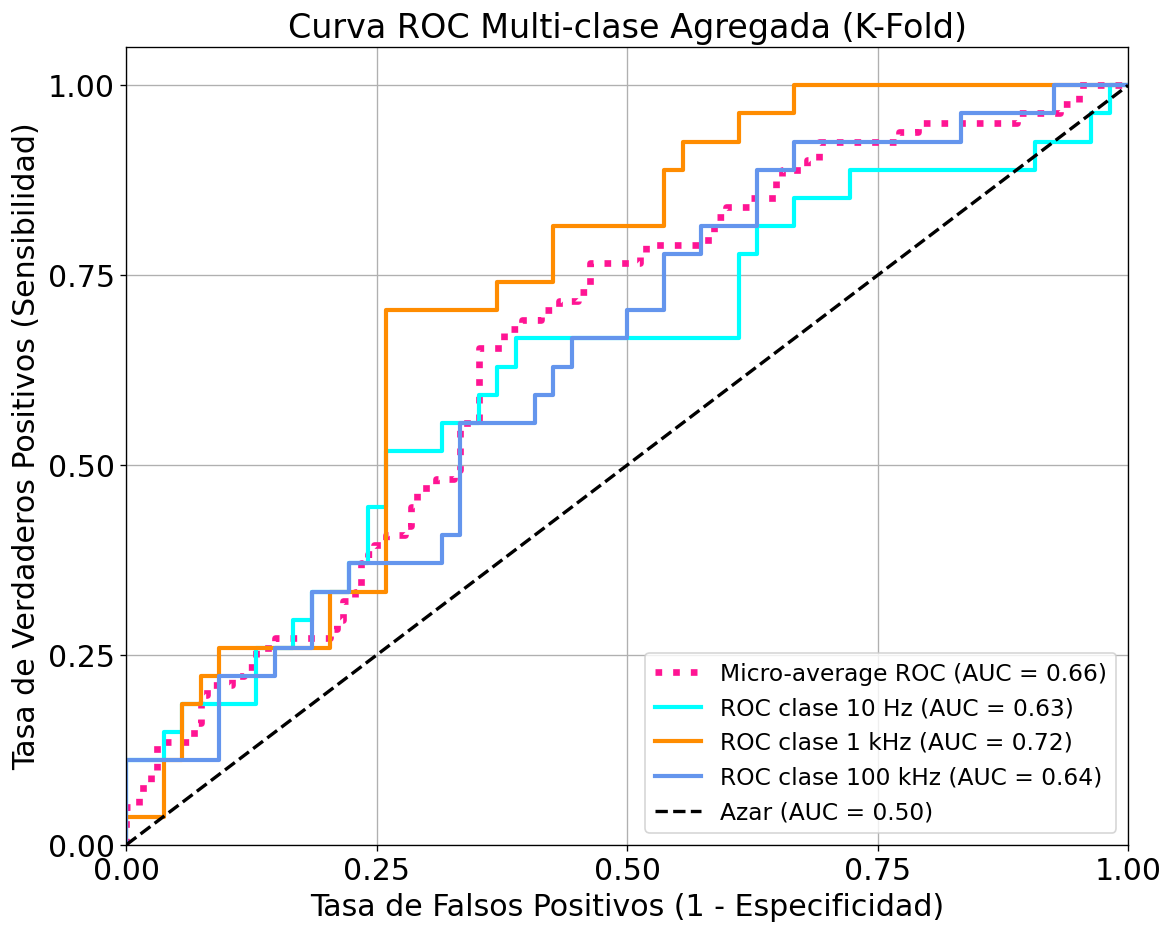

Generando curvas de aprendizaje (Loss / Métricas vs. Épocas)...


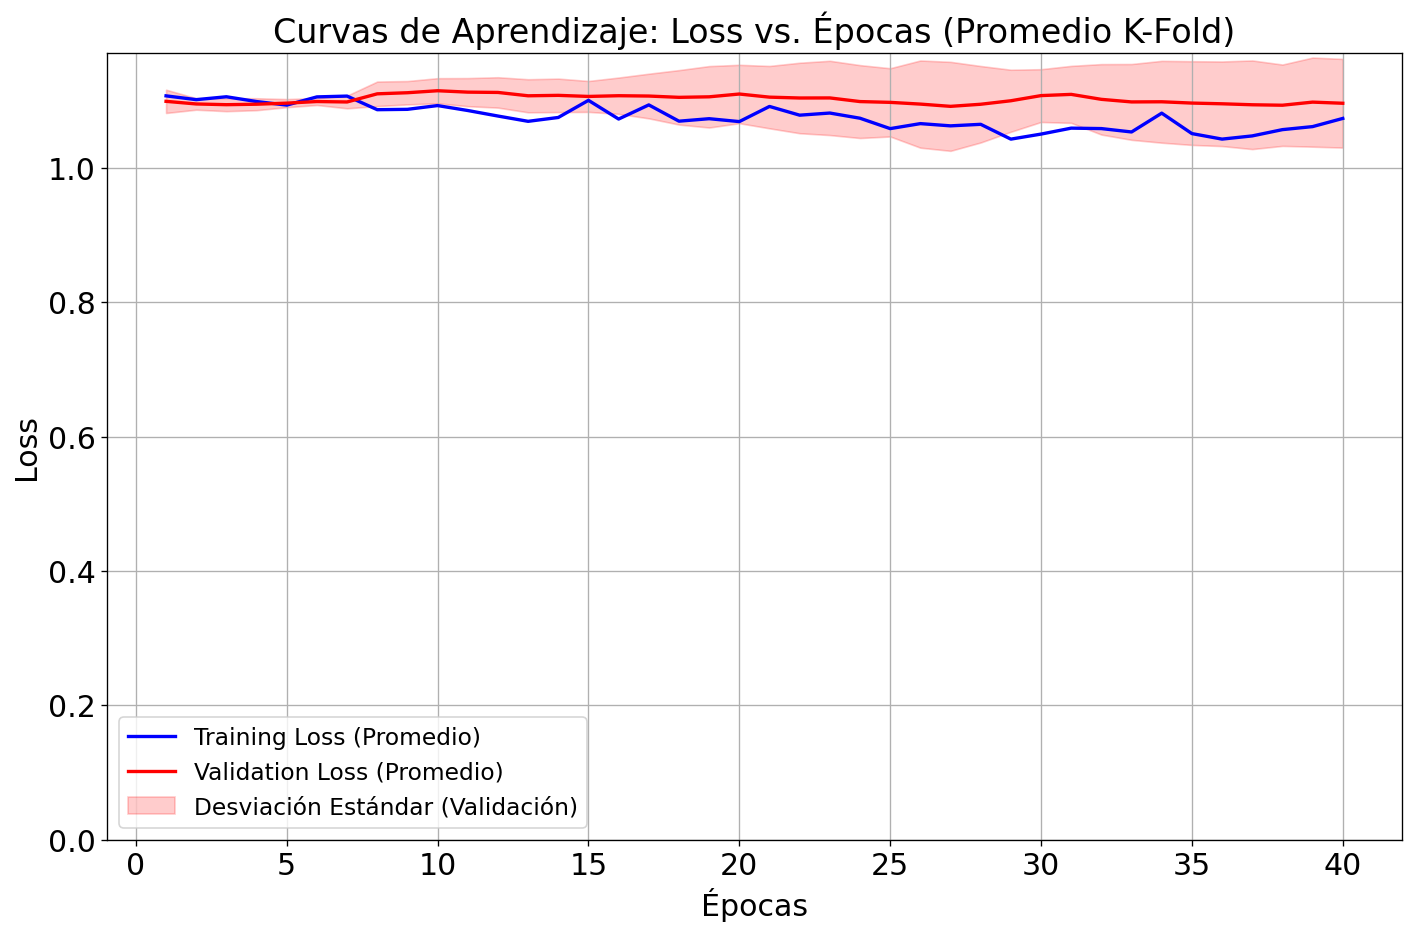

/tmp/ipython-input-263470066.py:440: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(epochs, mean_val_f1, 'o-', lw=2, label='Validation F1-Score (Promedio)', linestyle='--')


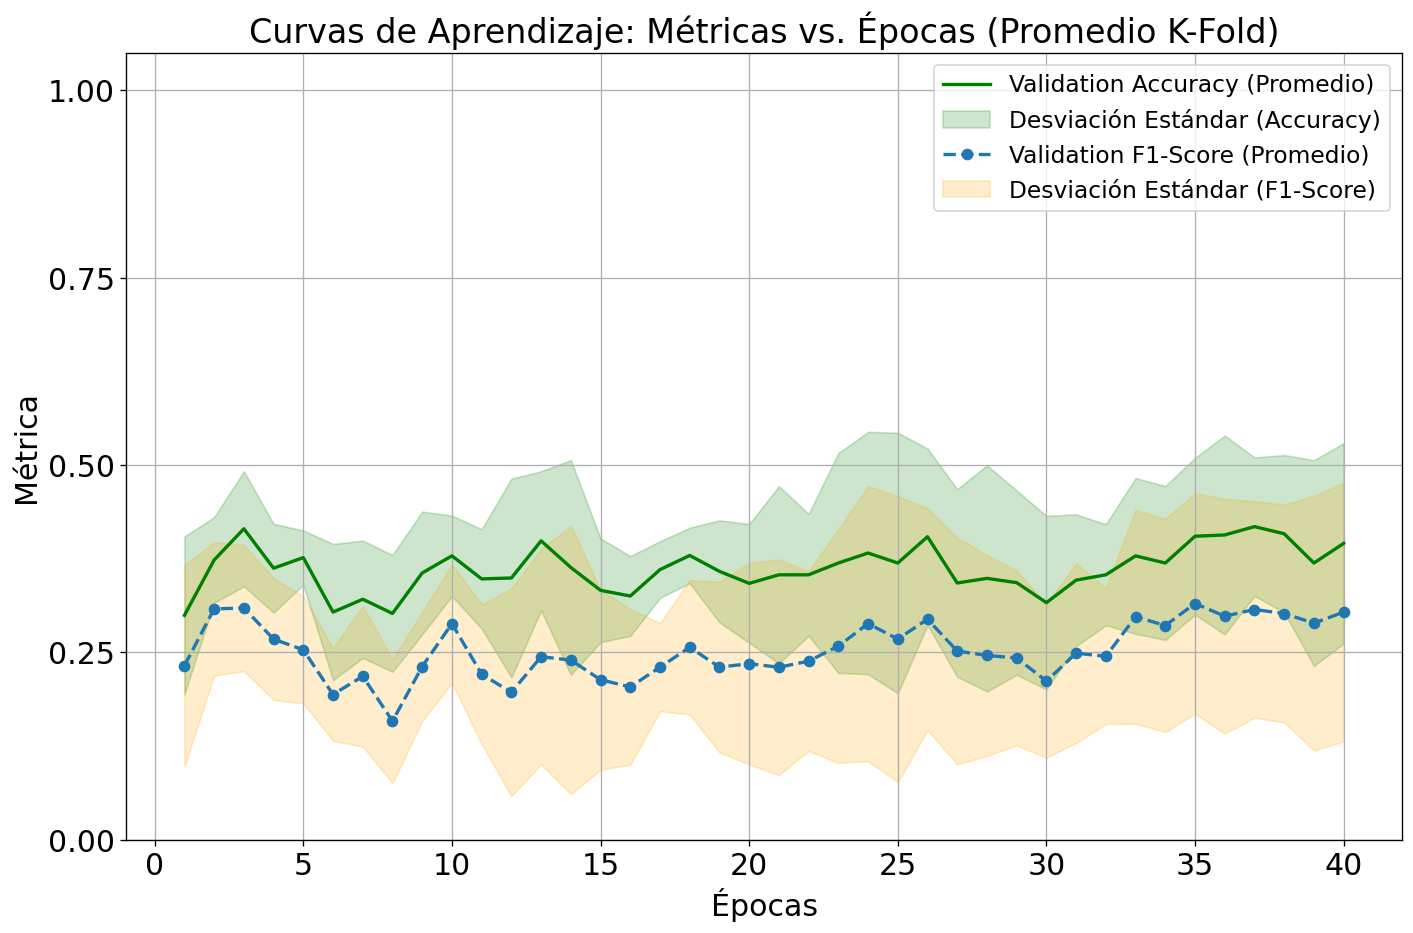


Proceso finalizado.


In [ ]:
# -*- coding: utf-8 -*-
import os
import random
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset

from PIL import Image
from torchvision import transforms
import timm

from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

from torchmetrics.classification import (
    MulticlassAccuracy, MulticlassF1Score,
    MulticlassPrecision, MulticlassRecall
)
from torch.optim.lr_scheduler import ReduceLROnPlateau

# --------------------------------------------------------------------
# CONFIGURACIÓN GLOBAL DE GRÁFICOS (TAMAÑOS GRANDES PARA TESIS / PPT)
# --------------------------------------------------------------------
plt.rcParams.update({
    "figure.dpi": 120,        # resolución en notebook
    "savefig.dpi": 300,       # resolución al guardar
    "axes.titlesize": 22,     # títulos
    "axes.labelsize": 18,     # etiquetas de ejes
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.fontsize": 18,
    "font.size": 14
})

# ---------------------------------------------------------
# REPRODUCIBILIDAD
# ---------------------------------------------------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

# ========================================================================
# SECCIÓN 1: CONFIGURACIÓN
# ========================================================================
IMAGE_DIR = r'/content/drive/MyDrive/ISIS3002_-_Tesis_Electronica/Enhanced_Batch_224'
CSV_PATH = r'/content/drive/MyDrive/ISIS3002_-_Tesis_Electronica/Fase_2_Visual_Transformers/labelsFrecuencias1.csv'

MODEL_NAME   = 'resnet18'    # ResNet-18 (timm)
NUM_EPOCHS   = 40
BATCH_SIZE   = 16
LEARNING_RATE= 3e-4
WEIGHT_DECAY = 5e-4
DEVICE       = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo: {DEVICE}")

K_FOLDS      = 5
RANDOM_STATE = 42

# ========================================================================
# SECCIÓN 2: PREPARACIÓN DE DATOS
# ========================================================================
try:
    df_labels = pd.read_csv(CSV_PATH)
    class_names = sorted(df_labels.iloc[:, 1].unique())   # valores crudos: 10, 1000, 100000
    num_classes = len(class_names)
    print(f"Detectadas {num_classes} clases: {class_names}")
    print(f"Conteo de muestras por clase:\n{df_labels.iloc[:, 1].value_counts()}")
    class_to_idx = {c: i for i, c in enumerate(class_names)}
    idx_to_class = {i: c for i, c in enumerate(class_names)}

    # --------- NOMBRES "BONITOS" PARA VISUALIZACIÓN ---------
    pretty_name_map = {
        '10': '10 Hz',
        '1000': '1 kHz',
        '100000': '100 kHz'
    }
    pretty_class_names = [
        pretty_name_map.get(str(c), str(c)) for c in class_names
    ]
    print(f"Nombres para visualización: {pretty_class_names}")

except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{CSV_PATH}'.")
    raise

class VoltageDataset(Dataset):
    def __init__(self, csv_path, image_dir, class_to_idx, transform=None):
        self.dataframe = pd.read_csv(csv_path)
        self.image_dir = image_dir
        self.transform = transform
        self.class_to_idx = class_to_idx
        self.label_column_name = self.dataframe.columns[1]

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        base_name = self.dataframe.iloc[idx, 0]
        stem      = os.path.splitext(base_name)[0]
        img_name  = os.path.join(self.image_dir, f"{stem}.png")

        try:
            image = Image.open(img_name).convert("L")  # escala de grises
        except FileNotFoundError:
            print(f"Error: No se pudo encontrar la imagen {img_name}")
            return torch.empty(1, 224, 224), torch.tensor(0, dtype=torch.long)

        label_value = self.dataframe.iloc[idx][self.label_column_name]
        label_idx   = self.class_to_idx[label_value]

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label_idx, dtype=torch.long)

class AddGaussianNoise(object):
    def __init__(self, mean=0., std=0.01):
        self.std = std
        self.mean = mean
    def __call__(self, tensor):
        noise = torch.randn(tensor.size()) * self.std + self.mean
        noisy = torch.clamp(tensor + noise, 0., 1.)
        return noisy
    def __repr__(self):
        return self.__class__.__name__ + f'(mean={self.mean}, std={self.std})'

# -----------------------------
# DATA AUGMENTATION
# -----------------------------
data_transform = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(
            224,
            scale=(0.6, 1.0),
            ratio=(0.9, 1.1)
        ),
        transforms.RandomRotation(15, fill=0),
        transforms.RandomAffine(
            degrees=0, translate=(0.1, 0.1), shear=5, fill=0
        ),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.25, contrast=0.25),
        transforms.RandomPerspective(distortion_scale=0.25, p=0.3),
        transforms.GaussianBlur(kernel_size=5, sigma=(0.1, 2.0)),
        transforms.ToTensor(),
        AddGaussianNoise(mean=0., std=0.01),
        transforms.Normalize(mean=[0.5], std=[0.5]),
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5]),
    ]),
}

# ========================================================================
# SECCIÓN 3: DEFINICIÓN DEL MODELO (ResNet-18)
# ========================================================================
def create_resnet_classifier(model_name, num_classes, pretrained=True):
    """
    Crea un ResNet (timm) para 1 canal (gris) y reemplaza el clasificador por uno con Dropout.
    Soporta variantes con atributo 'fc' o 'classifier'.
    """
    model = timm.create_model(model_name, pretrained=pretrained)

    # --- Adaptar primera conv (conv1) a 1 canal ---
    if hasattr(model, 'conv1'):
        old = model.conv1
        new_conv = nn.Conv2d(
            in_channels=1,
            out_channels=old.out_channels,
            kernel_size=old.kernel_size,
            stride=old.stride,
            padding=old.padding,
            bias=(old.bias is not None)
        )
        with torch.no_grad():
            new_conv.weight[:] = old.weight.mean(dim=1, keepdim=True)
            if old.bias is not None:
                new_conv.bias[:] = old.bias.clone()
        model.conv1 = new_conv
    else:
        raise AttributeError("El modelo no tiene 'conv1'; revisa la variante de ResNet usada.")

    # --- Reemplazar clasificador final por Dropout + Linear ---
    if hasattr(model, 'fc'):  # ResNet clásico
        num_features = model.fc.in_features
        model.fc = nn.Sequential(
            nn.Dropout(p=0.6, inplace=True),
            nn.Linear(num_features, num_classes)
        )
    elif hasattr(model, 'classifier'):  # algunas variantes usan 'classifier'
        last = model.classifier
        if isinstance(last, nn.Linear):
            num_features = last.in_features
        elif isinstance(last, nn.Sequential):
            linears = [m for m in last.modules() if isinstance(m, nn.Linear)]
            if len(linears) == 0:
                raise AttributeError("No se encontró capa Linear en 'classifier'.")
            num_features = list(linears)[-1].in_features
        else:
            raise AttributeError("Tipo de 'classifier' no soportado.")
        model.classifier = nn.Sequential(
            nn.Dropout(p=0.6, inplace=True),
            nn.Linear(num_features, num_classes)
        )
    else:
        raise AttributeError("No se encontró 'fc' ni 'classifier' en el modelo.")

    return model

# ========================================================================
# SECCIÓN 4: ENTRENAMIENTO
# ========================================================================
def train_model(model, train_loader, val_loader, criterion, optimizer,
                scheduler, num_epochs, num_classes, model_save_path):
    best_val_loss = float('inf')
    metrics = {
        'acc': MulticlassAccuracy(num_classes=num_classes, average='macro').to(DEVICE),
        'pre': MulticlassPrecision(num_classes=num_classes, average='macro').to(DEVICE),
        'rec': MulticlassRecall(num_classes=num_classes, average='macro').to(DEVICE),
        'f1' : MulticlassF1Score(num_classes=num_classes, average='macro').to(DEVICE)
    }
    history = {'train_loss': [], 'val_loss': [], 'val_acc': [], 'val_f1': []}

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", leave=False):
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        train_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(train_loss)

        # Validación
        model.eval()
        val_loss = 0.0
        for m in metrics.values():
            m.reset()
        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]", leave=False):
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                for m in metrics.values():
                    m.update(outputs, labels)

        val_loss /= len(val_loader.dataset)
        val_acc = metrics['acc'].compute().item()
        val_f1  = metrics['f1'].compute().item()

        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['val_f1'].append(val_f1)

        if (epoch + 1) % 10 == 0 or epoch == num_epochs - 1:
            val_pre = metrics['pre'].compute().item()
            val_rec = metrics['rec'].compute().item()
            print(f"Epoch {epoch+1}/{num_epochs} -> Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
            print(f"  Metrics -> Acc: {val_acc:.4f} | Precision: {val_pre:.4f} | Recall: {val_rec:.4f} | F1: {val_f1:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), model_save_path)

        scheduler.step(val_loss)

    print(f"Fold finalizado. Mejor Val Loss: {best_val_loss:.4f}")
    return history

# ========================================================================
# SECCIÓN 6: EVALUACIÓN
# ========================================================================
def evaluate_fold(model, dataloader, device, class_names):
    model.eval()
    all_preds, all_labels, all_scores = [], [], []
    n_classes = len(class_names)

    acc_metric = MulticlassAccuracy(num_classes=n_classes, average='macro').to(device)
    pre_metric = MulticlassPrecision(num_classes=n_classes, average='macro').to(device)
    rec_metric = MulticlassRecall(num_classes=n_classes, average='macro').to(device)
    f1_metric  = MulticlassF1Score(num_classes=n_classes, average='macro').to(device)

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            scores  = torch.nn.functional.softmax(outputs, dim=1)
            _, preds= torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_scores.extend(scores.cpu().numpy())

            acc_metric.update(outputs, labels)
            pre_metric.update(outputs, labels)
            rec_metric.update(outputs, labels)
            f1_metric.update(outputs, labels)

    print("\n--- Métricas (torchmetrics) del Fold ---")
    print(f"Accuracy:  {acc_metric.compute().item():.4f}")
    print(f"Precision: {pre_metric.compute().item():.4f}")
    print(f"Recall:    {rec_metric.compute().item():.4f}")
    print(f"F1 Score:  {f1_metric.compute().item():.4f}")

    return {
        'acc':  acc_metric.compute().item(),
        'pre':  pre_metric.compute().item(),
        'rec':  rec_metric.compute().item(),
        'f1' :  f1_metric.compute().item(),
        'labels': all_labels, 'preds': all_preds, 'scores': all_scores
    }

# ========================================================================
# SECCIÓN 7: GRÁFICOS
# ========================================================================
def plot_final_confusion_matrix(all_labels, all_preds, display_names):
    """
    display_names: nombres formateados para mostrar (p.ej. '10 Hz', '1 kHz', '100 kHz').
    """
    print("\n--- Matriz de Confusión Agregada (Todos los Folds) ---")
    cm = confusion_matrix(all_labels, all_preds)
    fig, ax = plt.subplots(figsize=(9, 7))
    sns.heatmap(
        cm, annot=True, fmt='g', cmap='Blues',
        xticklabels=[str(c) for c in display_names],
        yticklabels=[str(c) for c in display_names],
        annot_kws={"size": 16}
    )
    ax.set_xlabel('Predicción del Modelo', fontsize=18)
    ax.set_ylabel('Etiqueta Real', fontsize=18)
    ax.set_title('Matriz de Confusión Agregada (K-Fold)', fontsize=20)
    plt.tight_layout()
    plt.show()

    print("\n--- Reporte de Clasificación Agregado (Todos los Folds) ---")
    print(classification_report(
        all_labels, all_preds,
        target_names=[str(c) for c in display_names],
        zero_division=0
    ))

def plot_final_roc_curves(all_labels, all_scores, display_names):
    """
    display_names: nombres formateados para las clases.
    """
    print("Generando Curva ROC Agregada (Todos los Folds)...")
    n_classes = len(display_names)
    all_labels_bin = label_binarize(all_labels, classes=range(n_classes))
    all_scores = np.array(all_scores)

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], all_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(all_labels_bin.ravel(), all_scores.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(fpr["micro"], tpr["micro"],
            label=f'Micro-average ROC (AUC = {roc_auc["micro"]:0.2f})',
            color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
    for i, color in zip(range(n_classes), colors):
        ax.plot(fpr[i], tpr[i], color=color, lw=2.5,
                label=f'ROC clase {display_names[i]} (AUC = {roc_auc[i]:0.2f})')

    ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Azar (AUC = 0.50)')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Tasa de Falsos Positivos (1 - Especificidad)', fontsize=18)
    ax.set_ylabel('Tasa de Verdaderos Positivos (Sensibilidad)', fontsize=18)
    ax.set_title('Curva ROC Multi-clase Agregada (K-Fold)', fontsize=20)
    ax.legend(loc="lower right", fontsize=14)
    ax.grid(True)
    ax.set_xticks(np.arange(0.0, 1.01, 0.25))
    ax.set_yticks(np.arange(0.0, 1.01, 0.25))
    plt.tight_layout()
    plt.show()

def plot_learning_curves(all_histories, num_epochs):
    print("Generando curvas de aprendizaje (Loss / Métricas vs. Épocas)...")
    train_loss_matrix = np.array([h['train_loss'] for h in all_histories])
    val_loss_matrix   = np.array([h['val_loss']   for h in all_histories])
    val_acc_matrix    = np.array([h['val_acc']    for h in all_histories])
    val_f1_matrix     = np.array([h['val_f1']     for h in all_histories])

    mean_train_loss = np.mean(train_loss_matrix, axis=0)
    mean_val_loss   = np.mean(val_loss_matrix,   axis=0)
    std_val_loss    = np.std(val_loss_matrix,    axis=0)
    mean_val_acc    = np.mean(val_acc_matrix,    axis=0)
    std_val_acc     = np.std(val_acc_matrix,     axis=0)
    mean_val_f1     = np.mean(val_f1_matrix,     axis=0)
    std_val_f1      = np.std(val_f1_matrix,      axis=0)

    epochs = np.arange(1, num_epochs + 1)

    # --- Loss ---
    fig1, ax1 = plt.subplots(figsize=(12, 8))
    ax1.plot(epochs, mean_train_loss, 'b-', lw=2, label='Training Loss (Promedio)')
    ax1.plot(epochs, mean_val_loss,   'r-', lw=2, label='Validation Loss (Promedio)')
    ax1.fill_between(epochs, mean_val_loss - std_val_loss, mean_val_loss + std_val_loss,
                     color='r', alpha=0.2, label='Desviación Estándar (Validación)')
    ax1.set_title('Curvas de Aprendizaje: Loss vs. Épocas (Promedio K-Fold)', fontsize=20)
    ax1.set_xlabel('Épocas', fontsize=18)
    ax1.set_ylabel('Loss', fontsize=18)
    ax1.legend(fontsize=14)
    ax1.grid(True)
    ax1.set_ylim(bottom=0)
    plt.tight_layout()
    plt.show()

    # --- Accuracy & F1 ---
    fig2, ax2 = plt.subplots(figsize=(12, 8))
    ax2.plot(epochs, mean_val_acc, 'g-', lw=2, label='Validation Accuracy (Promedio)')
    ax2.fill_between(epochs, mean_val_acc - std_val_acc, mean_val_acc + std_val_acc,
                     color='g', alpha=0.2, label='Desviación Estándar (Accuracy)')
    ax2.plot(epochs, mean_val_f1, 'o-', lw=2, label='Validation F1-Score (Promedio)', linestyle='--')
    ax2.fill_between(epochs, mean_val_f1 - std_val_f1, mean_val_f1 + std_val_f1,
                     color='orange', alpha=0.2, label='Desviación Estándar (F1-Score)')
    ax2.set_title('Curvas de Aprendizaje: Métricas vs. Épocas (Promedio K-Fold)', fontsize=20)
    ax2.set_xlabel('Épocas', fontsize=18)
    ax2.set_ylabel('Métrica', fontsize=18)
    ax2.legend(fontsize=14)
    ax2.grid(True)
    ax2.set_ylim(0.0, 1.05)
    ax2.set_yticks(np.arange(0.0, 1.01, 0.25))
    plt.tight_layout()
    plt.show()

# ========================================================================
# SECCIÓN 8: EJECUCIÓN PRINCIPAL (K-FOLD)
# ========================================================================
if __name__ == "__main__":
    dataset_for_train = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['train']
    )
    dataset_for_val = VoltageDataset(
        csv_path=CSV_PATH, image_dir=IMAGE_DIR,
        class_to_idx=class_to_idx, transform=data_transform['val']
    )

    print(f"\n--- Transformaciones de Entrenamiento ({MODEL_NAME}) ---")
    print(dataset_for_train.transform)
    print("----------------------------------------\n")

    kfold = KFold(n_splits=K_FOLDS, shuffle=True, random_state=RANDOM_STATE)

    fold_metrics = {'acc': [], 'pre': [], 'rec': [], 'f1': []}
    all_folds_labels, all_folds_preds, all_folds_scores = [], [], []
    all_fold_histories = []

    print(f"Iniciando Cross-Validation de {K_FOLDS} folds...")
    print("="*70)

    for fold, (train_ids, val_ids) in enumerate(kfold.split(dataset_for_train)):
        print(f"\n======= FOLD {fold+1}/{K_FOLDS} =======")
        train_sub = Subset(dataset_for_train, train_ids)
        val_sub   = Subset(dataset_for_val,   val_ids)

        train_loader = DataLoader(train_sub, batch_size=BATCH_SIZE, shuffle=True,  num_workers=2, pin_memory=True)
        val_loader   = DataLoader(val_sub,   batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

        print(f"Datos del Fold: {len(train_sub)} train, {len(val_sub)} val.")

        model = create_resnet_classifier(MODEL_NAME, num_classes=num_classes, pretrained=True).to(DEVICE)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
        scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

        model_save_path = f'best_model_fold_{fold+1}.pth'
        print(f"Entrenando Fold {fold+1}...")
        fold_history = train_model(
            model, train_loader, val_loader,
            criterion, optimizer, scheduler,
            NUM_EPOCHS, num_classes, model_save_path
        )
        all_fold_histories.append(fold_history)

        print(f"\nEvaluando mejor modelo del Fold {fold+1}...")
        best_model = create_resnet_classifier(MODEL_NAME, num_classes=num_classes, pretrained=False).to(DEVICE)
        best_model.load_state_dict(torch.load(model_save_path, map_location=DEVICE))

        fold_results = evaluate_fold(best_model, val_loader, DEVICE, class_names)

        fold_metrics['acc'].append(fold_results['acc'])
        fold_metrics['pre'].append(fold_results['pre'])
        fold_metrics['rec'].append(fold_results['rec'])
        fold_metrics['f1'].append(fold_results['f1'])

        all_folds_labels.extend(fold_results['labels'])
        all_folds_preds.extend(fold_results['preds'])
        all_folds_scores.extend(fold_results['scores'])

    print("\n" + "="*70)
    print("CROSS-VALIDATION COMPLETADA")
    print("="*70)

    print(f"\n--- Resumen de Métricas (Promedio de {K_FOLDS} Folds) ---")
    print(f"Accuracy:  {np.mean(fold_metrics['acc']):.4f} +/- {np.std(fold_metrics['acc']):.4f}")
    print(f"Precision: {np.mean(fold_metrics['pre']):.4f} +/- {np.std(fold_metrics['pre']):.4f}")
    print(f"Recall:    {np.mean(fold_metrics['rec']):.4f} +/- {np.std(fold_metrics['rec']):.4f}")
    print(f"F1 Score:  {np.mean(fold_metrics['f1']):.4f} +/- {np.std(fold_metrics['f1']):.4f}")

    # Aquí usamos los nombres bonitos para las figuras
    plot_final_confusion_matrix(all_folds_labels, all_folds_preds, pretty_class_names)
    plot_final_roc_curves(all_folds_labels, all_folds_scores, pretty_class_names)
    plot_learning_curves(all_fold_histories, NUM_EPOCHS)

    print("\nProceso finalizado.")
